# Uber Ridesharing Transit Data Exploratory Data Analysis & Data Cleansing
#### Author and Developer: Jeffery Chieh Liu

Version: Python 3.6.5.final.0 and Anaconda 4.5.4 (64-bit)

Environment: Python 3.6.5.final.0 and Anaconda 4.5.4 (64-bit)

Libraries used:
* **pandas**
* **numpy**
* **seaborn**
* **matplotlib.pyplot**
* **networkx**

## [Data Cleansing](#Data Cleansing)
* [1. Introduction](#introduction)
    * [1.1 Overview](#Overview)
* [2. Import libraries](#Import libraries)
* [3. Load in nodes and edges datasets](#Load)
* [4. Clean Data](#Clean)
* [5. Examining and downloading the data](#Examine)
* [6. Dirty Data](#dirty)
    * [6.1 Load in the dataset for dirty data ](#loading)
    * [6.2 Data overview, examination and initial understanding](#overview)
    * [6.3 Exploratory Data Analysis (EDA) and Data Cleansing order of operations](#order)
    * [6.4 Exploratory Data Analysis (EDA) and Data Cleansing Process ](#explore)
        * [6.4.1 Checking for Syntactical Anomalies in Origin Latitude and Origin Longitude Columns](#check)
        * [6.4.2 Checking for Syntactical Anomalies in Destination Latitude and Destination Longitude Columns](#dest)
        * [6.4.3 Checking Departure Date Column](#date)
            * [6.4.3.1 Checking for Syntactical Anomalies in Departure Date Column](#date syntactic)
            * [6.4.3.2 Checking for Semantic Anomalies in Departure Date Column](#date semantic)
        * [6.4.4 Checking Uber Type Column](#uber type) 
        * [6.4.5 Checking Origin Region Column](#origin region)
            * [6.4.5.1 Loading and combining correct Origin Region datasets](#loading origin)
            * [6.4.5.2 Tableau graphical Exploratory Data Analysis (EDA) to determine Origin Region boundaries](#tableau)
        * [6.4.6 Checking Destination Region Column](#checking destination)
            * [6.4.6.1 Tableau graphical Exploratory Data Analysis (EDA) to determine Destination Region boundaries](#tableau g)
        * [6.4.7 Checking Journey Distance(m) Column](#Journey Distance)
            * [6.4.7.1 Calculating Shortest Path](#shortest) 
        * [6.4.8 Checking Travel Time(s) Column](#time)
            * [6.4.8.1 Checking and calculating the Travel Time(s)](#travel time)
        * [6.4.9 Checking Departure Time Column and Checking Arrival Time Column](#dep time)
    * [6.5 Summary of all the errors found in uber ridersharing transit dirty dataset](#summary) 
* [7. Missing Values](#missing) 
    * [7.1 Data overview, examination and initial understanding](#missing overview)
    * [7.2 Impute Uber Type Missing Values](#impute)
    * [7.3 Impute Fare Missing Values](#fare)
        * [7.3.1 Feature Selection](#feature) 
    * [7.4 Linear Regression Imputation](#linear regress)
        * [7.4.1 Uber 0 Linear Regression](#uber0)
        * [7.4.2 Uber 1 Linear Regression](#uber1)
        * [7.4.3 Uber 2 Linear Regression](#uber3)
    * [7.5 Uber Type Fare value predictions](#predict) 
       * [7.5.1 Uber Type 0 Fare value predictions](#predict uber0)
       * [7.5.2 Uber Type 1 Fare value predictions](#predict uber1)
       * [7.5.3 Uber Type 2 Fare value predictions](#predict uber2)
    * [7.6 Uber Type Fare value imputations](#imputations)
* [10. Outliers](#outliers) 
    * [10.1 Univariate Outliers detection ](#univariate)
    * [10.2 Multivariate Outliers detection](#multivariate)
* [11. Writing and storing data cleansed dirty data values Panda's DataFrame into a CSV file](#dirty output)
* [12. Writing and storing the imputed missing values Panda's DataFrame into a CSV file](#missing output) 
* [13. Writing and storing the removed outliers Panda's DataFrame into a CSV file](#outlier output) 
* [14. Summary](#summary)
* [15. References](#references)        

## 1. Introduction
<a id="introduction"></a>

## 1.1 Overview
<a id="Overview"></a>

## 2.  Import libraries 
<a id="Import libraries"></a>

In [1]:
import pandas as pd # import pandas library for storing data as Panda's DataFrame, data manipulation and examination
import numpy as np # import numpy library for mathematical functions
import seaborn as sns # import seaborn library for visualisations and graphical Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt # import matplotlib library for visualisations and graphical Exploratory Data Analysis (EDA)
import networkx as nx # import networkx library for graphing and calculating shortest path using Dijkstra algorithm 
from datetime import date # for date maniuplation 
from datetime import time # for time comparison and manipulation 
from datetime import datetime # for date/time type, comparison and manipulation 
from sklearn.linear_model import LinearRegression # modelling for missing value imputation
from sklearn.model_selection import train_test_split # training and testing data 

## 3. Load in nodes and edges datasets
<a id="Load"></a>

In [2]:
# load in the nodes.csv and edges.csv dataset into pandas dataframe 
nodes_data_df = pd.read_csv('nodes.csv') # nodes.csv dataset
edges_data_df = pd.read_csv('edges.csv') # edges.csv dataset

In [3]:
# determine the number of rows and columns for the nodes.csv dataset and edges.csv dataset
print(nodes_data_df.shape)
print(edges_data_df.shape)

(17117, 3)
(42224, 6)


In [4]:
# examine the first five rows for the dataframe nodes_data_df
nodes_data_df.head()

Unnamed: 0        lat         lon
0   711327755 -37.807675  144.955873
1   711327756 -37.807094  144.955978
2   711327759 -37.807301  144.957817
3   711327760 -37.807885  144.957719
4   777781264 -37.805221  144.952173

In [5]:
# examine the first five rows for the dataframe edges_data_df
edges_data_df.head()

Unnamed: 0          u          v  distance(m)  street type  speed(km/h)
0           0  711327755  711332946         58.0            1         15.0
1           2  711327755   55725841         15.0            2         20.0
2           3  711327755  711327760        165.0            1         15.0
3           4  711327756  703557073          4.0            0         10.0
4           5  711327756  711332946          8.0            1         15.0

## 4. Clean Data
<a id="Clean"></a>

In [6]:
missing_data = pd.read_csv('uber_ridesharing_transit_missing_value.csv')
clean_data = missing_data.dropna()

## 5. Examining and downloading the data
<a id="Examine"></a>

As a preliminary step prior to Exploratory Data Analysis (EDA) and Data Cleansing, firstly, the files `uber_ridesharing_transit_dirty_data.csv`, `uber_ridesharing_transit_missing_value.csv` and `uber_ridesharing_transit_outliers.csv` had to be downloaded.

Additionally, the files `nodes.csv` and `edges.csv` which are respectively the nodes and edges required for Exploratory Data Analysis and Data Cleansing as they provide information about the locations also had to be download for Victoria.

## 6. Dirty Data
<a id="dirty"></a>

### 6.1 Load in the dataset for dirty data 
<a id="loading"></a>

Now that all the necessary files have been download, firstly, load in the dirty data CSV file which is named `uber_ridesharing_transit_dirty_data.csv` using Python Panda's library into a Panda's DataFrame with the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html">read_csv()</a> function under the variable name `dirty_data_df`. This Panda's DataFrame will be utilisied for non-graphical and graphical Exploratory Data Analysis (EDA) and applied as the basis for the data cleansing process. 

In [7]:
# load in the dirty data CSV file uber_ridesharing_transit_dirty_data.csv as a Panda's DataFrame 
dirty_data_df = pd.read_csv('uber_ridesharing_transit_dirty_data.csv') # dirty data Panda's DataFrame 

### 6.2 Data overview, examination and initial understanding
<a id="overview"></a>

Now that the file `uber_ridesharing_transit_dirty_data.csv` has been loaded into a Panda's DataFrame under the variable name `dirty_data_df` an initial overview of the data will be gathered to provide an understanding about the dataset `uber_ridesharing_transit_dirty_data.csv`. This'll be explored by examining factors and questions such as:
* **What are the number of rows and columns?** 
* **What is the data type for each attribute?** 
* **What are the summary statistics by examining the distribution of the numerical values across the samples?**

Thus, first the number of rows and columns for the Panda's DataFrame `dirty_data_df` will be determined by using the Panda's `shape` attribute on the Panda's DataFrame `dirty_data_df`. 

In [8]:
# determine the number of rows and columns for the Panda's DataFrame dirty_data_df
dirty_data_df.shape # Rows x Columns 

(317, 14)

Now that its been identified that the Panda's DataFrame `dirty_data_df` has 317 rows and 14 columns. Next the first five rows of the DataFrame `dirty_data_df` will be examined using Python Panda's DataFrame **head()** function. 

In [9]:
# examine and check the first five rows of the Python Panda's DataFrame dirty_data_df 
dirty_data_df.head() # first five rows

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0  ID1829717167          0              3                   6   
1  ID5333742069          2              3                   9   
2  ID1430691620          0              1                   7   
3  ID1139559515          0              7                   6   
4  ID1513527804          0              2                   3   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.817940        144.969297            -37.790797   
1       -37.819027        145.003819            -38.110916   
2       -37.820933        144.961432            -37.861835   
3       -37.861835        144.905716            -37.773803   
4       -37.818071        144.948790            -37.823924   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.985865               4191.0     2018-07-11       14:28:09   
1             144.654173              47117.0     2018-03-21       22:38:38   
2             144.905716               7455.5     2018-06-13       10:14:33   
3             144.983647              16033.0     2018-02-20       04:09:07   
4             144.984682               3719.9     2018-04-04       06:43:09   

   Travel Time(s) Arrival Time    Fare$  
0         1170.48     14:47:39    10.59  
1        11433.42      1:49:11  1089.69  
2         2646.48     10:58:39     7.11  
3         5320.68      5:37:47    22.25  
4          950.28      6:58:59     6.25

Similary the last five rows for the Python Panda's DataFrame `dirty_data_df` will be examined using Python Panda's DataFrame **tail()** function.

In [10]:
# examine and check the last five rows of the Python Panda's DataFrame dirty_data_df 
dirty_data_df.tail() # last five rows

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
312  ID5436831740          2              4                   5   
313  ID3558871672          1              9                   3   
314  ID3486840008          1              8                   3   
315  ID3691304730          1              3                   8   
316  ID5282661747          2              8                   7   

     Origin Latitude  Origin Longitude  Destination Latitude  \
312       -37.812531        145.004529            -37.803131   
313       -38.110916        144.654173            -37.817216   
314       -37.815834        145.046450            -37.823207   
315       -37.814808        144.981460            -37.815834   
316       -37.815834        145.046450            -37.861835   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
312             144.929427               7015.0     2018-04-01       12:59:58   
313             144.988730              45772.0     2018-03-07       13:09:36   
314             144.969989               7979.0     2018-04-22       12:41:15   
315             145.046450               6246.0     2018-04-16       06:46:44   
316             144.905716              15151.0     2018-05-25       02:57:41   

     Travel Time(s) Arrival Time   Fare$  
312         1789.68     13:29:47  193.80  
313        11093.22     16:14:29   58.27  
314         2290.32     13:19:25   24.05  
315         1829.16      7:17:13   13.24  
316         4917.48      4:19:38  485.17

Now that an initial undertanding and knowledge of the variables, their class type and what is the first five and last five observations have been attained by examining the dirty data set `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`. 

Next, crucial information about each variable in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame `dirty_data_df` will be answered using Python Panda's function **info()** and applying it on the Panda's DataFrame `dirty_data_df` as shown: 
dirty_data_df.info()

In [11]:
# information regarding the data type for each column/variable in the panda's dataframe dirty_data_df 
dirty_data_df.info() # information about number of rows, row index range, number of columns and column data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 14 columns):
Unnamed: 0               317 non-null object
Uber Type                317 non-null int64
Origin Region            317 non-null int64
Destination Region       317 non-null int64
Origin Latitude          317 non-null float64
Origin Longitude         317 non-null float64
Destination Latitude     317 non-null float64
Destination Longitude    317 non-null float64
Journey Distance(m)      317 non-null float64
Departure Date           317 non-null object
Departure Time           317 non-null object
Travel Time(s)           317 non-null float64
Arrival Time             317 non-null object
Fare$                    317 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 34.8+ KB


Next to acquire further insights and gain a deeper understanding about the dataset `uber_ridesharing_transit_dirty_data.csv` , first, determine what is the distribution of the numerical values by using Python Panda's **describe()** function on the Panda's DataFrame `dirty_data_df`. 

In [12]:
# determine the distribution for the numerical column values for the pandas dataframe dirty_data_df
dirty_data_df.describe() # distribution 

Uber Type  Origin Region  Destination Region  Origin Latitude  \
count  317.000000     317.000000          317.000000       317.000000   
mean     0.747634       4.883281            5.066246       -36.654670   
std      0.770933       2.712303            2.552988         9.451250   
min      0.000000       1.000000            1.000000       -38.110916   
25%      0.000000       2.000000            3.000000       -37.822471   
50%      1.000000       5.000000            5.000000       -37.815834   
75%      1.000000       7.000000            7.000000       -37.807202   
max      3.000000       9.000000            9.000000        38.110916   

       Origin Longitude  Destination Latitude  Destination Longitude  \
count        317.000000            317.000000             317.000000   
mean         144.932997            -36.649947             144.934539   
std            0.107677              9.456209               0.102587   
min          144.654173            -38.110916             144.654173   
25%          144.927400            -37.824070             144.926986   
50%          144.957080            -37.815093             144.949638   
75%          144.991780            -37.807117             144.990245   
max          145.046450             38.110916             145.046450   

       Journey Distance(m)  Travel Time(s)        Fare$  
count           317.000000      317.000000   317.000000  
mean          15865.532492     4171.318549    74.698833  
std           16819.392920     4079.346291   179.079624  
min             617.000000      146.100000     3.500000  
25%            4834.000000     1297.140000    15.510000  
50%            8837.000000     2677.260000    22.250000  
75%           13986.000000     4292.400000    35.140000  
max           51061.000000    13240.980000  1151.230000

The observation from using the **describe()** function on the Panda's DataFrame `dirty_data_df` shows that:
* **1. None of the columns have any missing values** 
* **2. Uber Type is a categorical feature with 0, 1, 2 or 3 values**
* **3. Origin Region is a categorical feature with one of 1, 2, 3, 4, 5, 6, 7, 8 or 9 values**
* **4. Destination Region is a categorical feature with one of 1, 2, 3, 4, 5, 6, 7, 8 or 9 values** 
* **5. Origin Latitude ranges between a mimimum value of -38.110916 and and a maximum value of 38.110916**
* **6. Origin Longitude ranges between a minimum value of 144.654173 and a maximum value of 145.046450**
* **7. Destination Latitude ranges between a minimum value of -38.110916 and a maximum value of 39.110916**
* **8. Destination Longitude ranges between a minimum value of 144.654173 and a maximum value of 145.046450**
* **9. The Journey Distance(m) varied significantly with journey distances(m) as short as 617 meters and journey distances(m) as long as 51061 meters**
* **10. The Travel Time(s) vaired significantly with travel times(s) as short as 146.1 seconds and travel times(s) as long as 132490 seconds**
* **11. The fare prices (Fare column) also varied significantly with fare prices paid as low as 3.50 AUD and as high as 1151.230 AUD** 

There were initially three key informations extracted from this observation that looked suspicious and required further exploration and examination: 
* **1. Uber Type is a categorical feature with four values ranging from 0 - 3**
* **2. Origin Latitude has a maximum value of 38.110916**
* **3. Destination Latitude has a maximum value of 38.110916** 

The reason these observations are suspicious is because, firstly, it's known that Uber Type is a categorical attribute which are either:
* **Uber pool**
* ** Uberx**
* **Uber black** 

Thus, the fact that there's four different values 0, 1, 3 or 4 indicates that there's potentially an anomaly error 

Secondly, this dataset (inclusive of all three datasets `uber_ridesharing_transit_dirty_data.csv`, `uber_ridesharing_transit_missing_value.csv` and `uber_ridesharing_transit_outliers.csv`) is about **Uber Ridesharing data** in **Victoria, Australia**. Thus, the fact that Origin Latitude column has a maximum value of **38.110916** is alarming. Thus, this is an indication that there's potentially syntacitcal anomalies in this column and will be explored further. 

Thirdly, for the column Destination Latitude the fact it has a maximum value of 38.110916 aswell which is equivalent to the maximum value determined in the Origin Latitude column is also alarming. As stated this dataset is about Uber Ridesharing data in **Victoria, Australia**. Thus, this is an indication that there's potentially syntactical anomalies in this column and will be explored further.  

Next, this observation analysis will also be performed on all the categorical variables in the dataset `uber_ridesharing_transit_dirty_data.csv` by using Python Panda's **describe(include=['O'])** on the Panda's DataFrame `dirty_data_df` where 'O' signifies the datatype `object`.  

In [13]:
# determine the distribution for all the categorical variables in the Panda's DataFrame dirty_data_df
dirty_data_df.describe(include=['O']) # 'O' for objects 

Unnamed: 0 Departure Date Departure Time Arrival Time
count            317            317            317          317
unique           317            178            316          317
top     ID3445595915     2018-06-02       19:17:12     21:33:03
freq               1              8              2            1

Thus, the observation from using the **describe(include=['O'])** function on the Panda's DataFrame   

In [14]:
duplicate_rows_df = dirty_data_df[dirty_data_df['Departure Time'].duplicated()]
duplicate_rows_df

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
145  ID3910192177          1              9                   3   

     Origin Latitude  Origin Longitude  Destination Latitude  \
145       -38.110916        144.654173            -37.818928   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
145             144.998659              46704.0     2018-04-12       19:17:12   

     Travel Time(s) Arrival Time  Fare$  
145        11335.08     22:26:07  60.67

In [15]:
dirty_data_df.loc[dirty_data_df['Origin Region'] == 9, ['Origin Region','Origin Latitude', 'Origin Longitude']]

Origin Region  Origin Latitude  Origin Longitude
31               9       -38.110916        144.654173
33               9       -38.110916        144.654173
37               9       -38.110916        144.654173
38               9       -38.110916        144.654173
44               9        38.110916        144.654173
62               9       -38.110916        144.654173
65               9       -38.110916        144.654173
76               9       -38.110916        144.654173
80               9       -38.110916        144.654173
81               9       -38.110916        144.654173
82               9       -38.110916        144.654173
84               9       -38.110916        144.654173
87               9       -38.110916        144.654173
118              9       -38.110916        144.654173
124              9       -38.110916        144.654173
135              9       -38.110916        144.654173
140              9       -38.110916        144.654173
145              9       -38.110916        144.654173
176              9       -38.110916        144.654173
182              9       -38.110916        144.654173
189              9       -38.110916        144.654173
195              9       -38.110916        144.654173
197              9       -38.110916        144.654173
202              9       -38.110916        144.654173
212              9       -38.110916        144.654173
216              9       -38.110916        144.654173
221              9       -38.110916        144.654173
244              9       -38.110916        144.654173
247              9       -38.110916        144.654173
250              9       -38.110916        144.654173
251              9       -38.110916        144.654173
271              9       -38.110916        144.654173
283              9       -38.110916        144.654173
297              9       -38.110916        144.654173
313              9       -38.110916        144.654173

In [16]:
dirty_data_df['Origin Region'].value_counts() # values 

1    43
8    41
2    41
7    36
4    36
9    35
3    34
6    27
5    24
Name: Origin Region, dtype: int64

### 6.3 Exploratory Data Analysis (EDA) and Data Cleansing order of operations
<a id="order"></a>

Firstly, two columns in the dataset `uber_ridesharing_transit_dirty_data.csv` is known to be error free, thus, they'll be excluded from the Data Cleansing order of operations, the columns are:
* Id
* Fare$

Secondly, prior to non-graphical and graphical Exploratory Data Analysis (EDA) and Data Cleansing on the dataset `uber_ridesharing_transit_dirty_data.csv` an order on the sequence of steps for which columns to perform Exploratory Data Analysis (EDA) and Data Cleansing was established as: 
* **1. Origin Latitude**  
* **2. Origin Longitude**
* **3. Destination Latitude**
* **4. Destination Longitude** 
* **5. Departure Date**
* **6. Uber Type** 
* **7. Origin Region**
* **8. Destination Region**
* **9. Journey Distance(m)**
* **10. Travel Time(s)**
* **11. Departure Time**
* **12. Arrival Time** 

### 6.4 Exploratory Data Analysis (EDA) and Data Cleansing Process 
<a id="explore"></a>

### 6.4.1 Checking for Syntactical Anomalies in Origin Latitude and Origin Longitude Columns  
<a id="check"></a>

The first column which the Exploratory Data Analysis (EDA) and Data Cleansing Process will be perfomed on is the `Origin Latitude` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in the Panda's DataFrame under the variable name `dirty_data_df`. 

The dataset is about **Uber Ridesharing data in Victoria, Australia**. Therefore, the Latitude and Longitude coordinates for Victoria, Australia was obtained which is 037.020100, 144.964600 (LatLong, 2019) according to the site <a href="https://www.latlong.net/place/victoria-australia-12947.html">LatLong.net</a>. Thus, from the initial Exploratory Data Analysis (EDA) and examination in section **6.2  Data overview, examination and initial understanding** it is alarming that the maximum value for the `Origin Latitude` column is `38.110916`. This is highly probable that it's a Syntactical Anaomaly where the **negative (-) sign** was omitted. 

As no `Origin Latitude` values should be greater then **0**, therefore, all values in the `Origin Latitude` column that is greater than 0 will be retrieved for examination. 

In [17]:
# check the rows where the Origin Latitude column doesn't have a negative sign. This is incorrect as the dataset is 
# about Uber Ridesharing data in Victoria, Australia, therefore as the latitude and longitude for Victoria, Australia is 
# -37.020100, 144.964600 (LatLong, 2019). Thus, any Origin Latitude greater than 0 is incorrect. 
dirty_data_df.loc[dirty_data_df['Origin Latitude'] > 0]

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
44  ID3155401845          1              9                   6   
47  ID1114326137          0              6                   5   
48  ID3369230712          1              6                   4   
49  ID1357790679          0              7                   1   
50  ID1372423868          0              7                   9   

    Origin Latitude  Origin Longitude  Destination Latitude  \
44        38.110916        144.654173            -37.773845   
47        37.790797        144.985865            -37.813246   
48        37.787433        144.980377            -37.816795   
49        37.861835        144.905716            -37.811540   
50        37.861835        144.905716            -38.110916   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
44             144.983689              48197.0     2018-05-25       20:34:46   
47             144.933446               7330.0     2018-01-22       01:00:50   
48             145.007380               5513.0     2018-06-25       06:51:15   
49             144.956349               8675.0     2018-03-08       12:37:22   
50             144.654173              50797.0     2018-05-24       02:16:17   

    Travel Time(s) Arrival Time  Fare$  
44        11495.34     23:46:21  60.54  
47         1995.24      1:34:05  15.49  
48         1400.64      7:14:35  12.69  
49         2969.76     13:26:51  11.93  
50        13173.36      5:55:50  32.31

So there's five rows where the `Origin Latitude` column in the dataset `uber_ridesharing_transit_dirty_data.csv` is greater then **0**, due to Syntactical Anomalies where the **negative(-)** sign preceding the `Origin Latitude` is missing. 

Similary, a test for Syntactical Anomalies will be performed on the second column in the Exploratory Data Analysis (EDA) and Data Cleansing process which is the `Origin Longitude` column in the dataset `uber_ridesharing_transit_dirty_data.csv`. 

As no `Origin Longitude` values should be less then **0**, therefore, all values in the `Origin Longitude` column that is less than 0 will be retrieved for examination. 

In [18]:
# check the rows where the Destination Latitude column doesn't have a negative sign. This is incorrect as the dataset is 
# about Uber Ridesharing data in Victoria, Australia, therefore as the latitude and longitude for Victoria, Australia is 
# -37.020100, 144.964600 (LatLong, 2019). Thus, any Origin Longitude less than 0 is incorrect. 
dirty_data_df.loc[dirty_data_df['Origin Longitude'] < 0]

Empty DataFrame
Columns: [Unnamed: 0, Uber Type, Origin Region, Destination Region, Origin Latitude, Origin Longitude, Destination Latitude, Destination Longitude, Journey Distance(m), Departure Date, Departure Time, Travel Time(s), Arrival Time, Fare$]
Index: []

As the output is empty and no rows were retrieved, this indicates that for the `Origin Longitude` column in the dataset`uber_ridesharing_transit_dirty_data.csv` there's no Syntactial Anomalies as there are no `Origin Longitude` values less than **0**. 

Now the five rows where the `Origin Latitude` column in the dataset `uber_ridesharing_transit_dirty_data.csv` is greater then 0, due to Syntactical Anomalies where the **negative(-)** sign preceding the `Origin Latitude` is missing will be corrected by adding the negative(-) sign. 


This'll be perfomed by selecting all the rows using the row index for the Panda's DataFrame `dirty_data_df` where the Syntactical Anomalies with the omitted negative(-) signs were found in the `Origin Latitude` column which are the row indices:
* **44** with the unique `ID` **ID3155401845**
* **47** with the unique `ID` **ID1114326137**
* **48** with the unique `ID` **ID3369230712**
* **49** with the unique `ID` **ID1357790679**
* **50** with the unique `ID` **ID1372423868** 

Additionally, using the column index for `Origin Latitude` in the Panda's DataFrame `dirty_data_df` which is column number **4**, each of the cell values with the Synatical Anomalies will have a **negative(-)** sign added preceding the `Origin Latitude` value. 

In [19]:
# correcting the Origin Latitude column where the values are missing a negative sign by adding a negative sign preceding the
# Origin Latitude values in the Panda's DataFrame dirty_data_df 
dirty_data_df.iloc[44,4] = -dirty_data_df.iloc[44,4] # row number 44 and the number 4 selects the column 'Origin Latitude'
dirty_data_df.iloc[47,4] = -dirty_data_df.iloc[47,4] # row number 47 and the number 4 selects the column 'Origin Latitude'
dirty_data_df.iloc[48,4] = -dirty_data_df.iloc[48,4] # row number 48 and the number 4 selects the column 'Origin Latitude'
dirty_data_df.iloc[49,4] = -dirty_data_df.iloc[49,4] # row number 49 and the number 4 selects the column 'Origin Latitude'
dirty_data_df.iloc[50,4] = -dirty_data_df.iloc[50,4] # row number 50 and the number 4 selects the column 'Origin Latitude'

Now that all the rows in the dataset `uber_transit_dirty_data.csv` which is stored as a Panda's DataFrame under the variable name `dirty_data_df` have had their identified `Origin Latitude` Syntactical Anaomalies corrected. Next, retrieve all the corrected rows using their respective unique `ID` and verify they all have a **negative(-)** sign preceding their respective `Origin Latitude` values. 

In [20]:
# validate that all the rows with the identified `Origin Latitude` Syntactical Anomalies have been properly reassigned a  
# negative(-) sign preceding their respective correct `Origin Latitude` values 
dirty_data_df.loc[(dirty_data_df['Unnamed: 0'] == 'ID3155401845') | (dirty_data_df['Unnamed: 0'] == 'ID1114326137') |
                  (dirty_data_df['Unnamed: 0'] == 'ID3369230712') | (dirty_data_df['Unnamed: 0'] == 'ID1357790679') |
                  (dirty_data_df['Unnamed: 0'] == 'ID1372423868'), 
                  ['Unnamed: 0', 'Origin Latitude']] # retrieve all the corrected rows 

Unnamed: 0  Origin Latitude
44  ID3155401845       -38.110916
47  ID1114326137       -37.790797
48  ID3369230712       -37.787433
49  ID1357790679       -37.861835
50  ID1372423868       -37.861835

Lastly, as a final precautionary mesaure to ensure no Syntactical Anomalies were missed for the `Origin Latitude` column in the Panda's DataFrame `dirty_data_df`. Perform another check to validate no `Origin Latitude` values in the Panda's DataFrame `dirty_data_df` is greater then 0. 

In [21]:
# final check to validate that all `Origin Latitude` values in the Panda's DataFrame `dirty_data_df` are negative and no 
# Synactical Anomalies were missed 
dirty_data_df.loc[dirty_data_df['Origin Latitude'] > 0] # check all Origin Latitude values are now negative after Data Cleansing 

Empty DataFrame
Columns: [Unnamed: 0, Uber Type, Origin Region, Destination Region, Origin Latitude, Origin Longitude, Destination Latitude, Destination Longitude, Journey Distance(m), Departure Date, Departure Time, Travel Time(s), Arrival Time, Fare$]
Index: []

As the output is empty and no rows were retrieved, this indicates that for the `Origin Latitude` column in the dataset`uber_ridesharing_transit_dirty_data.csv` there's no Syntactial Anomalies because all `Origin Latitude` values are greater than **0**.  Thus, this indicates that all five rows with Syntactical Anomalies found in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored as a Panda's DataFrame under the variable name `dirty_data_df` for the `Origin Latitude` column have been corrected and each incorrect `Origin Latitude` value now have a **negative(-)** sign preceding it. 

### 6.4.2 Checking for Syntactical Anomalies in Destination Latitude and Destination Longitude Columns 
<a id="dest"></a>

The third column which the Exploratory Data Analysis (EDA) and Data Cleansing Process will be perfomed on is the `Destination Latitude` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in the Panda's DataFrame under the variable name `dirty_data_df`. 

The dataset is about **Uber Ridesharing data in Victoria, Australia**. Therefore, the Latitude and Longitude coordinates for Victoria, Australia was obtained which is 037.020100, 144.964600 (LatLong, 2019) according to the site <a href="https://www.latlong.net/place/victoria-australia-12947.html">LatLong.net</a>. Thus, from the initial Exploratory Data Analysis (EDA) and examination in section **6.2  Data overview, examination and initial understanding** it is alarming that the maximum value for the `Destination Latitude` column is `38.110916`. This is highly probable that it's a Syntactical Anaomaly where the **negative (-) sign** was omitted. 

As no `Destination Latitude` values should be greater then **0**, therefore, all values in the `Destination Latitude` column that is greater than 0 will be retrieved for examination. 

In [22]:
# check the rows where the Destination Latitude column doesn't have a negative sign. This is incorrect as the dataset is 
# about Uber Ridesharing data in Victoria, Australia, therefore as the latitude and longitude for Victoria, Australia is 
# -37.020100, 144.964600 (LatLong, 2019). Thus, any Destination Latitude greater than 0 is incorrect. 
dirty_data_df.loc[dirty_data_df['Destination Latitude'] > 0]

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
55  ID1722644190          0              4                   5   
57  ID1161289994          0              8                   9   
58  ID3733326092          1              8                   5   
63  ID1434990986          0              4                   9   
70  ID5675182791          2              8                   1   

    Origin Latitude  Origin Longitude  Destination Latitude  \
55       -37.813214        145.014196             37.805137   
57       -37.815834        145.046450             38.110916   
58       -37.815834        145.046450             37.806662   
63       -37.816686        145.013420             38.110916   
70       -37.807202        145.026637             37.800341   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
55             144.925914               8262.0     2018-02-20       21:09:41   
57             144.654173              51032.0     2018-06-02       00:07:12   
58             144.932050              10401.0     2018-07-23       02:55:34   
63             144.654173              48140.0     2018-02-21       09:19:48   
70             144.950206               7379.0     2018-02-16       09:55:17   

    Travel Time(s) Arrival Time   Fare$  
55         2143.80     21:45:24   17.49  
57        12681.06      3:38:33   34.33  
58         2939.70      3:44:33   25.59  
63        11571.42     12:32:39   22.66  
70         1934.58     10:27:31  190.71

From the observed output it can be determined that there's five rows where the `Destination Latitude` column in the dataset `uber_ridesharing_transit_dirty_data.csv` is greater then **0**, due to Syntactical Anomalies where the **negative(-)** sign preceding the `Destination Latitude` is missing. 

Similary, a test for Syntactical Anomalies will be performed on the fourth column in the Exploratory Data Analysis (EDA) and Data Cleansing process which is the `Destination Longitude` column in the dataset `uber_ridesharing_transit_dirty_data.csv`. 

As no `Destination Longitude` values should be less then **0**, therefore, all values in the `Destination Longitude` column that is less than 0 will be retrieved for examination. 

In [23]:
# check the rows where the Destination Latitude column doesn't have a negative sign. This is incorrect as the dataset is 
# about Uber Ridesharing data in Victoria, Australia, therefore as the latitude and longitude for Victoria, Australia is 
# -37.020100, 144.964600 (LatLong, 2019). Thus, any Destination Latitude less than 0 is incorrect. 
dirty_data_df.loc[dirty_data_df['Destination Longitude'] < 0]

Empty DataFrame
Columns: [Unnamed: 0, Uber Type, Origin Region, Destination Region, Origin Latitude, Origin Longitude, Destination Latitude, Destination Longitude, Journey Distance(m), Departure Date, Departure Time, Travel Time(s), Arrival Time, Fare$]
Index: []

As the output is empty and no rows were retrieved, this indicates that for the `Destination Longitude` column in the dataset`uber_ridesharing_transit_dirty_data.csv` there's no Syntactial Anomalies as there are no `Destination Longitude` values less than **0**. 

Now the five rows where the `Destination Latitude` column in the dataset `uber_ridesharing_transit_dirty_data.csv` is greater then 0, due to Syntactical Anomalies where the **negative(-)** sign preceding the `Destination Latitude` is missing will be corrected by adding the negative(-) sign. 


This'll be perfomed by selecting all the rows using the row index for the Panda's DataFrame `dirty_data_df` where the Syntactical Anomalies with the omitted negative(-) signs were found in the `Destination Latitude` column which are the row indices:
* **55** with the unique `ID` **ID1722644190**
* **57** with the unique `ID` **ID1161289994**
* **58** with the unique `ID` **ID3733326092**
* **63** with the unique `ID` **ID1434990986**
* **70** with the unique `ID` **ID5675182791** 

Additionally, using the column index for `Destination Latitude` in the Panda's DataFrame `dirty_data_df` which is column number **6**, each of the cell values with the Synatical Anomalies will have a **negative(-)** sign added preceding the `Destination Latitude` value. 

In [24]:
# correcting the Destination Latitude column where the values are missing a negative sign by adding a negative sign preceding 
# the Destination Latitude values in the Panda's DataFrame dirty_data_df 
dirty_data_df.iloc[55,6] = -dirty_data_df.iloc[55,6] # row number 55 and the number 6 selects the column 'Destination Latitude'
dirty_data_df.iloc[57,6] = -dirty_data_df.iloc[57,6] # row number 57 and the number 6 selects the column 'Destination Latitude'
dirty_data_df.iloc[58,6] = -dirty_data_df.iloc[58,6] # row number 58 and the number 6 selects the column 'Destination Latitude'
dirty_data_df.iloc[63,6] = -dirty_data_df.iloc[63,6] # row number 63 and the number 6 selects the column 'Destination Latitude'
dirty_data_df.iloc[70,6] = -dirty_data_df.iloc[70,6] # row number 70 and the number 6 selects the column 'Destination Latitude'

Now that all the rows in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored as a Panda's DataFrame under the variable name `dirty_data_df` have had their identified `Destination Latitude` Syntactical Anaomalies corrected. Next, retrieve all the corrected rows using their respective unique `ID` and verify they all have a **negative(-)** sign preceding their respective `Destination Latitude` values. 

In [25]:
# validate that all the rows with the identified `Destination Latitude` Syntactical Anomalies have been properly reassigned a  
# negative(-) sign preceding their respective correct `Destination Latitude` values 
dirty_data_df.loc[(dirty_data_df['Unnamed: 0'] == 'ID1722644190') | (dirty_data_df['Unnamed: 0'] == 'ID1161289994') |
                  (dirty_data_df['Unnamed: 0'] == 'ID3733326092') | (dirty_data_df['Unnamed: 0'] == 'ID1434990986') |
                  (dirty_data_df['Unnamed: 0'] == 'ID5675182791'), 
                  ['Unnamed: 0', 'Destination Latitude']] # retrieve all the corrected rows 

Unnamed: 0  Destination Latitude
55  ID1722644190            -37.805137
57  ID1161289994            -38.110916
58  ID3733326092            -37.806662
63  ID1434990986            -38.110916
70  ID5675182791            -37.800341

Lastly, as a final precautionary mesaure to ensure no Syntactical Anomalies were missed for the `DestinationLatitude` column in the Panda's DataFrame `dirty_data_df`. Perform another check to validate no `Destination Latitude` values in the Panda's DataFrame `dirty_data_df` is greater then 0. 

In [26]:
# final check to validate that all `Destination Latitude` values in the Panda's DataFrame `dirty_data_df` are negative and no 
# Synactical Anomalies were missed 
dirty_data_df.loc[dirty_data_df['Destination Latitude'] > 0] # check Destination Latitude values are negative from Data Cleansing

Empty DataFrame
Columns: [Unnamed: 0, Uber Type, Origin Region, Destination Region, Origin Latitude, Origin Longitude, Destination Latitude, Destination Longitude, Journey Distance(m), Departure Date, Departure Time, Travel Time(s), Arrival Time, Fare$]
Index: []

As the output is empty and no rows were retrieved, this indicates that for the `Destination Latitude` column in the dataset`uber_ridesharing_transit_dirty_data.csv` there's no Syntactial Anomalies because all `Destination Latitude` values are greater than **0**.  Thus, this indicates that all five rows with Syntactical Anomalies found in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored as a Panda's DataFrame under the variable name `dirty_data_df` for the `Destination Latitude` column have been corrected and each incorrect `Destination Latitude` value now have a **negative(-)** sign preceding it. 

### 6.4.3 Checking Departure Date Column
<a id="date"></a>

### 6.4.3.1 Checking for Syntactical Anomalies in Departure Date Column
<a id="date syntactic"></a>

The fifth column which the Exploratory Data Analysis (EDA) and Data Cleansing Process will be perfomed on is the `Departure Date` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in the Panda's DataFrame under the variable name `dirty_data_df`. 

Syntactical Anomalies for the `Departure date` column in the Panda's DataFrame `dirty_data_df` was found at the following indices through visual inspection of the dataset: 
* **185** with a unique ID as **ID3455144882**
* **192** with a unique ID as **ID5468289959**
* **193** with a unique ID as **ID1613825636**
* **194** with a unique ID as **ID5804439648**
* **195** with a unique ID as **ID1721319255**
* **199** with a unique ID as **ID1764928468**
* **203** with a unique ID as **ID5421030656**
* **206** with a unique ID as **ID1230652564**


Where the date is in the format `yyyy-dd-mm` instead of the format of `yyyy-mm-dd` found throughout the dataset `uber_ridesharing_transit_dirty_data.csv`. The correct format which will be used is `yyyy-mm-dd` as this was validated with the Panda's DataFrame `clean_data`, as the data is completely correct and the consistent format standard used for the `Departure Date` column is `yyyy-mm-dd`. Thus, this'll be the format used to correct the Syntactical Anaomalies found in the `Departure Date` column for the Panda's DataFrame `dirty_data_df` where the `Departure Date` has rows has dates in the inconsistent format `yyyy-dd-mm`. 

Thus, firstly, return all the rows in the Panda's DataFrame `dirty_data_df` through row indexing where the `Departue Date` is in the format yyyy-dd-mm for examination. 

In [27]:
# returning rows in the pandas dataframe dirty_data_df through row indexing where all Departure Date is in the format yyyy-dd-mm
dirty_data_df.iloc[[185,192,193,194,195,199,203,206]] # row index 

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
185  ID3455144882          1              1                   9   
192  ID5468289959          2              4                   8   
193  ID1613825636          0              2                   5   
194  ID5804439648          2              2                   3   
195  ID1721319255          0              9                   4   
199  ID1764928468          0              4                   7   
203  ID5421030656          2              3                   9   
206  ID1230652564          0              2                   5   

     Origin Latitude  Origin Longitude  Destination Latitude  \
185       -37.818102        144.948573            -38.110916   
192       -37.816024        145.008944            -37.815834   
193       -37.819066        144.946629            -37.805097   
194       -37.816116        144.938397            -37.816808   
195       -38.110916        144.654173            -37.807571   
199       -37.800537        145.008953            -37.861835   
203       -37.811350        144.976025            -38.110916   
206       -37.814727        144.937765            -37.804995   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
185             144.654173              41884.0     2018-15-02       01:07:18   
192             145.046450               3785.0     2018-26-03       16:47:37   
193             144.928754               2570.0     2018-20-02       10:47:33   
194             145.007359               6959.0     2018-14-07       23:36:42   
195             145.011932              48348.0     2018-19-07       07:13:03   
199             144.905716              12879.0     2018-28-03       23:06:47   
203             144.654173              44664.0     2018-13-03       11:06:00   
206             144.931241               2229.0     2018-17-06       16:12:41   

     Travel Time(s) Arrival Time    Fare$  
185        10057.38      3:54:55    59.51  
192         1244.46     17:08:21   135.35  
193          704.22     10:59:17     4.07  
194         1748.04      0:05:50   199.65  
195        11681.82     10:27:44    22.45  
199         4123.08      0:15:30    18.99  
203        10761.66     14:05:21  1010.79  
206          527.28     16:21:28    13.00

Next through row indexing for all the rows in the Pandas DataFrame `dirty_data_df` retrieve only the ID column and Departure Date column for all the rows in the Panda's DataFrame with the `Departure Date` format yyyy-dd-mm. 

In [28]:
# return all rows in the pandas dataframe dirty_data_df through row indexing where the Origin Date is in the 
# format yyyy-dd-mm with only the ID column and Departure Date column 
dirty_data_df.iloc[[185,192,193,194,195,199,203,206], [0,9]] # yyyy-dd-mm date rows with ID column and Departure Date column 

Unnamed: 0 Departure Date
185  ID3455144882     2018-15-02
192  ID5468289959     2018-26-03
193  ID1613825636     2018-20-02
194  ID5804439648     2018-14-07
195  ID1721319255     2018-19-07
199  ID1764928468     2018-28-03
203  ID5421030656     2018-13-03
206  ID1230652564     2018-17-06

Now correct all the inconsistent `Departure Date` format values for each row in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored as a Panda's DataFrame under the variable name `dirty_data_df` using row indexing and column indexing correct the dates from the format yyyy-dd-mm to the format yyyy-mm-dd. Which as established from the error free Panda's DataFrame `clean_data` the correct consistent `Departure Date` formart should be yyyy-mm-dd, thus, this'll be the format used for correction. 

In [29]:
# correcting the dates from the format yyyy-dd-mm to the format yyyy-mm-dd throughout the dataset 
# uber_ridesharing_transit_dirty_data.csv which is stored as a Panda's DataFrame under the variable name dirty_data_df 
dirty_data_df.iloc[185,9] = '2018-02-15' # correct the original date '2018-15-02' from the format yyyy-dd-mm to yyyy-mm-dd
dirty_data_df.iloc[192,9] = '2018-03-26' # correct the original date '2018-26-03' from the format yyyy-dd-mm to yyyy-mm-dd
dirty_data_df.iloc[193,9] = '2018-02-20' # correct the original date '2018-20-02' from the format yyyy-dd-mm to yyyy-mm-dd
dirty_data_df.iloc[194,9] = '2018-07-14' # correct the original date '2018-14-07' from the format yyyy-dd-mm to yyyy-mm-dd
dirty_data_df.iloc[195,9] = '2018-07-19' # correct the original date '2018-19-07' from the format yyyy-dd-mm to yyyy-mm-dd
dirty_data_df.iloc[199,9] = '2018-03-28' # correct the original date '2018-28-03' from the format yyyy-dd-mm to yyyy-mm-dd
dirty_data_df.iloc[203,9] = '2018-03-13' # correct the original date '2018-13-03' from the format yyyy-dd-mm to yyyy-mm-dd
dirty_data_df.iloc[206,9] = '2018-06-17' # correct the original date '2018-17-06' from the format yyyy-dd-mm to yyyy-mm-dd

Finally, as all the rows in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored as a Panda's DataFrame under the variable name `dirty_data_df` have had their identified `Departure Date` Syntactical Anaomalies corrected. Next, retrieve all the corrected rows using their respective unique row indexes and verify they all have and follow the consistent date format `yyyy-mm-dd` for all `Departure Date` values within each corrected row. 

In [30]:
# validate that all the rows with the identified `Departure Date` Syntactical Anomalies have been properly corrected from the 
# date format yyyy-dd-mm to yyyy-mm-dd  
dirty_data_df.iloc[[185,192,193,194,195,199,203,206], [0,9]] # retrieve all the corrected rows ID column and Departure Date col

Unnamed: 0 Departure Date
185  ID3455144882     2018-02-15
192  ID5468289959     2018-03-26
193  ID1613825636     2018-02-20
194  ID5804439648     2018-07-14
195  ID1721319255     2018-07-19
199  ID1764928468     2018-03-28
203  ID5421030656     2018-03-13
206  ID1230652564     2018-06-17

Thus, as all the `Departure Date` values for the corrected rows follow the consistent format **yyyy-mm-dd** and the values respectively for year, month and day matches the original values. Therefore, for all the rows in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored as a Panda's DataFrame under the variable name `dirty_data_df` all the identified `Departure Date` Syntactical Anaomalies have been corrected and the column now follows a **consistent date format** of **yyyy-mm-dd** for all `Departure Date` column values in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored as a Panda's DataFrame under the variable name `dirty_data_df`.

### 6.4.3.2 Checking for Semantic Anomalies in Departure Date Column
<a id="date semantic"></a>

Prior to checking for Semantic Anomalies in the Departure Date Column the number of possible days for each month was determined from the following table (MathsIsFun.com, (2018) this table summaries the number of possible days for each month: 
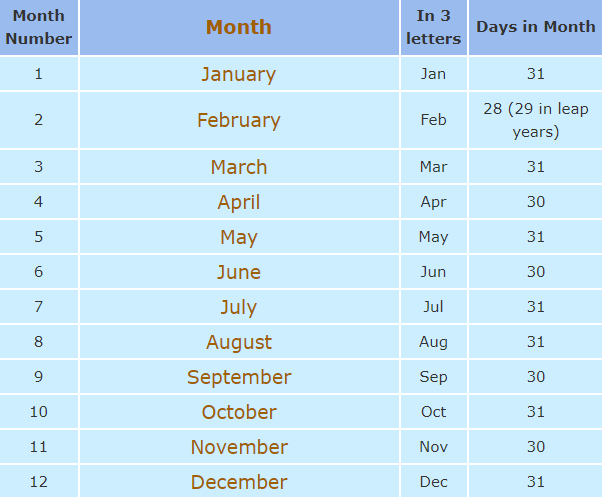

Now using this knowledge as a reference point and through visual inspection of the dataset `uber_ridesharing_transit_dirty_data.csv`, **ten rows** with `Semantic Anomalies` were found. These `Semantic Anomalies` were due to invalid valid observations recorded for `Departure Date` where the day (dd) is an invalid observation due to the total the number of possible days for the month respectively in each row. Thus, the invalid date observations were identified at the following row indexes:
* **209** with a unique ID as **ID1547447558**
* **211** with a unique ID as **ID5699197442**
* **213** with a unique ID as **ID1731085767**
* **214** with a unique ID as **ID3126463403**
* **215** with a unique ID as **ID1768120367**
* **216** with a unique ID as **ID1446477289**
* **217** with a unique ID as **ID3191871919**
* **218** with a unique ID as **ID1585857199**
* **219** with a unique ID as **ID3810538207**
* **224** with a unique ID as **ID3948429835** 

These `Semantic Anaomalies` are due to `invalid observations` in the day (dd) for each recorded `Departure Date` value where for the month:
* **February**, there can only be either **28 days** in a month or **29 days** in a month during leap years
* **April**, there can only be **30 days** in a month 
* **June**, there can only be **30 days** in a month 

Therefore, as the `Departure Date` column value for rows:
* 209, 216, 217, 218, 219 and 224 had a `Departure Date` all on day **30** despite the month being **February** means that the `Departure Date` value for these rows are invalid observations, thus, they're Semantic Anomalies. 
* 213 and 214 had a `Departure Date` on day **31** despite the month being **April** which means that the `Departure Date` value for these rows are invalied observations, thus, they're Semantic Anomalies. 
* 211 and 215 had a`Departure Date`  on day **31** despite the month being **June** which means that the `Departure Date` value for these rows are invalid observations, thus, they're Semantic Anomalies. 

Thus, these rows with `Semantic Anaomalies` due to `invalid observations` for the `Departure Date` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` will be retrieved for examination and corrected appropriately through Data Cleansing.   

In [31]:
# return all the rows using their respective indexes with Semantic Anomalies due to invalid observations for the 
# `Departure Date` column for examination 
dirty_data_df.iloc[[209, 211, 213, 214, 215, 216, 217, 218, 219, 224], [0,9]] # first list row index, second list column index

Unnamed: 0 Departure Date
209  ID1547447558     2018-02-30
211  ID5699197442     2018-06-31
213  ID1731085767     2018-04-31
214  ID3126463403     2018-04-31
215  ID1768120367     2018-06-31
216  ID1446477289     2018-02-30
217  ID3191871919     2018-02-30
218  ID1585857199     2018-02-30
219  ID3810538207     2018-02-30
224  ID3948429835     2018-02-30

Now correct all the invalid `Departure Date` **day(dd)** values for each row in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored as a Panda's DataFrame under the variable name `dirty_data_df` using row indexing and column indexing by correcting the **invalid dates days(dd)** to the **last valid day(dd) of the month** for each `Departure Date` value respectively in the column `Departure Date` throughout the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored as a Panda's DataFrame under the variable name `dirty_data_df`.

Where the **last valid day(dd) of the month** chosen for correcting the **invalid day(dd)** for the `Departure Date` values `Departure Date` **day(dd)** values for each row in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored as a Panda's DataFrame under the variable name `dirty_data_df` was: 
* **February(02)** the **last valid day(dd) of the month** used was **28** as the year **2018** is **not a leap year**
* **April(04)** the **last valid day(dd) of the month** used was **30**  
* **June(06)** the **last valid day(dd) of the month** used was **30**

Thus, these **last valid day(dd) of the month** for each `Departure Date` column values with the months **February(02)**, **April(04)** and **June(06)** respectively will have their **invalid day(dd)** for the `Departure Date` values in the `Departure Date` column for each row in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored as a Panda's DataFrame under the variable name `dirty_data_df`, they'll be corrected with each month's corresponding **last valid day(dd) of the month**.

In [32]:
# correcting the dates with invalid day(dd) to the last valid day of the month for each `Departure Date` value respectively in 
# the column `Departure Date` throughout the dataset uber_transit_dirty_data.csv which is stored as a Panda's DataFrame under 
# the variable name dirty_data_df 
dirty_data_df.iloc[209,9] = '2018-02-28'#change the invalid day(dd) to the last valid day of the month date which is 2018-02-28 
dirty_data_df.iloc[211,9] = '2018-06-30'#change the invalid day(dd) to the last valid day of the month date which is 2018-06-30 
dirty_data_df.iloc[213,9] = '2018-04-30'#change the invalid day(dd) to the last valid day of the month date which is 2018-04-30 
dirty_data_df.iloc[214,9] = '2018-04-30'#change the invalid day(dd) to the last valid day of the month date which is 2018-04-30
dirty_data_df.iloc[215,9] = '2018-06-30'#change the invalid day(dd) to the last valid day of the month date which is 2018-06-30
dirty_data_df.iloc[216,9] = '2018-02-28'#change the invalid day(dd) to the last valid day of the month date which is 2018-02-28
dirty_data_df.iloc[217,9] = '2018-02-28'#change the invalid day(dd) to the last valid day of the month date which is 2018-02-28
dirty_data_df.iloc[218,9] = '2018-02-28'#change the invalid day(dd) to the last valid day of the month date which is 2018-02-28
dirty_data_df.iloc[219,9] = '2018-02-28'#change the invalid day(dd) to the last valid day of the month date which is 2018-02-28
dirty_data_df.iloc[224,9] = '2018-02-28'#change the invalid day(dd) to the last valid day of the month date which is 2018-02-28

Finally, as all the rows in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored as a Panda's DataFrame under the variable name `dirty_data_df` have had their identified `Departure Date` Semantic Anaomalies corrected. Next, retrieve all the corrected rows using their respective unique row indexes and verify they all have valid `Dpearture Day` column values for `day(dd)` which is the **valid last of day for each month respectively** and in addition also verify they follow the consistent date format `yyyy-mm-dd` for all `Departure Date` values within each corrected row. 

In [33]:
# validate that all the rows with the identified `Departure Date` Semantic Anomalies have been properly corrected from the 
# format yyyy-mm-dd with an invalid day(dd) to a valid day(dd) which was chosen by using the last day for each month based on 
# the Departure Date respectively 
dirty_data_df.iloc[[209, 211, 213,214, 215,216,217, 218, 219, 224], [0,9]] # retrieve all corrected rows ID & Departure Date col

Unnamed: 0 Departure Date
209  ID1547447558     2018-02-28
211  ID5699197442     2018-06-30
213  ID1731085767     2018-04-30
214  ID3126463403     2018-04-30
215  ID1768120367     2018-06-30
216  ID1446477289     2018-02-28
217  ID3191871919     2018-02-28
218  ID1585857199     2018-02-28
219  ID3810538207     2018-02-28
224  ID3948429835     2018-02-28

Thus, as all the `Departure Date` values for the corrected rows follow the consistent format **yyyy-mm-dd** and the values respectively for year, month and day are all valid figures/dates with the `invalid day(dd)` for each row with `Departure Date` **Semantic Anomalies** due to invalid observations are now corrected. Therefore, for all the rows in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored as a Panda's DataFrame under the variable name `dirty_data_df` all the identified `Departure Date` Semantic Anaomalies have been corrected to **valid dates** using the last **valid day of the month respectively** and the column also follows a **consistent date format** of **yyyy-mm-dd** for all `Departure Date` column values in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored as a Panda's DataFrame under the variable name `dirty_data_df`.

### 6.4.4 Checking Uber Type Column
<a id="uber type"></a>

The sixth column which the Exploratory Data Analysis (EDA) and Data Cleansing Process will be perfomed on is the `Uber Type` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in the Panda's DataFrame under the variable name `dirty_data_df`. 

Firstly, the number of values for each `Uber Type` category will be determined by selecting the column `Uber Type` in the Panda's DataFrame `dirty_data_df` and then using the Panda's function **value_counts()**.

In [34]:
# Count the number of values for each Uber Type
dirty_data_df['Uber Type'].value_counts() # Number of values for each Uber Type 

0    139
1    124
2     49
3      5
Name: Uber Type, dtype: int64

Now that it has been determined for each Uber Type in the dataset `uber_ridesharing_transit_dirty_data.csv` for:
* **Uber Type 0 there's 139 values**
* **Uber Type 1 there's 124 values**
* **Uber Type 2 there's 49 values**
* **Uber Type 3 there's 5 values** 

However, as estbalished during EDA for the column Uber Type it's a **categorical attribute for the type of journey namely Uber pool, Uberx, Uber black**. Thus, there should only be three values denoting Uber Type, yet, from performing the value counts for the number of values respectively for each Uber Type the output returned four categories 0, 1, 2, 3. 

Therefore, immediately this is very alarming, specifically for the extra `Uber Type 3` with 5 values. Thus, further Exploratory Data Analysis (EDA) will be performed to establish a pattern for the Uber Type column to use as a basis for verifying if the extra 5 values or values regarding the other Uber Types 0, 1 or 2 are inncorrect; thus, will require Data Cleansing. 

Firstly, all the rows with `Uber Type == 3` will be retrived, for an initial visual examination and determine any anomalies.  

In [35]:
# return all rows with Uber Type == 3
dirty_data_df[dirty_data_df['Uber Type'] == 3] # Uber Type 3 rows 

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
139  ID1488999788          3              6                   3   
141  ID3785595792          3              5                   7   
144  ID1885790830          3              8                   2   
148  ID3916657736          3              1                   9   
152  ID1928108357          3              2                   1   

     Origin Latitude  Origin Longitude  Destination Latitude  \
139       -37.787442        144.980409            -37.808592   
141       -37.805340        144.937033            -37.861835   
144       -37.807202        145.026637            -37.820981   
148       -37.818518        144.967095            -38.110916   
152       -37.814804        144.935884            -37.805464   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
139             144.981410               2693.0     2018-06-24       12:29:41   
141             144.905716              10693.0     2018-05-17       16:05:19   
144             144.947346               8179.0     2018-06-21       23:46:37   
148             144.654173              43732.0     2018-03-13       17:34:37   
152             144.933375               1948.0     2018-06-21       06:54:06   

     Travel Time(s) Arrival Time  Fare$  
139          644.64     12:40:25  12.58  
141         3475.50     17:03:14  23.99  
144         1930.80      0:18:47  17.23  
148        10536.84     20:30:13  55.48  
152          478.98      7:02:04   3.50

In order to establish if the categorical feature column `Uber Type` in the dataset `uber_ridesharing_transit_dirty_data.csv` can only have the values 0, 1 or 2, the loaded clean data from section **4. Clean Data** which is stored in a Panda's DataFrame under the variable name `clean_data` will be used to determine the possible values as the dataset doesn't have any **Syntactical Anomalies**, **Semantic Anomalies** and **Coverage Anomalies**.

Firstly, a value count will be performed on the column `Uber Type` for the Panda's DataFrame `clean_data` using Panda's Function **value_counts()**.

In [36]:
# Count the number of values for each Uber Type 
clean_data['Uber Type'].value_counts() # Number of values for each Uber Type 

0.0    30
1.0    25
2.0    15
Name: Uber Type, dtype: int64

So from the value counts perfomed on the Panda's DataFrame `clean_data` it can be observed that for:
* **Uber Type 0 there's 30 values**
* **Uber Type 1 there's 25 values**
* **Uber Type 2 there's 15 values** 

Therefore, as this dataset is completely clean without any **Syntactical Anomalies**, **Semantic Anomalies** and **Coverage Anomalies**. It can be deduced, that there's indeed only three Uber Types, thus, the four values 0,1,2,3 found in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in the Panda's DataFrame under the variable `dirty_data_df` is actually incorrect. 

However, to establish a relationship/pattern for definitively determining which row refers to which Uber Type, first, determine what is the distribution of the numerical values by using Python Panda's **describe()** function on the Panda's DataFrame `clean_data` respectively for each `Uber Type`.

Therefore, the distribution of the numerical values for `Uber Type 0` can by determined by row selecting with a boolean condition on the Panda's DataFrame `clean_data` then applying the Panda's function `describe()` as shown:

```python
clean_data.loc[clean_data['Uber Type'] == 0].describe()
```

In [37]:
# determine the distribution for the numerical column values for the pandas dataframe clean_data for Uber Type 0 
clean_data.loc[clean_data['Uber Type'] == 0].describe() # distirbution of the numerical values for Uber Type 0

Uber Type  Origin Region  Destination Region  Origin Latitude  \
count       30.0      30.000000           30.000000        30.000000   
mean         0.0       5.366667            4.766667       -37.882351   
std          0.0       2.697168            2.824564         0.129431   
min          0.0       1.000000            1.000000       -38.110916   
25%          0.0       3.000000            2.000000       -37.861835   
50%          0.0       5.500000            5.000000       -37.816490   
75%          0.0       7.750000            7.000000       -37.808914   
max          0.0       9.000000            9.000000       -37.773803   

       Origin Longitude  Destination Latitude  Destination Longitude  \
count         30.000000             30.000000              30.000000   
mean         144.894656            -37.841356             144.931869   
std            0.138218              0.093671               0.101251   
min          144.654173            -38.110916             144.654173   
25%          144.905716            -37.822000             144.929815   
50%          144.954682            -37.810682             144.947169   
75%          144.985793            -37.801096             144.982869   
max          145.046450            -37.773845             145.046450   

       Journey Distance(m)  Travel Time(s)      Fare$  
count            30.000000       30.000000  30.000000  
mean          19375.466667     4913.080000  15.602000  
std           19152.832134     4589.828434   7.102808  
min            1367.000000      363.900000   3.360000  
25%            5566.500000     1464.090000  10.660000  
50%            8714.000000     2634.480000  13.115000  
75%           43142.500000    10400.790000  23.955000  
max           51032.000000    13204.980000  28.080000

By visually examining the distribution for the numerical column values for the Pandas DataFrame `clean_data` for Uber Type 0 there's no immediate relationship/pattern that can be observed which can definitively determine the Uber Type for each row in the dataset `uber_ridesharing_transit_dirty_data.csv`. 


Next determine, the distribution of the numerical values for `Uber Type 1` by row selecting with a boolean condition on the Panda's DataFrame `clean_data` then applying the Panda's function `describe()` as shown:

```python
clean_data.loc[clean_data['Uber Type'] == 1].describe()
```

In [38]:
# determine the distribution for the numerical column values for the pandas dataframe clean_data for Uber Type 1 
clean_data.loc[clean_data['Uber Type'] == 1].describe() # distirbution of the numerical values for Uber Type 1

Uber Type  Origin Region  Destination Region  Origin Latitude  \
count       25.0      25.000000           25.000000        25.000000   
mean         1.0       4.880000            5.680000       -37.838023   
std          0.0       2.471841            2.764658         0.085184   
min          1.0       1.000000            1.000000       -38.110916   
25%          1.0       3.000000            4.000000       -37.822271   
50%          1.0       5.000000            6.000000       -37.815834   
75%          1.0       7.000000            8.000000       -37.802954   
max          1.0       9.000000            9.000000       -37.773803   

       Origin Longitude  Destination Latitude  Destination Longitude  \
count         25.000000             25.000000              25.000000   
mean         144.940140            -37.890895             144.883401   
std            0.093099              0.128223               0.136593   
min          144.654173            -38.110916             144.654173   
25%          144.936477            -37.861835             144.905716   
50%          144.966228            -37.820961             144.928160   
75%          144.983689            -37.805165             144.976020   
max          145.046450            -37.787442             145.046450   

       Journey Distance(m)  Travel Time(s)      Fare$  
count             25.00000       25.000000  25.000000  
mean           20147.44000     5199.379200  32.143600  
std            18131.39142     4225.879114  19.019518  
min             3488.00000      832.980000   9.840000  
25%             7595.00000     2027.040000  18.370000  
50%             9690.00000     2892.840000  25.640000  
75%            43609.00000    10503.420000  51.530000  
max            51032.00000    12681.060000  71.040000

Similarly, by visually examining the distribution for the numerical column values for the Pandas DataFrame `clean_data` for Uber Type 1 there's no immediate relationship/pattern that can be observed which can definitively determine the Uber Type for each row in the dataset `uber_ridesharing_transit_dirty_data.csv`. 


Next determine, the distribution of the numerical values for `Uber Type 2` by row selecting with a boolean condition on the Panda's DataFrame `clean_data` then applying the Panda's function `describe()` as shown:
```python
clean_data.loc[clean_data['Uber Type'] == 2].describe()
```

In [39]:
# determine the distribution for the numerical column values for the pandas dataframe clean_data for Uber Type 2
clean_data.loc[clean_data['Uber Type'] == 2].describe() # distirbution of the numerical values for Uber Type 2

Uber Type  Origin Region  Destination Region  Origin Latitude  \
count       15.0      15.000000           15.000000        15.000000   
mean         2.0       4.466667            5.066667       -37.857032   
std          0.0       2.642149            2.491892         0.104907   
min          2.0       1.000000            1.000000       -38.110916   
25%          2.0       2.500000            3.000000       -37.841281   
50%          2.0       4.000000            4.000000       -37.813493   
75%          2.0       6.500000            7.000000       -37.811238   
max          2.0       9.000000            9.000000       -37.787442   

       Origin Longitude  Destination Latitude  Destination Longitude  \
count         15.000000             15.000000              15.000000   
mean         144.923410            -37.841029             144.951708   
std            0.114162              0.078313               0.095037   
min          144.654173            -38.110916             144.654173   
25%          144.920066            -37.842027             144.919713   
50%          144.965610            -37.815834             144.973932   
75%          144.983247            -37.811541             145.007116   
max          145.011392            -37.773803             145.046450   

       Journey Distance(m)  Travel Time(s)        Fare$  
count            15.000000       15.000000    15.000000  
mean          14956.733333     3992.748000   418.782000  
std           15735.722519     3658.542426   358.677571  
min            3213.000000      821.640000   109.320000  
25%            6464.000000     1612.800000   185.890000  
50%            8359.000000     2672.880000   282.460000  
75%           13066.500000     4103.430000   430.735000  
max           47323.000000    11464.860000  1156.660000

Thus, by visually examining the distribution for the numerical column values for the Pandas DataFrame `clean_data` for Uber Type 2 there's no immediate relationship/pattern that can be observed which can definitively determine the Uber Type for each row in the dataset `uber_ridesharing_transit_dirty_data.csv`. 

Therefore, by determing the distribution for the numerical column values for the Panda's DataFrame `clean_data` respectively for `Uber Type 0`, `Uber Type 1` and `Uber Type 2` through visual examination there were no strong identifiers/patterns which can determine the `Uber Type` for each row in the dataset `uber_ridesharing_transit_dirty_data.csv`. 

Next this observation analysis will also be performed on all the categorical variables in the Panda's DataFrame `clean_data` respectively for each `Uber Type` by using Python Panda's **describe(include=['O'])** where 'O' signifies the datatype `object`. 

Firstly, the distribution of the categorical variables for `Uber Type 0` which can by determined by row selecting with a boolean condition on the Panda's DataFrame `clean_data` then applying the Panda's function `describe(include=['O'])` as shown:

```python
clean_data.loc[clean_data['Uber Type'] == 0].describe(include=['O'])
```

In [40]:
# determine the distribution for all the categorical variables in the Panda's DataFrame clean_data for Uber Type 0
clean_data.loc[clean_data['Uber Type'] == 0].describe(include=['O']) # 'O' for objects 

Unnamed: 0 Departure Date Departure Time Arrival Time
count             30             30             30           30
unique            30             27             30           30
top     ID1502570356     2018-03-06       00:49:33      8:21:47
freq               1              2              1            1

Upon initial examination of the output it's interesting that for `Uber Type 0` in the Panda's DataFrame `clean_data` the top ID value is `ID19859799741`. However, the additional distribution information doesn't provide any siginificant insights for definitively determining the Uber Type for each row in the dataset `uber_ridesharing_transit_dirty_data.csv`. 

Next determine, the distribution of the categorical variables for `Uber Type 1` which can by determined by row selecting with a boolean condition on the Panda's DataFrame `clean_data` then applying the Panda's function `describe(include=['O'])` as shown:

```python
clean_data.loc[clean_data['Uber Type'] == 1].describe(include=['O'])
```

In [41]:
# determine the distribution for all the categorical variables in the Panda's DataFrame clean_data for Uber Type 1
clean_data.loc[clean_data['Uber Type'] == 1].describe(include=['O']) # 'O' for objects 

Unnamed: 0 Departure Date Departure Time Arrival Time
count             25             25             25           25
unique            25             24             25           25
top     ID3735111385     2018-05-06       18:42:45     23:08:51
freq               1              2              1            1

It's interesting that now for `Uber Type 1` in the Panda's DataFrame `clean_data` the top ID value is `ID3233898697`. However, similarly the additional distribution information doesn't provide any siginificant insights for definitively determining the Uber Type for each row in the dataset `uber_ridesharing_transit_dirty_data.csv`. 

Next determine, the distribution of the categorical variables for `Uber Type 2` which can by determined by row selecting with a boolean condition on the Panda's DataFrame `clean_data` then applying the Panda's function `describe(include=['O'])` as shown

```python
clean_data.loc[clean_data['Uber Type'] == 2].describe(include=['O'])
```

In [42]:
# determine the distribution for all the categorical variables in the Panda's DataFrame clean_data for Uber Type 2
clean_data.loc[clean_data['Uber Type'] == 2].describe(include=['O']) # 'O' for objects 

Unnamed: 0 Departure Date Departure Time Arrival Time
count             15             15             15           15
unique            15             14             15           15
top     ID5163271435     2018-01-06       13:46:03      8:09:50
freq               1              2              1            1

From the observation it can be determined that for `Uber Type 3` in the Panda's DataFrame clean_data the top ID value is `ID5753558623`, thus, this is very intriguing the top ID value is different respectively for `Uber Type 0`, `Uber Type 1` and `Uber Type 2` in the Panda's DataFrame `clean_data`. 

There seems to be a pattern between the `ID column` and the `Uber Type` within each row in the dataset. Thus, to validate this all the rows for each `Uber Type` respectively from the Panda's DataFrame `clean_data` will be retrieved. 

First all the rows where the column `Uber Type` == 0 will be retrieved from the Panda's DataFrame `clean_data` for examination. 

In [43]:
# return all rows where Uber Type == 0 from the panda's dataframe clean_data
clean_data.loc[clean_data['Uber Type'] == 0] # Uber Type 0

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0    ID1438925260        0.0              4                   8   
7    ID1502570356        0.0              3                   1   
13   ID1250278748        0.0              4                   7   
15   ID1291747590        0.0              7                   6   
21   ID1934618649        0.0              9                   8   
30   ID1334464531        0.0              3                   6   
31   ID1491424722        0.0              1                   7   
39   ID1193993255        0.0              7                   1   
40   ID1126746371        0.0              9                   2   
44   ID1625604925        0.0              3                   5   
45   ID1650764511        0.0              6                   5   
47   ID1894751433        0.0              8                   6   
50   ID1136445437        0.0              5                   2   
51   ID1116911844        0.0              3                   9   
59   ID1533137447        0.0              6                   1   
63   ID1596684637        0.0              5                   2   
69   ID1859947361        0.0              2                   9   
70   ID1985979974        0.0              9                   4   
73   ID1719601048        0.0              9                   6   
77   ID1506545068        0.0              9                   5   
80   ID1739921637        0.0              6                   1   
86   ID1438608050        0.0              3                   4   
89   ID1944065697        0.0              2                   5   
92   ID1445591589        0.0              5                   1   
93   ID1303573764        0.0              9                   7   
95   ID1307899314        0.0              1                   9   
101  ID1476328766        0.0              6                   1   
102  ID1552480071        0.0              6                   8   
103  ID1364158305        0.0              2                   6   
106  ID1653973690        0.0              9                   1   

     Origin Latitude  Origin Longitude  Destination Latitude  \
0         -37.816520        145.004997            -37.815834   
7         -37.816370        144.985247            -37.805135   
13        -37.807923        144.992126            -37.861835   
15        -37.861835        144.905716            -37.773845   
21        -38.110916        144.654173            -37.815834   
30        -37.813446        144.984727            -37.790818   
31        -37.811887        144.977897            -37.861835   
39        -37.861835        144.905716            -37.799763   
40        -38.110916        144.654173            -37.824122   
44        -37.821686        144.989824            -37.803748   
45        -37.790818        144.985793            -37.802822   
47        -37.815834        145.046450            -37.787433   
50        -37.802884        144.933945            -37.812084   
51        -37.818885        144.967698            -38.110916   
59        -37.790818        144.985793            -37.822310   
63        -37.802547        144.935026            -37.821070   
69        -37.819481        144.932400            -38.110916   
70        -38.110916        144.654173            -37.810580   
73        -38.110916        144.654173            -37.787442   
77        -38.110916        144.654173            -37.811904   
80        -37.773803        144.983647            -37.800591   
86        -37.821958        144.993850            -37.802611   
89        -37.813980        144.936386            -37.799329   
92        -37.816460        144.928392            -37.810785   
93        -38.110916        144.654173            -37.861835   
95        -37.814188        144.971447            -38.110916   
101       -37.790797        144.985865            -37.805329   
102       -37.790797        144.985865            -37.807202   
103       -37.819381        144.941667            -37.790818   
106      

From visually examining the retrived rows there does seem to be a relationship between the `Id column` and `Uber Type`. Where it can be hypothesized that if the **first digit** in the `ID` is **1** then it'll be **Uber Type 0**. 

This logic underlying the hypothesis can be applied and tested respectively to **Uber Type 1** and **Uber Type 2**, where the expectation is that the first digit should be different for both of these Uber Types but consistent for every row within each Uber Type category in the Panda's DataFrame `clean_data`. 

Now all the rows where the column `Uber Type` == 1 will be retrieved from the Panda's DataFrame `clean_data` for examination. 

In [44]:
# return all rows where Uber Type == 1 from the panda's dataframe clean_data
clean_data.loc[clean_data['Uber Type'] == 1] # Uber Type 1

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
1    ID3157840257        1.0              6                   9   
3    ID3434042218        1.0              7                   4   
6    ID3233898697        1.0              8                   9   
14   ID3613676255        1.0              1                   5   
16   ID3776097091        1.0              5                   1   
20   ID3562407977        1.0              4                   9   
23   ID3582092564        1.0              1                   7   
24   ID3496138618        1.0              3                   7   
27   ID3735111385        1.0              2                   6   
29   ID3840713248        1.0              4                   7   
36   ID3516635507        1.0              5                   9   
42   ID3560981580        1.0              9                   1   
46   ID3154459697        1.0              6                   4   
48   ID3470173486        1.0              7                   6   
56   ID3899671894        1.0              6                   3   
57   ID3509424842        1.0              2                   8   
58   ID3790989601        1.0              4                   1   
61   ID3385527189        1.0              5                   4   
65   ID3177024264        1.0              9                   2   
75   ID3975671242        1.0              8                   7   
81   ID3438260039        1.0              3                   7   
83   ID3658394213        1.0              7                   3   
84   ID3138621008        1.0              1                   9   
104  ID3266353924        1.0              6                   9   
111  ID3348478567        1.0              3                   5   

     Origin Latitude  Origin Longitude  Destination Latitude  \
1         -37.787442        144.980409            -38.110916   
3         -37.861835        144.905716            -37.805976   
6         -37.815834        145.046450            -38.110916   
14        -37.815164        144.963614            -37.804539   
16        -37.804508        144.937661            -37.800737   
20        -37.800002        144.988874            -38.110916   
23        -37.815131        144.966228            -37.861835   
24        -37.820082        144.968573            -37.861835   
27        -37.819719        144.941013            -37.787442   
29        -37.801528        144.992826            -37.861835   
36        -37.817300        144.925797            -38.110916   
42        -38.110916        144.654173            -37.815287   
46        -37.773845        144.983689            -37.809667   
48        -37.861835        144.905716            -37.790818   
56        -37.773803        144.983647            -37.821191   
57        -37.819492        144.943623            -37.815834   
58        -37.813213        145.010897            -37.802416   
61        -37.802954        144.936477            -37.803770   
65        -38.110916        144.654173            -37.820961   
75        -37.807202        145.026637            -37.861835   
81        -37.824404        144.968959            -37.861835   
83        -37.861835        144.905716            -37.813914   
84        -37.822271        144.951628            -38.110916   
104       -37.790818        144.985793            -38.110916   
111       -37.818520        144.975208            -37.805165   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
1               144.654173              47035.0     2018-01-09       00:36:06   
3               145.013780              12734.0     2018-05-17       20:01:24   
6               144.654173              51032.0     2018-05-06       21:28:40   
14              144.928160               3819.0     2018-06-24       11:01:13   
16              144.951762               3488.0     2018-04-02       07:21:03   
20              144.654173              46613.0     2018-04-20       13:37:24   
23              144.905716      

Indeed, unlike `Uber Type 0` where the **first digit** in the `ID` is **1** and is consistent for all `Uber Type 0` rows. For `Uber Type 1` the **first digit** in the `ID` is **3** which is consistent across all the rows for `Uber Type 1` and seems to be the indicator for `Uber Type 1` in every row for the Panda's DataFrame `clean_data`.

Thus, next all the rows where the column `Uber Type` == 2 will be retrieved from the Panda's DataFrame `clean_data` for examination. 

In [45]:
# return all rows where Uber Type == 2 from the panda's dataframe clean_data
clean_data.loc[clean_data['Uber Type'] == 2] # Uber Type 2

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
11  ID5403333658        2.0              5                   7   
18  ID5960929442        2.0              3                   7   
19  ID5974190962        2.0              1                   8   
25  ID5667765164        2.0              6                   2   
28  ID5699257827        2.0              4                   9   
52  ID5311093598        2.0              9                   3   
55  ID5564481367        2.0              7                   4   
60  ID5728347359        2.0              1                   4   
67  ID5383915668        2.0              2                   4   
71  ID5800731638        2.0              3                   6   
74  ID5248293727        2.0              2                   7   
82  ID5888758658        2.0              4                   3   
90  ID5712440713        2.0              9                   1   
91  ID5753558623        2.0              4                   8   
97  ID5163271435        2.0              7                   3   

    Origin Latitude  Origin Longitude  Destination Latitude  \
11       -37.800758        144.934417            -37.861835   
18       -37.813402        144.973932            -37.861835   
19       -37.813493        144.965610            -37.815834   
25       -37.787442        144.980409            -37.816168   
28       -37.810963        145.004721            -38.110916   
52       -38.110916        144.654173            -37.813402   
55       -37.861835        144.905716            -37.812743   
60       -37.814129        144.971360            -37.809546   
67       -37.815221        144.945023            -37.808870   
71       -37.810752        144.986085            -37.773803   
74       -37.820727        144.948564            -37.861835   
82       -37.811579        145.011392            -37.822219   
90       -38.110916        144.654173            -37.810339   
91       -37.811512        145.009867            -37.815834   
97       -37.861835        144.905716            -37.820261   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
11             144.905716              13807.0     2018-04-22       05:37:31   
18             144.905716               8613.0     2018-01-06       07:21:08   
19             145.046450               7494.0     2018-07-02       20:21:42   
25             144.933710               6236.0     2018-01-27       13:46:03   
28             144.654173              47323.0     2018-07-24       03:01:24   
52             144.973932              44340.0     2018-05-10       09:08:31   
55             145.012529              12326.0     2018-06-11       15:27:36   
60             145.001703               3213.0     2018-07-09       02:31:55   
67             145.015556               6692.0     2018-01-06       18:13:00   
71             144.983647               8359.0     2018-01-04       18:54:35   
74             144.905716               8875.0     2018-03-04       03:06:31   
82             144.983217               3465.0     2018-03-25       21:10:21   
90             144.937563              42654.0     2018-03-12       03:05:52   
91             145.046450               3271.0     2018-06-01       05:45:23   
97             144.969544               7683.0     2018-06-04       13:51:02   

    Travel Time(s) Arrival Time    Fare$  
11         4311.12      6:49:22   459.18  
18         2922.12      8:09:50   305.81  
19         2130.90     20:57:12   228.94  
25         1575.90     14:12:18   182.28  
28        11464.86      6:12:28  1156.66  
52        10623.96     12:05:34  1057.47  
55         3895.74     16:32:31   402.29  
60          821.64      2:45:36   109.32  
67         1649.70     18:40:29   189.50  
71         2614.80     19:38:09   278.25  
74         3021.96      3:56:52   334.60  
82          850.68     21:24:31   120.89  
90        10217.64      5:56:09  1035.90  
91         1117.32      6:04:00   138.18  
97         267

Again, unlike `Uber Type 0` where the **first digit** in the `ID` is **1** and is consistent for all `Uber Type 0` rows. And for `Uber Type 1` where the **first digit** in the `ID` is **3** and is consistent for all `Uber Type 1` rows. For `Uber Type 2` the **first digit** in the `Id` is **5** which is consistent across all the rows for `Uber Type 2` and seems to be the indicator for `Uber Type 2` in every row for the Panda's DataFrame `clean_data`.

Therefore the pattern established between the `ID` column and the `Uber Type` for each row is:
* If the first digit of the `ID` is a **1** which will be `ID1` then for that row it's `Uber Type 0`
* If the first digit of the `ID` is a **3** which will be `ID3` then for that row it's `Uber Type 1`
* If the first digit of the `ID` is a **5** which will be `ID5` then for that row it's `Uber Type 2`

Thus, a pattern has been established for definitively determining the `Uber Type` for every row in the dataset `uber_ridesharing_transit_dirty_data.csv`, therefore, now the extra `Uber Type category value 3` found in `29976464_dirty_data.csv` dataset which is stored as a Panda's DataFrame under the variable name `dirty_data_df` can be corrected. 

As determined at the beginning of this section **6.4.4 Checking Uber Type Column** the five rows of `Uber Type 3` in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in the Panda's DataFrame under the variable name `dirty_data_df` was found at the following indices:


* **139** with a unique ID as **ID1488999788**    
* **141** with a unique ID as **ID3785595792**      
* **144** with a unique ID as **ID1885790830**      
* **148** with a unique ID as **ID3916657736**     
* **152** with a unique ID as **ID1928108357**

Prior to Data Cleansing these rows, a check will be made using the patterns where: 

* If the first digit of the `ID` is a **1** which will be `ID1` then for that row it's `Uber Type 0`
* If the first digit of the `ID` is a **3** which will be `ID3` then for that row it's `Uber Type 1`
* If the first digit of the `ID` is a **5** which will be `ID5` then for that row it's `Uber Type 2`

By applying these patterns as a boolean condition all rows which have each of these respective `ID` patterns of `ID1`, `ID2` and `ID3` but does not have the corresponding `Uber Type` for that row will be retrieved for examination. 

Firstly, all the rows in the Panda's DataFrame `dirty_data_df` will be retrieved where the `ID` pattern `ID1` is found and the `Uber Type` is not `Uber Type 0`.  

In [46]:
# retrieve and return all the rows in the panda's dataframe dirty_data_df where the ID pattern ID1 is found but the Uber Type
# for that row is not Uber Type 0 
dirty_data_df.loc[(dirty_data_df['Unnamed: 0'].str.contains("ID1")) & (dirty_data_df['Uber Type'] != 0)] # ID1 but not Uber 0 

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
136  ID1574817953          2              8                   2   
139  ID1488999788          3              6                   3   
144  ID1885790830          3              8                   2   
152  ID1928108357          3              2                   1   
155  ID1760052621          1              6                   2   

     Origin Latitude  Origin Longitude  Destination Latitude  \
136       -37.815834        145.046450            -37.818374   
139       -37.787442        144.980409            -37.808592   
144       -37.807202        145.026637            -37.820981   
152       -37.814804        144.935884            -37.805464   
155       -37.773803        144.983647            -37.823802   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
136             144.948643               9190.0     2018-02-24       12:31:32   
139             144.981410               2693.0     2018-06-24       12:29:41   
144             144.947346               8179.0     2018-06-21       23:46:37   
152             144.933375               1948.0     2018-06-21       06:54:06   
155             144.947514              10156.0     2018-02-21       07:27:06   

     Travel Time(s) Arrival Time  Fare$  
136         2552.52     13:14:04  16.47  
139          644.64     12:40:25  12.58  
144         1930.80      0:18:47  17.23  
152          478.98      7:02:04   3.50  
155         3106.80      8:18:52   8.87

Secondly, all the rows in the Panda's DataFrame `dirty_data_df` will be retrieved where the `ID` pattern `ID3` is found and the `Uber Type` is not `Uber Type 1`.  

In [47]:
# retrieve and return all the rows in the panda's dataframe dirty_data_df where the ID pattern ID3 is found but the Uber Type
# for that row is not Uber Type 1 
dirty_data_df.loc[(dirty_data_df['Unnamed: 0'].str.contains("ID3")) & (dirty_data_df['Uber Type'] != 1)] # ID3 but not Uber 1 

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
141  ID3785595792          3              5                   7   
148  ID3916657736          3              1                   9   

     Origin Latitude  Origin Longitude  Destination Latitude  \
141       -37.805340        144.937033            -37.861835   
148       -37.818518        144.967095            -38.110916   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
141             144.905716              10693.0     2018-05-17       16:05:19   
148             144.654173              43732.0     2018-03-13       17:34:37   

     Travel Time(s) Arrival Time  Fare$  
141         3475.50     17:03:14  23.99  
148        10536.84     20:30:13  55.48

Thirdly, all the rows in the Panda's DataFrame `dirty_data_df` will be retrieved where the `ID` pattern `ID5` is found and the `Uber Type` is not `Uber Type 2`.  

In [48]:
# retrieve and return all the rows in the panda's dataframe dirty_data_df where the ID pattern ID5 is found but the Uber Type
# for that row is not Uber Type 2
dirty_data_df.loc[(dirty_data_df['Unnamed: 0'].str.contains("ID5")) & (dirty_data_df['Uber Type'] != 2)] # ID5 but not Uber 2 

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
138  ID5491127647          1              2                   6   

     Origin Latitude  Origin Longitude  Destination Latitude  \
138        -37.81325        144.939769            -37.790797   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
138             144.985865               5850.0     2018-03-10       21:31:45   

     Travel Time(s) Arrival Time   Fare$  
138         1591.44     21:58:16  183.75

As there's crossover between the rows retrieved by applying the three boolean condition on all rows in the Panda's DataFrame `dirty_data_df` which have the respective `ID` patterns of `ID1`, `ID2` and `ID3` but does not have the corresponding `Uber Type` where these rows overlap with the `Uber Type` column in the Panda's `dirty_data_df` where the `Uber Type` == 3 at the indices:
* **139**
* **141** 
* **144**
* **148**
* **152**

Therefore all the rows retrieved with the boolean conditions:

```python
dirty_data_df.loc[(dirty_data_df['Unnamed: 0'].str.contains("ID1")) & (dirty_data_df['Uber Type'] != 0)]
dirty_data_df.loc[(dirty_data_df['Unnamed: 0'].str.contains("ID3")) & (dirty_data_df['Uber Type'] != 1)]
dirty_data_df.loc[(dirty_data_df['Unnamed: 0'].str.contains("ID5")) & (dirty_data_df['Uber Type'] != 2)]
```

These rows will be used as the basis for Data Cleansing and correcting the `Uber Type` as they're inclusive of the five rows found where `Uber Type` == 3 in the Panda's DataFrame `dirty_data_df`.  

In [49]:
# return all rows with Uber Type == 3 this is for comparison to show that all rows are included in the `ID` and `Uber Type`
# boolean matching rows for `ID1`, `ID3`, and `ID5` where the `Uber Type` respectively for each `ID` pattern is not 
# `Uber Type 0`, `Uber Type 1` and `Uber Type 2` 
dirty_data_df[dirty_data_df['Uber Type'] == 3] # return all `Uber Type 3` rows 

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
139  ID1488999788          3              6                   3   
141  ID3785595792          3              5                   7   
144  ID1885790830          3              8                   2   
148  ID3916657736          3              1                   9   
152  ID1928108357          3              2                   1   

     Origin Latitude  Origin Longitude  Destination Latitude  \
139       -37.787442        144.980409            -37.808592   
141       -37.805340        144.937033            -37.861835   
144       -37.807202        145.026637            -37.820981   
148       -37.818518        144.967095            -38.110916   
152       -37.814804        144.935884            -37.805464   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
139             144.981410               2693.0     2018-06-24       12:29:41   
141             144.905716              10693.0     2018-05-17       16:05:19   
144             144.947346               8179.0     2018-06-21       23:46:37   
148             144.654173              43732.0     2018-03-13       17:34:37   
152             144.933375               1948.0     2018-06-21       06:54:06   

     Travel Time(s) Arrival Time  Fare$  
139          644.64     12:40:25  12.58  
141         3475.50     17:03:14  23.99  
144         1930.80      0:18:47  17.23  
148        10536.84     20:30:13  55.48  
152          478.98      7:02:04   3.50

Now all the rows retrieved by the boolean condition on all the rows in the Panda's DataFrame `dirty_data_df` where the `ID` Pattern `ID1` is found but the `Uber Type` is not `Uber Type 0`, all the `Uber Type` values in these rows will be reassigned the value **0** to signifiy `Uber Type 0` this will be performed by row selecting using the boolean condition `ID` Pattern `ID1` is found but the `Uber Type` is not `Uber Type 0` on the Panda's DataFrame `dirty_data_df` then selecting the column `Uber Type` for these retrieved rows and reassigning the value **0** as shown: 

```python
dirty_data_df.loc[(dirty_data_df['Unnamed: 0'].str.contains("ID1")) & (dirty_data_df['Uber Type'] != 0), 'Uber Type'] = 0 
```

In [50]:
# reassign all rows in the panda's dataframe dirty_data_df where the `ID` Pattern is found `ID1` but the `Uber Type` is not 
# `Uber Type 0` by assigning the `Uber Type` values in these rows with the value 0 which signifies `Uber Type 0` 
dirty_data_df.loc[(dirty_data_df['Unnamed: 0'].str.contains("ID1")) & (dirty_data_df['Uber Type'] != 0), 'Uber Type'] = 0  

Next all the rows retrieved by the boolean condition on all rows in the Panda's DataFrame `dirty_data_df` where the `ID` Pattern `ID3` is found but the `Uber Type` is not `Uber Type 1`, all the `Uber Type` values in these rows will be reassigned the value **1** to signifiy `Uber Type 1` this will be performed by row selecting using the boolean condition `ID` Pattern `ID3` is found but the `Uber Type` is not `Uber Type 1` on the Panda's DataFrame `dirty_data_df` then selecting the column `Uber Type` for these retrieved rows and reassigning the value **1** as shown: 

```python
dirty_data_df.loc[(dirty_data_df['Unnamed: 0'].str.contains("ID3")) & (dirty_data_df['Uber Type'] != 1), 'Uber Type'] = 1 
```

In [51]:
# reassign all rows in the panda's dataframe dirty_data_df where the `ID` Pattern found is `ID3` but the `Uber Type` is not 
# `Uber Type 1` by assigning the `Uber Type` values in these rows with the value 1 which signifies `Uber Type 1` 
dirty_data_df.loc[(dirty_data_df['Unnamed: 0'].str.contains("ID3")) & (dirty_data_df['Uber Type'] != 1), 'Uber Type'] = 1  

Lastly, all the rows retrieved by the boolean condition on all the rows in the Panda's DataFrame `dirty_data_df` where the `ID` Pattern `ID5` is found but the `Uber Type` is not `Uber Type 2`, all the `Uber Type` values in these rows will be reassigned the value **2** to signifiy `Uber Type 2` this will be performed by row selecting using the boolean condition `ID` Pattern `ID5` is found but the `Uber Type` is not `Uber Type 2` on the Panda's DataFrame `dirty_data_df` then selecting the column `Uber Type` for these retrieved rows and reassigning the value **0** as shown: 

```python
dirty_data_df.loc[(dirty_data_df['Unnamed: 0'].str.contains("ID5")) & (dirty_data_df['Uber Type'] != 2), 'Uber Type'] = 2 
```

In [52]:
# reassign all rows in the panda's dataframe dirty_data_df where the `ID` Pattern found is `ID5` but the `Uber Type` is not 
# `Uber Type 2` by assigning the `Uber Type` values in these rows with the value 2 which signifies `Uber Type 2` 
dirty_data_df.loc[(dirty_data_df['Unnamed: 0'].str.contains("ID5")) & (dirty_data_df['Uber Type'] != 2), 'Uber Type'] = 2  

Finally, now that all the rows with the incorrect `Uber Type` values in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored as a Panda's DataFrame under the variable name `dirty_data_df` has been corrected based on their respective `ID` patterns. 

Now retrieve, these corrected rows using their `unique ID` to examine and verify that the changes were made correctly. 

In [53]:
# retrive all rows with the incorrect `Uber Type` using their unique ID to verify that the changes has been made correctly 
dirty_data_df.loc[(dirty_data_df['Unnamed: 0'] == 'ID1574817953') | (dirty_data_df['Unnamed: 0'] == 'ID1488999788') | 
                  (dirty_data_df['Unnamed: 0'] == 'ID1885790830') | (dirty_data_df['Unnamed: 0'] == 'ID1928108357') | 
                  (dirty_data_df['Unnamed: 0'] == 'ID1760052621') | (dirty_data_df['Unnamed: 0'] == 'ID3785595792') |
                  (dirty_data_df['Unnamed: 0'] == 'ID3916657736') | (dirty_data_df['Unnamed: 0'] == 'ID5491127647')] # verify 

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
136  ID1574817953          0              8                   2   
138  ID5491127647          2              2                   6   
139  ID1488999788          0              6                   3   
141  ID3785595792          1              5                   7   
144  ID1885790830          0              8                   2   
148  ID3916657736          1              1                   9   
152  ID1928108357          0              2                   1   
155  ID1760052621          0              6                   2   

     Origin Latitude  Origin Longitude  Destination Latitude  \
136       -37.815834        145.046450            -37.818374   
138       -37.813250        144.939769            -37.790797   
139       -37.787442        144.980409            -37.808592   
141       -37.805340        144.937033            -37.861835   
144       -37.807202        145.026637            -37.820981   
148       -37.818518        144.967095            -38.110916   
152       -37.814804        144.935884            -37.805464   
155       -37.773803        144.983647            -37.823802   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
136             144.948643               9190.0     2018-02-24       12:31:32   
138             144.985865               5850.0     2018-03-10       21:31:45   
139             144.981410               2693.0     2018-06-24       12:29:41   
141             144.905716              10693.0     2018-05-17       16:05:19   
144             144.947346               8179.0     2018-06-21       23:46:37   
148             144.654173              43732.0     2018-03-13       17:34:37   
152             144.933375               1948.0     2018-06-21       06:54:06   
155             144.947514              10156.0     2018-02-21       07:27:06   

     Travel Time(s) Arrival Time   Fare$  
136         2552.52     13:14:04   16.47  
138         1591.44     21:58:16  183.75  
139          644.64     12:40:25   12.58  
141         3475.50     17:03:14   23.99  
144         1930.80      0:18:47   17.23  
148        10536.84     20:30:13   55.48  
152          478.98      7:02:04    3.50  
155         3106.80      8:18:52    8.87

As observed from the output all eight rows from the Panda's DataFrame `dirty_data_df` with the incorrect `Uber Type` values have now been corrected, where the values of `Uber Type 3` has also been removed and corrected, as the rows were inclusive in the boolean conditions used based on the `ID` pattern and their respective `Uber Type` for each row in the Panda's DataFrame `dirty_data_df`. 

Lastly, a final verfication can be made on the column `Uber Type` for the Panda's DataFrame `dirty_data_df` to check that the `Uber Type` categorical feature values is now only three values which should be 0, 1 or 2. As stated from performing EDA the column `Uber Type` is a **categorical attribute for the type of the journey namely Uber pool, Uberx and Uber black**. Thus, there should only be three values from performing the value counts on the Panda's DataFrame `dirty_data_df` now that Data Cleansing has been performed and all the incorrect `Uber Type` values have been corrected.    

In [54]:
# perform another value counts on the panda's dataframe dirty_data_df to check and validate that the categorical attribute
# `Uber Type` can only take three values 0, 1 or 2 now that all the incorrect `Uber Type` values have been corrected
dirty_data_df['Uber Type'].value_counts() # validate categorical attribute `Uber Type` can only take three values 0, 1 or 2

0    144
1    124
2     49
Name: Uber Type, dtype: int64

Thus, as the original value counts on the `Uber Type` column in the Panda's DataFrame `dirty_data_df` was for: 
* **Uber Type 0 there were 139 values**
* **Uber Type 1 there were 124 values**
* **Uber Type 2 there were 49 values**
* **Uber Type 3 there were 5 values**

Compared with the corrected `Uber Type` values with the new value counts on the `Uber Type` column in the Panda's DataFrame `dirty_data_df` as: 
* **Uber Type 0 with 144 values**
* **Uber Type 1 with 124 values**
* **Uber Type 2 with 49 values**

Therefore, `Uber Type 3` has been removed and all the `Uber Type` values has been corrected based on their respective `ID` pattern in each row. Thus, the categorical attribute `Uber Type` now only takes three values 0, 1 or 2 which corresponds to the 
hypothesis through preliminary exploratory data analysis (EDA) that the column `Uber Type` is a **categorical attribute for the type of the journey namely Uber pool, Uberx and Uber black**. Now that Data Cleansing has been performed on the Panda's DataFrame `dirty_data_df` column `Uber Type` and all the incorrect `Uber Type` values have been corrected. This resulted in the categorical attribute `Uber Type` now correctly only taking three values 0, 1 or 2 which was validated and checked from the value counts reapplied on the Panda's DataFrame `dirty_data_df`.     

### 6.4.5 Checking Origin Region Column
<a id="origin region"></a>

### 6.4.5.1 Loading and combining correct Origin Region datasets  
<a id="loading origin"></a>

In [55]:
eda_missing_value_origin_destination_boundaries = pd.read_csv('uber_ridesharing_transit_missing_value.csv')

# df to strip first column and rename section
eda_outliers_origin_destination_boundaries_filter = pd.read_csv('uber_ridesharing_transit_outliers.csv') 

In [56]:
eda_outliers_origin_destination_boundaries = eda_outliers_origin_destination_boundaries_filter.drop('Unnamed: 0', axis = 1)
eda_outliers_origin_destination_boundaries.rename(columns={'Unnamed: 0.1': 'Unnamed: 0'}, inplace = True)

In [57]:
eda_correct_origin_destination_boundaries = eda_missing_value_origin_destination_boundaries.append(
    eda_outliers_origin_destination_boundaries, sort=False)

### 6.4.5.2 Tableau graphical Exploratory Data Analysis (EDA) to determine Origin Region boundaries 
<a id="tableau"></a>

In [58]:
dirty_data_df['Origin Region'].value_counts()

1    43
8    41
2    41
7    36
4    36
9    35
3    34
6    27
5    24
Name: Origin Region, dtype: int64

To graphically determine the correct `Origin Region` boundaries, first, the two datasets `uber_ridesharing_transit_missing_value.csv` and `uber_ridesharing_transit_outliers.csv` which both have error free `Origin Region`, `Origin Latitude` and ` Origin Longitude` were combined. As shown in section **6.4.5.1 Loading and combining correct Origin Region datsets** where they were respectively loaded and stored in the Panda's DataFrame `eda_missing_value_origin_destination_boundaries` and `eda_outliers_origin_destination_boundaries` and concatenated into a single Panda's DataFrame under the variable name `eda_correct_origin_destination_boundaries`. Thus, this Panda's DataFrame `eda_correct_origin_destination_boundaries` will be used as the reference point for graphical Exploratory Data Analysis (EDA) using Tableau to compare the Origin Region boundaries with the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`.  

Prior, to commencing graphical Exploratory Data Analysis (EDA) with Tableau, the Panda's DataFrame `eda_correct_origin_destination_boundaries` will be written to a csv file under the file name `correct_origin_destination_boundaries.csv` as shown:
eda_correct_origin_destination_boundaries.to_csv('correct_origin_destination_boundaries.csv') 

In [59]:
# write the combined csv file with error free `Origin Region`, `Origin Latitude` and `Origin Longitude` columns in addition
# to error free `Destination Region`, `Destination Latitude and `Destination Longitude` columns for EDA
eda_correct_origin_destination_boundaries.to_csv('correct_origin_destination_boundaries.csv') #writing to dataframe to csv file 

Now the two datasets `uber_ridesharing_transit_dirty_data.csv` and `correct_origin_destination_boundaries.csv` will both be loaded into Tableau for graphical Exploratory Data Analysis (EDA). Thus, firstly a graphical map representation of all the correct origin boundaries from the dataset `correct_origin_destination_boundaries.csv` will be created:
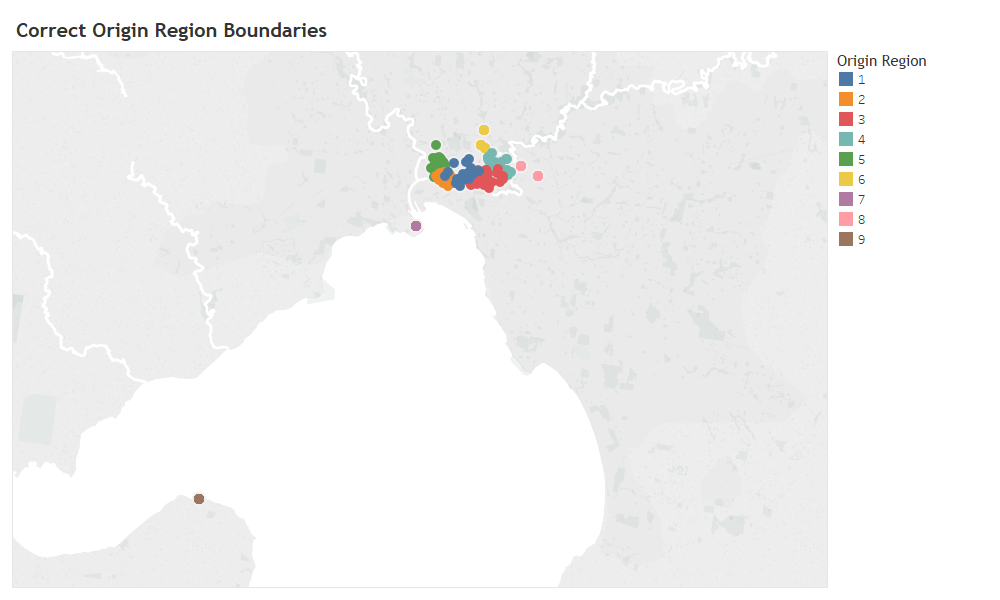

From the map it can be observed the clustering of all nine different `Origin Regions`. Two of the `Origin Regions` have only one consistent region point coordinates (Latitude & Longitude) for all points which are:
* **Origin Region 7**
* **Origin Region 9** 

Additionally, the coordinates of these two `Origin Regions` can be retrieved from the Panda's DataFrame `eda_correct_origin_destination_boundaries` for verification and used as a referencing point for comparison if any `Origin Region` anaomalies are detected in the `uber_ridesharing_transit_dirty_data.csv` datset throughout the Exploratory Data Analysis (EDA).

In [60]:
# finding the correct `Origin Latitude` and `Origin Longitude` coordinates where the `Origin Region` is 7 
display(eda_correct_origin_destination_boundaries.loc[eda_correct_origin_destination_boundaries['Origin Region'] == 7, 
                                  ['Origin Region', 'Origin Latitude', 'Origin Longitude']].drop_duplicates()) # print dataframe

# finding the correct `Origin Latitude` and `Origin Longitude` coordinates where the `Origin Region` is 9 
display(eda_correct_origin_destination_boundaries.loc[eda_correct_origin_destination_boundaries['Origin Region'] == 9, 
                                  ['Origin Region','Origin Latitude', 'Origin Longitude']].drop_duplicates()) # print dataframe

Origin Region  Origin Latitude  Origin Longitude
3              7       -37.861835        144.905716
1              7       -37.861835        144.905716

Origin Region  Origin Latitude  Origin Longitude
2               9       -38.110916        144.654173
12              9       -38.110916        144.654173

Despite the removal of duplicates using Panda's drop function **drop_duplicates()**, the output coordinates for both `Origin Region` **7** and **9** still have one additional duplicate each. This is likely, due to **floating point precision errors during comparison** , thus, can be ignored.  

Therefore, the unique `Origin Latitude` and `Origin Longitude` coordinates respectively for the correct **Origin Region 7** and **Origin Region 9** are:
* For Origin Region **7** the correct `Origin Latitude` is **-37.861835**  and the correct `Origin Longitude` is **144.905716** 
* For Origin Region **9** the correct `Origin Latitude` is **-38.110916**  and the correct `Origin Longitude` is **144.654173**

Now an equivalent map to the one created for the `Correct Origin Region Boundaries` from the dataset `correct_origin_destination_boundaries.csv` will also be created for the dataset `uber_ridesharing_transit_dirty_data.csv`. A dashboard of the side by side comparison between the two will be made as shown: 
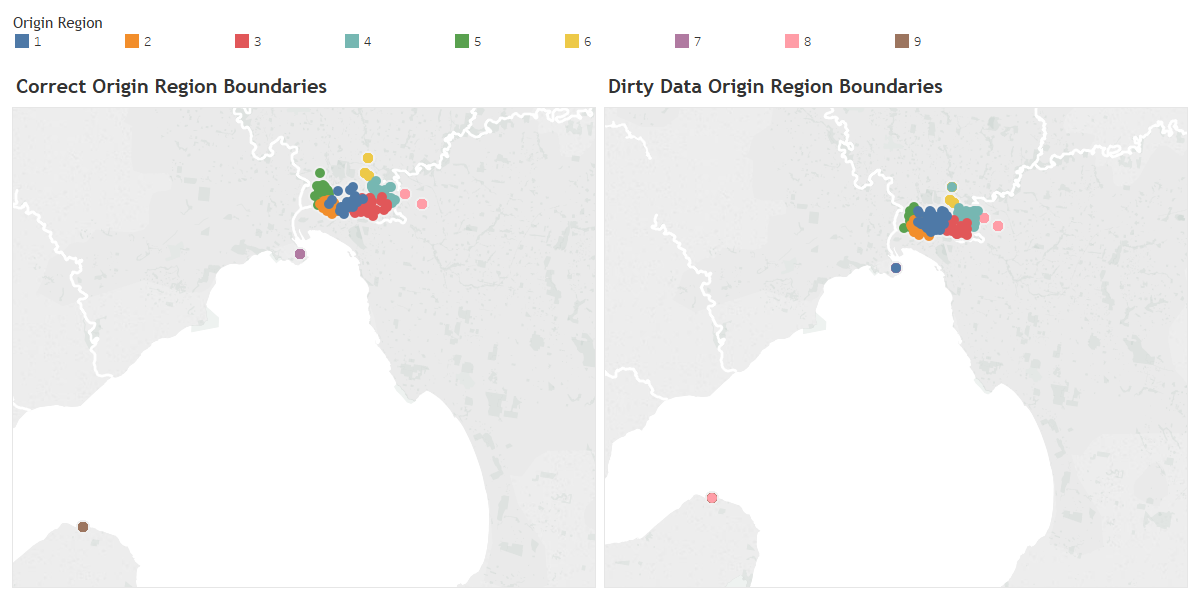

Initially, the two maps look identical with matching `Origin Region` **boundary/clusters**, however, to visually check for anomalies, the `Origin Regions` will be filtered sequentially starting from `Origin Region` **1** to `Origin Region` **9** on both the maps for accurate comparisons.  

So starting at `Origin Region` **1** the filtered map will look like this: 
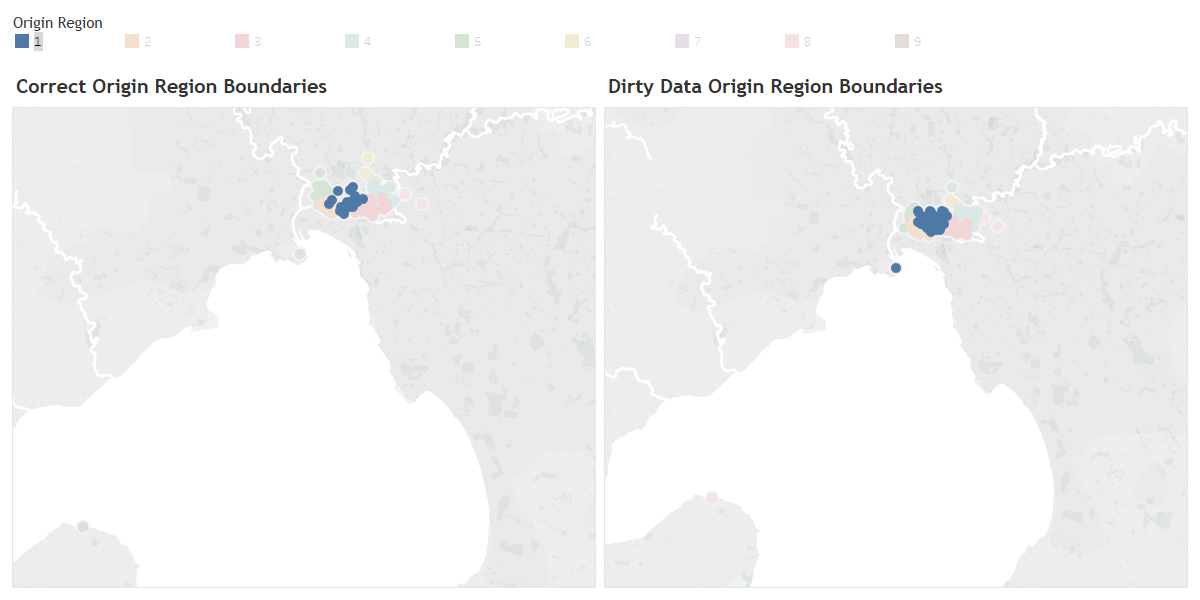

Immediately, an `Origin Region` **anaomly** is detected at: 
* **ID5383690091** with Origin Latitude **-37.86** and Origin Longitude **144.9057** where it **shouldn't** be Origin Region **1**

It can be deduced from conducting exploratory data analysis (EDA) that `Origin Region` is incorrect, therefore, the `Origin Latitude` and `Origin Longitude` is correct. 

Thus, with the `Origin Latitude` and `Origin Longitude` it can be determined that with comparison to the `Correct Origin Region Boundaries` map that for:
* **ID5383690091** with Origin Latitude **-37.86** and Origin Longitude **144.9057** the correct Origin Region **should** be Origin Region **7**

Similarly the same filtering method will be applied for `Origin Region` **2** which looks like this:
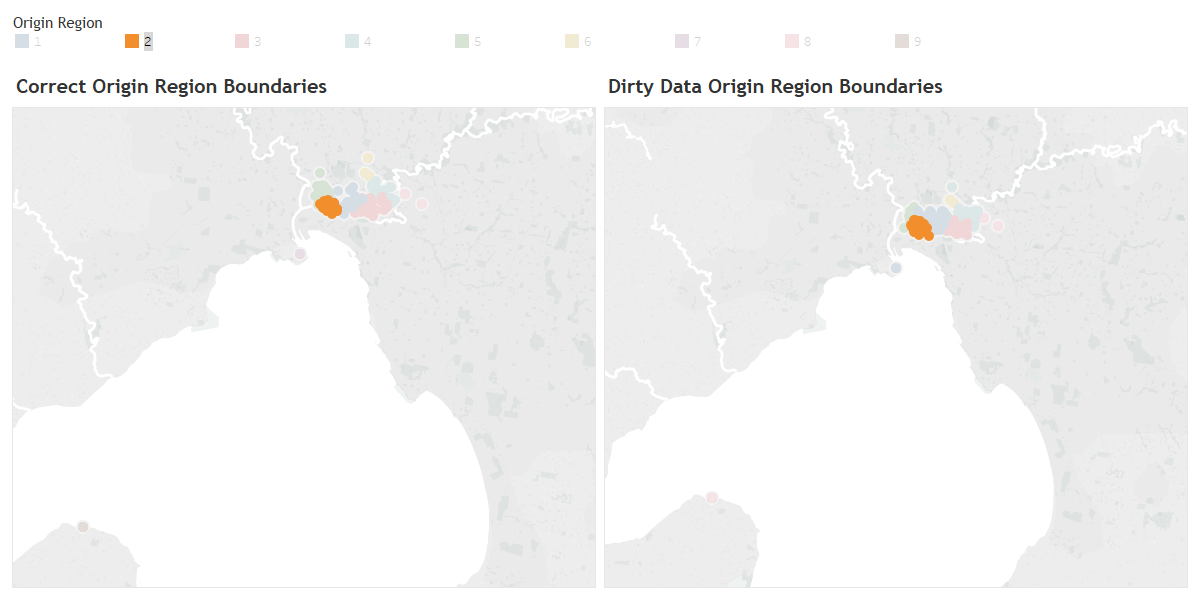

Thus, from the graphical comparisons for `Origin Region` **2** there's no anomalies as the clusters for the `Dirty Data Origin Region Boundaries` map matches the cluster for the `Correct Origin Region Boundaries` map. 

Next for `Origin Region` **3** the filtered map is:
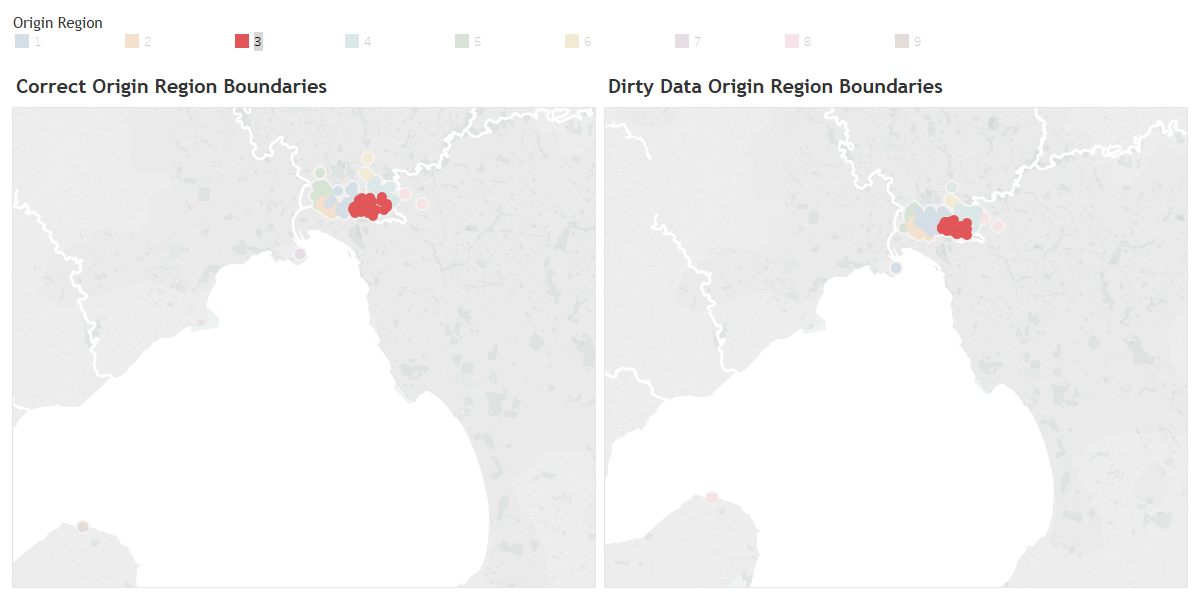

Similarly, like for `Origin Region` **2** the graphical comparisons for `Origin Region` **3** shows that there's no anomalies as the clusters for the `Dirty Data Origin Region Boundaries` map matches the cluster for the `Correct Origin Region Boundaries` map. 

The filtered map view for `Origin Region` **4** is:
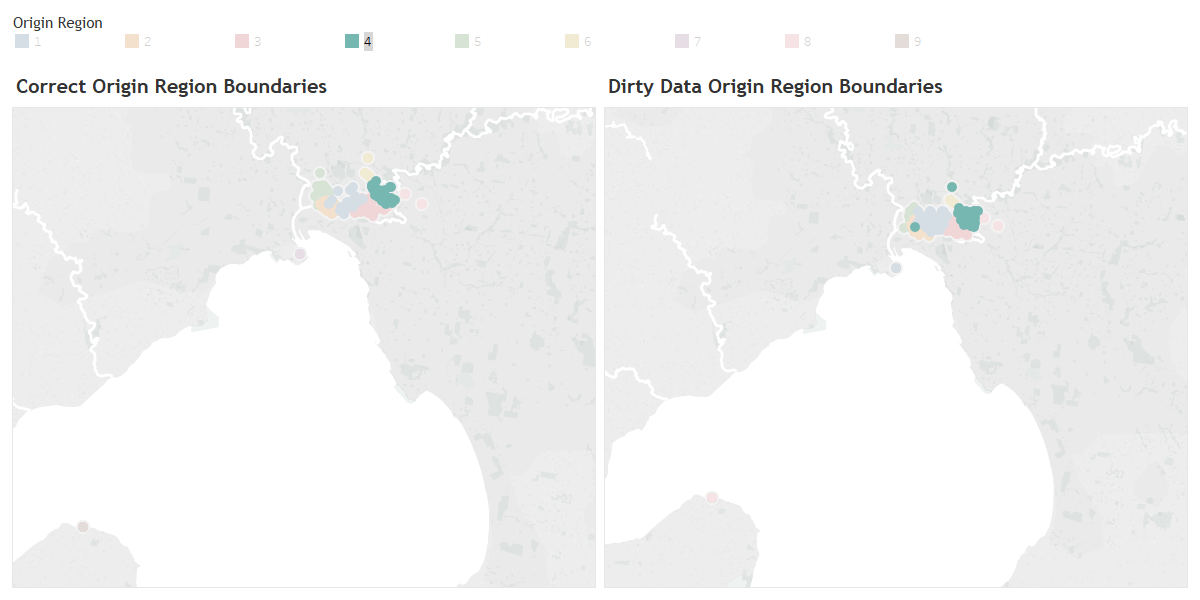

Immediately, from the `Dirty Data Origin Region Boundaries` map two anaomlaies can be observed which are: 
* **ID1674569584** with Origin Latitude **-37.82** and Origin Longitude **144.9319** **shouldn't** be Origin Region **4**
* **ID5386368571** with Origin Latitude **-37.77** and Origin Longitude **144.9836** **shouldn't** be Origin Region **4**


It can be deduced from conducting exploratory data analysis (EDA) that `Origin Region` is incorrect, therefore, the `Origin Latitude` and `Origin Longitude` is correct. 

Thus, with the `Origin Latitude` and `Origin Longitude` it can be determined that with comparison to the `Correct Origin Region Boundaries` map that for:
* **ID1674569584** with Origin Latitude **-37.82** and Origin Longitude **144.9319** the correct Origin Region **should** be Origin Region **2**
* **ID5386368571** with Origin Latitude **-37.77** and Origin Longitude **144.9836** the correct Origin Region **should** be Origin Region **6**

These were deduced, by comparing the correct **Origin Latitude** and **Origin Longitude** respectively with the `Correct Origin Region Boundaries` map to match the point with the closes coordinates similar to each `ID` respectively and that correct `Origin Region` was used. 

The filtered map for `Origin Region` **5** is: 
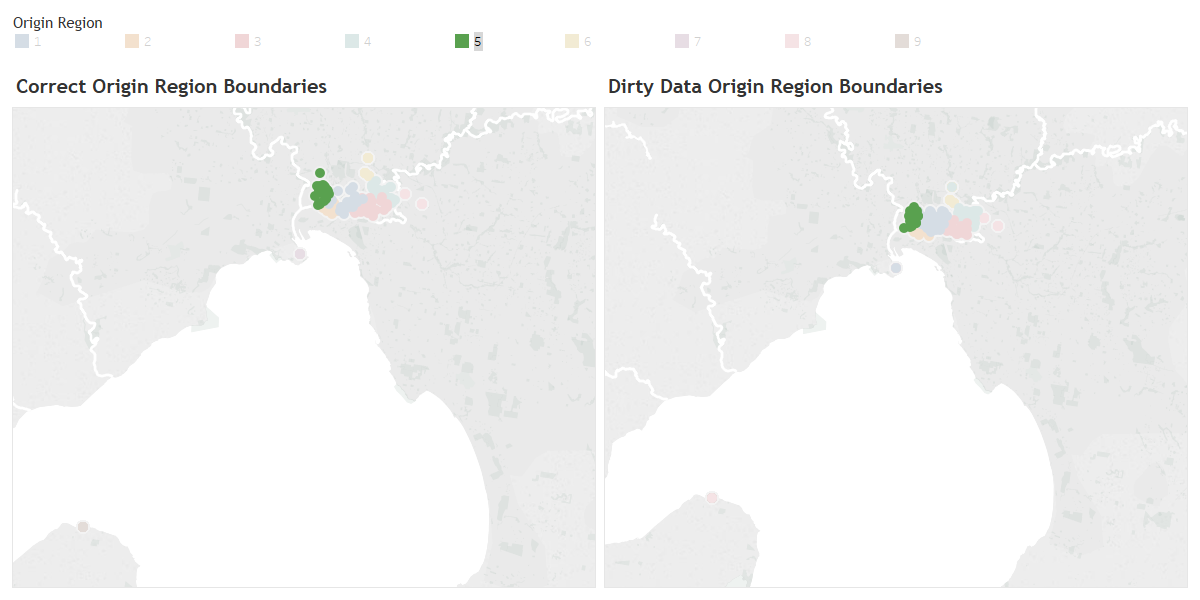

Thus, from the graphical comparisons for `Origin Region` **5** it can be observed there's no anomalies as the clusters for the `Dirty Data Origin Region Boundaries` map matches the cluster for the `Correct Origin Region Boundaries` map. 


Next the filtered map for `Origin Region` **6** is:
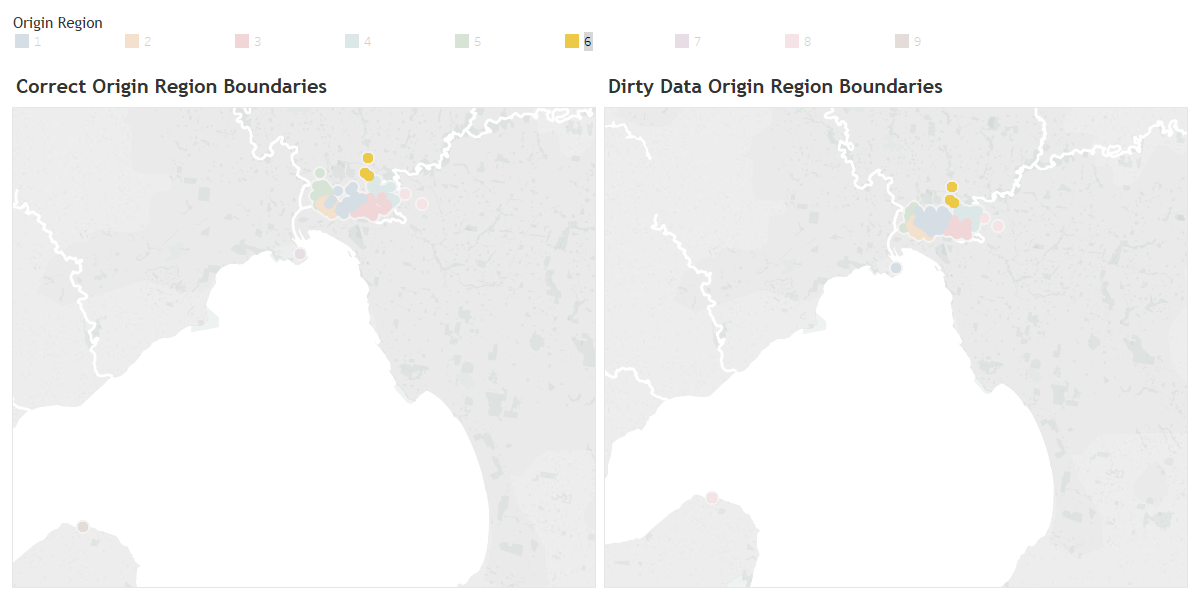

Thus, from the graphical comparisons for `Origin Region` **6** it can be observed there's no anomalies as the clusters for the `Dirty Data Origin Region Boundaries` map matches the cluster for the `Correct Origin Region Boundaries` map. 

The filtered map view for `Origin Region` **7** is:
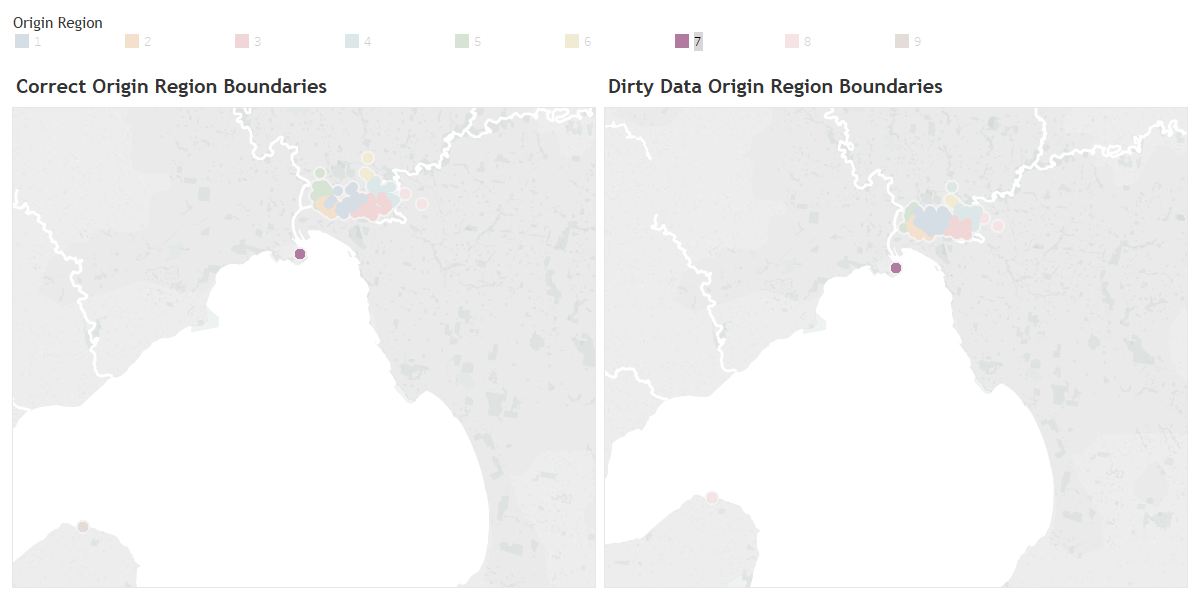

From the graphical comparisons for `Origin Region` **7** it can be observed there's no anomalies as the clusters for the `Dirty Data Origin Region Boundaries` map matches the cluster for the `Correct Origin Region Boundaries` map. 

Next the filtered map view for `Origin Region` **8** is:
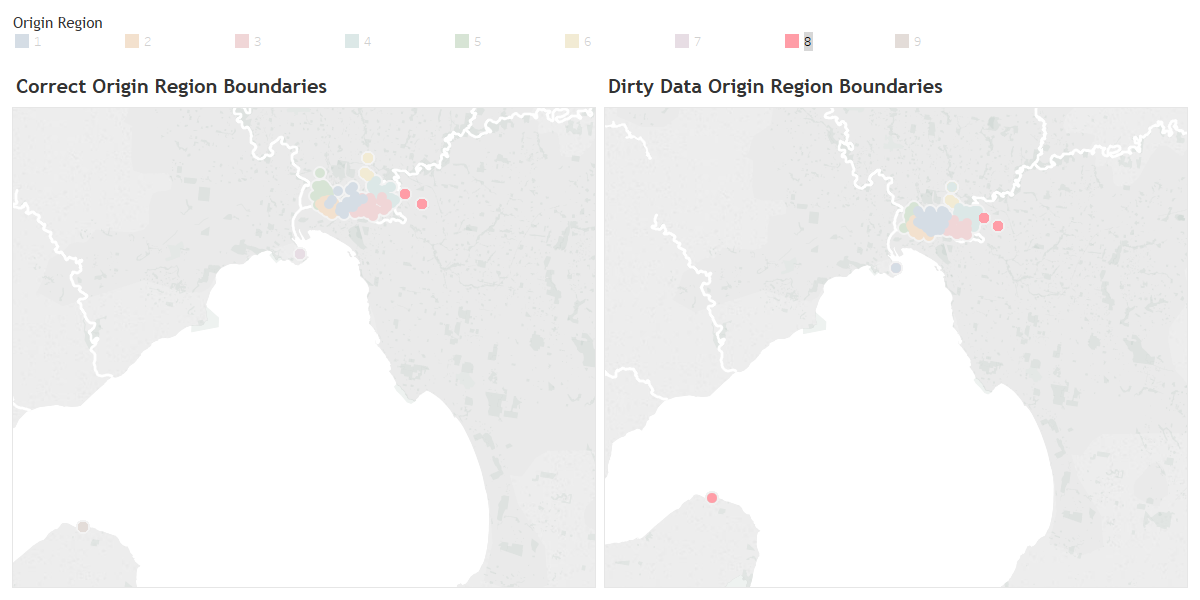

Immediately, from the `Dirty Data Origin Region Boundaries` map an anaomly can be detected at: 
* **ID5139758343** with Origin Latitude **-38.11** and Origin Longitude **144.6542** **shouldn't** be Origin Region **8** 


It can be deduced from conducting exploratory data anlysis (EDA)that as the `Origin Region` is incorrect, therefore, the `Origin Latitude` and `Origin Longitude` is correct. 

Thus, with the `Origin Latitude` and `Origin Longitude` it can be determined that with comparison to the `Correct Origin Region Boundaries` map that for:
* **ID5139758343** with Origin Latitude **-38.11** and Origin Longitude **144.6542** the correct Origin Region **should** be Origin Region **9** 


This was deduced, by comparing the correct **Origin Latitude** and **Origin Longitude** respectively with the `Correct Origin Region Boundaries` map to match the point with the closes coordinates similar to each `ID` respectively and that correct `Origin Region` was used. 

Finally, the filtered map view for `Origin Region` **9** is:
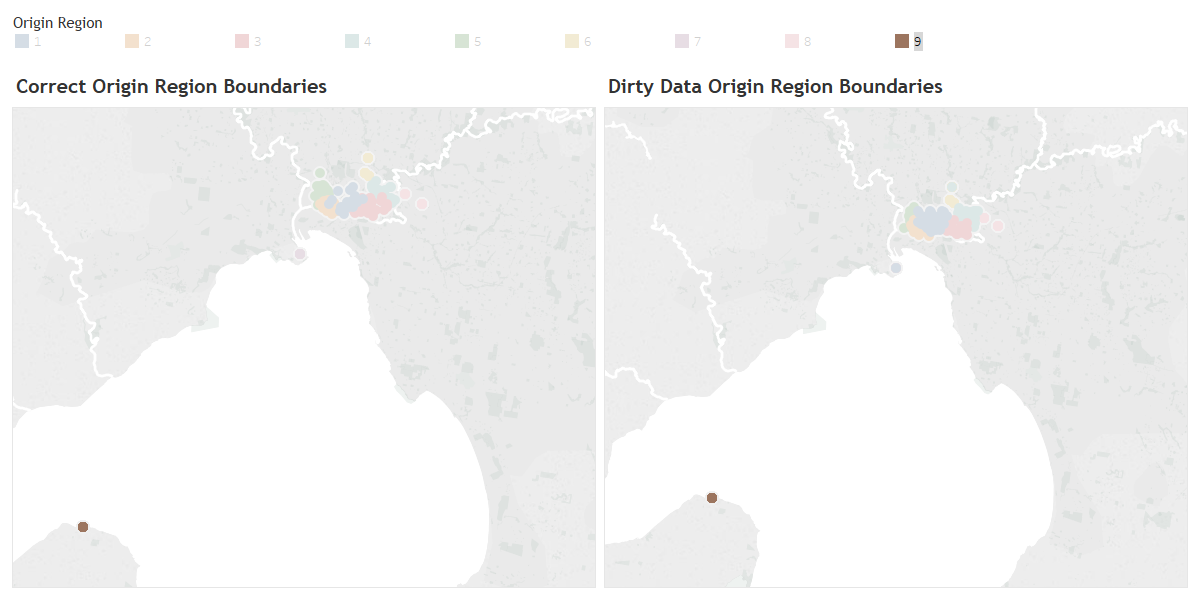

Thus, from the graphical comparisons for `Origin Region` **9** it can be observed there's no anomalies as the clusters for the `Dirty Data Origin Region Boundaries` map matches the cluster for the `Correct Origin Region Boundaries` map. 

Through Exploratory Data Analysis (EDA) using Tableau to compare the correct `Origin Region` boundaries from the Panda's DataFrame `eda_correct_origin_destination_boundaries` to csv dataset `correct_origin_destination_boundaries.csv` with the dirty data set boundaries `uber_ridesharing_transit_dirty_data.csv`, the following incorrect `Origin Region` were identified with their respective unique row `ID` and correspodning `Origin Latitude` and `Origin Longitude`:

* **ID5383690091** with Origin Latitude **-37.86** and Origin Longitude **144.9057** **shouldn't** be Origin Region **1**
* **ID1674569584** with Origin Latitude **-37.82** and Origin Longitude **144.9319** **shouldn't** be Origin Region **4**
* **ID5386368571** with Origin Latitude **-37.77** and Origin Longitude **144.9836** **shouldn't** be Origin Region **4**
* **ID5139758343** with Origin Latitude **-38.11** and Origin Longitude **144.6542** **shouldn't** be Origin Region **8** 

It can be deduced through inference that as `Origin Region` is incorrect, therefore, the `Origin Latitude` and `Origin Longitude` is correct. 

Thus, with the `Origin Latitude` and `Origin Longitude` it can be determined that with comparison to the `Correct Origin Region Boundaries` map that for:
* **ID5383690091** with Origin Latitude **-37.86** and Origin Longitude **144.9057** the correct Origin Region **should** be Origin Region **7**
* **ID1674569584** with Origin Latitude **-37.82** and Origin Longitude **144.9319** the correct Origin Region **should** be Origin Region **2**
* **ID5386368571** with Origin Latitude **-37.77** and Origin Longitude **144.9836** the correct Origin Region **should** be Origin Region **6**
* **ID5139758343** with Origin Latitude **-38.11** and Origin Longitude **144.6542** the correct Origin Region **should** be Origin Region **9** 

Thus, now all rows with the incorrect `Origin Region` will be retrieved from the Panda's DataFrame `dirty_data_df` using the unique values in the `ID` column to first validate that the errors are a match and then correcting these anaomalies.  

In [61]:
# retrieve all rows using the unique `ID` where Origin Region anomalies were identified and return the columns 
# 'Unnamed: 0', 'Origin Region', 'Origin Latitude' and 'Origin Longitude' wit their respective values for each row output 
dirty_data_df.loc[(dirty_data_df['Unnamed: 0'] == 'ID5383690091') | (dirty_data_df['Unnamed: 0'] == 'ID1674569584') |
                  (dirty_data_df['Unnamed: 0'] == 'ID5386368571') | (dirty_data_df['Unnamed: 0'] == 'ID5139758343'),
                 ['Unnamed: 0', 'Origin Region', 'Origin Latitude', 'Origin Longitude']] # retrieve rows 

Unnamed: 0  Origin Region  Origin Latitude  Origin Longitude
12  ID5383690091              1       -37.861835        144.905716
18  ID5386368571              4       -37.773803        144.983647
24  ID1674569584              4       -37.816762        144.931864
26  ID5139758343              8       -38.110916        144.654173

Now that all the rows with the identified `Origin Region` anomalies have been validated they'll be corrected and reassigned the correct `Origin Region` values as determined by comparing with the Correct Origin Region Boundaries map which are for: 
* **ID5383690091** with Origin Latitude **-37.86** and Origin Longitude **144.9057** the correct Origin Region **should** be Origin Region **7**
* **ID1674569584** with Origin Latitude **-37.82** and Origin Longitude **144.9319** the correct Origin Region **should** be Origin Region **2**
* **ID5386368571** with Origin Latitude **-37.77** and Origin Longitude **144.9836** the correct Origin Region **should** be Origin Region **6**
* **ID5139758343** with Origin Latitude **-38.11** and Origin Longitude **144.6542** the correct Origin Region **should** be Origin Region **9** 

Hence, these rows in the Panda's DataFrame `dirty_data_df` will be identified using their unique `ID` and reassigned the correct `Origin Region` values. 

In [62]:
# reassign the correct Origin Region values for all the rows identified to have anomalies in the `Origin Region` 
# column in the dataset 29976464.csv which is stored as a Panda's DataFrame under the variable name dirty_data_df
dirty_data_df.loc[dirty_data_df['Unnamed: 0'] == 'ID5383690091', 'Origin Region'] = 7 # correct Origin Region is 7
dirty_data_df.loc[dirty_data_df['Unnamed: 0'] == 'ID1674569584', 'Origin Region'] = 2 # correct Origin Region is 2
dirty_data_df.loc[dirty_data_df['Unnamed: 0'] == 'ID5386368571', 'Origin Region'] = 6 # correct Origin Region is 6
dirty_data_df.loc[dirty_data_df['Unnamed: 0'] == 'ID5139758343', 'Origin Region'] = 9 # correct Origin Region is 9

Finally, now that all the rows in the dataset `uber_transit_dirty_data.csv` which is stored as a Panda's DataFrame under the variable name `dirty_data_df` have had their identified `Origin Region` anaomalies corrected. Next, retrieve all the corrected rows using their respective unique `ID` and verify they were all correctly assigned their `Origin Region` values. 

In [63]:
# validate that all the rows with the identified `Origin Region` anomalies have been properly reassigned their respective
# correct `Origin Region` values 
dirty_data_df.loc[(dirty_data_df['Unnamed: 0'] == 'ID5383690091') | (dirty_data_df['Unnamed: 0'] == 'ID1674569584') |
                  (dirty_data_df['Unnamed: 0'] == 'ID5386368571') | (dirty_data_df['Unnamed: 0'] == 'ID5139758343'),
                 ['Unnamed: 0', 'Origin Region', 'Origin Latitude', 'Origin Longitude']] # retrieve rows 

Unnamed: 0  Origin Region  Origin Latitude  Origin Longitude
12  ID5383690091              7       -37.861835        144.905716
18  ID5386368571              6       -37.773803        144.983647
24  ID1674569584              2       -37.816762        144.931864
26  ID5139758343              9       -38.110916        144.654173

### 6.4.6 Checking Destination Region Column 
<a id="checking destination"></a>

In [64]:
dirty_data_df['Destination Region'].value_counts()

7    42
8    40
5    40
4    39
3    33
2    33
1    33
9    32
6    25
Name: Destination Region, dtype: int64

In [65]:
dirty_data_df.loc[(dirty_data_df['Destination Region'] == 7) & (dirty_data_df['Destination Latitude'] > -37.8618349) &
                  (dirty_data_df['Destination Longitude'] > 144.905716)] 

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
42  ID3545944991          1              2                   7   

    Origin Latitude  Origin Longitude  Destination Latitude  \
42        -37.80942        144.931671            -37.802343   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
42             144.943655               1599.0     2018-02-27       11:05:23   

    Travel Time(s) Arrival Time  Fare$  
42          397.38     11:12:00   4.04

### 6.4.6.1 Tableau graphical Exploratory Data Analysis (EDA) to determine Destination Region boundaries 
<a id="tableau g"></a>

Firstly, a graphical map representation of all the correct `Destination Region` boundaries from the dataset `correct_origin_destination_boundaries.csv` created in section **6.4.5.2 Tableau graphical Exploratory Data Analysis (EDA) to determine Origin Region boundaries** will be used to generate the map:
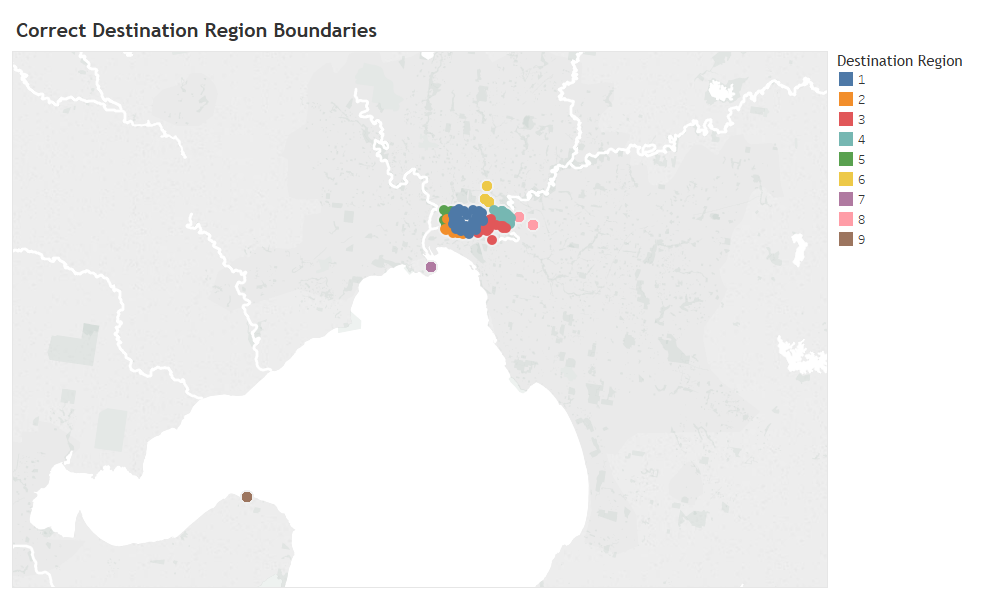

From the map it can be observed the clustering of all nine different `Destination Regions`. Two of the `Destination Regions` have only one region point coordinates (Latitude and Longitude) which are:
* **Destination Region 7**
* **Destination Region 9** 

Additionally, the coordinates of these two `Destination Regions` can be retrieved from the Panda's DataFrame `eda_correct_origin_destination_boundaries` for verification and used as a referencing point for comparison if any `Destination Region` anaomalies are detected in the `uber_ridesharing_transit_dirty_data.csv` datset throughout the Exploratory Data Analysis (EDA).

In [66]:
# finding the correct `Destination Latitude` and `Destination Longitude` coordinates where the `Destination Region` is 7 
display(eda_correct_origin_destination_boundaries.loc[eda_correct_origin_destination_boundaries['Destination Region'] == 7, 
                                  ['Destination Region', 'Destination Latitude', 'Destination Longitude']].drop_duplicates())#df

# finding the correct `Destination Latitude` and `Destination Longitude` coordinates where the `Destination Region` is 9 
display(eda_correct_origin_destination_boundaries.loc[eda_correct_origin_destination_boundaries['Destination Region'] == 9, 
                                  ['Destination Region', 'Destination Latitude', 'Destination Longitude']].drop_duplicates())#df

Destination Region  Destination Latitude  Destination Longitude
10                   7            -37.861835             144.905716
6                    7            -37.861835             144.905716

Destination Region  Destination Latitude  Destination Longitude
1                   9            -38.110916             144.654173
2                   9            -38.110916             144.654173

Despite the removal of duplicates using Panda's drop function **drop_duplicates()**, the output coordinates for both `Destination Region` **7** and **9** still have one additional duplicate each. This is likely, due to **floating point precision errors during comparison** , thus, can be ignored.  

Therefore, the unique `Destination Latitude` and `Destination Longitude` coordinates respectively for the correct **Destination Region 7** and **Destination Region 9** are:
* For Destination Region **7** the correct `Destination Latitude` is **-37.861835**  and the correct `Destination Longitude` is **144.905716** 
* For Destination Region **9** the correct `Destination Latitude` is **-38.110916**  and the correct `Destination Longitude` is **144.654173**

Now an equivalent map to the one created for the `Correct Destination Region Boundaries` from the dataset `correct_origin_destination_boundaries.csv` will also be created for the dataset `uber_ridesharing_transit_dirty_data.csv`. A dashboard of the side by side comparison between the two will be made as shown: 
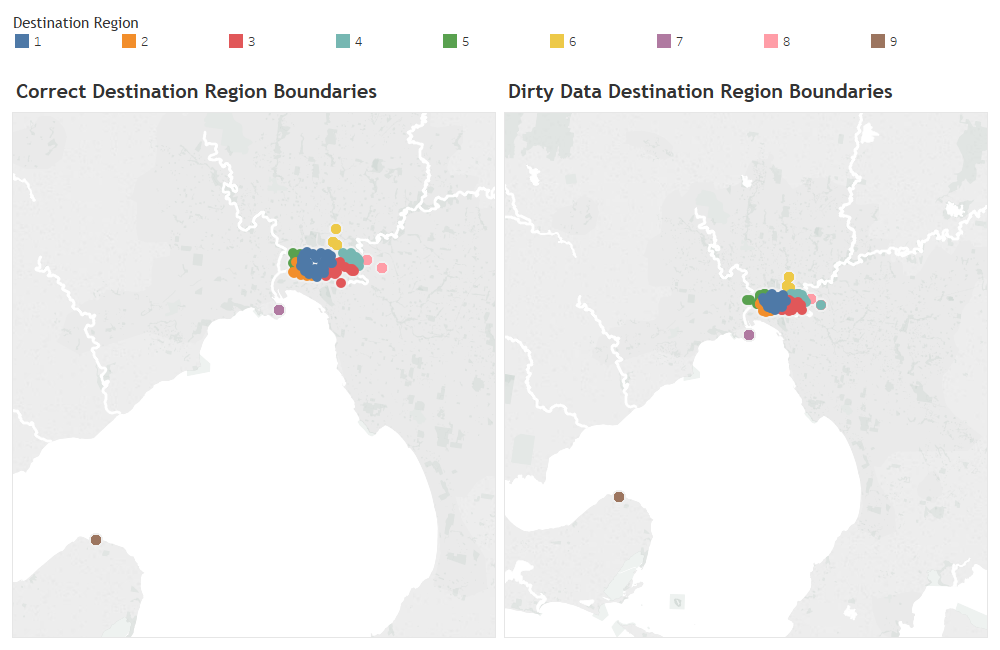

Initially, the two maps look identical with matching `Destination Region` **boundary/clusters**, however, to visually check for anomalies, the `Destination Regions` will be filtered sequentially starting from `Destination Region` **1** to `Destination Region` **9** on both the maps for accurate comparisons.  

So starting at `Destination Region` **1** the filtered map will look like this: 
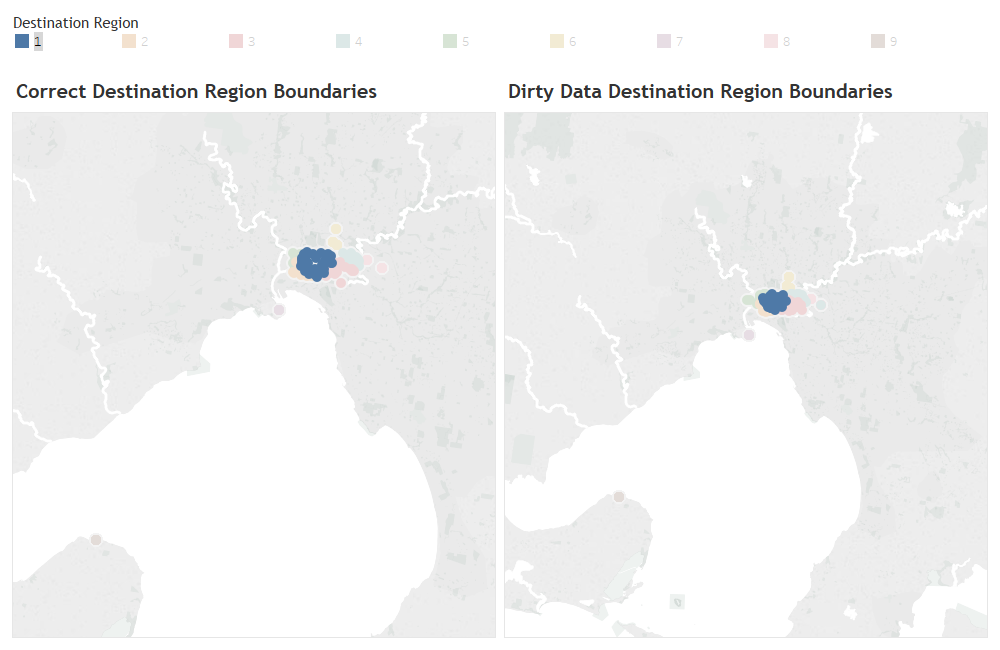

Thus, from the graphical comparisons for `Destination Region` **1** there's no anomalies as the clusters for the `Dirty Data Destination Region Boundaries` map matches the cluster for the `Correct Destination Region Boundaries` map. 

Next the filtered map view for `Destination Region` **2** is:
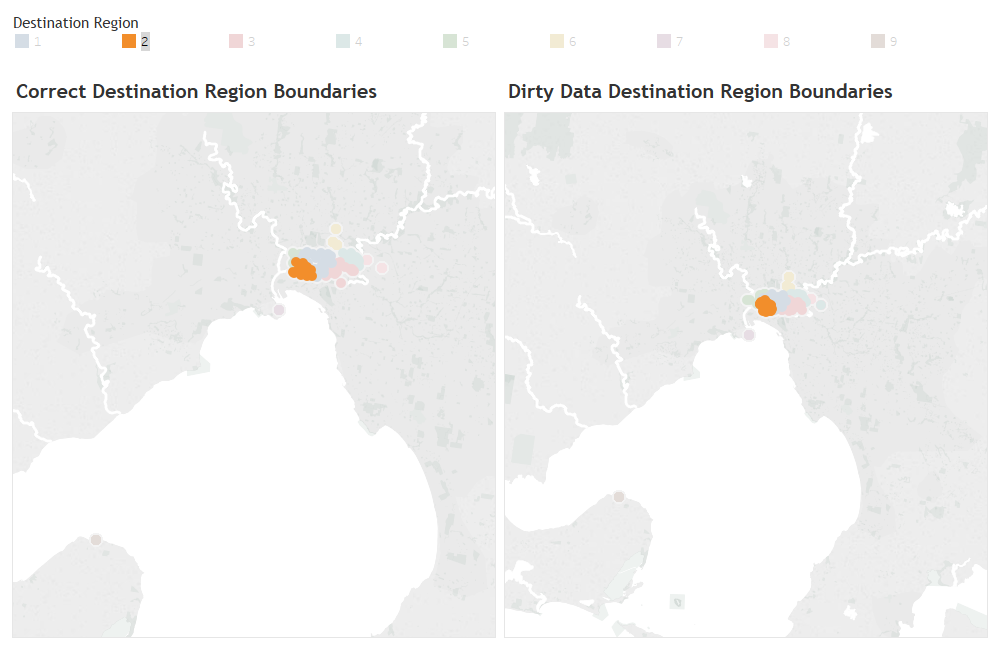


Thus, from the graphical comparisons for `Destination Region` **2** there's no anomalies as the clusters for the `Dirty Data Destination Region Boundaries` map matches the cluster for the `Correct Destination Region Boundaries` map. 

The filtered map view for `Destination Region` **3** is:
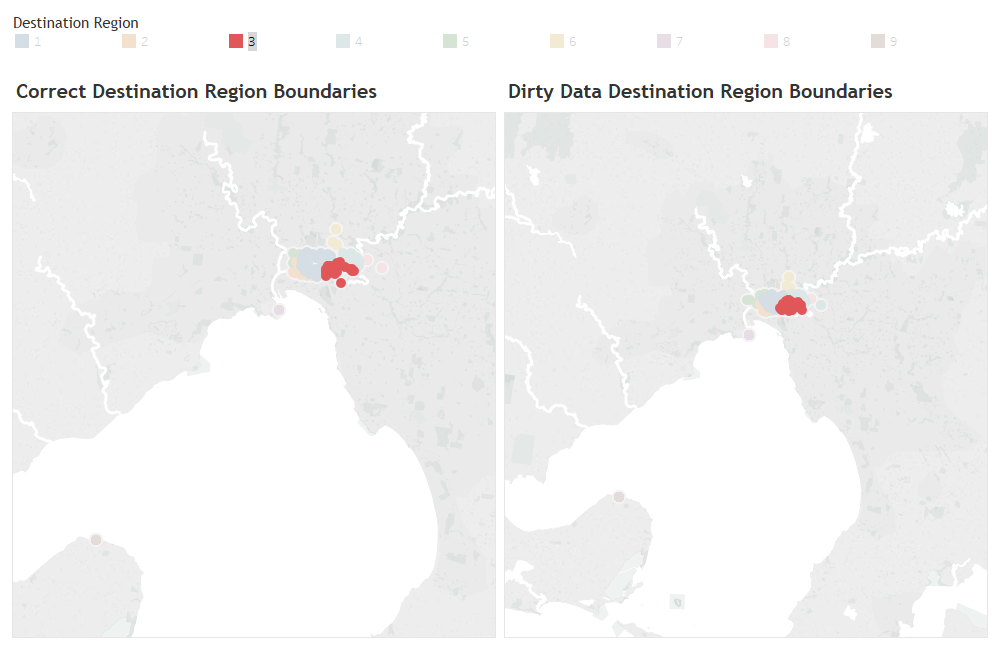

Thus, from the graphical comparisons for `Destination Region` **3** there's no anomalies as the clusters for the `Dirty Data Destination Region Boundaries` map matches the cluster for the `Correct Destination Region Boundaries` map. 

The filtered map view for `Destination Region` **4** is:
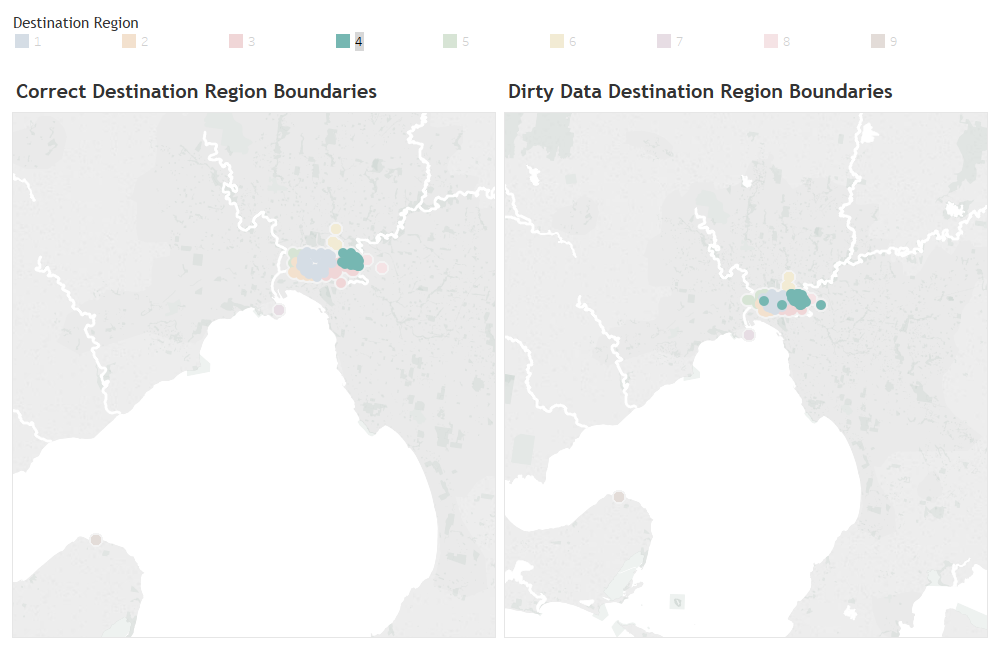

Immediately, from the `Dirty Data Destination Region Boundaries` map three anaomlaies can be observed which are: 
* **ID5887313121** with Destination Latitude **-37.81** and Destination Longitude **144.9360** **shouldn't** be Destination Region **4**
* **ID1790726671** with Destination Latitude **-37.82** and Destination Longitude **144.9693** **shouldn't** be Destination Region **4**
* **ID3938713926** with Destination Latitude **-37.82** and Destination Longitude **145.0465** **shouldn't** be Destination Region **4**


As stated in **Assessment 2: Exploratory Data Analysis and Data Cleansing** that **"no rows carry more than one error"**, thus, from this it can be deduced that as the `Destination Region` is incorrect, therefore, the `Destination Latitude` and `Destination Longitude` are correct. 

Thus, with the `Destination Latitude` and `Destination Longitude` it can be determined that with comparison to the `Correct Destination Region Boundaries` map that for:
* **ID5887313121** with Destination Latitude **-37.81** and Destination Longitude **144.9360** the correct Destination Region **should** be Origin Region **1**
* **ID1790726671** with Destination Latitude **-37.82** and Destination Longitude **144.9693** the correct Destination Region **should** be Origin Region **3**
* **ID3938713926** with Destination Latitude **-37.82** and Destination Longitude **145.0465** the correct Destination Region **should** be Origin Region **8**


These were deduced, by comparing the correct **Destination Latitude** and **Destination Longitude** respectively with the `Correct Destination Region Boundaries` map to match the point with the closest coordinates similar to each `ID` respectively so that correct `Destination Region` was used. 

The filtered map view for `Destination Region` **5** is:
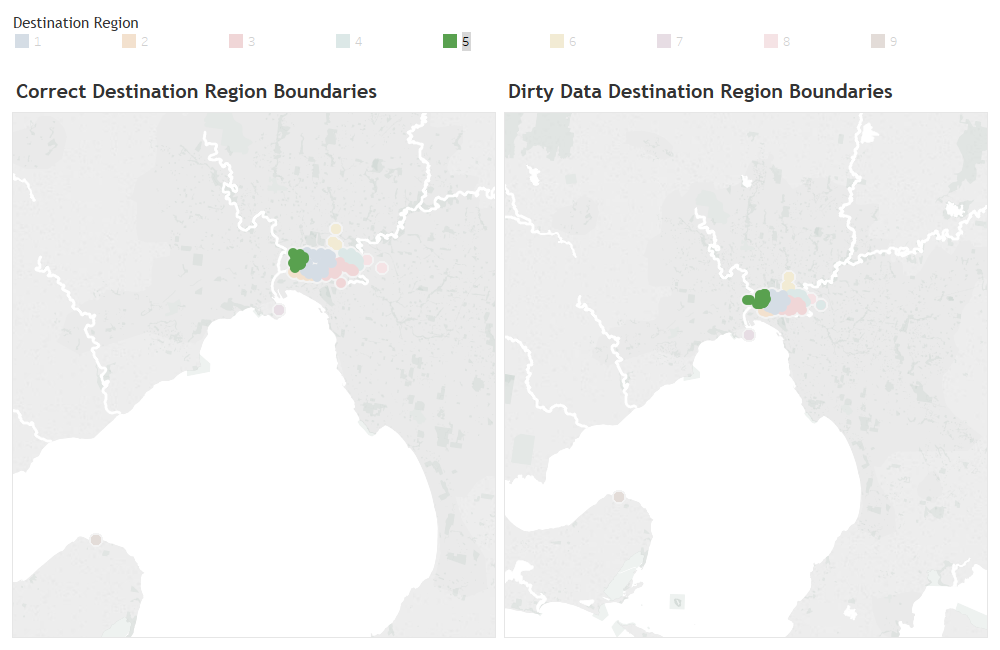

Thus, from the graphical comparisons for `Destination Region` **5** there's no anomalies as the clusters for the `Dirty Data Destination Region Boundaries` map matches the cluster for the `Correct Destination Region Boundaries` map. 

Next the filtered map view for `Destination Region` **6** is:
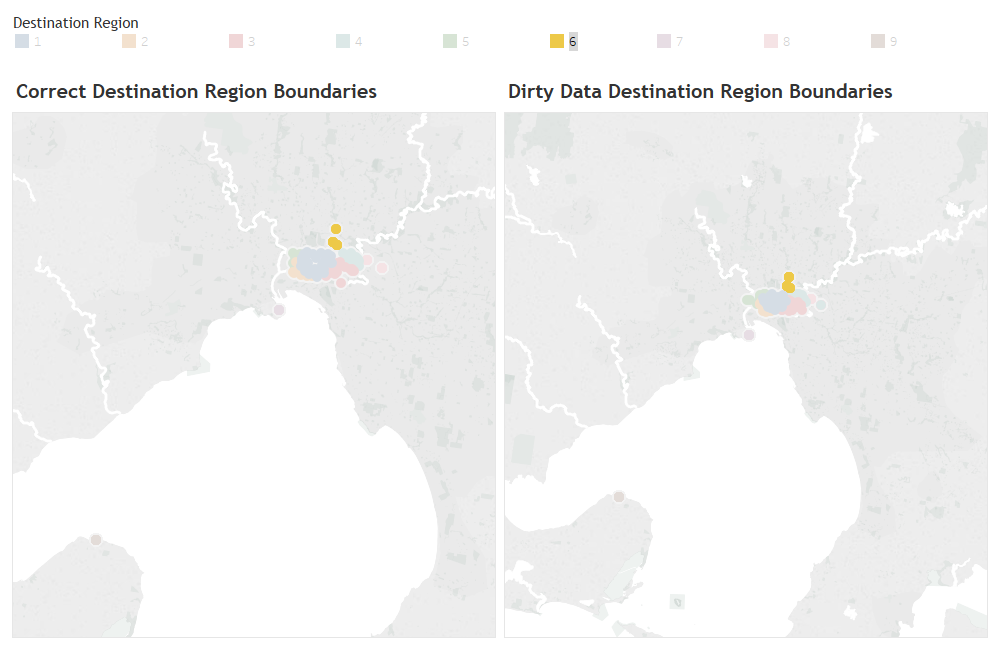

Thus, from the graphical comparisons for `Destination Region` **6** there's no anomalies as the clusters for the `Dirty Data Destination Region Boundaries` map matches the cluster for the `Correct Destination Region Boundaries` map. 

The filtered map view for `Destination Region` **7** is:
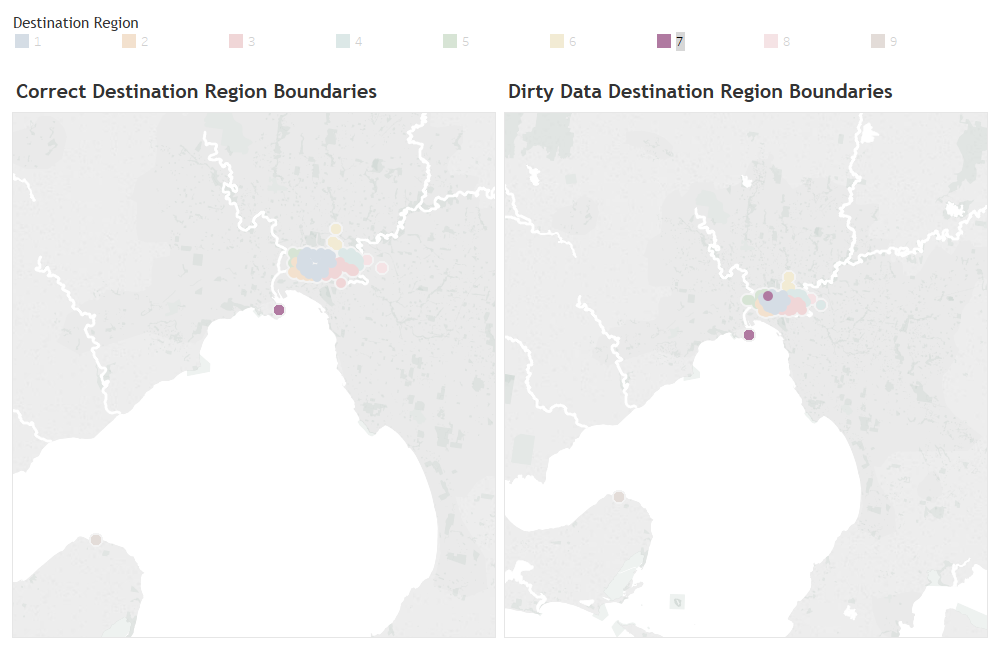

Immediately, from the `Dirty Data Destination Region Boundaries` map an anaomlay can be observed which is: 
* **ID3545944991** with Destination Latitude **-37.80** and Destination Longitude **144.9437** **shouldn't** be Destination Region **7**

As stated in **Assessment 2: Exploratory Data Analysis and Data Cleansing** that **"no rows carry more than one error"**, thus, from this it can be deduced that as the `Destination Region` is incorrect, therefore, the `Destination Latitude` and `Destination Longitude` are correct. 

Thus, with the `Destination Latitude` and `Destination Longitude` it can be determined that with comparison to the `Correct Destination Region Boundaries` map that for:
* **ID3545944991** with Destination Latitude **-37.80** and Destination Longitude **144.9437** the correct Destination Region **should** be Origin Region **1**


This was deduced, by comparing the correct **Destination Latitude** and **Destination Longitude** respectively with the `Correct Destination Region Boundaries` map to match the point with the closest coordinates similar to the unique `ID` so that the correct `Destination Region` was used. 

The filtered map view for `Destination Region` **8** is:
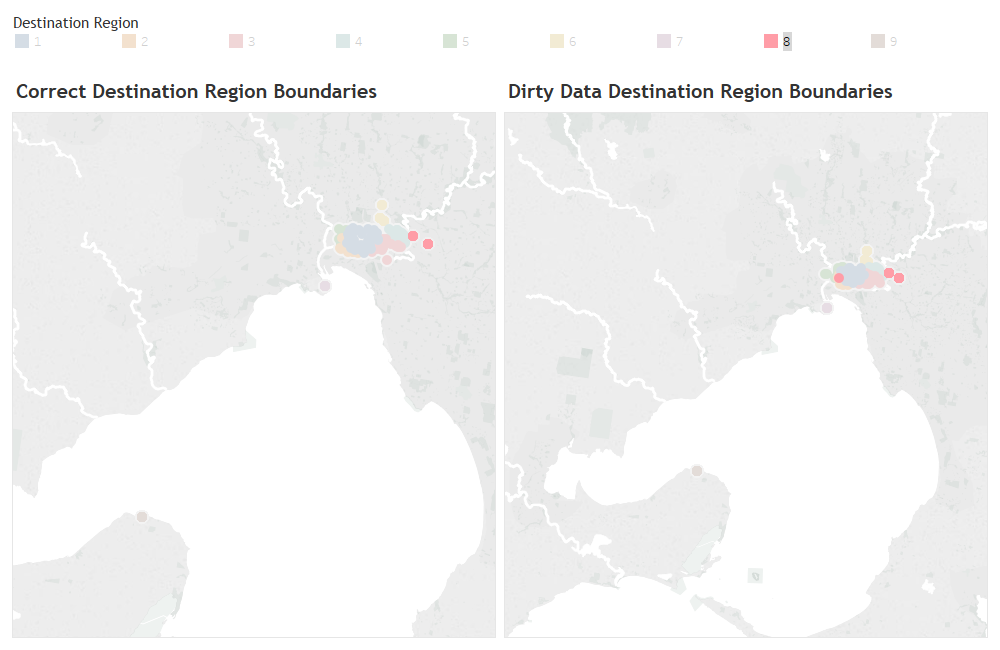

Immediately, from the `Dirty Data Destination Region Boundaries` map three anaomlaies can be observed which are: 
* **ID1255300750** with Destination Latitude **-37.82** and Destination Longitude **144.9287** **shouldn't** be Destination Region **8**


It can be deduced through inference that `Destination Region` is incorrect, therefore, the `Destination Latitude` and `Destination Longitude` are correct. 

Thus, with the `Destination Latitude` and `Destination Longitude` it can be determined that with comparison to the `Correct Destination Region Boundaries` map that for:
* **ID1255300750** with Destination Latitude **-37.82** and Destination Longitude **144.9287** the correct Destination Region **should** be Origin Region **2**


This was deduced, by comparing the correct **Destination Latitude** and **Destination Longitude** respectively with the `Correct Destination Region Boundaries` map to match the point with the closest coordinates similar to the unique `ID` so that the correct `Destination Region` was used. 

Lastly, the filtered map view for `Destination Region` **9** is:
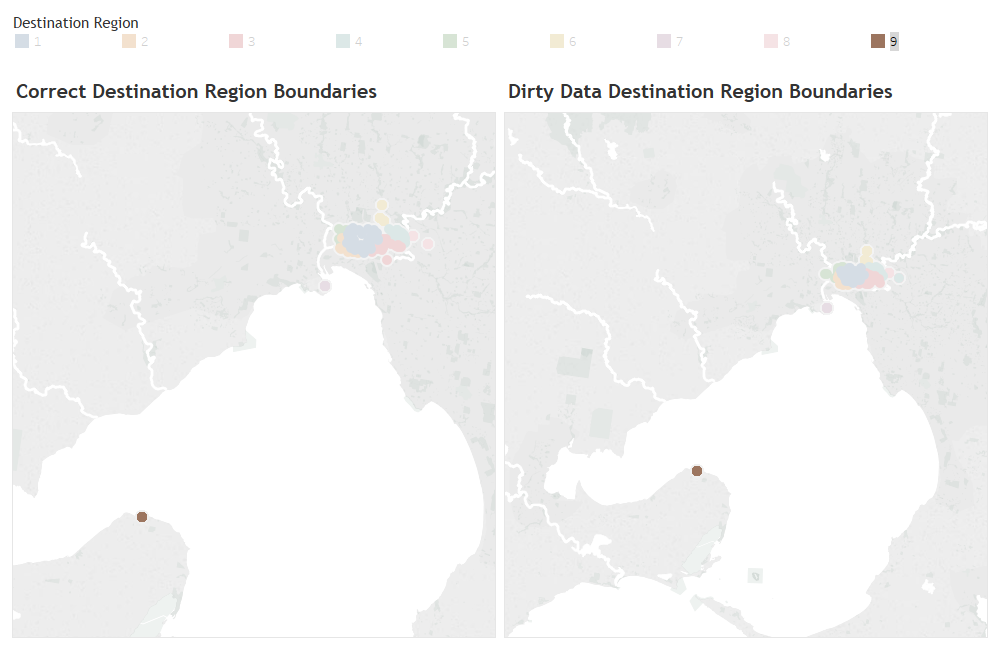

Thus, from the graphical comparisons for `Destination Region` **9** there's no anomalies as the clusters for the `Dirty Data Destination Region Boundaries` map matches the cluster for the `Correct Destination Region Boundaries` map. 

Through Exploratory Data Analysis (EDA) using Tableau to compare the correct `Destination Region` boundaries from the Panda's DataFrame `eda_correct_origin_destination_boundaries` to csv dataset `correct_origin_destination_boundaries.csv` with the dirty data set boundaries `uber_ridesharing_transit_dirty_data.csv`, the following incorrect `Destination Region` were identified with their respective unique row `ID` and correspodning `Destination Latitude` and `Destination Longitude`:

* **ID5887313121** with Destination Latitude **-37.81** and Destination Longitude **144.9360** **shouldn't** be Destination Region **4** 
* **ID1790726671** with Destination Latitude **-37.82** and Destination Longitude **144.9693** **shouldn't** be Destination Region **4**
* **ID3938713926** with Destination Latitude **-37.82** and Destination Longitude **145.0465** **shouldn't** be Destination Region **4**
* **ID3545944991** with Destination Latitude **-37.80** and Destination Longitude **144.9437** **shouldn't** be Destination Region **7**
* **ID1255300750** with Destination Latitude **-37.82** and Destination Longitude **144.9287** **shouldn't** be Destination Region **8** 

Thus, with the `Destination Latitude` and `Destination Longitude` it can be determined that with comparison to the `Correct Destination Region Boundaries` map that for:
* **ID5887313121** with Destination Latitude **-37.81** and Destination Longitude **144.9360** the correct Destination Region **should** be Origin Region **1**
* **ID1790726671** with Destination Latitude **-37.82** and Destination Longitude **144.9693** the correct Destination Region **should** be Origin Region **3**
* **ID3938713926** with Destination Latitude **-37.82** and Destination Longitude **145.0465** the correct Destination Region **should** be Origin Region **8**
* **ID3545944991** with Destination Latitude **-37.80** and Destination Longitude **144.9437** the correct Destination Region **should** be Origin Region **1**
* **ID1255300750** with Destination Latitude **-37.82** and Destination Longitude **144.9287** the correct Destination Region **should** be Origin Region **2**

Thus, now all rows with the incorrect `Destination Region` will be retrieved from the Panda's DataFrame `dirty_data_df` using the unique values in the `ID` column to first validate that the errors are a match and then correcting these anaomalies.  

In [67]:
# retrieve all rows using the unique `ID` where Destination Region anomalies were identified and return the columns 
# 'Unnamed: 0', 'Destination Region', 'Destination Latitude' and 'Destination Longitude' wit their respective values for each 
# row output 
dirty_data_df.loc[(dirty_data_df['Unnamed: 0'] == 'ID5887313121') | (dirty_data_df['Unnamed: 0'] == 'ID1790726671') |
                  (dirty_data_df['Unnamed: 0'] == 'ID3938713926') | (dirty_data_df['Unnamed: 0'] == 'ID3545944991')|
                  (dirty_data_df['Unnamed: 0'] == 'ID1255300750'), 
                  ['Unnamed: 0', 'Destination Region', 'Destination Latitude', 'Destination Longitude']] # retrieve rows 

Unnamed: 0  Destination Region  Destination Latitude  \
30  ID5887313121                   4            -37.809918   
33  ID3938713926                   4            -37.815834   
34  ID1255300750                   8            -37.816195   
36  ID1790726671                   4            -37.816798   
42  ID3545944991                   7            -37.802343   

    Destination Longitude  
30             144.936041  
33             145.046450  
34             144.928741  
36             144.969295  
42             144.943655

Now that all the rows with the identified `Destination Region` anomalies have been validated they'll be corrected and reassigned the correct `Destination Region` values as determined by comparing with the `Correct Origin Region Boundaries` map which are for: 
* **ID5887313121** with Destination Latitude **-37.81** and Destination Longitude **144.9360** the correct Destination Region **should** be Origin Region **1**
* **ID1790726671** with Destination Latitude **-37.82** and Destination Longitude **144.9693** the correct Destination Region **should** be Origin Region **3**
* **ID3938713926** with Destination Latitude **-37.82** and Destination Longitude **145.0465** the correct Destination Region **should** be Origin Region **8**
* **ID3545944991** with Destination Latitude **-37.80** and Destination Longitude **144.9437** the correct Destination Region **should** be Origin Region **1**
* **ID1255300750** with Destination Latitude **-37.82** and Destination Longitude **144.9287** the correct Destination Region **should** be Origin Region **2**

Hence, these rows in the Panda's DataFrame `dirty_data_df` will be identified using their unique `ID` and reassigned the correct `Destination Region` values. 

In [68]:
# reassign the correct Destination Region values for all the rows identified to have anomalies in the `Destination Region` 
# column in the dataset uber_transit_dirty_data.csv which is stored as a Panda's DataFrame under the variable name dirty_data_df
dirty_data_df.loc[dirty_data_df['Unnamed: 0'] == 'ID5887313121', 'Destination Region'] = 1 # correct Destination Region is 1
dirty_data_df.loc[dirty_data_df['Unnamed: 0'] == 'ID1790726671', 'Destination Region'] = 3 # correct Destination Region is 3
dirty_data_df.loc[dirty_data_df['Unnamed: 0'] == 'ID3938713926', 'Destination Region'] = 8 # correct Destination Region is 8
dirty_data_df.loc[dirty_data_df['Unnamed: 0'] == 'ID3545944991', 'Destination Region'] = 1 # correct Destination Region is 1
dirty_data_df.loc[dirty_data_df['Unnamed: 0'] == 'ID1255300750', 'Destination Region'] = 2 # correct Destination Region is 2

Finally, now that all the rows in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored as a Panda's DataFrame under the variable name `dirty_data_df` have had their identified `Destination Region` anaomalies corrected. Next, retrieve all the corrected rows using their respective unique `ID` and verify they were all correctly assigned their `Destination Region` values. 

In [69]:
# validate that all the rows with the identified `Destination Region` anomalies have been properly reassigned their respective
# correct `Destination Region` values 
dirty_data_df.loc[(dirty_data_df['Unnamed: 0'] == 'ID5887313121') | (dirty_data_df['Unnamed: 0'] == 'ID1790726671') |
                  (dirty_data_df['Unnamed: 0'] == 'ID3938713926') | (dirty_data_df['Unnamed: 0'] == 'ID3545944991')|
                  (dirty_data_df['Unnamed: 0'] == 'ID1255300750'), 
                  ['Unnamed: 0', 'Destination Region', 'Destination Latitude', 'Destination Longitude']] # retrieve rows 

Unnamed: 0  Destination Region  Destination Latitude  \
30  ID5887313121                   1            -37.809918   
33  ID3938713926                   8            -37.815834   
34  ID1255300750                   2            -37.816195   
36  ID1790726671                   3            -37.816798   
42  ID3545944991                   1            -37.802343   

    Destination Longitude  
30             144.936041  
33             145.046450  
34             144.928741  
36             144.969295  
42             144.943655

### 6.4.7 Checking Journey Distance(m) Column
<a id="Journey Distance"></a>

### 6.4.7.1 Calculating Shortest Path 
<a id="shortest"></a>

Now to check and verify that the `Journey Distance(m)` column values in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Pandas DataFarame under the variable name `dirty_data_df` is correct. Firstly, a graph of all the edges from the dataset `edges.csv` which is stored in a Panda's DataFrame under the variable name `edges_data_df` will be created using the library **networkx**, with the `distance(m)` used as the weights for each edge.  

In [70]:
# create graph using networkx library
Graph = nx.Graph() # graph 

for edge1, edge2 in enumerate(edges_data_df['u']):
    Graph.add_edge(int(edges_data_df.loc[edge1]['u']), int(edges_data_df.loc[edge1]['v']),  # start and end edges 
               weight=edges_data_df.loc[edge1]['distance(m)']) # add the edges with `distance(m)` column values as the weights

Next using the logic and function proposed by **Dr Mohammad Haqqani** to calculate `Travel Time(s)` values from the shortest path in meters determined using **Dijkstra algorithm** which corresponds to the `Journey Distance(m)` column values in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` is the function: 

```python
def traveltime(path, edges):
    tt = 0
    for i in range(len(path)-1):
        tt = tt + (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | 
                  ((edges.v==path[i]) & 
                   (edges.u== path[i+1]))]['distance(m)'].values[0] * 1.0 * 3600) / (edges[((edges.u==path[i]) & 
                   (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['speed(km/h)'].values[0] * 1000)
    return tt
```

Thus, this function will be implemented to calculate the `Travel Time(s)` column values from the shortest path, in meters, between the origin and the destination with respect to the `nodes.csv` file which is stored in a Panda's DataFrame under the variable name `nodes_data_df`. This'll be used as a reference point to validate, check and correct any anomalies found in the `Travel Time(s)` column values for the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`. 

Firstly, the function to calculate the `Travel Time(s)` column values will be defined. 

In [71]:
# define function to calculate Travel Time(s) which takes two arguments the shortest path and the edges dataframe 
def traveltime(path, edges): # two arguments 
    tt = 0 # travel time starting at 0 
    for i in range(len(path)-1):
        tt = tt + (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | 
                  ((edges.v==path[i]) & 
                   (edges.u== path[i+1]))]['distance(m)'].values[0] * 1.0 * 3600) / (edges[((edges.u==path[i]) & 
                   (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['speed(km/h)'].values[0] * 1000)
    return tt # return the Travel Time(s)

Next to determine the shortest path in meters between the origin and the destination with respect to the `nodes.csv` dataset which is stored as a Panda's DataFrame under the variable name `nodes_data_df`, firstly, a function will be defined which takes two arguments the **origin** and **destination**, then using the the `networkx` library function **single_source_dijkstra** which implements **Dijkstra algorithm** to determine the shortest path and distance in the weighted `netowrkx` graph: 
```python
def calculate_dijkstra2(origin, destination):
    distance, p = nx.single_source_dijkstra(Graph, origin, destination) 
    travel_time = traveltime(p, edges_data_df) 
    return distance, travel_time
```

Thus, this function will first be defined to calculate the shortest path in meters, which'll be used as a reference point to validate, check and correct any anomalies found in the `Journey Distance(m)` column values for the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`. 

In [72]:
# define a function to calculate the shortest path distance in meters using Dijkstra's algorithm and its corresponding 
# travel time in seconds using the defined function traveltime()
def calculate_dijkstra2(origin, destination): # two arguments 
    distance, p = nx.single_source_dijkstra(Graph, origin, destination) #compute the shortest path and distance in weighted graph
    travel_time = traveltime(p, edges_data_df) # compute the travel time for the shortest path 
    return distance, travel_time # return the Journey Distance(m) and Travel Time(s)

Now a copy of the dataset `uber_ridesharing_transituber_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` will be made and stored under the variable name `dirty_data_df_copy`. This copied Panda's DataFrame `dirty_data_df_copy` will be used for extracting the corresponding `Origin Latitude` column, `Origin Longitude` column, `Destination Latitude` column and `Destination Longitude` column. Respectively, these columns will be grouped as **Origin** stored in a Panda's DataFrame under the variable name `origin_latitude_longitude` and **Destination** stored in a Panda's DataFrame under the variable name `destination_latitude_longitude`. These'll two Panda's DataFrame will be used as the basis for matching and finding the corresponding `ID` for both **Origin** and **Destination** in the `nodes.csv` which is stored in a Panda's DataFrame under the variable name `nodes_data_df`.

First, a copy of the Panda's DataFrame `dirty_data_df` will be created and stored under the variable name `dirty_data_df_copy`. 

In [73]:
# create a copy of the dirty_data_df and store it under the variable name dirty_data_df_copy
dirty_data_df_copy = dirty_data_df.copy() # used for matching the corresponding nodes.csv ID for Origin and Destination 

Now that a copy of the Panda's DataFrame `dirty_data_df` has been created which is stored under the variable name `dirty_data_df_copy`. 

Next using this copy extract only the `Origin Latitude` column and `Origin Longitude` column and store these columns as a Panda's DataFrame under the variable name `origin_latitude_longitude`. This Panda's DataFrame `origin_latitude_longitude` corresponds to the coordinates for the **Origin** and will be used for matching the corresponding `ID` in the dataset `nodes.csv` which is stored in a Panda's DataFrame under the variable name `nodes_data_df`. 

In [74]:
# create a Panda's DataFrame origin_latitude_longitude with only the `Origin Latitude` column and `Origin Longitude` column 
# extracted from the dataset uber_ridesharing_transit_dirty_data.csv which is stored in a Panda's DataFrame under the variable 
# name `dirty_data_df`
origin_latitude_longitude = dirty_data_df_copy.loc[:, ['Origin Latitude', 'Origin Longitude']] # Origin

Now examine the first five rows of this Panda's DataFrame `origin_latitude_longitude` using Python Panda's **head()** function to check that the `Origin Latitude` column values and `Origin Longitude` column values are in the correct order and corresponds with the `Origin Latitude` column values and `Origin Longitude` column values in the dataset `uber_transit_dirty_data.csv` which is stored in a Panda's DataFrame `dirty_data_df`. 

In [75]:
# examine the first five rows of the Panda's DataFrame origin_latitude_longitude and check that the coordinates correspond 
# correctly and in the right order with the `Origin Latitude` column and `Origin Longitude` column in the dataset 
# uber_ridesharing_transit_dirty_data.csv which is stored in a Panda's DataFrame under the variable name dirty_data_df 
origin_latitude_longitude.head() # retrieve rows

Origin Latitude  Origin Longitude
0       -37.817940        144.969297
1       -37.819027        145.003819
2       -37.820933        144.961432
3       -37.861835        144.905716
4       -37.818071        144.948790

Next using the Panda's DataFrame `dirty_data_df` copy which is stored under the variable name `dirty_data_df_copy` extract only the `Destination Latitude` column and `Destination Longitude` column and store these columns as a Panda's DataFrame under the variable name `destination_latitude_longitude`. This Panda's DataFrame `destination_latitude_longitude` corresponds to the coordinates for the **Destination** and will be used for matching the corresponding `ID` in the dataset `nodes.csv` which is stored in a Panda's DataFrame under the variable name `nodes_data_df`. 

In [76]:
# create a Panda's DataFrame destination_latitude_longitude with only the `Destination Latitude` column and 
# `Destination Longitude` column extracted from the dataset uber_ridesharing_transit_dirty_data.csv which is stored in a Panda's 
# DataFrame under the variable name `dirty_data_df`
destination_latitude_longitude = dirty_data_df_copy.loc[:, ['Destination Latitude', 'Destination Longitude']] # Destination

Now examine the first five rows of this Panda's DataFrame `destination_latitude_longitude` using Python Panda's **head()** function to check that the `Destination Latitude` column values and `Destination Longitude` column values are in the correct order and corresponds with the `Destination Latitude` column values and `Destination Longitude` column values in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame `dirty_data_df`. 

In [77]:
# examine the first five rows of the Panda's DataFrame destination_latitude_longitude and check that the coordinates correspond 
# correctly and in the right order with the `Destination Latitude` column and `Destination Longitude` column in the dataset 
# uber_ridesharing_transit_dirty_data.csv which is stored in a Panda's DataFrame under the variable name dirty_data_df 
destination_latitude_longitude.head() # retrieve rows

Destination Latitude  Destination Longitude
0            -37.790797             144.985865
1            -38.110916             144.654173
2            -37.861835             144.905716
3            -37.773803             144.983647
4            -37.823924             144.984682

As both the Panda's DataFrame with the `Origin Latitude` column and `Origin Longitude` column created under the variable name `origin_latitude_longitude` which corresponds to the coordinates for the **Origin** and the Panda's DataFrame with the `Destination Latitude` column and `Destination Longitude` column created under the variable name `destination_latitude_longitude` which corresponds to the coordinates for the **Destination** have both been created successfully. 

Next two Panda's DataFrames will be created using `origin_latitude_longitude` and `destination_latitude_longitude` for left joins with the dataset `nodes.csv` which is stored in a Panda's DataFrame under the variable name `nodes_data_df`. The two created Panda's DataFrames are:
* **origin_df**
* **destination_df** 

Respectively, the **origin_df** is created from a left join between the Panda's DataFrame `origin_latitude_longitude` and `nodes_data_df` on the left columns `Origin Latitude`, `Origin Longitude` and the right columns `lat` and `lon`. The Panda's DataFrame `origin_df` will have the matching `ID` from the dataset `nodes.csv` which is stored in a Panda's DataFrame under the variable name `nodes_data_df`. 

Additionally, the **destination_df** is created from a left join between the Panda's DataFrame `destination_latitude_longitude` and `nodes_data_df` on the left columns `Destination Latitude`, `Destination Longitude` and the right columns `lat` and `lon`. The Panda's DataFrame `destination_df` will have the matching `ID` from the dataset `nodes.csv` which is stored in a Panda's DataFrame under the variable name `nodes_data_df`. 

In [78]:
# create two Panda's DataFrame where origin_df contains the Origin Latitude and Origin Longitude columns from the
# dirty_data_df with their corresponding nodes ID from nodes_data_df by merging the two Panda's DataFrame using a left join
# on the columns Origin Latitude, Origin Longitude, lat and lon. Similarly the same process and logic is applied in creating the
# destination_df to match the corresponding nodes ID from nodes_data_df with the columns Destination Latitude and Destination 
# Longitude from the dirty_data_df by joining the two DataFrame's with a left join using the columns Destination
# Latitude and Destination Longitude, lat and lon,. 
origin_df = pd.merge(origin_latitude_longitude, nodes_data_df, how='left', left_on=['Origin Latitude','Origin Longitude'], 
                     right_on = ['lat', 'lon']) # dataframe with corresponding Origin id

destination_df = pd.merge(destination_latitude_longitude, nodes_data_df, how='left', 
                          left_on=['Destination Latitude','Destination Longitude'], 
                          right_on = ['lat', 'lon']) # dataframe with corresponding Destination id

Now that both Panda's DataFrames **origin_df** and **destination_df** have been created successfully. Next using Python Panda's **shape** attribute on both the Panda's DataFrames. Determine respectively the number of rows for the Panda's DataFrame **origin_df** and **destination_df**. It is expected that number of rows for each Panda's DataFrame respectively should be **317** rows, this corresponds with the number of rows in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`. 

In [79]:
# determine the number of rows and columns for both the Panda's DataFrame origin_df and the Panda's DataFrame destination_df
print(origin_df.shape) # number of rows x columns for origin_df
print(destination_df.shape) # number of rows x columns for destination_df

(317, 5)
(317, 5)


As its been validated that the number of rows for both Panda's DataFrames **origin_df** and **destination_df** is indeed 317 rows which corresponds with the number of rows in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`. 


Thus, next examine the first five rows for each Panda's DataFrame respectively to examine and verify that the `ID` from the dataset `nodes.csv` which is stored in a Panda's DataFrame `nodes_data_df` has been joined correctly and corresponds with the correct coordinates for both **Origin** and **Destination** in the Panda's DataFrame **origin_df** and **destination_df** respectively. 

In [80]:
# examine the first five rows for the Panda's DataFrame origin_df to verify that the Origin Latitude and Origin
# Longitude corresponds to the correct ID in the nodes.csv dataset which is stored in a Panda's DataFrame under the variable 
# name nodes_data_df 
display(origin_df.head()) # retrieve rows

# examine the first five rows for the Panda's DataFrame destination_df to verify that the Destination Latitude and Destnation
# Longitude corresponds to the correct ID in the nodes.csv dataset which is stored in a Panda's DataFrame under the variable 
# name nodes_data_df 
display(destination_df.head()) # retrieve rows 

Origin Latitude  Origin Longitude  Unnamed: 0        lat         lon
0       -37.817940        144.969297   247417575 -37.817940  144.969297
1       -37.819027        145.003819  1463620855 -37.819027  145.003819
2       -37.820933        144.961432  4520380441 -37.820933  144.961432
3       -37.861835        144.905716  1390575046 -37.861835  144.905716
4       -37.818071        144.948790  1217532870 -37.818071  144.948790

Destination Latitude  Destination Longitude  Unnamed: 0        lat  \
0            -37.790797             144.985865  4307007286 -37.790797   
1            -38.110916             144.654173  5002706670 -38.110916   
2            -37.861835             144.905716  1390575046 -37.861835   
3            -37.773803             144.983647  2455254505 -37.773803   
4            -37.823924             144.984682  4458803295 -37.823924   

          lon  
0  144.985865  
1  144.654173  
2  144.905716  
3  144.983647  
4  144.984682

Now that it has been verified that the `ID` from the dataset `nodes.csv` which is stored in a Panda's DataFrame under the variable name `nodes_data_df` does correspond correctly for each of the coordinates respectively in the Panda's DataFrame `origin_df` which corresponds to the **Origin** and the Panda's DataFrame `destination_df` which corresponds to the **Destination**. 

Next, construct two lists will created: 
* **origin_node_list**
* **destination_node_list**

These two lists will respectively include the `ID` from the dataset `nodes.csv` which is stored in a Panda's DataFrame under the variable name `nodes_data_df` that corresponds to each of the coordinates respecitvely in the Panda's DataFrame `origin_df` which corresponds to the **Origin** and the Panda's DataFrame `destination_df` which corresponds to the **Destination**. 

Thus, the list **origin_node_list** will store the `ID` from the dataset `nodes.csv` which is stored in a Panda's DataFrame under the variable name `nodes_data_df` that corresponds to the `Origin Latitude` and `Origin Longitude` coordinates for the **Origin**. 

Whereas, the list **destination_node_list** will store the `ID` from the dataset `nodes.csv` which is stored in a Panda's DataFrame under the variable name `nodes_data_df` that corresponds to the `Destination Latitude` and `Destination Longitude` coordinates for the **Destination**. 

In [81]:
# create a list which contains the corresponding node ID list based on the origin coordinates Origin Latitude and 
# Origin Longitude from the Panda's DataFrame origin_df 
origin_node_list = origin_df['Unnamed: 0'].tolist() # origin corresponding node ID list

# create a list which contains the corresponding node ID list based on the destination coordinates Destination Latitude and 
# Destination Longitude from the Panda's DataFrame destination_df 
destination_node_list = destination_df['Unnamed: 0'].tolist() # destination corresponding node ID list

Next using the two lists `origin_node_list` and `destination_node_list` which each respectively for the `origin_node_list` stores the `ID` from the dataset `nodes.csv` which is stored in a Panda's DataFrame under the variable name `nodes_data_df` that corresponds to the `Origin Latitude` and `Origin Longitude` coordinates for the **Origin**. Wheres the `destination_node_list` stores the `ID` from the dataset `nodes.csv` which is stored in a Panda's DataFrame under the variable name `nodes_data_df` that corresponds to the `Destination Latitude` and `Destination Longitude` coordinates for the **Destination**.

These two lists will be zipped together using Pythons **<font color='green'>zip()</font>** function, where, they'll be iterated through which is equivalent to row by row iteration for the values in the column `Origin Latitude`, `Origin Longitude`, `Destination Latitude` and `Destination Longitude` for the dataset `uber_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`. The **Origin** values and **Destination** values will be passed as arguments to the defined function **calculate_dijkstra2()** to compute the shortest path in meters which is equivalent to the `Journey Distance(m)` column values for the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` and the corresponding `Travel Time(s)` for this shortest path which is equivalent to the `Travel Time(s)` column values for the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`.

Therefore, these calculated **Journey Distance(m)** values will be used as the correct referencing point to validate, detect and correct anomalies found in the `Journey Distance(m)` column values for the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`.

In [82]:
# list of tuples for shortest path in meters which is equivalent to the `Journey Distance(m)` column values for the dataset 
# `uber_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` and the 
# corresponding `Travel Time(s)` for this shortest path which is equivalent to the `Travel Time(s)` column values for the 
# dataset `uber_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, which 
# is calculated based on the Origin and Destination corresponding node ID in the dataset `nodes.csv` which is stored in a 
# Panda's DataFrame under the variable name `nodes_data_df` for each row in the dataset 
# `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`
list_distance_time_tuples =  [] # list of tuples with Journey Distance(m) and their corresponding Travel Time(s)  

# iteratre from Origin to Destination for based on the coordinate values for each row in the dataset 
# `uber_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`
for origin, destination in zip(origin_node_list, destination_node_list):
    distance_time = calculate_dijkstra2(origin, destination) # calculate Journey Distance(m) and Travel Time(s) using shortest p
    list_distance_time_tuples.append(distance_time) # append (Journey Distance(m), Travel Time(s)) tuple to the list 

Next from the list of tuples `list_distance_time_tuples` which contains all the calculated **Journey Distance(m)** and **Travel Time(s)** for all the rows in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in Panda's DataFrame under the variable name `dirty_data_df`, create a Panda's DataFrame with the columns `Journery Distance(m)` and `Travel Time(s)` which respectively stores the values from each tuple in the list of tuples `list_distance_time_tuples` under the variable name **distance_time_df**. 

In [83]:
# Create a Panda's DataFrame using the computed Journey Distance(m) and Travel Time(s) from the shortest path calculated using
# dijkstra's algorithm. The Panda's DataFrame `distance_time_df` will have two columns which are `Journey Distance(m)` and 
# `Travel Time(s)`
distance_time_df = pd.DataFrame(list_distance_time_tuples, columns =['Journey Distance(m)', 'Travel Time(s)'])# distance & time 

Now that the Panda's DataFrame `distance_time_df` has been created, validate that the number of columns, column names and column values are correct and corresponds to the value stored in the list `list_distance_time_tuples`, by examining the first five rows using Python Panda's **head()** function. 

In [84]:
# examine the first five rows for the Panda's DataFrame `distance_time_df` which has the calculated Journey Distance(m) values 
# and Travel Time(s) values based on the shortest path determined using dijkstra's algorithm 
distance_time_df.head() # retrieve rows 

Journey Distance(m)  Travel Time(s)
0               4191.0         1170.48
1              47117.0        11433.42
2               7458.0         2646.48
3              16033.0         5320.68
4               3716.0          950.28

Next create a new Pandas DataFrame under the variable name **distance** where the `Travel Time(s)` column in the pandas DataFrame `distance_time_df` is dropped as it will no be used for verification and anomaly checking until after the `Journey Distance(m)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` has been examined and the anomalies have been corrected. 

In [85]:
# calculated Journey Distance(m) panda's dataframe 
distance = distance_time_df.drop(columns='Travel Time(s)', axis=1) #calculated Journey Distance(m) from Dijkstra's algorithm path

Now examine the first five rows of this Panda's DataFrame `distance` using Python Panda's **head()** function to verify that the **Journey Distance(m)** values is in the right row order, they're correct and corresponds with the **Journey Distance(m)** values in the Panda's DataFrame `distance_time_df`.

In [86]:
# examine the first five rows to verify the dataframe was created properly 
distance.head() # retrieve rows

Journey Distance(m)
0               4191.0
1              47117.0
2               7458.0
3              16033.0
4               3716.0

Next create a Pandas DataFrame under the variable name **dirty_data_distance** which contains the columns `Unnamed: 0` which is the unique `ID` and `Journey Distance(m)` which is the Journey Distance(m) values, where both columns are extracted from the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`. 


The Panda's DataFrame **dirty_data_distance** will be used comparison to verify if the Journey Distance(m) values in the column `Journery Distance(m)` for the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` is correct and whether there's any anomalies that needs to be corrected. 

In [87]:
# create a Panda's DataFrame with two columns 'Unnamed: 0' and 'Journey Distance(m)' which respectively store the unique `ID` 
# and `Journey Distance(m)` values from the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's 
# DataFrame copy under the variable name `dirty_data_df_copy`  
dirty_data_distance = dirty_data_df_copy.loc[:, ['Unnamed: 0', 'Journey Distance(m)']]

Now a comparison will be made between the Panda's DataFrame `dirty_data_distance` which contains the `Journey Distance(m)` values from the `Journey Distance(m)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, whereas the Panda's DataFrame `distance` contains the correct calculated `Journey Distance(m)` values from using the defined function **calculate_dijkstra2()**. 

In [88]:
# compare the `Journey Distance(m)` values from the dataset `uber_ridesharing_transit_dirty_data.csv` where the unique `ID` and 
# `Journey Distance(m)` values were extracted and stored in the Panda's DataFrame `dirty_data_distance` for comparison with the 
# calculated `Journey Distance(m)` which is stored in the Panda's DataFrame `distance` to return all rows where the 
# `Journey Distance(m)` values don't match. Return all the rows based on the Panda's DataFrame `dirty_data_distance` this is to
# examine which row and what was their respective unique `ID` with the incorrect Journey Distance(m)
dirty_data_distance.loc[dirty_data_distance['Journey Distance(m)'] != distance['Journey Distance(m)']] # return unmatch distance

Unnamed: 0  Journey Distance(m)
2  ID1430691620               7455.5
4  ID1513527804               3719.9
5  ID1331582912              11359.4
7  ID5374908994              10259.6
8  ID3642928317               9485.4

From the observed output it's determined that there's five rows with incorrect `Journey Distance(m)` values in the `Journey Distance(m)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, which are the rows indexes:
* **2** with the unique `ID` **ID1430691620** and **incorrect** Journey Distance(m) of **7455.5**
* **4** with the unique `ID` **ID1513527804** and **incorrect** Journey Distance(m) of **3719.9**
* **5** with the unique `ID` **ID1331582912** and **incorrect** Journey Distance(m) of **11359.4**
* **7** with the unique `ID` **ID5374908994** and **incorrect** Journey Distance(m) of **10259.6**
* **8** with the unique `ID` **ID3642928317** and **incorrect** Journey Distance(m) of **9485.4** 

Thus, this comparison will also be performed through row indexing for the Panda's DataFrame `distance` which contains the correct calculated `Journey Distance(m)` values from using the defined function **calculate_dijkstra2()**, to retrieve the rows the correct **Journey Distance(m)** values which will be used to correct these anomalies.  

In [89]:
# compare the `Journey Distance(m)` values from the dataset `uber_ridesharing_transit_dirty_data.csv` where the unique `ID` and 
# `Journey Distance(m)` values were extracted and stored in the Panda's DataFrame `dirty_data_distance` for comparison with the 
# calculated `Journey Distance(m)` which is stored in the Panda's DataFrame `distance` to return all rows where the 
# `Journey Distance(m)` values don't match. Return all the rows based on the Panda's DataFrame `distance` this to examine what
# is the correct `Journey Distance(m)` values which will be used for anomaly correction 
distance.loc[dirty_data_distance['Journey Distance(m)'] != distance['Journey Distance(m)']] # correct Journey Distance(m) 

Journey Distance(m)
2               7458.0
4               3716.0
5              11359.0
7              10261.0
8               9476.0

Firstly, as its been determined there's five rows with incorrect `Journey Distance(m)` values for the `Journey Distance(m)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, which are the rows indexes:
* **2** with the unique `ID` **ID1430691620** and **incorrect** Journey Distance(m) of **7455.5**
* **4** with the unique `ID` **ID1513527804** and **incorrect** Journey Distance(m) of **3719.9**
* **5** with the unique `ID` **ID1331582912** and **incorrect** Journey Distance(m) of **11359.4**
* **7** with the unique `ID` **ID5374908994** and **incorrect** Journey Distance(m) of **10259.6**
* **8** with the unique `ID` **ID3642928317** and **incorrect** Journey Distance(m) of **9485.4** 

Therefore, from the observed output it can be determined that there's five rows with correct `Journey Distance(m)` values in the `Journey Distance(m)` column for the Panda's DataFrame `distance` at the rows indexes:
* **2** with the **correct** Journey Distance(m) of **7458.0**
* **4** with the **correct** Journey Distance(m) of **3716.0**
* **5** with the **correct** Journey Distance(m) of **11359.0**
* **7** with the **correct** Journey Distance(m) of **10261.0**
* **8** with the **correct** Journey Distance(m) of **9476.0** 

Thus, this comparison performed through row indexing for the Panda's DataFrame `distance` which contains the correct calculated `Journey Distance(m)` values from using the defined function **calculate_dijkstra2()**, to retrieve the rows the correct **Journey Distance(m)** values corresponds with the anomalies found in the Panda's DataFrame `dirty_data_distnace` which contains `Journey Distance(m)` values from the `Journey Distance(m)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, based on the same row indexes.    

Therefore, these anomalies in the `Journey Distance(m)` values from the `Journey Distance(m)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` will now be corrected, through row indexing and column indexing. 

In [90]:
# correcting the Journey Distance(m) column where the values are incorrect by reassinging the correct Journey Distance(m)
# values calculated using the defined function calculate_dijkstra2(), through row indexing of 2, 4, 5, 7 and 8 for the rows
# with Journey Distance(m) value anoamlies and the column index 8 for the`Journey Distance(m)` column in the dataset 
# `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`
dirty_data_df.iloc[2,8] = 7458.0 # correct the Journey Distance(m) value from 7455.5 to the correct value of 7458.0
dirty_data_df.iloc[4,8] = 3716.0 # correct the Journey Distance(m) value from 3719.9 to the correct value of 3716.0
dirty_data_df.iloc[5,8] = 11359.0 # correct the Journey Distance(m) value from 11359.4 to the correct value of 11359.0 
dirty_data_df.iloc[7,8] = 10261.0 # correct the Journey Distance(m) value from 10259.6 to the correct value of 10261.0
dirty_data_df.iloc[8,8] = 9476.0 # correct the Journey Distance(m) value from 9485.4 to the correct value of 9476.0

Next just validate the corrected `Journey Distance(m)` values for the `Journey Distance(m)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` follow a consistent correct data type. 

In [91]:
# checking the data type is correct for all corrected `Journey Distance(m)` values for the `Journey Distance(m)` column in the 
# dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name 
# `dirty_data_df`
print(type(dirty_data_df.iloc[2,8])) # data type check 
print(type(dirty_data_df.iloc[4,8])) # data type check 
print(type(dirty_data_df.iloc[5,8])) # data type check 
print(type(dirty_data_df.iloc[7,8])) # data type check 
print(type(dirty_data_df.iloc[8,8])) # data type check 

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


Finally, retireve all the corrected `Journey Distance(m)` values through row indexing and column indexing for the `Journey Distance(m)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, to examine that the values are assigned correctly. 

In [92]:
# check all the rows with `Journey Distance` value anomalies have been corrected in the `Journey Distance(m)` column for the 
# dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name 
# `dirty_data_df` 
dirty_data_df.iloc[[2,4,5,7,8],[8]] # checking 

Journey Distance(m)
2               7458.0
4               3716.0
5              11359.0
7              10261.0
8               9476.0

Thus, as the determined original five rows with incorrect `Journey Distance(m)` values for the `Journey Distance(m)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, which are the rows indexes:
* **2** with the unique `ID` **ID1430691620** and **incorrect** Journey Distance(m) of **7455.5**
* **4** with the unique `ID` **ID1513527804** and **incorrect** Journey Distance(m) of **3719.9**
* **5** with the unique `ID` **ID1331582912** and **incorrect** Journey Distance(m) of **11359.4**
* **7** with the unique `ID` **ID5374908994** and **incorrect** Journey Distance(m) of **10259.6**
* **8** with the unique `ID` **ID3642928317** and **incorrect** Journey Distance(m) of **9485.4** 

Compared, with corrected  `Journey Distance(m)` values in the `Journey Distance(m)` column for the Panda's DataFrame `dirty_data_df` at the rows indexes:
* **2** with the **correct** Journey Distance(m) of **7458.0**
* **4** with the **correct** Journey Distance(m) of **3716.0**
* **5** with the **correct** Journey Distance(m) of **11359.0**
* **7** with the **correct** Journey Distance(m) of **10261.0**
* **8** with the **correct** Journey Distance(m) of **9476.0** 


Therefore, the `Journey Distance(m)` value anomalies for the `Journey Distance(m)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` has now been corrected. 

### 6.4.8 Checking Travel Time(s) Column
<a id="time"></a>

### 6.4.8.1 Checking and calculating the Travel Time(s)
<a id="travel time"></a>

Using the function defined in section **6.4.7.1 Calculating Shortest Path** to calculate the traveltime which takes two arguments which is the shortest path and the edges dataframe: 
```python
# define function to calculate Travel Time(s) which takes two arguments the shortest path and the edges dataframe 
def traveltime(path, edges): # two arguments 
    tt = 0 # travel time starting at 0 
    for i in range(len(path)-1):
        tt = tt + (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | 
                  ((edges.v==path[i]) & 
                   (edges.u== path[i+1]))]['distance(m)'].values[0] * 1.0 * 3600) / (edges[((edges.u==path[i]) & 
                   (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['speed(km/h)'].values[0] * 1000)
    return tt # return the Travel Time(s)
```

Additionally, with the defined Dijkstra algorithm function in section **6.4.7.1 Calculating Shortest Path** used to calculate the shortest path in meters between the **Origin** and **Destination** with the corresponding **Travel Time(s)**:
```python
# define a function to calculate the shortest path distance in meters using Dijkstra's algorithm and its corresponding 
# travel time in seconds using the defined function traveltime()
def calculate_dijkstra2(origin, destination): # two arguments 
    distance, p = nx.single_source_dijkstra(Graph, origin, destination) #compute the shortest path and distance in weighted graph
    travel_time = traveltime(p, edges_data_df) # compute the travel time for the shortest path 
    return distance, travel_time # return the Journey Distance(m) and Travel Time(s)
```

Thus, these two functions will be used jointly to calculate the shortest path in meters which is the **Journey Distance(m)** and the corresponding **Travel Time(s)** from the **Graph** made in section **6.4.7.1 Calculating Shortest Path** using the `networkx` library. These computed values will be used as a reference point to validate, check and correct any anomalies found in the `Travel Time(s)` column values for the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`. 

In [93]:
# calculated Travel Time(s) panda's dataframe 
time = distance_time_df.drop(columns='Journey Distance(m)', axis=1)#calculated fast Travel Time(s) from Dijkstra's algorithm path

Now examine the first five rows of this Panda's DataFrame `time` using Python Panda's **head()** function to verify that the **Travel Time(s)** values is in the right row order, they're correct and corresponds with the **Travel Time(s)** values in the Panda's DataFrame `distance_time_df` which calculated the fastest **Travel Time(s)** values based on the computed **shortest path between each Origin and Destination** using **Dijkstra's algorithm**.

In [94]:
# examine the first five rows to verify the dataframe was created properly 
time.head() # retrieve rows 

Travel Time(s)
0         1170.48
1        11433.42
2         2646.48
3         5320.68
4          950.28

Next create a Pandas DataFrame under the variable name **dirty_data_time** which contains the columns `Unnamed: 0` which is the unique `ID` and `Travel Time(s)` which is the Travel Time(s) values, where both columns are extracted from the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`. 


The Panda's DataFrame **dirty_data_time** will be used comparison to verify if the Travel Time(s) values in the column `Travel Time(s)` for the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` is correct and whether there's any anomalies that needs to be corrected. 

In [95]:
# create a Panda's DataFrame with two columns 'Unnamed: 0' and 'Travel Time(s)' which respectively store the unique `ID` 
# and `Travel Time(s)` values from the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame 
# copy under the variable name `dirty_data_df_copy` 
dirty_data_time = dirty_data_df_copy.loc[:, ['Unnamed: 0', 'Travel Time(s)']]

Now examine the first five rows of this Panda's DataFrame `dirty_data_time` using Python Panda's **head()** function to verify that the **Travel Time(s)** values is in the right row order, they're correct and corresponds with the **Travel Time(s)** values in the Panda's DataFrame `dirty_data_df_copy`. The calculated the fastest **Travel Time(s)** values were based on the computed **shortest path between each Origin and Destination** using **Dijkstra's algorithm**.

In [96]:
# examine the first five rows to verify the dataframe was created properly 
dirty_data_time.head() # retrieve rows 

Unnamed: 0  Travel Time(s)
0  ID1829717167         1170.48
1  ID5333742069        11433.42
2  ID1430691620         2646.48
3  ID1139559515         5320.68
4  ID1513527804          950.28

Now a comparison will be made between the Panda's DataFrame `dirty_data_time` which contains the `Travel Time (s)` values from the `Travel Time(s)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, whereas the Panda's DataFrame `time` contains the correct calculated `Travel Time(s)` values from using the defined function **calculate_dijkstra2()**. 

In [97]:
# compare the `Travel Time(s)` values from the dataset `uber_ridesharing_transit_dirty_data.csv` where the unique `ID` and 
# `Travel Time(s)` values were extracted and stored in the Panda's DataFrame `dirty_data_time` for comparison with the 
# calculated `Travel Time(s)` which is stored in the Panda's DataFrame `time` to return all rows where the 
# `Travel Time(s)` values don't match. Return all the rows based on the Panda's DataFrame `dirty_data_time` this is to
# examine which row and what was their respective unique `ID` with the incorrect Travel Time(s), for accurate comparison and to
# prevent floating point precision inconsistencies/inaccuracies the values will be rounded to two decimal places before 
# comparison 
dirty_data_time.loc[round(dirty_data_time['Travel Time(s)']) != round(time['Travel Time(s)'])] # return unmatch Travel Time(s)

Unnamed: 0  Travel Time(s)
11   ID5366298786          984.42
27   ID3122957112         2153.76
44   ID3155401845        11495.34
46   ID5577827105         1476.96
74   ID3465737021         3322.10
77   ID3487045553         2972.72
78   ID1998285827          963.20
80   ID3660062595        11509.78
83   ID1742577874         1197.44
86   ID3262330822         1489.90
87   ID3479947360        13240.98
88   ID5176337576         1999.22
90   ID5947047581          841.02
100  ID1698055304          533.66
111  ID5442102228          826.44
175  ID1548746289         1130.94
188  ID1234645180         3560.16
215  ID1768120367         3717.48
258  ID1812310847         2230.14
279  ID1294559388         2239.86
281  ID1497161842         1597.08

From the observed output it's determined that there's 21 rows with incorrect `Travel Time` values in the `Travel Time(s)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, which are the rows indexes:
* **11** with the unique `ID` **ID5366298786** and **incorrect** Travel Time(s) of **984.42** seconds
* **27** with the unique `ID` **ID3122957112** and **incorrect** Travel Time(s) of **2153.76** seconds
* **44** with the unique `ID` **ID3155401845** and **incorrect** Travel Time(s) of **11495.34** seconds
* **46** with the unique `ID` **ID5577827105** and **incorrect** Travel Time(s) of **1476.96** seconds
* **74** with the unique `ID` **ID3465737021** and **incorrect** Travel Time(s) of **3322.10** seconds
* **77** with the unique `ID` **ID3487045553** and **incorrect** Travel Time(s) of **2972.72** seconds
* **78** with the unique `ID` **ID1998285827** and **incorrect** Travel Time(s) of **963.20** seconds
* **80** with the unique `ID` **ID3660062595** and **incorrect** Travel Time(s) of **11509.78** seconds
* **83** with the unique `ID` **ID1742577874** and **incorrect** Travel Time(s) of **1197.44** seconds
* **86** with the unique `ID` **ID3262330822** and **incorrect** Travel Time(s) of **1489.90** seconds
* **87** with the unique `ID` **ID3479947360** and **incorrect** Travel Time(s) of **13240.98** seconds
* **88** with the unique `ID` **ID5176337576** and **incorrect** Travel Time(s) of **1999.22** seconds
* **90** with the unique `ID` **ID5947047581** and **incorrect** Travel Time(s) of **841.02** seconds
* **100** with the unique `ID` **ID1698055304** and **incorrect** Travel Time(s) of **533.66** seconds
* **111** with the unique `ID` **ID5442102228** and **incorrect** Travel Time(s) of **826.44** seconds
* **175** with the unique `ID` **ID1548746289** and **incorrect** Travel Time(s) of **1130.94** seconds
* **188** with the unique `ID` **ID1234645180** and **incorrect** Travel Time(s) of **3560.16** seconds
* **215** with the unique `ID` **ID1768120367** and **incorrect** Travel Time(s) of **3717.48** seconds
* **258** with the unique `ID` **ID1812310847** and **incorrect** Travel Time(s) of **2230.14** seconds
* **279** with the unique `ID` **ID1294559388** and **incorrect** Travel Time(s) of **2239.86** seconds
* **281** with the unique `ID` **ID1497161842** and **incorrect** Travel Time(s) of **1597.08** seconds

Thus, this comparison will also be performed through row indexing for the Panda's DataFrame `time` which contains the correct calculated `Travel Time(s)` values from using the defined function **calculate_dijkstra2()**, to retrieve the rows the correct **Travel Time(s)** values which will be used to correct these anomalies.  

In [98]:
# compare the `Travel Time(s)` values from the dataset `uber_ridesharing_transit_dirty_data.csv` where the unique `ID` and 
# `Travel Time(s)` values were extracted and stored in the Panda's DataFrame `dirty_data_distance` for comparison with the 
# calculated `Travel Time(s)` which is stored in the Panda's DataFrame `time` to return all rows where the 
# `Travel Time(s)` values don't match. Return all the rows based on the Panda's DataFrame `time` this to examine what
# is the correct `Travel Time(s)` values which will be used for anomaly correction. For accurate comparison and to
# prevent floating point precision inconsistencies/inaccuracies the values will be rounded to two decimal places before 
# comparison and these floating point figures will be used for correction  
time.loc[round(dirty_data_time['Travel Time(s)']) != round(time['Travel Time(s)'])] # correct Travel Time(s)  

Travel Time(s)
11           984.66
27          2180.94
44         11522.28
46          1503.90
74          3350.10
77          2955.72
78           955.80
80         11536.02
83          1195.44
86          1494.90
87         13204.98
88          1976.22
90           847.02
100          513.66
111          825.18
175         1106.34
188         3637.86
215         3757.26
258         2257.08
279         2275.80
281         1599.30

Firstly, as its been determined there's twenty-one rows with incorrect `Travel Time(s)` values for the `Travel Time(s)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, which are the rows indexes:
* **11** with the unique `ID` **ID5366298786** and **incorrect** Travel Time(s) of **984.42** seconds
* **27** with the unique `ID` **ID3122957112** and **incorrect** Travel Time(s) of **2153.76** seconds
* **44** with the unique `ID` **ID3155401845** and **incorrect** Travel Time(s) of **11495.34** seconds
* **46** with the unique `ID` **ID5577827105** and **incorrect** Travel Time(s) of **1476.96** seconds
* **74** with the unique `ID` **ID3465737021** and **incorrect** Travel Time(s) of **3322.10** seconds
* **77** with the unique `ID` **ID3487045553** and **incorrect** Travel Time(s) of **2972.72** seconds
* **78** with the unique `ID` **ID1998285827** and **incorrect** Travel Time(s) of **963.20** seconds
* **80** with the unique `ID` **ID3660062595** and **incorrect** Travel Time(s) of **11509.78** seconds
* **83** with the unique `ID` **ID1742577874** and **incorrect** Travel Time(s) of **1197.44** seconds
* **86** with the unique `ID` **ID3262330822** and **incorrect** Travel Time(s) of **1489.90** seconds
* **87** with the unique `ID` **ID3479947360** and **incorrect** Travel Time(s) of **13240.98** seconds
* **88** with the unique `ID` **ID5176337576** and **incorrect** Travel Time(s) of **1999.22** seconds
* **90** with the unique `ID` **ID5947047581** and **incorrect** Travel Time(s) of **841.02** seconds
* **100** with the unique `ID` **ID1698055304** and **incorrect** Travel Time(s) of **533.66** seconds
* **111** with the unique `ID` **ID5442102228** and **incorrect** Travel Time(s) of **826.44** seconds
* **175** with the unique `ID` **ID1548746289** and **incorrect** Travel Time(s) of **1130.94** seconds
* **188** with the unique `ID` **ID1234645180** and **incorrect** Travel Time(s) of **3560.16** seconds
* **215** with the unique `ID` **ID1768120367** and **incorrect** Travel Time(s) of **3717.48** seconds
* **258** with the unique `ID` **ID1812310847** and **incorrect** Travel Time(s) of **2230.14** seconds
* **279** with the unique `ID` **ID1294559388** and **incorrect** Travel Time(s) of **2239.86** seconds
* **281** with the unique `ID` **ID1497161842** and **incorrect** Travel Time(s) of **1597.08** seconds

Therefore, from the observed output it can be determined that there's 21 rows with correct `Travel Time(s)` values in the `Travel Time(s)` column for the Panda's DataFrame `time` at the rows indexes:
* **11** with the **correct** Travel Time(s) of **984.66** seconds
* **27** with the **correct** Travel Time(s) of **2180.94** seconds
* **44** with the **correct** Travel Time(s) of **11522.28** seconds
* **46** with the **correct** Travel Time(s) of **1503.90** seconds
* **74** with the **correct** Travel Time(s) of **3350.10** seconds
* **77** with the **correct** Travel Time(s) of **2955.72** seconds
* **78** with the **correct** Travel Time(s) of **955.80** seconds
* **80** with the **correct** Travel Time(s) of **11536.02** seconds
* **83** with the **correct** Travel Time(s) of **1195.44** seconds
* **86** with the **correct** Travel Time(s) of **1494.90** seconds
* **87** with the **correct** Travel Time(s) of **13204.98** seconds
* **88** with the **correct** Travel Time(s) of **1976.22** seconds
* **90** with the **correct** Travel Time(s) of **847.02** seconds
* **100** with the **correct** Travel Time(s) of **513.66** seconds
* **111** with the **correct** Travel Time(s) of **825.18** seconds
* **175** with the **correct** Travel Time(s) of **1106.34** seconds
* **188** with the **correct** Travel Time(s) of **3637.86** seconds
* **215** with the **correct** Travel Time(s) of **3757.26** seconds
* **258** with the **correct** Travel Time(s) of **2257.08** seconds
* **279** with the **correct** Travel Time(s) of **2275.80** seconds
* **281** with the **correct** Travel Time(s) of **1599.30** seconds 

Thus, this comparison performed through row indexing for the Panda's DataFrame `time` which contains the correct calculated `Travel Time(s)` values from using the defined function **calculate_dijkstra2()**, to retrieve the rows the correct **Travel Time(s)** values corresponds with the anomalies found in the Panda's DataFrame `dirty_data_distnace` which contains `Travel Time(s)` values from the `Travel Time(s)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, based on the same row indexes.    

However, upon close examination of these **correct calculated Travel Time(s)** values it determined that there were rows with **marginal differences** between the **calculated Travel Time(s)** values and the **Original Travel Time(s)** values. Additionally, some of these **correct calculated Travel Time(s)** values when added to the **original Departure Time** values in the `Departure Time` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, the **Arrival Time** values do no match as opposed to using the original **Travel Time(s)** values in the `Travel Time(s)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`. Coupled with the fact that some of these rows such as row **215** already have an anomaly determined with 100% certainty, therefore, it can be deduced that these **"correct calculated Travel Time(s)** values should not be used. Thus, the following rows are excluded from correction and the calculated **Travel Time(s)** values will not be used: 
* **11** with the **correct** Travel Time(s) of **984.66** seconds
* **27** with the **correct** Travel Time(s) of **2180.94** seconds
* **44** with the **correct** Travel Time(s) of **11522.28** seconds
* **46** with the **correct** Travel Time(s) of **1503.90** seconds
* **111** with the **correct** Travel Time(s) of **825.18** seconds
* **175** with the **correct** Travel Time(s) of **1106.34** seconds
* **188** with the **correct** Travel Time(s) of **3637.86** seconds
* **215** with the **correct** Travel Time(s) of **3757.26** seconds
* **258** with the **correct** Travel Time(s) of **2257.08** seconds
* **279** with the **correct** Travel Time(s) of **2275.80** seconds
* **281** with the **correct** Travel Time(s) of **1599.30** seconds 

Hence, the **correct calculated Travel Time(s)** values that will be used at their respective row indexes in the dataset `uber_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` are:
* **74** with the **correct** Travel Time(s) of **3350.10** seconds
* **77** with the **correct** Travel Time(s) of **2955.72** seconds
* **78** with the **correct** Travel Time(s) of **955.80** seconds
* **80** with the **correct** Travel Time(s) of **11536.02** seconds
* **83** with the **correct** Travel Time(s) of **1195.44** seconds
* **86** with the **correct** Travel Time(s) of **1494.90** seconds
* **87** with the **correct** Travel Time(s) of **13204.98** seconds
* **88** with the **correct** Travel Time(s) of **1976.22** seconds
* **90** with the **correct** Travel Time(s) of **847.02** seconds
* **100** with the **correct** Travel Time(s) of **513.66** seconds

Therefore, these anomalies in the `Travel Time(s)` values from the `Travel Time(s)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` will now first be retrived for examining and verifying the anomalies and then they'll be corrected, through row indexing and column indexing. 

In [99]:
# these 10 Travel Time(s) values retrived for examination with their respective unique ID in the Travel Time(s) column for the 
# dataset uber_ridesharing_transit_dirty_data.csv which is stored in a Panda's DataFrame under the variable name dirty_data_df 
# are anomalies and thus will be corrected 
dirty_data_df.iloc[[74,77,78,80,83,86,87,88,90,100], [0,11]] # retrieve incorrect Travel Time(s) anomaly rows 

Unnamed: 0  Travel Time(s)
74   ID3465737021         3322.10
77   ID3487045553         2972.72
78   ID1998285827          963.20
80   ID3660062595        11509.78
83   ID1742577874         1197.44
86   ID3262330822         1489.90
87   ID3479947360        13240.98
88   ID5176337576         1999.22
90   ID5947047581          841.02
100  ID1698055304          533.66

Next retrieve and return the corresponding **10 correct calculated Travel Time(s)** values from the Panda's DataFraem `time` to verify and validate that they match with the **calculated Travel Time(s)** values. As they'll be used for correcting the anomalies for the 10 Travel Time(s) incorrect/anomaly values found in the **Travel Time(s)** column for the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`. 

In [100]:
# the corresponding 10 correct calculated Travel Time(s) values retrived for examination to correct the anomalies for the 
# 10 Travel Time(s) incorrect/anomaly values found in the Travel Time(s) column for the dataset 
# uber_ridesharing_transit_dirty_data.csv which is stored in a Panda's DataFrame under the variable name dirty_data_df 
time.iloc[[74,77,78,80,83,86,87,88,90,100], [0]]  # retrieve correct Travel Time(s) values corresponding to incorrect rows 

Travel Time(s)
74          3350.10
77          2955.72
78           955.80
80         11536.02
83          1195.44
86          1494.90
87         13204.98
88          1976.22
90           847.02
100          513.66

Now prior to correcting the errors in the **Travel Time(s)** column for the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`. First, determine what is the value type for each value, this'll be used as a reference for checking and validating after the correction that all values are still of the **same correct data type** and no mistakes have been `introduced/made`. 

In [101]:
# checking the data type is correct for all `Time Travel(s)` values for the `Travel Time(s)` column in the 
# dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name 
# `dirty_data_df`. This'll be used as reference for data type checking after the errors for all `Time Travel(s)` values are 
# corrected for these rows to verify that the data type is correct and no mistakes were made 
print(type(dirty_data_df.iloc[74,11])) # data type check 
print(type(dirty_data_df.iloc[77,11])) # data type check 
print(type(dirty_data_df.iloc[78,11])) # data type check 
print(type(dirty_data_df.iloc[80,11])) # data type check 
print(type(dirty_data_df.iloc[83,11])) # data type check 
print(type(dirty_data_df.iloc[86,11])) # data type check 
print(type(dirty_data_df.iloc[87,11])) # data type check 
print(type(dirty_data_df.iloc[88,11])) # data type check 
print(type(dirty_data_df.iloc[90,11])) # data type check 
print(type(dirty_data_df.iloc[100,11])) # data type check 

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


Firstly, as its been determined there's 10 rows with **valid** incorrect `Travel Time(s)` values for the `Travel Time(s)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, which are the rows indexes:
* **74** with the unique `ID` **ID3465737021** and **incorrect** Travel Time(s) of **3322.10** seconds
* **77** with the unique `ID` **ID3487045553** and **incorrect** Travel Time(s) of **2972.72** seconds
* **78** with the unique `ID` **ID1998285827** and **incorrect** Travel Time(s) of **963.20** seconds
* **80** with the unique `ID` **ID3660062595** and **incorrect** Travel Time(s) of **11509.78** seconds
* **83** with the unique `ID` **ID1742577874** and **incorrect** Travel Time(s) of **1197.44** seconds
* **86** with the unique `ID` **ID3262330822** and **incorrect** Travel Time(s) of **1489.90** seconds
* **87** with the unique `ID` **ID3479947360** and **incorrect** Travel Time(s) of **13240.98** seconds
* **88** with the unique `ID` **ID5176337576** and **incorrect** Travel Time(s) of **1999.22** seconds
* **90** with the unique `ID` **ID5947047581** and **incorrect** Travel Time(s) of **841.02** seconds
* **100** with the unique `ID` **ID1698055304** and **incorrect** Travel Time(s) of **533.66** seconds

Therefore, from as determined there's 10 corresponding **valid** rows with correct `Travel Time(s)` values in the `Travel Time(s)` column for the Panda's DataFrame `time` at the rows indexes:
* **74** with the **correct** Travel Time(s) of **3350.10** seconds
* **77** with the **correct** Travel Time(s) of **2955.72** seconds
* **78** with the **correct** Travel Time(s) of **955.80** seconds
* **80** with the **correct** Travel Time(s) of **11536.02** seconds
* **83** with the **correct** Travel Time(s) of **1195.44** seconds
* **86** with the **correct** Travel Time(s) of **1494.90** seconds
* **87** with the **correct** Travel Time(s) of **13204.98** seconds
* **88** with the **correct** Travel Time(s) of **1976.22** seconds
* **90** with the **correct** Travel Time(s) of **847.02** seconds
* **100** with the **correct** Travel Time(s) of **513.66** seconds

Thus, this comparison performed through row indexing for the Panda's DataFrame `time` which contains the correct calculated `Travel Time(s)` values from using the defined function **calculate_dijkstra2()**, to retrieve the rows the correct **Travel Time(s)** values corresponds with the anomalies found in the Panda's DataFrame `dirty_data_distance` which contains `Travel Time(s)` values from the `Travel Time(s)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, based on the same row indexes.    

Therefore, these anomalies in the `Travel Time(s)` values from the `Travel Time(s)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` will now be corrected, through row indexing and column indexing. 

In [102]:
# correcting the Travel Time(s) column where the values are incorrect by reassinging the correct Travel Time(s)
# values calculated using the defined function calculate_dijkstra2(), through row indexing of 74, 77, 78, 80, 83, 86, 87, 88, 90 
# and 100 for the rows with Travel Time(s) value anoamlies and the column index 11 for the`Travel Time(s)` column in the 
# dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name 
# `dirty_data_df`
dirty_data_df.iloc[74,11] = 3350.10 # correct the Travel Time(s) value from 3322.10 to the correct value of 3350.10
dirty_data_df.iloc[77,11] = 2955.72 # correct the Travel Time(s) value from 2972.72 to the correct value of 2955.72
dirty_data_df.iloc[78,11] = 955.80 # correct the Travel Time(s) value from 963.20 to the correct value of 955.80
dirty_data_df.iloc[80,11] = 11536.02 # correct the Travel Time(s) value from 11509.78 to the correct value of 11536.02
dirty_data_df.iloc[83,11] = 1195.44 # correct the Travel Time(s) value from 1197.44 the correct value of 1195.44
dirty_data_df.iloc[86,11] = 1494.90 # correct the Travel Time(s) value from 1489.90 to the correct value of 1494.90
dirty_data_df.iloc[87,11] = 13204.98 # correct the Travel Time(s) value from 13240.98 to the correct value of 13204.98
dirty_data_df.iloc[88,11] = 1976.22 # correct the Travel Time(s) value from 1999.22 to the correct value of 1976.22
dirty_data_df.iloc[90,11] = 847.02 # correct the Travel Time(s) value from 841.02 to the correct value of 847.02
dirty_data_df.iloc[100,11] = 513.66 # correct the Travel Time(s) value from 533.66 to the correct value of 513.66  

Next validate the corrected `Travel Time(s) Distance(m)` values for the `Travel Time(s)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` follow a consistent correct data type and corresponds to the data type determined prior to correcting the `Travel Time(s)` values. 

In [103]:
# checking the data type is correct for all corrected `Travl Time(s)` values for the `Travel Time(s)` column in the 
# dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name 
# `dirty_data_df`
print(type(dirty_data_df.iloc[74,11])) # data type check 
print(type(dirty_data_df.iloc[77,11])) # data type check 
print(type(dirty_data_df.iloc[78,11])) # data type check 
print(type(dirty_data_df.iloc[80,11])) # data type check 
print(type(dirty_data_df.iloc[83,11])) # data type check 
print(type(dirty_data_df.iloc[86,11])) # data type check 
print(type(dirty_data_df.iloc[87,11])) # data type check 
print(type(dirty_data_df.iloc[88,11])) # data type check 
print(type(dirty_data_df.iloc[90,11])) # data type check 
print(type(dirty_data_df.iloc[100,11])) # data type check 

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


Finally, retireve all the corrected `Time Travel(s)` values through row indexing and column indexing for the `Travel Time(s)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, to examine that the values are assigned correctly. 

In [104]:
# check all the rows with `Time Travel` value anomalies have been corrected in the `Time Travel(s)` column for the 
# dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name 
# `dirty_data_df` 
dirty_data_df.iloc[[74,77,78,80,83,86,87,88,90,100], [11]] # checking 

Travel Time(s)
74          3350.10
77          2955.72
78           955.80
80         11536.02
83          1195.44
86          1494.90
87         13204.98
88          1976.22
90           847.02
100          513.66

Thus, as the determined 10 rows of **valid** incorrect `Travel Time(s)` values for the `Travel Time(s)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, which are the rows indexes:
* **74** with the unique `ID` **ID3465737021** and **incorrect** Travel Time(s) of **3322.10** seconds
* **77** with the unique `ID` **ID3487045553** and **incorrect** Travel Time(s) of **2972.72** seconds
* **78** with the unique `ID` **ID1998285827** and **incorrect** Travel Time(s) of **963.20** seconds
* **80** with the unique `ID` **ID3660062595** and **incorrect** Travel Time(s) of **11509.78** seconds
* **83** with the unique `ID` **ID1742577874** and **incorrect** Travel Time(s) of **1197.44** seconds
* **86** with the unique `ID` **ID3262330822** and **incorrect** Travel Time(s) of **1489.90** seconds
* **87** with the unique `ID` **ID3479947360** and **incorrect** Travel Time(s) of **13240.98** seconds
* **88** with the unique `ID` **ID5176337576** and **incorrect** Travel Time(s) of **1999.22** seconds
* **90** with the unique `ID` **ID5947047581** and **incorrect** Travel Time(s) of **841.02** seconds
* **100** with the unique `ID` **ID1698055304** and **incorrect** Travel Time(s) of **533.66** seconds

Compared, with the corrected 10 corresponding **valid** rows with correct `Travel Time(s)` values in the `Travel Time(s)` column for the Panda's DataFrame `time` at the rows indexes:
* **74** with the **correct** Travel Time(s) of **3350.10** seconds
* **77** with the **correct** Travel Time(s) of **2955.72** seconds
* **78** with the **correct** Travel Time(s) of **955.80** seconds
* **80** with the **correct** Travel Time(s) of **11536.02** seconds
* **83** with the **correct** Travel Time(s) of **1195.44** seconds
* **86** with the **correct** Travel Time(s) of **1494.90** seconds
* **87** with the **correct** Travel Time(s) of **13204.98** seconds
* **88** with the **correct** Travel Time(s) of **1976.22** seconds
* **90** with the **correct** Travel Time(s) of **847.02** seconds
* **100** with the **correct** Travel Time(s) of **513.66** seconds


Therefore, the `Travel Time(s)` value anomalies for the `Travel Time(s)` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` has now been corrected. 

### 6.4.9 Checking Departure Time Column and Checking Arrival Time Column 
<a id="dep time"></a>

A number of swaps were determined through visual examination between the `Departure Time` column and the `Arrival Time` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name`dirty_data_df`. Thus, firstly these rows will be retrieved with the `ID` column, `Departure Time` colum and `Arrival Time` column for validating and examining that these Time's have been swapped. Then proceed with correcting these anomalies. 

In [105]:
# retrieve and examine all rows where the Departure Time values and Arrival Time values have been swapped respectively for the
# `Departure Time` column and `Arrival Time` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in 
# a Panda's DataFrame under the variable name `dirty_data_df` 
dirty_data_df.iloc[[157,161,163,165,169,170,171,174,177,178], [0,10,12]] #rows with swaps between Departure Time & Arrival Time

Unnamed: 0 Departure Time Arrival Time
157  ID1263136611        3:45:39     00:24:30
161  ID3379754810       11:28:18     10:29:40
163  ID1278839086        2:41:53     02:33:00
165  ID3676420310        3:36:13     03:33:47
169  ID3746951306       12:21:30     11:27:25
170  ID3267342245       21:16:00     20:28:20
171  ID3445595915       22:40:42     22:27:49
174  ID3709132003        6:20:46     03:26:58
177  ID3797061841        2:59:08     02:09:16
178  ID1928183325       14:53:38     13:49:12

Firstly, as its been determined there's 10 rows with **swapped** **Departure Time** values and **Arrival Time** values for both the `Departure Time` column and `Arrival Time` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, which are the rows indexes:
* **157** with the unique `ID` **ID1263136611** and **swapped** Departure Time of **3:45:39** and Arrival Time of **00:24:30** 
* **161** with the unique `ID` **ID3379754810** and **swapped** Departure Time of **11:28:18** and Arrival Time of **10:29:40** 
* **163** with the unique `ID` **ID1278839086** and **swapped** Departure Time of **2:41:53** and Arrival Time of **02:33:00**
* **165** with the unique `ID` **ID3676420310** and **swapped** Departure Time of **3:36:13** and Arrival Time of **03:33:47** 
* **169** with the unique `ID` **ID3746951306** and **swapped** Departure Time of **12:21:30** and Arrival Time of **11:27:25**
* **170** with the unique `ID` **ID3267342245** and **swapped** Departure Time of **21:16:00** and Arrival Time of **20:28:20** 
* **171** with the unique `ID` **ID3445595915** and **swapped** Departure Time of **22:40:42** and Arrival Time of **22:27:49** 
* **174** with the unique `ID` **ID3709132003** and **swapped** Departure Time of **6:20:46** and Arrival Time of **03:26:58**
* **177** with the unique `ID` **ID3797061841** and **swapped** Departure Time of **2:59:08** and Arrival Time of **02:09:16** 
* **178** with the unique `ID` **ID1928183325** and **swapped** Departure Time of **14:53:38** and Arrival Time of **13:49:12**


Where the correct values should be swapped again for the **Departure Time** values and **Arrival Time** values for both the `Departure Time` column and `Arrival Time` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, which the **correctly swapped Departure Time** values and **Arrival Time values** are:
* **157** with the unique `ID` **ID1263136611** and **correctly swapped** Departure Time of **00:24:30** and Arrival Time of **3:45:39** 
* **161** with the unique `ID` **ID3379754810** and **correctly swapped** Departure Time of **10:29:40** and Arrival Time of **11:28:18** 
* **163** with the unique `ID` **ID1278839086** and **correctly swapped** Departure Time of **02:33:00** and Arrival Time of **2:41:53**
* **165** with the unique `ID` **ID3676420310** and **correctly swapped** Departure Time of **3:33:47** and Arrival Time of **3:36:13** 
* **169** with the unique `ID` **ID3746951306** and **correctly swapped** Departure Time of **11:27:25** and Arrival Time of **12:21:30**
* **170** with the unique `ID` **ID3267342245** and **correctly swapped** Departure Time of **20:28:20** and Arrival Time of **21:16:00** 
* **171** with the unique `ID` **ID3445595915** and **correctly swapped** Departure Time of **22:27:49** and Arrival Time of **22:40:42** 
* **174** with the unique `ID` **ID3709132003** and **correctly swapped** Departure Time of **03:26:58** and Arrival Time of **6:20:46**
* **177** with the unique `ID` **ID3797061841** and **correctly swapped** Departure Time of **02:09:16** and Arrival Time of **2:59:08** 
* **178** with the unique `ID` **ID1928183325** and **correctly swapped** Departure Time of **13:49:12** and Arrival Time of **14:53:38** 

Therefore, these anomalies in the  **swapped** **Departure Time** values and **Arrival Time** values for both the `Departure Time` column and `Arrival Time` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` will now be corrected, through row indexing and column indexing. 

In [106]:
# correcting the Departure Time column and Travel Time column where the values are swapped by reswapping the current Departure 
# Time values with the current Arrival Time values through row indexing of 157, 161, 163, 165, 169, 170, 171, 174, 177 and 178 
# for the rows with Departure Time values Arrival Time values swapped anoamlies and the column index 10 for the Departure Time 
# column and 12 for the Arrival Time column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a 
# Panda's DataFrame under the variable name `dirty_data_df`
dirty_data_df.iloc[157,10] = '00:24:30' # swap Departure Time value from '3:45:39' to Arrival Time value '00:24:30'
dirty_data_df.iloc[157,12] = '3:45:39'  # swap Arrival Time value from '00:24:30' to Departure Time value '3:45:39'
dirty_data_df.iloc[161,10] = '10:29:40' # swap Departure Time value from '11:28:18' to Arrival Time value '10:29:40'
dirty_data_df.iloc[161,12] = '11:28:18' # swap Arrival Time value from '10:29:40' to Departure Time value '11:28:18'
dirty_data_df.iloc[163,10] = '02:33:00' # swap Departure Time value from '2:41:53' to Arrival Time value '02:33:00' 
dirty_data_df.iloc[163,12] = '2:41:53' # swap Arrival Time value from '02:33:00' to Departure Time value '2:41:53'
dirty_data_df.iloc[165,10] = '03:33:47' # swap Departure Time value from '3:36:13' to Arrival Time value '03:33:47'
dirty_data_df.iloc[165,12] = '3:36:13' # swap Arrival Time value from '03:33:47' to Departure Time value '3:36:13'
dirty_data_df.iloc[169,10] = '11:27:25' # swap Departure Time value from '12:21:30' to Arrival Time value '11:27:25'
dirty_data_df.iloc[169,12] = '12:21:30' # swap Arrival Time value from '11:27:25' to Departure Time value '12:21:30'
dirty_data_df.iloc[170,10] = '20:28:20' # swap Departure Time value from '21:16:00' to Arrival Time value '20:28:20'
dirty_data_df.iloc[170,12] = '21:16:00' # swap Arrival Time value from '20:28:20' to Departure Time value '21:16:00'
dirty_data_df.iloc[171,10] = '22:27:49' # swap Departure Time value from '22:40:42' to Arrival Time value '22:27:49'
dirty_data_df.iloc[171,12] = '22:40:42' # swap Arrival Time value from '22:27:49' to Departure Time value '22:40:42'
dirty_data_df.iloc[174,10] = '03:26:58' # swap Departure Time value from '6:20:46' to Arrival Time value '03:26:58' 
dirty_data_df.iloc[174,12] = '6:20:46' # swap Arrival Time value from '03:26:58' to Departure Time value '6:20:46'
dirty_data_df.iloc[177,10] = '02:09:16' # swap Departure Time value from '2:59:08' to Arrival Time value '02:09:16'
dirty_data_df.iloc[177,12] = '2:59:08' # swap Arrival Time value from '02:09:16' to Departure Time value '2:59:08'
dirty_data_df.iloc[178,10] = '13:49:12' # swap Departure Time value from '14:53:38' to Arrival Time value '13:49:12'
dirty_data_df.iloc[178,12] = '14:53:38' # swap Arrival Time value from '13:49:12' to Departure Time value '14:53:38'

Finally, retireve all the corrected swapped `Departure Time` values and `Arrival Time` values through row indexing and column indexing for both the `Departure Time` and `Arrival Time` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, to examine that the values between the two columns have been swapped and assigned correctly. 

In [107]:
# check all the rows with swapped 'Departue Time' and 'Arrival Time' value anomalies have been corrected in both the 
# `Departure Time` column and 'Arrival Time' column for the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored 
# in a Panda's DataFrame under the variable name `dirty_data_df` 
dirty_data_df.iloc[[157,161,163,165,169,170,171,174,177,178], [0,10,12]] # checking 

Unnamed: 0 Departure Time Arrival Time
157  ID1263136611       00:24:30      3:45:39
161  ID3379754810       10:29:40     11:28:18
163  ID1278839086       02:33:00      2:41:53
165  ID3676420310       03:33:47      3:36:13
169  ID3746951306       11:27:25     12:21:30
170  ID3267342245       20:28:20     21:16:00
171  ID3445595915       22:27:49     22:40:42
174  ID3709132003       03:26:58      6:20:46
177  ID3797061841       02:09:16      2:59:08
178  ID1928183325       13:49:12     14:53:38

Thus, as the determined 10 rows of **swapped** **Departure Time** values and **Arrival Time** values for both the `Departure Time` column and `Arrival Time` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, which are the rows indexes:
* **157** with the unique `ID` **ID1263136611** and **swapped** Departure Time of **3:45:39** and Arrival Time of **00:24:30** 
* **161** with the unique `ID` **ID3379754810** and **swapped** Departure Time of **11:28:18** and Arrival Time of **10:29:40** 
* **163** with the unique `ID` **ID1278839086** and **swapped** Departure Time of **2:41:53** and Arrival Time of **02:33:00**
* **165** with the unique `ID` **ID3676420310** and **swapped** Departure Time of **3:36:13** and Arrival Time of **03:33:47** 
* **169** with the unique `ID` **ID3746951306** and **swapped** Departure Time of **12:21:30** and Arrival Time of **11:27:25**
* **170** with the unique `ID` **ID3267342245** and **swapped** Departure Time of **21:16:00** and Arrival Time of **20:28:20** 
* **171** with the unique `ID` **ID3445595915** and **swapped** Departure Time of **22:40:42** and Arrival Time of **22:27:49** 
* **174** with the unique `ID` **ID3709132003** and **swapped** Departure Time of **6:20:46** and Arrival Time of **03:26:58**
* **177** with the unique `ID` **ID3797061841** and **swapped** Departure Time of **2:59:08** and Arrival Time of **02:09:16** 
* **178** with the unique `ID` **ID1928183325** and **swapped** Departure Time of **14:53:38** and Arrival Time of **13:49:12**

Compared, with the corrected 10 swapped again for **Departure Time** values and **Arrival Time** values for both the `Departure Time` column and `Arrival Time` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` at the row indexes:
* **157** with the unique `ID` **ID1263136611** and **correctly swapped** Departure Time of **00:24:30** and Arrival Time of **3:45:39** 
* **161** with the unique `ID` **ID3379754810** and **correctly swapped** Departure Time of **10:29:40** and Arrival Time of **11:28:18** 
* **163** with the unique `ID` **ID1278839086** and **correctly swapped** Departure Time of **02:33:00** and Arrival Time of **2:41:53**
* **165** with the unique `ID` **ID3676420310** and **correctly swapped** Departure Time of **3:33:47** and Arrival Time of **3:36:13** 
* **169** with the unique `ID` **ID3746951306** and **correctly swapped** Departure Time of **11:27:25** and Arrival Time of **12:21:30**
* **170** with the unique `ID` **ID3267342245** and **correctly swapped** Departure Time of **20:28:20** and Arrival Time of **21:16:00** 
* **171** with the unique `ID` **ID3445595915** and **correctly swapped** Departure Time of **22:27:49** and Arrival Time of **22:40:42** 
* **174** with the unique `ID` **ID3709132003** and **correctly swapped** Departure Time of **03:26:58** and Arrival Time of **6:20:46**
* **177** with the unique `ID` **ID3797061841** and **correctly swapped** Departure Time of **02:09:16** and Arrival Time of **2:59:08** 
* **178** with the unique `ID` **ID1928183325** and **correctly swapped** Departure Time of **13:49:12** and Arrival Time of **14:53:38** 


Therefore, the anomalies in the  **swapped** **Departure Time** values and **Arrival Time** values for both the `Departure Time` column and `Arrival Time` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` has now been corrected. 

### 6.5 Summary of all the errors found in uber ridersharing transit dirty dataset
<a id="summary"></a>

Firstly for all the columns in the dataset `uber_ridesharing_transit_dirty_data` a total of **70 Data Anomalies** were found/detected and corrected which includes both **Syntactical Anomalies** and **Semantic Anomalies**.

The following is a summary of the **Panda's DataFrame row indexes** respectively for **each column** in the dataset `uber_ridesharing_transit_dirty_data.csv`  which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, where Syntactical Anomalies or Semantic Anomalies were found:

**Origin Latitude** with Syntactical Anomalies at the row indexes:
* **44** with the unique `ID` **ID3155401845**
* **47** with the unique `ID` **ID1114326137**
* **48** with the unique `ID` **ID3369230712**
* **49** with the unique `ID` **ID1357790679**
* **50** with the unique `ID` **ID1372423868** 

**Destination Latitude** with Syntactical Anomalies at the row indexes: 
* **55** with the unique `ID` **ID1722644190**
* **57** with the unique `ID` **ID1161289994**
* **58** with the unique `ID` **ID3733326092**
* **63** with the unique `ID` **ID1434990986**
* **70** with the unique `ID` **ID5675182791** 


**Departure Date** with Syntactical Anomalies at the row indexes:
* **185** with a unique `ID` as **ID3455144882**
* **192** with a unique `ID` as **ID5468289959**
* **193** with a unique `ID` as **ID1613825636**
* **194** with a unique `ID` as **ID5804439648**
* **195** with a unique `ID` as **ID1721319255**
* **199** with a unique `ID` as **ID1764928468**
* **203** with a unique `ID` as **ID5421030656**
* **206** with a unique `ID` as **ID1230652564**

**Departure Date** with Semantic Anomalies at the row indexes: 
* **209** with a unique `ID` as **ID1547447558**
* **211** with a unique `ID` as **ID5699197442**
* **213** with a unique `ID` as **ID1731085767**
* **214** with a unique `ID` as **ID3126463403**
* **215** with a unique `ID` as **ID1768120367**
* **216** with a unique `ID` as **ID1446477289**
* **217** with a unique `ID` as **ID3191871919**
* **218** with a unique `ID` as **ID1585857199**
* **219** with a unique `ID` as **ID3810538207**
* **224** with a unique `ID` as **ID3948429835** 

**Uber Type** with Syntactical and Semantic Anomalies at the row indexes: 
* **136** wtih a unique `ID` as	**ID1574817953**	
* **138** with a unique `ID` as **ID5491127647**	
* **139** with a unique `ID` as **ID1488999788**	
* **141** with a unique `ID` as	**ID3785595792**	
* **144** with a unique `ID` as	**ID1885790830**	
* **148** with a unique `ID` as	**ID3916657736**	
* **152** with a unique `ID` as	**ID1928108357**	
* **155** with a unique `ID` as	**ID1760052621**	


**Origin Region** with Anomalies at the row indexes:

* **12** with a unique `ID` as **ID5383690091** where the Origin Latitude **-37.86** and Origin Longitude **144.9057** **shouldn't** be Origin Region **1**
* **18** with a unique `ID` as **ID1674569584** where the Origin Latitude **-37.82** and Origin Longitude **144.9319** **shouldn't** be Origin Region **4**
* **24** with a unique `ID` as **ID5386368571** where the Origin Latitude **-37.77** and Origin Longitude **144.9836** **shouldn't** be Origin Region **4**
* **26** with a unique `ID` as **ID5139758343** where the Origin Latitude **-38.11** and Origin Longitude **144.6542** **shouldn't** be Origin Region **8** 


**Destination Region** with Anomalies at the row indexes:
* **30** with a unique `ID` as **ID5887313121** with Destination Latitude **-37.81** and Destination Longitude **144.9360** **shouldn't** be Destination Region **4** 
* **33** with a unique `ID` as **ID1790726671** with Destination Latitude **-37.82** and Destination Longitude **144.9693** **shouldn't** be Destination Region **4**
* **34** with a unique `ID` as **ID3938713926** with Destination Latitude **-37.82** and Destination Longitude **145.0465** **shouldn't** be Destination Region **4**
* **36** with a unique `ID` as **ID3545944991** with Destination Latitude **-37.80** and Destination Longitude **144.9437** **shouldn't** be Destination Region **7**
* **42** with a unique `ID` as **ID1255300750** with Destination Latitude **-37.82** and Destination Longitude **144.9287** **shouldn't** be Destination Region **8** 


**Journey Distance(m)** with anomalies at the row indexes:
* **2** with the unique `ID` **ID1430691620** and **incorrect** Journey Distance(m) of **7455.5**
* **4** with the unique `ID` **ID1513527804** and **incorrect** Journey Distance(m) of **3719.9**
* **5** with the unique `ID` **ID1331582912** and **incorrect** Journey Distance(m) of **11359.4**
* **7** with the unique `ID` **ID5374908994** and **incorrect** Journey Distance(m) of **10259.6**
* **8** with the unique `ID` **ID3642928317** and **incorrect** Journey Distance(m) of **9485.4** 

**Travel Time(s)** with anomalies at the row indexes:
* **74** with the unique `ID` **ID3465737021** and **incorrect** Travel Time(s) of **3322.10** seconds
* **77** with the unique `ID` **ID3487045553** and **incorrect** Travel Time(s) of **2972.72** seconds
* **78** with the unique `ID` **ID1998285827** and **incorrect** Travel Time(s) of **963.20** seconds
* **80** with the unique `ID` **ID3660062595** and **incorrect** Travel Time(s) of **11509.78** seconds
* **83** with the unique `ID` **ID1742577874** and **incorrect** Travel Time(s) of **1197.44** seconds
* **86** with the unique `ID` **ID3262330822** and **incorrect** Travel Time(s) of **1489.90** seconds
* **87** with the unique `ID` **ID3479947360** and **incorrect** Travel Time(s) of **13240.98** seconds
* **88** with the unique `ID` **ID5176337576** and **incorrect** Travel Time(s) of **1999.22** seconds
* **90** with the unique `ID` **ID5947047581** and **incorrect** Travel Time(s) of **841.02** seconds
* **100** with the unique `ID` **ID1698055304** and **incorrect** Travel Time(s) of **533.66** seconds

**Departure Time and Arrival Time** with swapped value anomalies at the row indexes: 
* **157** with the unique `ID` **ID1263136611** and **swapped** Departure Time of **3:45:39** and Arrival Time of **00:24:30** 
* **161** with the unique `ID` **ID3379754810** and **swapped** Departure Time of **11:28:18** and Arrival Time of **10:29:40** 
* **163** with the unique `ID` **ID1278839086** and **swapped** Departure Time of **2:41:53** and Arrival Time of **02:33:00**
* **165** with the unique `ID` **ID3676420310** and **swapped** Departure Time of **3:36:13** and Arrival Time of **03:33:47** 
* **169** with the unique `ID` **ID3746951306** and **swapped** Departure Time of **12:21:30** and Arrival Time of **11:27:25**
* **170** with the unique `ID` **ID3267342245** and **swapped** Departure Time of **21:16:00** and Arrival Time of **20:28:20** 
* **171** with the unique `ID` **ID3445595915** and **swapped** Departure Time of **22:40:42** and Arrival Time of **22:27:49** 
* **174** with the unique `ID` **ID3709132003** and **swapped** Departure Time of **6:20:46** and Arrival Time of **03:26:58**
* **177** with the unique `ID` **ID3797061841** and **swapped** Departure Time of **2:59:08** and Arrival Time of **02:09:16** 
* **178** with the unique `ID` **ID1928183325** and **swapped** Departure Time of **14:53:38** and Arrival Time of **13:49:12**


## 7. Missing Values
<a id="missing"></a>

To correctly impute the missing values, first, load in the missing value CSV file which is named `uber_ridesharing_transit_missing_value.csv` using Python Panda's library into a Panda's DataFrame with the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html">read_csv()</a> function and store it under the variable name `uber_ridesharing_transit_missing_value_df`. This Panda's DataFrame will be utilisied for non-graphical and graphical Exploratory Data Analysis (EDA) and applied as the basis for the data cleansing process when imputing the missing values.

In [108]:
# load in the missing value CSV file uber_ridesharing_transit_missing_value.csv as a Panda's DataFrame 
missing_value_df = pd.read_csv('uber_ridesharing_transit_missing_value.csv') # missing value Panda's DataFrame

### 7.1 Data overview, examination and initial understanding
<a id="missing overview"></a>

Now that the file `uber_ridesharing_transit_missing_value.csv` has been loaded into a Panda's DataFrame under the variable name `missing_value_df` an initial overview of the data will be gathered to provide an understanding about the dataset `uber_ridesharing_transit_missing_value.csv`. This'll be explored by examining factors and questions such as:
* **What are the number of rows and columns?** 
* **What is the data type for each attribute?** 
* **What are the summary statistics by examining the distribution of the numerical values across the samples?**

Thus, first the number of rows and columns for the Panda's DataFrame `missing_value_df` will be determined by using the Panda's `shape` attribute on the Panda's DataFrame `missing_value_df`. 

In [109]:
# determine the number of rows and columns for the Panda's DataFrame missing_value_df
missing_value_df.shape # Rows x Columns 

(112, 14)

Now that its been identified that the Panda's DataFrame `missing_value_df` has 112 rows and 14 columns. Next the first five rows of the DataFrame `missing_value_df` will be examined using Python Panda's DataFrame **head()** function. 

In [110]:
# examine and check the first five rows of the Python Panda's DataFrame missing_value_df 
missing_value_df.head() # first five rows

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0  ID1438925260        0.0              4                   8   
1  ID3157840257        1.0              6                   9   
2  ID5143765473        NaN              9                   8   
3  ID3434042218        1.0              7                   4   
4  ID1184281004        NaN              5                   6   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0       -37.816520        145.004997            -37.815834   
1       -37.787442        144.980409            -38.110916   
2       -38.110916        144.654173            -37.815834   
3       -37.861835        144.905716            -37.805976   
4       -37.802595        144.929819            -37.787442   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             145.046450               4196.0     2018-07-25       01:41:44   
1             144.654173              47035.0     2018-01-09       00:36:06   
2             145.046450              51032.0     2018-04-04       15:04:19   
3             145.013780              12734.0     2018-05-17       20:01:24   
4             144.980409               6105.0     2018-05-22       14:04:04   

   Travel Time(s) Arrival Time    Fare$  
0         1353.60      2:04:17    12.20  
1        11407.86      3:46:13    62.36  
2        12681.06     18:35:40  1268.16  
3         3985.68     21:07:49    25.73  
4         1569.78     14:30:13     9.73

Similary the last five rows for the Python Panda's DataFrame `missing_value_df` will be examined using Python Panda's DataFrame **tail()** function.

In [111]:
# examine and check the last five rows of the Python Panda's DataFrame missing_value_df 
missing_value_df.tail() # last five rows 

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
107  ID5940623693        2.0              6                   9   
108  ID3826347244        1.0              8                   9   
109  ID1897610971        0.0              9                   5   
110  ID3714245378        1.0              3                   6   
111  ID3348478567        1.0              3                   5   

     Origin Latitude  Origin Longitude  Destination Latitude  \
107       -37.790797        144.985865            -38.110916   
108       -37.815834        145.046450            -38.110916   
109       -38.110916        144.654173            -37.811549   
110       -37.822236        144.967743            -37.787442   
111       -37.818520        144.975208            -37.805165   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
107             144.654173              47193.0     2018-07-23       05:26:18   
108             144.654173              51032.0     2018-05-18       02:52:38   
109             144.936207              43230.0     2018-05-22       11:55:46   
110             144.980409               4483.0     2018-01-05       01:12:52   
111             144.936658               4426.0     2018-07-05       18:34:54   

     Travel Time(s) Arrival Time  Fare$  
107        11530.62      8:38:28    NaN  
108        12681.06      6:23:59    NaN  
109        10362.90     14:48:28    NaN  
110         1163.94      1:32:15    NaN  
111         1122.72     18:53:36  13.55

Next, crucial information about each variable in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame `missing_value_df` will be answered using Python Panda's function **info()** and applying it on the Panda's DataFrame `missing_value_df` as shown: 
* missing_value_df.info()

In [112]:
# information regarding the data type for each column/variable in the panda's dataframe missing_value_df 
missing_value_df.info() # information about number of rows, row index range, number of columns and column data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 14 columns):
Unnamed: 0               112 non-null object
Uber Type                90 non-null float64
Origin Region            112 non-null int64
Destination Region       112 non-null int64
Origin Latitude          112 non-null float64
Origin Longitude         112 non-null float64
Destination Latitude     112 non-null float64
Destination Longitude    112 non-null float64
Journey Distance(m)      112 non-null float64
Departure Date           112 non-null object
Departure Time           112 non-null object
Travel Time(s)           112 non-null float64
Arrival Time             112 non-null object
Fare$                    92 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 12.3+ KB


Next to acquire further insights and gain a deeper understanding about the dataset `uber_ridesharing_transit_missing_value.csv` , first, determine what is the distribution of the numerical values by using Python Panda's **describe()** function on the Panda's DataFrame `missing_value_df`. 

In [113]:
# determine the distribution for the numerical column values for the pandas dataframe missing_value_df
missing_value_df.describe() # distribution 

Uber Type  Origin Region  Destination Region  Origin Latitude  \
count  90.000000     112.000000          112.000000       112.000000   
mean    0.833333       5.169643            5.151786       -37.871735   
std     0.738203       2.660652            2.685328         0.117073   
min     0.000000       1.000000            1.000000       -38.110916   
25%     0.000000       3.000000            3.000000       -37.861835   
50%     1.000000       5.000000            5.500000       -37.816490   
75%     1.000000       7.000000            7.000000       -37.808457   
max     2.000000       9.000000            9.000000       -37.773803   

       Origin Longitude  Destination Latitude  Destination Longitude  \
count        112.000000            112.000000             112.000000   
mean         144.906699            -37.850672             144.930054   
std            0.126282              0.097060               0.108493   
min          144.654173            -38.110916             144.654173   
25%          144.905716            -37.861835             144.905716   
50%          144.955896            -37.814988             144.949612   
75%          144.985811            -37.805291             144.985793   
max          145.046450            -37.773803             145.046450   

       Journey Distance(m)  Travel Time(s)        Fare$  
count           112.000000      112.000000    92.000000  
mean          18957.071429     4885.144286   112.665761  
std           18467.371952     4391.807505   242.812550  
min            1032.000000      258.840000     3.360000  
25%            5745.750000     1510.050000    13.480000  
50%            8615.000000     2861.790000    24.375000  
75%           43238.250000    10385.205000    60.440000  
max           51032.000000    13204.980000  1268.160000

Now determine the number of missing values in each of the columns for the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`. The total number of missing values for each column will be determined using Python's function **sum()** and Python Panda's function **isna()** applied on the Panda's DataFrame `missing_value_df` as shown: 
* missing_value_df.isna().sum()

In [114]:
# determine the total number of missing values in each column for the dataset `uber_ridesharing_transit_missing_value.csv` 
# which is stored in a Panda's DataFrame under the variable name `missing_value_df`
missing_value_df.isna().sum() # total number of missing values in each column 

Unnamed: 0                0
Uber Type                22
Origin Region             0
Destination Region        0
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance(m)       0
Departure Date            0
Departure Time            0
Travel Time(s)            0
Arrival Time              0
Fare$                    20
dtype: int64

So it can be observed from the output that for the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df` there's only two columns with missing values which are:
* `Uber Type` with **22 missing values**
* `Fare$` with **20 missing values** 

Thus, now retrieve all the rows with one of these 42 missing values from the Panda's DataFrame `missing_value_df` for examination. All the rows with one of these 42 missing values will be returned using Panda's **isnull()** function with the **any()** on the Panda's DataFrame `missing_value_df` as shown: 

```python
missing_value_df[missing_value_df.isnull().any(axis=1)] 
```

In [115]:
# return all rows in the Panda's DataFrame missing_value_df where there's a missing value
missing_value_df[missing_value_df.isnull().any(axis=1)] # missing value rows 

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
2    ID5143765473        NaN              9                   8   
4    ID1184281004        NaN              5                   6   
5    ID5686600390        NaN              6                   3   
8    ID3448927908        NaN              5                   2   
9    ID3677364581        NaN              9                   6   
10   ID1602305522        NaN              9                   7   
12   ID3381561693        NaN              4                   7   
17   ID1724133369        NaN              4                   9   
22   ID3214536357        NaN              3                   7   
26   ID3444628721        NaN              3                   5   
32   ID3172901320        NaN              9                   8   
33   ID1619903486        NaN              9                   2   
34   ID3428058606        NaN              1                   2   
35   ID1135061250        NaN              4                   8   
37   ID3932164493        NaN              7                   1   
38   ID3174039724        NaN              4                   5   
41   ID5289536431        NaN              2                   7   
43   ID3846762574        NaN              4                   8   
49   ID1169918916        NaN              1                   3   
53   ID5355896441        NaN              7                   8   
54   ID1607016874        NaN              5                   1   
62   ID5483994200        NaN              2                   6   
64   ID3990744249        1.0              9                   3   
66   ID3222646342        1.0              1                   5   
68   ID3528333057        1.0              7                   2   
72   ID3503023949        1.0              7                   4   
76   ID1679143926        0.0              1                   4   
78   ID3235371417        1.0              9                   1   
79   ID3604360044        1.0              9                   8   
85   ID3401343238        1.0              5                   1   
87   ID1630100174        0.0              9                   8   
88   ID5907718274        2.0              1                   7   
94   ID3925255073        1.0              7                   8   
96   ID3343018629        1.0              4                   5   
98   ID5988293606        2.0              4                   6   
99   ID3681942856        1.0              8                   3   
100  ID3434021592        1.0              3                   1   
105  ID3291653680        1.0              7                   2   
107  ID5940623693        2.0              6                   9   
108  ID3826347244        1.0              8                   9   
109  ID1897610971        0.0              9                   5   
110  ID3714245378        1.0              3                   6   

     Origin Latitude  Origin Longitude  Destination Latitude  \
2         -38.110916        144.654173            -37.815834   
4         -37.802595        144.929819            -37.787442   
5         -37.787433        144.980377            -37.810524   
8         -37.805245        144.937305            -37.821749   
9         -38.110916        144.654173            -37.790797   
10        -38.110916        144.654173            -37.861835   
12        -37.802895        144.996392            -37.861835   
17        -37.813636        145.000079            -38.110916   
22        -37.826913        144.989550            -37.861835   
26        -37.816557        145.005758            -37.805380   
32        -38.110916        144.654173            -37.807202   
33        -38.110916        144.654173            -37.812930   
34        -37.825198        144.956885            -37.824155   
35        -37.795314        144.993746            -37.815834   
37        -37.861835        144.905716            -37.815732   
38        -37.810593        145.000735            -37.805179   
41        -37.814804        144.93588

### 7.2 Impute Uber Type Missing Values 
<a id="impute"></a>

Firstly, determine how many values are there respectively for each of the **Uber Type 0**, **Uber Type 1** and **Uber Type 2** are there in the `Uber Type` column for the dataset `missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`. This will be determined by using Python Panda's function **value_counts()** on the Panda's DataFrame `missing_value_df` as shown: 

```python
missing_value_df['Uber Type'].value_counts()  
```

In [116]:
# number of values for each `Uber Type` category in the `Uber Type` column for the dataset 
# `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df
missing_value_df['Uber Type'].value_counts() # counting 

1.0    39
0.0    33
2.0    18
Name: Uber Type, dtype: int64

Next, a check will be performed to verify how many missing values are found in the column `Uber Type` for the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`. This missing value verification will be performed using a Python's function **sum()** and Python Panda's function **isna()** and applied on the `missing_value_df` Panda's DataFrame column `Uber Type` as shown: 

```python
missing_value_df['Uber Type'].isna().sum()
```

In [117]:
# check the number of missing values in the column `Uber Type` for the dataset uber_ridesharing_transit_missing_value.csv which 
# is stored in a Panda's DataFrame under the the variable name missing_value_df
missing_value_df['Uber Type'].isna().sum() # number of missing values in `Uber Type` column

22

Now that it has been confirmed there's **22 missing values** in the olumn `Uber Type` for the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`. Next retrieve all 22 rows from the Panda's DataFrame `missing_value_df` where the `Uber Type` value is missing for examination. 

In [118]:
# retrieve examine all the rows in the Panda's DataFrame missing_value_df where the `Uber Type` value is missing 
missing_value_df.loc[missing_value_df['Uber Type'].isna()] # retrieve all rows with missing `Uber Type` value 

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
2   ID5143765473        NaN              9                   8   
4   ID1184281004        NaN              5                   6   
5   ID5686600390        NaN              6                   3   
8   ID3448927908        NaN              5                   2   
9   ID3677364581        NaN              9                   6   
10  ID1602305522        NaN              9                   7   
12  ID3381561693        NaN              4                   7   
17  ID1724133369        NaN              4                   9   
22  ID3214536357        NaN              3                   7   
26  ID3444628721        NaN              3                   5   
32  ID3172901320        NaN              9                   8   
33  ID1619903486        NaN              9                   2   
34  ID3428058606        NaN              1                   2   
35  ID1135061250        NaN              4                   8   
37  ID3932164493        NaN              7                   1   
38  ID3174039724        NaN              4                   5   
41  ID5289536431        NaN              2                   7   
43  ID3846762574        NaN              4                   8   
49  ID1169918916        NaN              1                   3   
53  ID5355896441        NaN              7                   8   
54  ID1607016874        NaN              5                   1   
62  ID5483994200        NaN              2                   6   

    Origin Latitude  Origin Longitude  Destination Latitude  \
2        -38.110916        144.654173            -37.815834   
4        -37.802595        144.929819            -37.787442   
5        -37.787433        144.980377            -37.810524   
8        -37.805245        144.937305            -37.821749   
9        -38.110916        144.654173            -37.790797   
10       -38.110916        144.654173            -37.861835   
12       -37.802895        144.996392            -37.861835   
17       -37.813636        145.000079            -38.110916   
22       -37.826913        144.989550            -37.861835   
26       -37.816557        145.005758            -37.805380   
32       -38.110916        144.654173            -37.807202   
33       -38.110916        144.654173            -37.812930   
34       -37.825198        144.956885            -37.824155   
35       -37.795314        144.993746            -37.815834   
37       -37.861835        144.905716            -37.815732   
38       -37.810593        145.000735            -37.805179   
41       -37.814804        144.935884            -37.861835   
43       -37.812446        145.015124            -37.815834   
49       -37.818688        144.967036            -37.815117   
53       -37.861835        144.905716            -37.815834   
54       -37.808635        144.922902            -37.800469   
62       -37.822516        144.947782            -37.787442   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
2              145.046450              51032.0     2018-04-04       15:04:19   
4              144.980409               6105.0     2018-05-22       14:04:04   
5              144.985314               3178.0     2018-04-28       03:01:29   
8              144.936823               2650.0     2018-06-03       01:01:47   
9              144.985865              47193.0     2018-03-05       14:51:41   
10             144.905716              50797.0     2018-02-17       03:18:38   
12             144.905716              11366.0     2018-04-09       17:44:35   
17             144.654173              47028.0     2018-06-16       11:34:08   
22             144.905716               9558.0     2018-01-22       06:30:46   
26             144.937218               6692.0     2018-06-16       17:21:34   
32             145.026637              49777.0     2018-05-18       15:27:07   
33             144.937243              42836.0     2018-03-03       18:53:39 

Next using the pattern identified between the `ID` column and `Uber Type` column in section **6.4.4 Checking Uber Type Column** where it was established that the pattern between the `ID` column and the `Uber Type` for each row is:
* If the first digit of the `ID` is a **1** which will be `ID1` then for that row it's `Uber Type 0`
* If the first digit of the `ID` is a **3** which will be `ID3` then for that row it's `Uber Type 1`
* If the first digit of the `ID` is a **5** which will be `ID5` then for that row it's `Uber Type 2`

This established pattern can definitively determine the `Uber Type` for every row in the dataset `uber_ridesharing_transit_missing_value.csv`, therefore, now the **22 missing values** for the `Uber Type` column found in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored as a Panda's DataFrame under the variable name `missing_value_df` can be corrected. 

Prior to Data Cleansing these rows, a check and aggregation will be made using the patterns where: 

* If the first digit of the `ID` is a **1** which will be `ID1` then for that row it's `Uber Type 0`
* If the first digit of the `ID` is a **3** which will be `ID3` then for that row it's `Uber Type 1`
* If the first digit of the `ID` is a **5** which will be `ID5` then for that row it's `Uber Type 2`

By applying these patterns as a boolean condition on all rows which have each of these respective `ID` patterns of `ID1`, `ID2` and `ID3` but have a missing `Uber Type` value then these rows will be retrieved for examination. 

Firstly, all the rows in the Panda's DataFrame `missing_value_df` will be retrieved where the `ID` pattern `ID1` is found but the `Uber Type` value is missing.  

In [119]:
# retrieve and return all the rows in the panda's dataframe missing_value_df where the ID pattern ID1 is found but the Uber Type
# for that row is missing  
missing_value_df.loc[(missing_value_df['Unnamed: 0'].str.contains("ID1")) & (missing_value_df['Uber Type'].isna())] # ID1 and na

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
4   ID1184281004        NaN              5                   6   
10  ID1602305522        NaN              9                   7   
17  ID1724133369        NaN              4                   9   
33  ID1619903486        NaN              9                   2   
35  ID1135061250        NaN              4                   8   
49  ID1169918916        NaN              1                   3   
54  ID1607016874        NaN              5                   1   

    Origin Latitude  Origin Longitude  Destination Latitude  \
4        -37.802595        144.929819            -37.787442   
10       -38.110916        144.654173            -37.861835   
17       -37.813636        145.000079            -38.110916   
33       -38.110916        144.654173            -37.812930   
35       -37.795314        144.993746            -37.815834   
49       -37.818688        144.967036            -37.815117   
54       -37.808635        144.922902            -37.800469   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
4              144.980409               6105.0     2018-05-22       14:04:04   
10             144.905716              50797.0     2018-02-17       03:18:38   
17             144.654173              47028.0     2018-06-16       11:34:08   
33             144.937243              42836.0     2018-03-03       18:53:39   
35             145.046450               6512.0     2018-05-14       11:50:56   
49             144.984088               1777.0     2018-04-27       04:44:08   
54             144.972509               5238.0     2018-05-01       02:58:54   

    Travel Time(s) Arrival Time  Fare$  
4          1569.78     14:30:13   9.73  
10        13204.98      6:58:42  32.77  
17        11257.20     14:41:45  24.50  
33        10265.58     21:44:44  26.92  
35         2086.02     12:25:42   6.89  
49          475.44      4:52:03   9.96  
54         1300.02      3:20:34  13.08

Secondly, all the rows in the Panda's DataFrame `missing_value_df` will be retrieved where the `ID` pattern `ID3` is found but the `Uber Type` value is missing.  

In [120]:
# retrieve and return all the rows in the panda's dataframe missing_value_df where the ID pattern ID3 is found but the Uber Type
# for that row is missing  
missing_value_df.loc[(missing_value_df['Unnamed: 0'].str.contains("ID3")) & (missing_value_df['Uber Type'].isna())] # ID3 and na

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
8   ID3448927908        NaN              5                   2   
9   ID3677364581        NaN              9                   6   
12  ID3381561693        NaN              4                   7   
22  ID3214536357        NaN              3                   7   
26  ID3444628721        NaN              3                   5   
32  ID3172901320        NaN              9                   8   
34  ID3428058606        NaN              1                   2   
37  ID3932164493        NaN              7                   1   
38  ID3174039724        NaN              4                   5   
43  ID3846762574        NaN              4                   8   

    Origin Latitude  Origin Longitude  Destination Latitude  \
8        -37.805245        144.937305            -37.821749   
9        -38.110916        144.654173            -37.790797   
12       -37.802895        144.996392            -37.861835   
22       -37.826913        144.989550            -37.861835   
26       -37.816557        145.005758            -37.805380   
32       -38.110916        144.654173            -37.807202   
34       -37.825198        144.956885            -37.824155   
37       -37.861835        144.905716            -37.815732   
38       -37.810593        145.000735            -37.805179   
43       -37.812446        145.015124            -37.815834   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
8              144.936823               2650.0     2018-06-03       01:01:47   
9              144.985865              47193.0     2018-03-05       14:51:41   
12             144.905716              11366.0     2018-04-09       17:44:35   
22             144.905716               9558.0     2018-01-22       06:30:46   
26             144.937218               6692.0     2018-06-16       17:21:34   
32             145.026637              49777.0     2018-05-18       15:27:07   
34             144.943912               1353.0     2018-02-21       14:40:16   
37             144.963445               7932.0     2018-06-04       09:36:48   
38             144.937287               5768.0     2018-03-24       20:27:31   
43             145.046450               4495.0     2018-04-18       14:01:48   

    Travel Time(s) Arrival Time  Fare$  
8           610.98      1:11:57  19.33  
9         11535.78     18:03:56  59.07  
12         3699.30     18:46:14  26.10  
22         3144.18      7:23:10  19.54  
26         1680.66     17:49:34  19.61  
32        12099.66     18:48:46  61.10  
34          306.78     14:45:22   9.72  
37         2757.78     10:22:45  16.82  
38         1486.56     20:52:17  19.92  
43         1436.28     14:25:44  15.11

Thirdly, all the rows in the Panda's DataFrame `missing_value_df` will be retrieved where the `ID` pattern `ID5` is found but the `Uber Type` value is missing.  

In [121]:
# retrieve and return all the rows in the panda's dataframe missing_value_df where the ID pattern ID5 is found but the Uber Type
# for that row is missing  
missing_value_df.loc[(missing_value_df['Unnamed: 0'].str.contains("ID5")) & (missing_value_df['Uber Type'].isna())] # ID5 and na

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
2   ID5143765473        NaN              9                   8   
5   ID5686600390        NaN              6                   3   
41  ID5289536431        NaN              2                   7   
53  ID5355896441        NaN              7                   8   
62  ID5483994200        NaN              2                   6   

    Origin Latitude  Origin Longitude  Destination Latitude  \
2        -38.110916        144.654173            -37.815834   
5        -37.787433        144.980377            -37.810524   
41       -37.814804        144.935884            -37.861835   
53       -37.861835        144.905716            -37.815834   
62       -37.822516        144.947782            -37.787442   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
2              145.046450              51032.0     2018-04-04       15:04:19   
5              144.985314               3178.0     2018-04-28       03:01:29   
41             144.905716              10700.0     2018-02-06       22:15:32   
53             145.046450              15151.0     2018-03-10       17:57:09   
62             144.980409               5673.0     2018-05-10       06:02:20   

    Travel Time(s) Arrival Time    Fare$  
2         12681.06     18:35:40  1268.16  
5           758.16      3:14:07   109.74  
41         3488.04     23:13:40   371.42  
53         4911.60     19:19:00   510.55  
62         1531.38      6:27:51   161.83

Now all the rows retrieved by the boolean condition on all the rows in the Panda's DataFrame `missing_value_df` where the `ID` Pattern `ID1` is found but the `Uber Type` is missing, all the `Uber Type` values in these rows will be reassigned the value **0** to signifiy `Uber Type 0` this will be performed by row selecting using the boolean condition `ID` Pattern `ID1` is found but the `Uber Type` is missing on the Panda's DataFrame `missing_value_df` then selecting the column `Uber Type` for these retrieved rows and reassigning the value **0** as shown: 

```python
missing_value_df.loc[(missing_value_df['Unnamed: 0'].str.contains("ID1")) & (missing_value_df['Uber Type'].isna()), 'Uber Type'] = 0
```

In [122]:
# reassign all rows in the panda's dataframe dirty_data_df where the `ID` Pattern is found `ID1` but the `Uber Type` is missing 
# by assigning the `Uber Type` values in these rows with the value 0 which signifies `Uber Type 0` 
missing_value_df.loc[(missing_value_df['Unnamed: 0'].str.contains("ID1"))&(missing_value_df['Uber Type'].isna()),'Uber Type']=0  

Next all the rows retrieved by the boolean condition on all the rows in the Panda's DataFrame `missing_value_df` where the `ID` Pattern `ID3` is found but the `Uber Type` is missing, all the `Uber Type` values in these rows will be reassigned the value **1** to signifiy `Uber Type 1` this will be performed by row selecting using the boolean condition `ID` Pattern `ID3` is found but the `Uber Type` is missing on the Panda's DataFrame `missing_value_df` then selecting the column `Uber Type` for these retrieved rows and reassigning the value **1** as shown: 

```python
missing_value_df.loc[(missing_value_df['Unnamed: 0'].str.contains("ID3")) & (missing_value_df['Uber Type'].isna()), 'Uber Type'] = 1
```

In [123]:
# reassign all rows in the panda's dataframe dirty_data_df where the `ID` Pattern is found `ID3` but the `Uber Type` is missing 
# by assigning the `Uber Type` values in these rows with the value 1 which signifies `Uber Type 1` 
missing_value_df.loc[(missing_value_df['Unnamed: 0'].str.contains("ID3"))&(missing_value_df['Uber Type'].isna()),'Uber Type']=1 

Lastly, all the rows retrieved by the boolean condition on all the rows in the Panda's DataFrame `missing_value_df` where the `ID` Pattern `ID5` is found but the `Uber Type` is missing, all the `Uber Type` values in these rows will be reassigned the value **2** to signifiy `Uber Type 2` this will be performed by row selecting using the boolean condition `ID` Pattern `ID5` is found but the `Uber Type` is missing on the Panda's DataFrame `missing_value_df` then selecting the column `Uber Type` for these retrieved rows and reassigning the value **2** as shown: 

```python
missing_value_df.loc[(missing_value_df['Unnamed: 0'].str.contains("ID5")) & (missing_value_df['Uber Type'].isna()), 'Uber Type'] = 2
```

In [124]:
# reassign all rows in the panda's dataframe dirty_data_df where the `ID` Pattern is found `ID5` but the `Uber Type` is missing 
# by assigning the `Uber Type` values in these rows with the value 2 which signifies `Uber Type 2` 
missing_value_df.loc[(missing_value_df['Unnamed: 0'].str.contains("ID5"))&(missing_value_df['Uber Type'].isna()),'Uber Type']=2 

Now that all the missing values in the `Uber Type` column for the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df` have been imputed. Perform another missing value verification using Python's function **sum()** and Python Panda's function **isna()** applied on the `missing_value_df` Panda's DataFrame column `Uber Type` as shown: 

```python
missing_value_df['Uber Type'].isna().sum()
```

This is to verify that the number of **missing values** in the `Uber Type` column for the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df` should now be **0** after imputation. 

In [125]:
# checking there's no missing values in `Uber Type` column for the dataset `uber_ridesharing_transit_missing_value.csv` which 
# is stored in a Panda's DataFrame under the variable name `missing_value_df` after imputation 
missing_value_df.isna().sum() # checking 

Unnamed: 0                0
Uber Type                 0
Origin Region             0
Destination Region        0
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance(m)       0
Departure Date            0
Departure Time            0
Travel Time(s)            0
Arrival Time              0
Fare$                    20
dtype: int64

Next perform a secondary check to ensure no rows have **missing values** in the `Uber Type` column for the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df` after imputation. 

In [126]:
# check all rows have an 'Uber Type' value and no missing values 
missing_value_df[missing_value_df['Uber Type'].isna()] # no rows should be returned after imputation 

Empty DataFrame
Columns: [Unnamed: 0, Uber Type, Origin Region, Destination Region, Origin Latitude, Origin Longitude, Destination Latitude, Destination Longitude, Journey Distance(m), Departure Date, Departure Time, Travel Time(s), Arrival Time, Fare$]
Index: []

Lastly, check that the number of missing values in the `Uber Type` column for the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df` should now be **0** after imputation. 

In [127]:
# number of missing values in the column `Uber Type` for the dataset `uber_ridesharing_transit_missing_value.csv` which is 
# restored in a Panda's DataFrame under the variable name `missing_value_df` should now be **0** after imputation
missing_value_df['Uber Type'].isna().sum() # verify 0 missing values in `Uber Type` column 

0

Therefore, as the number of missing values in the column `Uber Type` for the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df` is **0**. Therefore, this indicates that the originally identified **22 missing values** in the column `Uber Type` have now been imputed.    

Now that all **22 missing values** in the column `Uber Type` have been imputed, perform a check to determine the changes in how many values are there respectively for each of **Uber Type 0**, **Uber Type 1** and **Uber Type 2** compared to the value counts prior to imputation on the `Uber Type` column for the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`. This will be determined by using Python Panda's function **value_counts()** on the Panda's DataFrame `missing_value_df` as shown: missing_value_df['Uber Type'].value_counts()  

In [128]:
# number of values for each `Uber Type` category in the `Uber Type` column for the dataset 
# `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df
missing_value_df['Uber Type'].value_counts() # counting 

1.0    49
0.0    40
2.0    23
Name: Uber Type, dtype: int64

Thus, it can be observed that compared to the value counts prior to imputation for the number of values for each of **Uber Type 0**, **Uber Type 1** and **Uber Type 2** in the `Uber Type` column for the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `uber_ridesharing_transit_missing_value_df` there were:
* **33** Uber Type **0**
* **39** Uber Type **1**
* **18** Uber Type **2**

Now, after the **22 missing value** in the `Uber Type` column have been imputed for the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df` there is now:
* **40** Uber Type **0**
* **49** Uber Type **1**
* **23** Uber Type **2** 

Therefore, this corresponds with the number of missing values found respectively for each `Uber Type` based on the `ID` pattern of `ID1`, `ID3` and `ID5` where: 
* **7** missing values in the `Uber Type` column  were found for the `ID` pattern `ID1` which corresponds to `Uber Type` **0** 
* **10** missing values in the `Uber Type` column were found for the `ID` pattern `ID3` which corresponds to `Uber Type` **1**
* **5** missing values in the `Uber Type` column were found for the `ID` pattern `ID5` which corresponds to `Uber Type` **2**

Hence, all the **22 missing values** in the column `Uber Type` for the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df` have all been **imputed correctly**. 

### 7.3 Impute Fare Missing Values
<a id="fare"></a>

To impute the **20 missing values** first, combine the clean missing values data rows where the rows with nulls are dropped with the corrected dataset values from `dirty_data_df` which are now error free to create a full training/testing dataset for developing linear regression model. Firstly, a copy of each Panda's DataFrame respectively will be created using the Python's **copy** function so that an alterations will not effect the original Panda's DataFrames.   

In [129]:
# create a copy of the the missing_value_df and the cleaned dirty_data_df
cleaned_dirty_data_df = dirty_data_df.copy() # create a copy of the cleaned Panda's DataFrame dirty_data_df
missing_value_copy_df = missing_value_df.copy() # create copy of the imputed Uber Type missing values DataFrame missing_value_df

Now that both Panda's DataFrames copies which are **cleaned_dirty_data_df** and **missing_value_copy_df** have been created successfully. Next using Python Panda's **shape** attribute on both the Panda's DataFrames. Determine respectively the number of rows for the Panda's DataFrame **cleaned_dirty_data_df** and **missing_value_copy_df**. It is expected that number of rows for each Panda's DataFrame respectively should be **317** rows, this corresponds with the number of rows in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` and **112** rows, this corresponds with the number of rows for the **imputed Uber Type missing values data** which is stored in a Panda's DataFrame under the variable name `missing_value_copy_df`.

In [130]:
# determine the number of rows and columns for both the Panda's DataFrame cleaned_dirty_data_df and the Panda's DataFrame 
# missing_value_copy_df
print(cleaned_dirty_data_df.shape) # number of rows x columns for cleaned_dirty_data_df
print(missing_value_copy_df.shape) # number of rows x columns for clean_missing_value_data_df

(317, 14)
(112, 14)


Next to create a complete a complete dataset about Uber Ridesharing data in **Victoria, Australia** that is free of Semantic Anomalies, Syntactic Anomalies and Coverage Anomalies append the Panda's DataFrame `missing_value_copy_df` to the Panda's DataFrame `cleaned_dirty_data_df` using the **append()** function. This new Panda's DataFrame will be stored under the variable name `complete_clean_data_df`, which'll be used for training and testing the Linear regression models created to **missing Fare$ column values** in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`.

In [131]:
# clean Uber Ridesharing data in Victoria, Australia which is free of Syntactic Anomalies, Semantic Anomalies and Coverage 
# Anomalies 
complete_clean_data_df = cleaned_dirty_data_df.append(missing_value_copy_df, sort=False) # keep the original order 

Now that the Panda's DataFrames copies `missing_value_copy_df` has been successfully appended to the Panda's DataFrame `cleaned_dirty_data_df` into a new Panda's DataFrame under the variable name `complete_clean_data_df`. Next using Python Panda's **shape** attribute on the Panda's DataFrame `complete_clean_data_df`. Determine the number of rows for the Panda's DataFrame **complete_clean_data_df**. It is expected that number of rows for the Panda's DataFrame should be **409** rows, this corresponds with the addition of the **307** rows in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` and **112** rows for the **imputed Uber Type missing values data** which is stored in a Panda's DataFrame under the variable name `missing_value_copy_df` which by appending the Panda's DataFrame `missing_value_copy_df` to the Panda's DataFrame `cleaned_dirty_data_df` should result in the new Panda's DataFrame `complete_clean_data_df` having a shape of **409 rows** by **14 columns**.

In [132]:
# determine the number of rows and columns for the Panda's DataFrame complete_clean_data_df
print(complete_clean_data_df.shape) # number of rows x columns for complete_clean_data_df

(429, 14)


Indeed, after appending the Panda's DataFrame `clean_missing_value_data_df` to the Panda's DataFrame `cleaned_dirty_data_df` into a new Panda's DataFrame under the variable name `complete_clean_data_df`. The Panda's DataFrame `complete_clean_data` does have a shape of **409 rows** by **14 columns**.

Next output the full Panda's DataFrame complete_clean_data_df, for an initial visual examination that the Panda's DataFrame was created correctly. 

In [133]:
# examine the full Panda's DataFrame complete_clean_data_df to perform an initial check that the DataFrame was created correctly
complete_clean_data_df # checking 

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0    ID1829717167        0.0              3                   6   
1    ID5333742069        2.0              3                   9   
2    ID1430691620        0.0              1                   7   
3    ID1139559515        0.0              7                   6   
4    ID1513527804        0.0              2                   3   
5    ID1331582912        0.0              7                   5   
6    ID3464986003        1.0              1                   4   
7    ID5374908994        2.0              2                   7   
8    ID3642928317        1.0              6                   4   
9    ID1289258979        0.0              2                   7   
10   ID1982982752        0.0              7                   9   
11   ID5366298786        2.0              1                   4   
12   ID5383690091        2.0              7                   1   
13   ID1863891572        0.0              8                   4   
14   ID1528875747        0.0              2                   9   
15   ID3418594483        1.0              7                   5   
16   ID3511584998        1.0              8                   1   
17   ID3216834360        1.0              6                   1   
18   ID5386368571        2.0              6                   8   
19   ID1609207579        0.0              1                   4   
20   ID1899952737        0.0              3                   1   
21   ID3850431042        1.0              3                   8   
22   ID5776856541        2.0              8                   4   
23   ID3804590128        1.0              3                   8   
24   ID1674569584        0.0              2                   8   
25   ID3900092760        1.0              7                   8   
26   ID5139758343        2.0              9                   8   
27   ID3122957112        1.0              2                   6   
28   ID3339171110        1.0              7                   6   
29   ID3202084810        1.0              8                   9   
..            ...        ...            ...                 ...   
82   ID5888758658        2.0              4                   3   
83   ID3658394213        1.0              7                   3   
84   ID3138621008        1.0              1                   9   
85   ID3401343238        1.0              5                   1   
86   ID1438608050        0.0              3                   4   
87   ID1630100174        0.0              9                   8   
88   ID5907718274        2.0              1                   7   
89   ID1944065697        0.0              2                   5   
90   ID5712440713        2.0              9                   1   
91   ID5753558623        2.0              4                   8   
92   ID1445591589        0.0              5                   1   
93   ID1303573764        0.0              9                   7   
94   ID3925255073        1.0              7                   8   
95   ID1307899314        0.0              1                   9   
96   ID3343018629        1.0              4                   5   
97   ID5163271435        2.0              7                   3   
98   ID5988293606        2.0              4                   6   
99   ID3681942856        1.0              8                   3   
100  ID3434021592        1.0              3                   1   
101  ID1476328766        0.0              6                   1   
102  ID1552480071        0.0              6                   8   
103  ID1364158305        0.0              2                   6   
104  ID3266353924        1.0              6                   9   
105  ID3291653680        1.0              7                   2   
106  ID1653973690        0.0              9                   1   
107  ID5940623693        2.0              6                   9   
108  ID3826347244        1.0              8                   9   
109  ID1897610971        0.0              9           

From the output it can be observed that from appending the Panda's DataFrame `clean_missing_value_data_df` to the Panda's DataFrame `cleaned_dirty_data_df` into a new Panda's DataFrame under the variable name `complete_clean_data_df` doesn't have a consistent unique row index. It was determined using Python Panda's **shape** function that the Panda's DataFrame `complete_clean_data_df` has **409 rows** by **14 columns**. 

Therefore, a unique row index will be set using Python's **range()** function with the **range set to 409** for the Panda's DataFrame `complete_clean_data_df`.  

In [134]:
# set unique row index for the DataFrame `complete_clean_data_df` which is a concatenation between the 
# cleaned_data_dirty_data_df and cleaned missing_value_df data 
complete_clean_data_df.index = range(429) # set unique row index

Now that a unique index has been assigned, next the day of the week for `Departure Date` column values will be determined to assign:
- **Weekdays** with value **0**
- **Weekened** with value **1**

Firstly, a copy of the Panda's DataFrame `complete_clean_data_df` using Python's **Copy()** function and stored in a Panda's DataFrame under the variable name `complete_clean_data_dframe`. This is to prevent **raising Python Panda's SettingWithCopyWarning** when determing **Day of Week** and assigning their respective values of **0 for weekdays** and **1 for weekends**. 

In [135]:
# create a copy of the Panda's DataFrame complete_clean_data_df and store it under the variable name compelte_clean_data_dframe
complete_clean_data_dframe = complete_clean_data_df.copy() # copied Panda's DataFrame to prevet raising Python Panda's warning

Now that a copy of Panda's DataFrame `complete_clean_data_df` has been successfully created and is stored in a Panda's DataFrame under the variable name `complete_clean_data_dframe`. 

Next to determine the **Day of the Week** for each respective **Departure Date** column value in the Panda's DataFrame `complete_clean_data_dframe`, first, the data type for all the values in the **Departure Date** column will be converted to **datetime** using the **to_datetime()** function.

In [136]:
# convert the data type for all values in the column `Departure Date` for the Panda's DataFrame `complete_clean_data_dframe` to
# datetime type  
complete_clean_data_dframe['Departure Date'] = pd.to_datetime(complete_clean_data_df['Departure Date']) # convert to date time 

Next create two columns with the **Day of the week** values using **dt.day_name()** function which corresponds to the date values in the column **Departure Date** for the Panda's DataFrame complete_clean_data_dframe. The two columns created will be under the names:
* `Day_of_week`
* `Day_of_Week_Value`

The reason two columns is both created initially with **Day of the week** values corresponding to the date values in the column **Departure Date** for the Panda's DataFrame complete_clean_data_dframe is because the column `Day_of_Week_Value` will be reassigned the values **0** for days which **are weekdays** and **1** which are **weekendes**. Thus, the column `Day_of_Week` will be used as a reference to validate that these values have been assigned correctly.  

In [137]:
# create two columns `Day_of_Week` and `Day_of_Week_Value` which both initially store the values `Day of the week` corresponding
# to each date value in the column `Departure Date` for the Panda's DataFrame `complete_clean_data_dframe`
complete_clean_data_dframe['Day_of_Week'] = complete_clean_data_dframe['Departure Date'].dt.day_name() # get day of the week
complete_clean_data_dframe['Day_of_Week_Value'] = complete_clean_data_dframe['Departure Date'].dt.day_name()#get day of the week

Now the column `Day_of_Week_Value` will be assigned the value 1 for weekendes which are **Saturday** and **Sunday** using row selection with boolean condition on all the rows in the Panda's DataFrame `complete_clean_data_dframe` where the `Day_of_Week_Value` is **Saturday** or the `Day_of_Week_Value` is **Sunday** then selecting the column `Day_of_Week_Value` for these retrieved rows and reassigning the value **1** as shown: 

```python
complete_clean_data_dframe.loc[(complete_clean_data_dframe['Day_of_Week_Value'] == 'Saturday') | 
                               (complete_clean_data_dframe['Day_of_Week_Value'] == 'Sunday'), 'Day_of_Week_Value'] = 1 
```

In [138]:
# reassign all weekends which Saturday and Sunday with the interger value 1
complete_clean_data_dframe.loc[(complete_clean_data_dframe['Day_of_Week_Value'] == 'Saturday') | 
                               (complete_clean_data_dframe['Day_of_Week_Value'] == 'Sunday'), 'Day_of_Week_Value'] = 1 # value

Now the column `Day_of_Week_Value` will be assigned the value 0 for weekdays which are **Monday**, **Tuesday**, **Wednesday**, **Thursday** and **Friday** using row selection with boolean condition on all the rows in the Panda's DataFrame `complete_clean_data_dframe` where the `Day_of_Week_Value` is not **1** then selecting the column `Day_of_Week_Value` for these retrieved rows and reassigning the value for all rows without this value the interger value **0** as shown: 

```python
complete_clean_data_dframe.loc[(complete_clean_data_dframe['Day_of_Week_Value'] != 1), 'Day_of_Week_Value'] = 0 
```

In [139]:
# reassing all weekdays which are Monday, Tuesday, Wednesday, Thursday and Friday with the interger value 1
complete_clean_data_dframe.loc[(complete_clean_data_dframe['Day_of_Week_Value'] != 1), 'Day_of_Week_Value'] = 0 # value 

Now that the all values in the column `Day_of_Week_Value` for the Panda's DataFrame **complete_clean_data_dframe** has been assign the interger value **0** for **Weekday** and **1** for **Weekend** now output the full Panda's DataFrame **complete_clean_data_dframe**, for an initial visual examination that the Panda's DataFrame was created correctly. 

In [140]:
# examine the full Panda's DataFrame complete_clean_data_df to perform an initial check that the DataFrame was created correctly
# and that the Day_of_Week column and Day_of_Week_Value column were created correctly with the appropriate values 
complete_clean_data_dframe # checking day of week and day of week value

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0    ID1829717167        0.0              3                   6   
1    ID5333742069        2.0              3                   9   
2    ID1430691620        0.0              1                   7   
3    ID1139559515        0.0              7                   6   
4    ID1513527804        0.0              2                   3   
5    ID1331582912        0.0              7                   5   
6    ID3464986003        1.0              1                   4   
7    ID5374908994        2.0              2                   7   
8    ID3642928317        1.0              6                   4   
9    ID1289258979        0.0              2                   7   
10   ID1982982752        0.0              7                   9   
11   ID5366298786        2.0              1                   4   
12   ID5383690091        2.0              7                   1   
13   ID1863891572        0.0              8                   4   
14   ID1528875747        0.0              2                   9   
15   ID3418594483        1.0              7                   5   
16   ID3511584998        1.0              8                   1   
17   ID3216834360        1.0              6                   1   
18   ID5386368571        2.0              6                   8   
19   ID1609207579        0.0              1                   4   
20   ID1899952737        0.0              3                   1   
21   ID3850431042        1.0              3                   8   
22   ID5776856541        2.0              8                   4   
23   ID3804590128        1.0              3                   8   
24   ID1674569584        0.0              2                   8   
25   ID3900092760        1.0              7                   8   
26   ID5139758343        2.0              9                   8   
27   ID3122957112        1.0              2                   6   
28   ID3339171110        1.0              7                   6   
29   ID3202084810        1.0              8                   9   
..            ...        ...            ...                 ...   
399  ID5888758658        2.0              4                   3   
400  ID3658394213        1.0              7                   3   
401  ID3138621008        1.0              1                   9   
402  ID3401343238        1.0              5                   1   
403  ID1438608050        0.0              3                   4   
404  ID1630100174        0.0              9                   8   
405  ID5907718274        2.0              1                   7   
406  ID1944065697        0.0              2                   5   
407  ID5712440713        2.0              9                   1   
408  ID5753558623        2.0              4                   8   
409  ID1445591589        0.0              5                   1   
410  ID1303573764        0.0              9                   7   
411  ID3925255073        1.0              7                   8   
412  ID1307899314        0.0              1                   9   
413  ID3343018629        1.0              4                   5   
414  ID5163271435        2.0              7                   3   
415  ID5988293606        2.0              4                   6   
416  ID3681942856        1.0              8                   3   
417  ID3434021592        1.0              3                   1   
418  ID1476328766        0.0              6                   1   
419  ID1552480071        0.0              6                   8   
420  ID1364158305        0.0              2                   6   
421  ID3266353924        1.0              6                   9   
422  ID3291653680        1.0              7                   2   
423  ID1653973690        0.0              9                   1   
424  ID5940623693        2.0              6                   9   
425  ID3826347244        1.0              8                   9   
426  ID1897610971        0.0              9           

Now that its been visually confirmed that the Panda's DataFrame `complete_clean_data_dframe` has been created correctly. 


Next a duplicate for the `Departure Time` column in the Panda's DataFrame will be created under the column name `Departure Time Value` values for the Panda's DataFrame complete_clean_data_dframe. 

The reason this duplicate column is created is it'll be used to reassign the time of day category values using the `Departure Time` column values into the values as: 
- **Morning** from 6:00:00 - 11:59:59 with value **0**
- **Afternoon** from 12:00:00 - 20:59:59 with value **1**
- **Night** from 21:00 - 5:59:59 with value **2** 

Thus, the column `Departure Time` will be used as a reference to validate that these values have been assigned correctly.  

In [141]:
# duplicate `Departure Time` column values which will be used to reassign the corresponding category values based on
# the time of day in the column `Departure Time Value`  
complete_clean_data_dframe['Departure Time Value'] = complete_clean_data_dframe['Departure Time'] # populate with departure vals

Next all the values in the `Departure Time Value` column for the Panda's DataFrame `complete_clean_data_dframe` will be seperated into three values:
* **hours**
* **minutes**
* **seconds**

These three values will be respectively stored in the Panda's DataFrame `complete_clean_data_dframe` under the new columns `h` for **hours column**, `m` for **minutes column** and `s` for **seconds column**. Specifically the **hours column** will be used for boolean comparison to select rows in the Panda's DataFrame `complete_clean_data_dframe` where the `Departure Time` column value time ranges fall between the categories: 
* **Morning** from **6:00:00 - 11:59:59**
* **Afternoon** from **12:00:00 - 20:59:59**
* **Night** from **21:00:00 - 5:59:59** 

Thus, the rows retrieved from these boolean conditions will be respectively reassigned their corresponding discrete number value **0**, **1** or **2** in `Departure Time Value` column for the Panda's DataFrame `complete_clean_data_dframe`. 

In [142]:
# split the values in the `Departure Time Value` column for the Panda's DataFrame `complete_clean_data_dframe` into three 
# values hours, minutes and seconds which will be respectively stored in three new columns `h` for hours column, `m` for 
# minutes column and `s` for seconds column
complete_clean_data_dframe[['h', 'm', 's']] = complete_clean_data_dframe['Departure Time Value'].astype(str).str.split(':', 
                                                                                                        expand=True).astype(int)

Firstly the column `Departure Time Value` will be assigned the value **0** for all time of day respective to `Departure Time` column values in the Panda's DataFrame `complete_clean_data_dframe` that is categorised as **morning** from between the time range of **6:00:00 - 11:59:59** using row selection with boolean condition on all the rows in the Panda's DataFrame `complete_clean_data_dframe` where the `Departure Time Value` is categorised as **morning** if the `Departure Time`column value in the Panda's DataFrame `complete_clean_data_dframe` is between the range of **6:00:00 - 11:59:59**, then by selecting the column `Departure Time Value` for these retrieved rows they'll reassigned the value **0** for the values in `Departure Time Value` column as shown: 

```python
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 6, 'Departure Time Value'] = 0 
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 7, 'Departure Time Value'] = 0 
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 8, 'Departure Time Value'] = 0  
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 9, 'Departure Time Value'] = 0 
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 10, 'Departure Time Value'] = 0 
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 11, 'Departure Time Value'] = 0 
```

In [143]:
# reassign the `Departure Time Values` which are categorised as morning whic is between the time range 6:00:00 - 11:59:59 with 
# the discrete number value 0 
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 6, 'Departure Time Value'] = 0 # reassign 6AM times with value
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 7, 'Departure Time Value'] = 0 # reassign 7AM times with value
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 8, 'Departure Time Value'] = 0 # reassign 8AM times with value 
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 9, 'Departure Time Value'] = 0 # reassign 9AM times with value
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 10, 'Departure Time Value'] = 0 # reassign 10AM times with val
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 11, 'Departure Time Value'] = 0 # reassign 11AM times with val

Next the column `Departure Time Value` will be assigned the value **1** for all time of day respective to `Departure Time` column values in the Panda's DataFrame `complete_clean_data_dframe` that is categorised as **afternoon** which is between the time range from **12:00:00 - 20:59:59** using row selection with boolean condition on all the rows in the Panda's DataFrame `complete_clean_data_dframe` where the `Departure Time Value` is categorised as **afternoon** if the `Departure Time`column value in the Panda's DataFrame `complete_clean_data_dframe` is between the range of **6:00:00 - 11:59:59**, then by selecting the column `Departure Time Value` for these retrieved rows they'll reassigned the value **1** for the values in `Departure Time Value` column as shown: 

```python
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 12, 'Departure Time Value'] = 1 
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 13, 'Departure Time Value'] = 1
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 14, 'Departure Time Value'] = 1 
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 15, 'Departure Time Value'] = 1
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 16, 'Departure Time Value'] = 1 
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 17, 'Departure Time Value'] = 1  
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 18, 'Departure Time Value'] = 1
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 19, 'Departure Time Value'] = 1 
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 20, 'Departure Time Value'] = 1 
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 21, 'Departure Time Value'] = 1 
```

In [144]:
# reassign the `Departure Time Values` which are categroised as afternoon which is between the time range 12:00:00 - 20:59:59 
# with the discrete number value 1
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 12, 'Departure Time Value'] = 1 # reassign 12PM times with val
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 13, 'Departure Time Value'] = 1 # reassign 13PM times with val
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 14, 'Departure Time Value'] = 1 # reassign 14PM times with val
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 15, 'Departure Time Value'] = 1 # reassign 15PM times with val
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 16, 'Departure Time Value'] = 1 # reassign 16PM times with val
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 17, 'Departure Time Value'] = 1 # reassign 17PM times with val 
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 18, 'Departure Time Value'] = 1 # reassign 18PM times with val
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 19, 'Departure Time Value'] = 1 # reassign 19PM time with val
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 20, 'Departure Time Value'] = 1 # reassign 20PM time with val
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 21, 'Departure Time Value'] = 1 # reassign 21PM times with val

Lastly, the column `Departure Time Value` will be assigned the value **2** for all time of day respective to `Departure Time` column values in the Panda's DataFrame `complete_clean_data_dframe` that is categorised as **night** which is between the time range from **21:00:00 - 5:59:59** using row selection with boolean condition on all the rows in the Panda's DataFrame `complete_clean_data_dframe` where the `Departure Time Value` is categorised as **night** if the `Departure Time`column value in the Panda's DataFrame `complete_clean_data_dframe` is **not in the morning** as denoted by the discrete number **0** and **not at night** as denoted by the discrete number **1**, then by selecting the column `Departure Time Value` for these retrieved rows they'll reassigned the value **2** for the values in `Departure Time Value` column as shown: 

```python
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 21, 'Departure Time Value'] = 2 
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 22, 'Departure Time Value'] = 2 
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 23, 'Departure Time Value'] = 2 
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 0, 'Departure Time Value'] = 2 
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 1, 'Departure Time Value'] = 2 
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 2, 'Departure Time Value'] = 2 
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 3, 'Departure Time Value'] = 2 
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 4, 'Departure Time Value'] = 2
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 5, 'Departure Time Value'] = 2 
```

In [145]:
# reassign the `Departure Time Values` which are categorised as night which is between the time range 21:00:00 - 5:59:59 with 
# the discrete number value 2
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 21, 'Departure Time Value'] = 2 # reassign 21PM times with val
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 22, 'Departure Time Value'] = 2 # reassign 22PM times with val
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 23, 'Departure Time Value'] = 2 # reassign 23PM times with val
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 0, 'Departure Time Value'] = 2 # reassign 00AM times with value
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 1, 'Departure Time Value'] = 2 # reassign 1AM times with value
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 2, 'Departure Time Value'] = 2 # reassign 2AM times with value 
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 3, 'Departure Time Value'] = 2 # reassign 3AM times with value
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 4, 'Departure Time Value'] = 2 # reassign 4AM times with value
complete_clean_data_dframe.loc[complete_clean_data_dframe['h'] == 5, 'Departure Time Value'] = 2 # reassign 5AM times with value

Now that all the valus in the `Departure Time Value` column in the Panda's DataFrame `complete_clean_data_df` have been reassigned the the discrecte number value **0**, **1** or **2** which corresponds to the time of day category **morning**, **afternoon** or **night** respective to the `Departure Time` column values in the Panda's DataFrame `complete_clean_data_dframe`.

Next output the full Panda's DataFrame `complete_clean_data_df`, for an initial visual examination that the Panda's DataFrame `Departure Time Value` column values were reassigned the correct discrete number value corresponding to each time of day category as:
- **Morning** from 6:00:00 - 11:59:59 with value **0**
- **Afternoon** from 12:00:00 - 20:59:59 with value **1**
- **Night** from 21:00 - 5:59:59 with value **2** 

In [146]:
# examine the full Panda's DataFrame complete_clean_data_df to perform an initial check that the `Departure Time Value` column 
# values were reassigned the correct discrete number value corresponding to each time of day category
complete_clean_data_dframe # checking 

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0    ID1829717167        0.0              3                   6   
1    ID5333742069        2.0              3                   9   
2    ID1430691620        0.0              1                   7   
3    ID1139559515        0.0              7                   6   
4    ID1513527804        0.0              2                   3   
5    ID1331582912        0.0              7                   5   
6    ID3464986003        1.0              1                   4   
7    ID5374908994        2.0              2                   7   
8    ID3642928317        1.0              6                   4   
9    ID1289258979        0.0              2                   7   
10   ID1982982752        0.0              7                   9   
11   ID5366298786        2.0              1                   4   
12   ID5383690091        2.0              7                   1   
13   ID1863891572        0.0              8                   4   
14   ID1528875747        0.0              2                   9   
15   ID3418594483        1.0              7                   5   
16   ID3511584998        1.0              8                   1   
17   ID3216834360        1.0              6                   1   
18   ID5386368571        2.0              6                   8   
19   ID1609207579        0.0              1                   4   
20   ID1899952737        0.0              3                   1   
21   ID3850431042        1.0              3                   8   
22   ID5776856541        2.0              8                   4   
23   ID3804590128        1.0              3                   8   
24   ID1674569584        0.0              2                   8   
25   ID3900092760        1.0              7                   8   
26   ID5139758343        2.0              9                   8   
27   ID3122957112        1.0              2                   6   
28   ID3339171110        1.0              7                   6   
29   ID3202084810        1.0              8                   9   
..            ...        ...            ...                 ...   
399  ID5888758658        2.0              4                   3   
400  ID3658394213        1.0              7                   3   
401  ID3138621008        1.0              1                   9   
402  ID3401343238        1.0              5                   1   
403  ID1438608050        0.0              3                   4   
404  ID1630100174        0.0              9                   8   
405  ID5907718274        2.0              1                   7   
406  ID1944065697        0.0              2                   5   
407  ID5712440713        2.0              9                   1   
408  ID5753558623        2.0              4                   8   
409  ID1445591589        0.0              5                   1   
410  ID1303573764        0.0              9                   7   
411  ID3925255073        1.0              7                   8   
412  ID1307899314        0.0              1                   9   
413  ID3343018629        1.0              4                   5   
414  ID5163271435        2.0              7                   3   
415  ID5988293606        2.0              4                   6   
416  ID3681942856        1.0              8                   3   
417  ID3434021592        1.0              3                   1   
418  ID1476328766        0.0              6                   1   
419  ID1552480071        0.0              6                   8   
420  ID1364158305        0.0              2                   6   
421  ID3266353924        1.0              6                   9   
422  ID3291653680        1.0              7                   2   
423  ID1653973690        0.0              9                   1   
424  ID5940623693        2.0              6                   9   
425  ID3826347244        1.0              8                   9   
426  ID1897610971        0.0              9           

Now that all the values in `Departure Time Value` column for the Panda's DataFrame `complete_clean_data_dframe` have been reassigned their respective discrete number for: 
- **Morning** from 6:00:00 - 11:59:59 with value **0**
- **Afternoon** from 12:00:00 - 20:59:59 with value **1**
- **Night** from 21:00 - 5:59:59 with value **2** 

Therefore, the columns `h` for hours column, `m` for minutes column and `s` for seconds column in the Panda's DataFrame `complete_clean_data_dframe` is no longer neccesary, thus, these three columns will be dropped from the Panda's DataFrame `complete_clean_data_dframe`. 

In [147]:
# now that all the values in the column `Departure Time Value` have been reassigned their respective discrete number 0,1 or 2
# respective to the time of day corresponding to the time in the `Dpearture Time` column, therefore, the columns `h` for hours
# column, `m` for minutes column and `s` for seconds column are no longer necessary and will be dropped 
complete_clean_data_dframe.drop(["h", "m", "s"], axis=1, inplace=True) # drop the split time columns hours, minutes, seconds

Finally, examine the full Panda's DataFrame under the variable name `complete_clean_data_df` to check and validate that the `Departue Date Value` column values were reassigned the correct discrete number value corresponding to each day of week category as:
- **Weekdays** with value **0**
- **Weekened** with value **1**

Similar`Departure Time Value` column  values were reassigned the correct discrete number value corresponding to each time of day category as:
- **Morning** from 6:00:00 - 11:59:59 with value **0**
- **Afternoon** from 12:00:00 - 20:59:59 with value **1**
- **Night** from 21:00 - 5:59:59 with value **2** 

Where these columns respectively are stored in the Panda's DataFrame under the variable name `complete_clean_data_df`. 

In [148]:
# examine correct discrete number value for `Departure Date Value` column values and `Dpearture Time Value` column values
complete_clean_data_dframe # checking 

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0    ID1829717167        0.0              3                   6   
1    ID5333742069        2.0              3                   9   
2    ID1430691620        0.0              1                   7   
3    ID1139559515        0.0              7                   6   
4    ID1513527804        0.0              2                   3   
5    ID1331582912        0.0              7                   5   
6    ID3464986003        1.0              1                   4   
7    ID5374908994        2.0              2                   7   
8    ID3642928317        1.0              6                   4   
9    ID1289258979        0.0              2                   7   
10   ID1982982752        0.0              7                   9   
11   ID5366298786        2.0              1                   4   
12   ID5383690091        2.0              7                   1   
13   ID1863891572        0.0              8                   4   
14   ID1528875747        0.0              2                   9   
15   ID3418594483        1.0              7                   5   
16   ID3511584998        1.0              8                   1   
17   ID3216834360        1.0              6                   1   
18   ID5386368571        2.0              6                   8   
19   ID1609207579        0.0              1                   4   
20   ID1899952737        0.0              3                   1   
21   ID3850431042        1.0              3                   8   
22   ID5776856541        2.0              8                   4   
23   ID3804590128        1.0              3                   8   
24   ID1674569584        0.0              2                   8   
25   ID3900092760        1.0              7                   8   
26   ID5139758343        2.0              9                   8   
27   ID3122957112        1.0              2                   6   
28   ID3339171110        1.0              7                   6   
29   ID3202084810        1.0              8                   9   
..            ...        ...            ...                 ...   
399  ID5888758658        2.0              4                   3   
400  ID3658394213        1.0              7                   3   
401  ID3138621008        1.0              1                   9   
402  ID3401343238        1.0              5                   1   
403  ID1438608050        0.0              3                   4   
404  ID1630100174        0.0              9                   8   
405  ID5907718274        2.0              1                   7   
406  ID1944065697        0.0              2                   5   
407  ID5712440713        2.0              9                   1   
408  ID5753558623        2.0              4                   8   
409  ID1445591589        0.0              5                   1   
410  ID1303573764        0.0              9                   7   
411  ID3925255073        1.0              7                   8   
412  ID1307899314        0.0              1                   9   
413  ID3343018629        1.0              4                   5   
414  ID5163271435        2.0              7                   3   
415  ID5988293606        2.0              4                   6   
416  ID3681942856        1.0              8                   3   
417  ID3434021592        1.0              3                   1   
418  ID1476328766        0.0              6                   1   
419  ID1552480071        0.0              6                   8   
420  ID1364158305        0.0              2                   6   
421  ID3266353924        1.0              6                   9   
422  ID3291653680        1.0              7                   2   
423  ID1653973690        0.0              9                   1   
424  ID5940623693        2.0              6                   9   
425  ID3826347244        1.0              8                   9   
426  ID1897610971        0.0              9           

Thus, it can be observed that the complete clean dataset for Uber Ridesharing data in **Victoria, Australia** which is stored in a Panda's DataFrame under the variable name `complete_clean_data_dframe` has been correctly assigned the discrete number the day of week values in the column **Day of Week Value** as:
- **Weekdays** with value **0**
- **Weekened** with value **1**

Similary for complete clean dataset for Uber Ridesharing data in **Victoria, Australia** which is stored in a Panda's DataFrame under the variable name `complete_clean_data_dframe` has been correctly assigned the time of day values in the column **Time of Day Value** as:
- **Morning** from 6:00:00 - 11:59:59 with value **0**
- **Afternoon** from 12:00:00 - 20:59:59 with value **1**
- **Night** from 21:00 - 5:59:59 with value **2** 


Therefore, all the discrete number for `Departue Date` column values`Departure Time` column values for the Panda's DatafRame `complete_clean_data_dframe` have been assigned correctly as per the specifications for **Assessment 2: Exploratory Data Analysis and Data Cleansing**. Thus, feature selection can now be perofrmed to choose all the significant variable which will be used for Linear Regression imputation for all **20** **Fare$** column missing values in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`.

### 7.3.1 Feature Selection
<a id="feature"></a>

Prior to selecting the appropriate features for each **Linear Regression** model that'll be created for **Uber Type 0**, **Uber Type 1** and **Uber Type 2** respectively, first, a complete clean dataset for **Uber Ridesharing data** in **Victoria, Australia** that is free of **Syntactical Anomalies**, **Semantic Anomalies** and **Coverage Anomalies** will be created by dropping all the rows with a null value in **Fare$** column, which is **20** null values in total for the Panda's DataFrame `complete_clean_data_dframe`. This complete clean dataset will be stored in a Panda's DataFrame and under the variable name `completed_clean_data_dframe`, which will be used as the basis for identifying the correlation between features respectively for each of **Uber Type 0**, **Uber Type 1** and **Uber Type 2**. 

In [149]:
# create a completely clean Panda's DataFrame free of any Syntactic Anomalies, Semantic Anomalies and Coverage Anomalies 
completed_clean_data_dframe = complete_clean_data_dframe.dropna() # drop all rows with a missing Fare$ column value 

Now that the Panda's DataFrames copies `completed_clean_data_dframe ` has been successfully created from dropping all the rows with a null **Fare$** column value in the Panda's DataFrame `complete_clean_data_dframe`. Next using Python Panda's **shape** attribute on the Panda's DataFrame `complete_clean_data_dframe` and the Panda's DataFrame `completed_clean_data_dframe`. Determine the number of rows for the Panda's DataFrame **complete_clean_data_df** and the Panda's DataFrame `completed_clean_data_dframe`. It is expected that number of rows for the Panda's DataFrame `completed_clean_data_dframe` should be **429** rows, as this corresponds with the addition of the **317** rows in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df` and **112** rows for the **imputed Uber Type missing values data** which is stored in a Panda's DataFrame under the variable name `missing_value_copy_df` which by appending the Panda's DataFrame `missing_value_copy_df` to the Panda's DataFrame `cleaned_dirty_data_df` should result in the new Panda's DataFrame `complete_clean_data_df` having a shape of **429 rows** by **17 columns**, where the additional three columns is derived from the extra column information of **Day_of_Week**, **Day_of_Week_Value** and **Departure Time Value**.

Thus, by dropping all **20** rows with missing **Fare$** column values, the expected number of rows and columns for the new Panda's DataFrame `completed_clean_data_dframe` should have a shape of **409** rows by **17 columns**, where the additional three columns is derived from the extra column information of **Day_of_Week**, **Day_of_Week_Value** and **Departure Time Value**.

In [150]:
# contrasting the difference in the number of rows x columns when all the rows with a missing Fare$ column value is dropped 
print(complete_clean_data_dframe.shape)
print(completed_clean_data_dframe.shape)

(429, 17)
(409, 17)


Firstly, the correlation between all the features for the complete clean dataset which is free of **Syntactical Anomalies**, **Semantic Anomalies** and **Coverage Anomalies** and stored in a Panda's DataFrame under the variable name `completed_clean_data_dframe` will be determined by using Python Panda's **corr()** function. 

The correlation determined between all the features will be visualised using Python's **Seaborn** library **heatmap()** function. 

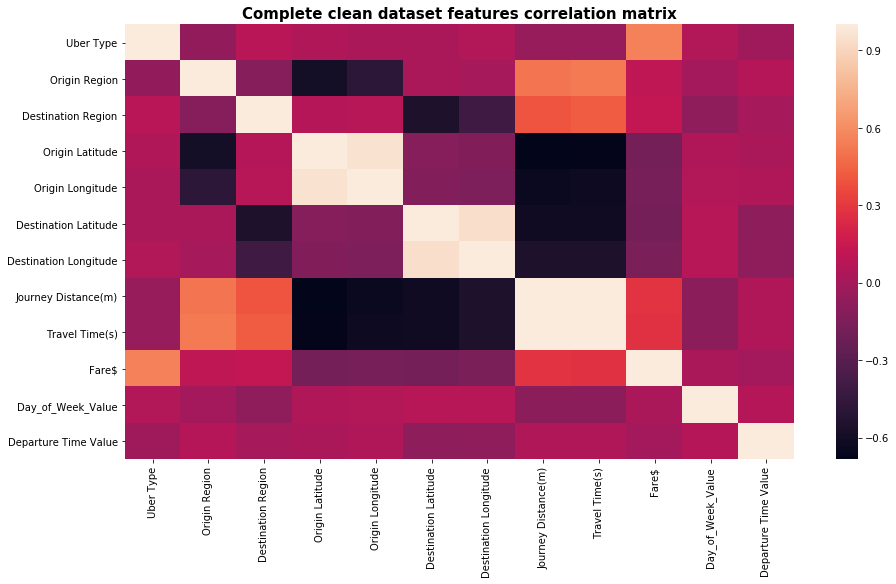

In [151]:
# plot the correlation between all the features of the Panda's DataFrame completed_clean_data_dframe
plt.figure(figsize=(15,8)) # set and adjust figure size 
ax = plt.axes() # axes 
sns.heatmap(completed_clean_data_dframe.corr(),ax=ax) # create a heatmap to visualise the correlation for between all features
ax.set_title('Complete clean dataset features correlation matrix', fontsize = 15, weight='bold') # set and customize title 
plt.show() # display plot 

Next create three subset Panda's DataFrames from the the complete dataset hich is free of **Syntactical Anomalies**, **Semantic Anomalies** and **Coverage Anomalies** and stored in a Panda's DataFrame under the variable name `completed_clean_data_dframe` for: 
* **Uber Type 0**
* **Uber Type 1**
* **Uber Type 2**

Each of these **Uber Type** subset Panda's DataFrame will be used to determine the **correlation between all the features** respectively for each of **Uber Type 0**, **Uber Type 1** and **Uber Type 2**. 

In [152]:
# subset for the Uber Type 0, Uber Type 1 and Uber Type 2 from the Panda's DataFrame completed_clean_data_dframe into three
# new Panda's DataFrames respectively for each of Uber Type 0, Uber Type 1 and Uber Type 2 
complete_clean_data_uber_0 = completed_clean_data_dframe[completed_clean_data_dframe['Uber Type'] == 0] # subset Uber Type 0 
complete_clean_data_uber_1 = completed_clean_data_dframe[completed_clean_data_dframe['Uber Type'] == 1] # subset Uber Type 1 
complete_clean_data_uber_2 = completed_clean_data_dframe[completed_clean_data_dframe['Uber Type'] == 2] # subset Uber Type 2

Now that the subset Panda's DataFrames `complete_clean_data_uber_0`, `complete_clean_data_uber_1` and `complete_clean_data_uber_2` has been successfully created and extracted from the complete clean dataset which is free of **Syntactical Anomalies**, **Semantic Anomalies** and **Coverage Anomalies** and stored in a Panda's DataFrame under the variable name `completed_clean_data_dframe`. Next using Python Panda's **shape** attribute on the Panda's DataFrame `complete_clean_data_uber_0`, `complete_clean_data_uber_1` and `complete_clean_data_uber_2`. Determine the number of rows for the Panda's DataFrame **complete_clean_data_uber_0**, **complete_clean_data_uber_1** and **complete_clean_data_uber_2**. 

In [153]:
# determine the number of rows and columns for the Panda's DataFrame complete_clean_data_uber_0, the Panda's DataFrame 
# complete_clean_data_uber_1 and the Panda's DataFrame complete_clean_data_uber_2 
print(complete_clean_data_uber_0.shape) # number of rows x columns for the subset Uber Type 0 Panda's DataFrame 
print(complete_clean_data_uber_1.shape) # number of rows x columns for the subset Uber Type 1 Panda's DataFrame 
print(complete_clean_data_uber_2.shape) # number of rows x columns for the subset Uber Type 2 Panda's DataFrame 

(181, 17)
(159, 17)
(69, 17)


Next, the correlation between all the features for the subset Panda's DataFrame for **Uber Type 0** which is stored under the variable name `complete_clean_data_uber_0` by filtering for all rows with **Uber Type 0** from the complete clean dataset which is free of **Syntactical Anomalies**, **Semantic Anomalies** and **Coverage Anomalies** and stored in a Panda's DataFrame under the variable name `completed_clean_data_dframe` will be determined by using Python Panda's **corr()** function. 

The correlation determined between all the features will be visualised using Python's **Seaborn** library **heatmap()** function. 

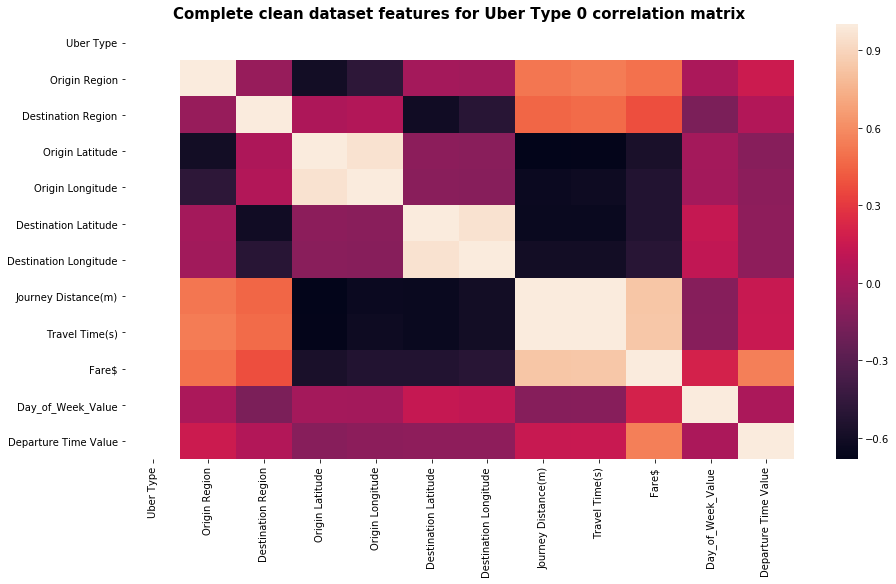

In [154]:
# plot the correlation between all the features by subsetting for Uber Type 0 from the Panda's DataFrame 
# completed_clean_data_dframe which is stored in a Panda's DataFrame under the variable name `complete_clean_data_uber_0`
plt.figure(figsize=(15,8)) # set and adjust figure size 
ax = plt.axes() # axes
sns.heatmap(complete_clean_data_uber_0.corr(),ax=ax) # create a heatmap to visualise the correlation for between all features
ax.set_title('Complete clean dataset features for Uber Type 0 correlation matrix', fontsize=15, weight='bold') # set/customize 
plt.show() # display plot 

Now, similarly the correlation between all the features for the subset Panda's DataFrame for **Uber Type 1** which is stored under the variable name `complete_clean_data_uber_1` by filtering for all rows with **Uber Type 1** from the complete clean dataset which is free of **Syntactical Anomalies**, **Semantic Anomalies** and **Coverage Anomalies** and stored in a Panda's DataFrame under the variable name `completed_clean_data_dframe` will be determined by using Python Panda's **corr()** function. 

The correlation determined between all the features will be visualised using Python's **Seaborn** library **heatmap()** function. 

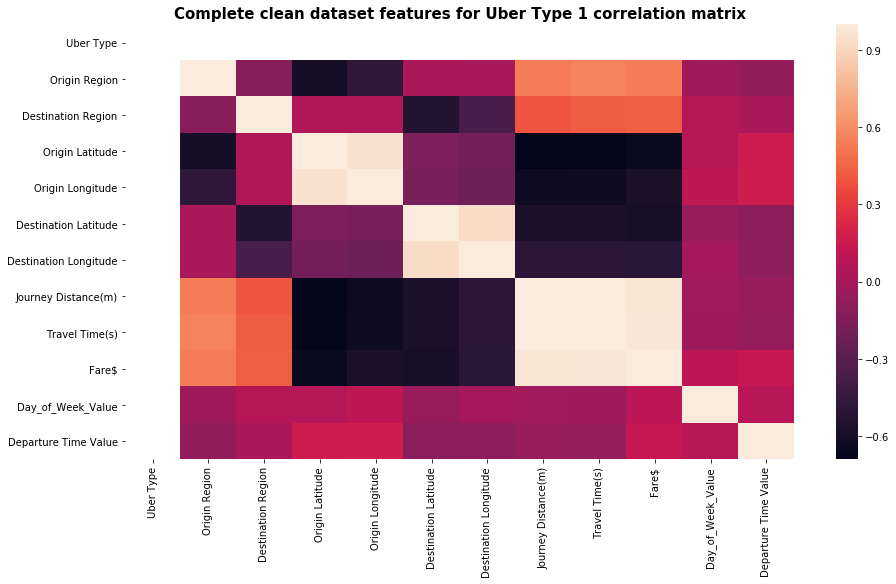

In [155]:
# plot the correlation between all the features by subsetting for Uber Type 1 from the Panda's DataFrame 
# completed_clean_data_dframe which is stored in a Panda's DataFrame under the variable name `complete_clean_data_uber_1`
plt.figure(figsize=(15,8)) # set and adjust figure size 
ax = plt.axes() # axes 
sns.heatmap(complete_clean_data_uber_1.corr()) # create a heatmap to visualise the correlation for between all features
ax.set_title('Complete clean dataset features for Uber Type 1 correlation matrix', fontsize=15, weight='bold') # set/customize 
plt.show() # display plot 

Lastly, the correlation between all the features for the subset Panda's DataFrame for **Uber Type 2** which is stored under the variable name `complete_clean_data_uber_2` by filtering for all rows with **Uber Type 2** from the complete clean dataset which is free of **Syntactical Anomalies**, **Semantic Anomalies** and **Coverage Anomalies** and stored in a Panda's DataFrame under the variable name `completed_clean_data_dframe` will be determined by using Python Panda's **corr()** function. 

The correlation determined between all the features will be visualised using Python's **Seaborn** library **heatmap()** function. 

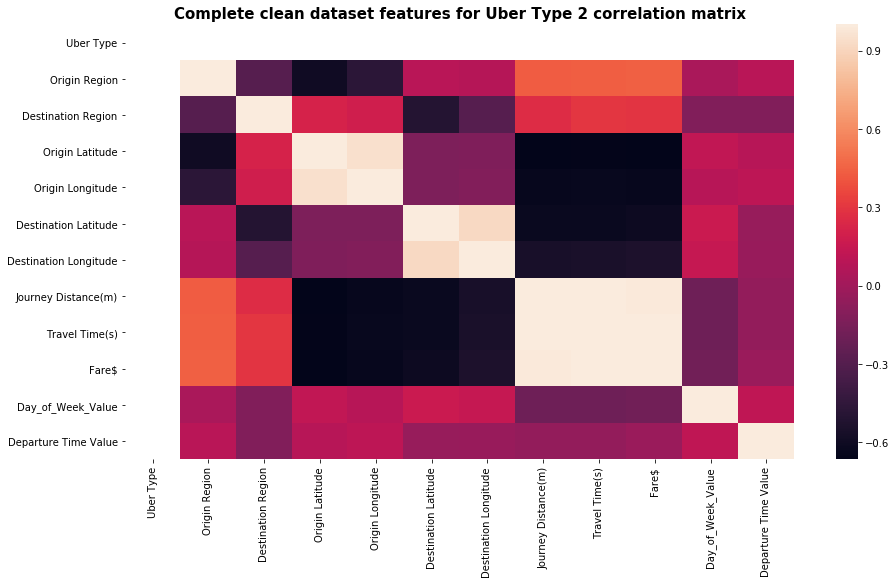

In [156]:
# plot the correlation between all the features by subsetting for Uber Type 2 from the Panda's DataFrame 
# completed_clean_data_dframe which is stored in a Panda's DataFrame under the variable name `complete_clean_data_uber_2`
plt.figure(figsize=(15,8)) # set and adjust figure size 
ax = plt.axes() # axes 
sns.heatmap(complete_clean_data_uber_2.corr()) # create a heatmap to visualise the correlation for between all features
ax.set_title('Complete clean dataset features for Uber Type 2 correlation matrix', fontsize=15, weight='bold') # set/customize 
plt.show() # display plot 

Thus, it can be observed that the subset complete clean dataset for Uber Ridesharing data in **Victoria, Australia** based on **Uber Type 0** which is stored in a Panda's DataFrame under the variable name `complete_clean_data_uber_0`, the ideal **five** features derived from the correlation matrix for building the **Linear Regression** model would be:
- **Uber Type**
- **Origin Region**
- **Journey Distance(m)**
- **Travel Time(s)** 
- **Departure Time Value**

Whereas, it can be observed that the subset complete clean dataset for Uber Ridesharing data in **Victoria, Australia** based on **Uber Type 1** which is stored in a Panda's DataFrame under the variable name `complete_clean_data_uber_1`, the ideal **five** features derived from the correlation matrix for building the **Linear Regression** model would be:
- **Uber Type**
- **Origin Region**
- **Destination Region**
- **Journey Distance(m)**
- **Travel Time(s)** 


Similaryl, it can be observed that the subset complete clean dataset for Uber Ridesharing data in **Victoria, Australia** based on **Uber Type 2** which is stored in a Panda's DataFrame under the variable name `complete_clean_data_uber_2`, the ideal **five** features derived from the correlation matrix for building the **Linear Regression** model would be:
- **Uber Type**
- **Origin Region**
- **Destination Region**
- **Journey Distance(m)**
- **Travel Time(s)** 

However, intuitively as the dataset is for Uber Ridesharing data in **Victoria, Australia**,thus, five features which could be used to build the **Linear Regression** model for all three Uber Types of **Uber Type 0**, **Uber Type 1** and **Uber Type 2** resepectively could be:
- **Uber Type**
- **Journey Distance(m)**
- **Travel Time(s)** 
- **Day_of_Week_Value**
- **Departure Time Value** 


Therefore, all these **feature** combinations respectively for each of **Uber Type 0**, **Uber Type 1** and **Uber Type 2** and their corresponding subset Panda's DataFrames `complete_clean_data_uber_0`, `complete_clean_data_uber_1` and `complete_clean_data_uber_2` will all be tested, with the addition of other feature variations will be applied to determine the ideal **feature selection** for **Fare** column value prediction using Linear Regression to impute all **20** **Fare$** column missing values in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`.

### 7.4 Linear Regression Imputation 
<a id="linear regress"></a>

### 7.4.1 Uber 0 Linear Regression 
<a id="uber0"></a>

Firstly, prior to Linear Regression model building for `Uber Type 0` Panda's DataFrame `complete_clean_data_uber_0`, the target variable `Fare$` column will be shifted as the last column, this new Panda's DataFrame will be stored under the variable name **uber_0_target**. 

In [157]:
# reassign column location wtih the target variable Fare$ placed in the last column and store this as a Panda's DataFrame under
# the variable name uber_0_target
uber_0_target = complete_clean_data_uber_0[[col for col in complete_clean_data_uber_0 if col not in  ['Fare$']] + ['Fare$']]

Next examine the first row for the Panda's DataFrame **uber_0_target** to verify to the target variable column `Fare$` is now in the last column index for the Panda's DataFrame **uber_0_target**. 

In [158]:
# verifying target variable Fare$ is now in the last column for the Panda's DataFrame uber_0_target
uber_0_target.head(1) # checking 

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0  ID1829717167        0.0              3                   6   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0        -37.81794        144.969297            -37.790797   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.985865               4191.0     2018-07-11       14:28:09   

   Travel Time(s) Arrival Time Day_of_Week  Day_of_Week_Value  \
0         1170.48     14:47:39   Wednesday                  0   

   Departure Time Value  Fare$  
0                     1  10.59

In [159]:
# building a Panda's DataFrame dataset for Uber Type 0 with the ideal features for Linear Regression prediction and imputation
# for Fare$ column missing values in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's 
# DataFrame under the variable name `missing_value_df` 
uber_0_features = uber_0_target.drop(['Unnamed: 0', 'Origin Region', 'Destination Region', 'Origin Latitude', 
                                                    'Origin Longitude', 'Destination Latitude', 'Destination Longitude', 
                                                    'Departure Date', 'Departure Time','Arrival Time', 'Day_of_Week'], axis=1 )

Next using the function **train_test_split** imported from **sklearn.model_selection** the Panda's DataFrame `uber_0_features` for **Uber Type 0** will be split into training sets and test tests. This'll be utilisied to validate the accuracy of the Predictions from the **Linear Regression** model with the **selected features**. 

In [160]:
# training set and test set for `Uber Type 0` Panda's DataFrame with selected features `uber_0_features` 
X_train, X_test, y_train, y_test = train_test_split(uber_0_features.iloc[:,:-1], uber_0_features.iloc[:, -1:], random_state = 1)

In [161]:
map(pd.np.shape,[X_train, X_test, y_train, y_test]) # mapping 

Next the **Linear Regression** model for **Uber Type 0** will be constructed and instantiated first using the **LinearRegression()** function imported from **sklearn.linear_model**. 

In [162]:
# building Linear Regression model for Uber Type 0 
uber_0_linearRegressor = LinearRegression() # instantiate Linear Regression model

Now that the **Linear Regression** model **uber_0_linearRegressor** for **Uber Type 0** has been constructed and instantiated using the **LinearRegression()** function imported from **sklearn.linear_model**.

Next this Linear Regression model will be **trained** using the training sets **X_train** and **y_train** from the split using the function **train_test_split** imported from **sklearn.model_selection** on the Panda's DataFrame `uber_0_features` for **Uber Type 0** into training sets and test tests.

In [163]:
# now using the X_train training set and y_train training set the Linear Regression model for Uber Type 0 uber_0_linearRegressor
# will be trained 
uber_0_linearRegressor.fit(X_train, y_train) # training Linear Regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Lastly, determine the percentage of response variable that is explained by the **Linear Regression** model **uber_0_linearRegressor** for prediciting `Uber Type 0` **Fare$** column price values by calculating the R-Squared value for the **Linear Regression** model. 

In [164]:
# determine the percentage of response variable variation that is explained by the Linear Regression model 
# uber_0_linearRegressor for predicting Uber Type 0 Fare$ column price values 
print ('r-squared for this model = ', uber_0_linearRegressor.score(X_test,y_test)) # percentage of variation explained 

r-squared for this model =  0.9619579231693739


### 7.4.2 Uber 1 Linear Regression
<a id="uber1"></a>

Firstly, prior to Linear Regression model building for `Uber Type 1` Panda's DataFrame `complete_clean_data_uber_1`, the target variable `Fare$` column will be shifted as the last column, this new Panda's DataFrame will be stored under the variable name **uber_1_target**. 

In [165]:
# reassign column location wtih the target variable Fare$ placed in the last column and store this as a Panda's DataFrame under
# the variable name uber_1_target
uber_1_target = complete_clean_data_uber_1[[col for col in complete_clean_data_uber_1 if col not in  ['Fare$']] + ['Fare$']]

Next examine the first row for the Panda's DataFrame **uber_1_target** to verify to the target variable column `Fare$` is now in the last column index for the Panda's DataFrame **uber_1_target**. 

In [166]:
# verifying target variable Fare$ is now in the last column for the Panda's DataFrame uber_1_target
uber_1_target.head(1) # checking

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
6  ID3464986003        1.0              1                   4   

   Origin Latitude  Origin Longitude  Destination Latitude  \
6       -37.815595        144.958218            -37.811237   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
6             145.007359               4718.0     2018-01-02       09:33:48   

   Travel Time(s) Arrival Time Day_of_Week  Day_of_Week_Value  \
6         1073.88      9:51:41     Tuesday                  0   

   Departure Time Value  Fare$  
6                     0    9.8

In [167]:
# building a Panda's DataFrame dataset for Uber Type 1 with the ideal features for Linear Regression prediction and imputation
# for Fare$ column missing values in the dataset `missing_value.csv` which is stored in a Panda's DataFrame under the
# variable name `missing_value_df` 
uber_1_features = uber_1_target.drop(['Unnamed: 0', 'Origin Region', 'Destination Region', 'Origin Latitude', 
                                                    'Origin Longitude', 'Destination Latitude', 'Destination Longitude', 
                                                    'Departure Date', 'Departure Time','Arrival Time', 'Day_of_Week'], axis=1 )

Next using the function **train_test_split** imported from **sklearn.model_selection** the Panda's DataFrame `uber_1_features` for **Uber Type 1** will be split into training sets and test tests. This'll be utilisied to validate the accuracy of the Predictions from the **Linear Regression** model with the **selected features**. 

In [168]:
# training set and test set for `Uber Type 1` Panda's DataFrame with selected features `uber_1_features` 
X_train, X_test_1, y_train, y_test_1 = train_test_split(uber_1_features.iloc[:,:-1],uber_1_features.iloc[:, -1:],random_state=1)

In [169]:
map(pd.np.shape,[X_train, X_test_1, y_train, y_test_1]) # mapping 

Now the **Linear Regression** model for **Uber Type 1** will be constructed and instantiated first using the **LinearRegression()** function imported from **sklearn.linear_model**. 

In [170]:
# building Linear Regression model for Uber Type 1
uber_1_linearRegressor = LinearRegression() # instantiate Linear Regression model 

Now that the **Linear Regression** model **uber_1_linearRegressor** for **Uber Type 1** has been constructed and instantiated using the **LinearRegression()** function imported from **sklearn.linear_model**.

Next this Linear Regression model will be **trained** using the training sets **X_train** and **y_train** from the split using the function **train_test_split** imported from **sklearn.model_selection** on the Panda's DataFrame `uber_1_features` for **Uber Type 1** into training sets and test tests.

In [171]:
# now using the X_train training set and y_train training set the Linear Regression model for Uber Type 1 uber_1_linearRegressor
# will be trained 
uber_1_linearRegressor.fit(X_train, y_train) # training Linear Regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Lastly, determine the percentage of response variable that is explained by the **Linear Regression** model **uber_1_linearRegressor** for prediciting `Uber Type 1` **Fare$** column price values by calculating the R-Squared value for the **Linear Regression** model. 

In [172]:
# determine the percentage of response variable variation that is explained by the Linear Regression model 
# uber_1_linearRegressor for predicting Uber Type 1 Fare$ column price values 
print ('r-squared for this model = ', uber_1_linearRegressor.score(X_test_1,y_test_1)) # percentage of variation explained 

r-squared for this model =  0.9961259419615471


### 7.4.3 Uber 2 Linear Regression
<a id="uber2"></a>

Firstly, prior to Linear Regression model building for `Uber Type 2` Panda's DataFrame `complete_clean_data_uber_2`, the target variable `Fare$` column will be shifted as the last column, this new Panda's DataFrame will be stored under the variable name **uber_2_target**. 

In [173]:
# reassign column location wtih the target variable Fare$ placed in the last column and store this as a Panda's DataFrame under
# the variable name uber_2_target
uber_2_target = complete_clean_data_uber_2[[col for col in complete_clean_data_uber_2 if col not in  ['Fare$']] + ['Fare$']]

Next examine the first row for the Panda's DataFrame **uber_1_target** to verify to the target variable column `Fare$` is now in the last column index for the Panda's DataFrame **uber_1_target**. 

In [174]:
# verifying target variable Fare$ is now in the last column for the Panda's DataFrame uber_2_target
uber_2_target.head(1) # checking 

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
1  ID5333742069        2.0              3                   9   

   Origin Latitude  Origin Longitude  Destination Latitude  \
1       -37.819027        145.003819            -38.110916   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
1             144.654173              47117.0     2018-03-21       22:38:38   

   Travel Time(s) Arrival Time Day_of_Week  Day_of_Week_Value  \
1        11433.42      1:49:11   Wednesday                  0   

   Departure Time Value    Fare$  
1                     2  1089.69

In [175]:
# building a Panda's DataFrame dataset for Uber Type 2 with the ideal features for Linear Regression prediction and imputation
# for Fare$ column missing values in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's 
# DataFrame under the variable name `missing_value_df` 
uber_2_features = uber_2_target.drop(['Unnamed: 0', 'Origin Latitude', 'Origin Longitude', 
                                      'Destination Latitude', 'Destination Longitude', 'Departure Date', 'Departure Time', 
                                      'Arrival Time', 'Day_of_Week', 'Day_of_Week_Value', 'Departure Time Value'], axis=1)

Next using the function **train_test_split** imported from **sklearn.model_selection** the Panda's DataFrame `uber_2_features` for **Uber Type 2** will be split into training sets and test tests. This'll be utilisied to validate the accuracy of the Predictions from the **Linear Regression** model with the **selected features**. 

In [176]:
# training set and test set for `Uber Type 2` Panda's DataFrame with selected features `uber_2_features` 
X_train, X_test_2, y_train, y_test_2 = train_test_split(uber_2_features.iloc[:,:-1],uber_2_features.iloc[:, -1:],random_state=1)

In [177]:
map(pd.np.shape,[X_train, X_test_2, y_train, y_test_2]) # mapping 

Now the **Linear Regression** model for **Uber Type 2** will be constructed and instantiated first using the **LinearRegression()** function imported from **sklearn.linear_model**. 

In [178]:
# building Linear Regression model for Uber Type 2
uber_2_linearRegressor = LinearRegression() # instantiate Linear Regression model 

Now that the **Linear Regression** model **uber_2_linearRegressor** for **Uber Type 2** has been constructed and instantiated using the **LinearRegression()** function imported from **sklearn.linear_model**.

Next this Linear Regression model will be **trained** using the training sets **X_train** and **y_train** from the split using the function **train_test_split** imported from **sklearn.model_selection** on the Panda's DataFrame `uber_2_features` for **Uber Type 2** into training sets and test tests.

In [179]:
# now using the X_train training set and y_train training set the Linear Regression model for Uber Type 2 uber_2_linearRegressor
# will be trained 
uber_2_linearRegressor.fit(X_train, y_train) # training Linear Regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Lastly, determine the percentage of response variable that is explained by the **Linear Regression** model **uber_2_linearRegressor** for prediciting `Uber Type` **2** **Fare$** column price values by calculating the R-Squared value for the **Linear Regression** model. 

In [180]:
# determine the percentage of response variable variation that is explained by the Linear Regression model 
# uber_2_linearRegressor for predicting Uber Type 2 Fare$ column price values 
print ('r-squared for this model = ', uber_2_linearRegressor.score(X_test_2,y_test_2)) # percentage of variation explained 

r-squared for this model =  0.9976406022495133


### 7.5 Uber Type Fare value predictions 
<a id="predict"></a>

First, before any `Uber Type Fare$` value predictions is performed, a copy of the Panda's DataFrame `complete_clean_data_dframe` and stored under the variable name **complete_clean_data_dframe_copy** will be created for wrangling and extracting all the rows corresponding to each Uber Type respectively of **Uber Type 0**, **Uber Type 1** and **Uber Type 2**.

In [181]:
# create a copy of the Panda's DataFrame `complete_clean_data_dframe` and stored it under the variable name 
# `complete_clean_data_dframe_copy` 
complete_clean_data_dframe_copy = complete_clean_data_dframe.copy() # Panda's DataFrame copy

Now examine the first row for the Panda's DataFrame **complete_clean_data_dframe_copy** to verify that the Panda's DataFrame was copied correctly and successfully. 

In [182]:
# examining and checking that the Panda's DataFrame complete_clean_data_dframe_copy was copied correctly 
complete_clean_data_dframe_copy.head(1) # examination and verification

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
0  ID1829717167        0.0              3                   6   

   Origin Latitude  Origin Longitude  Destination Latitude  \
0        -37.81794        144.969297            -37.790797   

   Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
0             144.985865               4191.0     2018-07-11       14:28:09   

   Travel Time(s) Arrival Time  Fare$ Day_of_Week  Day_of_Week_Value  \
0         1170.48     14:47:39  10.59   Wednesday                  0   

   Departure Time Value  
0                     1

Now that the Panda's DataFrame copy `complete_clean_data_dframe_copy` has been successfully created from the complete clean dataset which is free of **Syntactical Anomalies**, **Semantic Anomalies** and **Coverage Anomalies** and stored in a Panda's DataFrame under the variable name `completed_clean_data_dframe`. Next using Python Panda's **shape** attribute on the Panda's DataFrame `complete_clean_data_dframe_copy` subsetted for:
* **Uber Type 0**
* **Uber Type 1**
* **Uber TYpe 2**

Determine the number of rows and columns for the Panda's DataFrame **complete_clean_data_dframe_copy** subsetted for the Uber Types of **Uber Type 0**, **Uber Type 1** and **Uber Type 2** respectively.

In [183]:
# determine the number of rows and columns for the Panda's DataFrame complete_clean_data_uber_0 subsetted for Uber Type of 
# Uber Type 0, Uber Type 1 and Uber Type 2 respectively 
print(complete_clean_data_dframe_copy.loc[complete_clean_data_dframe_copy['Uber Type'] == 0].shape) # rows x columns Uber Type 0 
print(complete_clean_data_dframe_copy.loc[complete_clean_data_dframe_copy['Uber Type'] == 1].shape) # rows x columns Uber Type 1 
print(complete_clean_data_dframe_copy.loc[complete_clean_data_dframe_copy['Uber Type'] == 2].shape) # rows x columns Uber Type 2 

(184, 17)
(173, 17)
(72, 17)


### 7.5.1 Uber Type 0 Fare value predictions
<a id="predict uber0"></a>

Firstly, feature selection will be carried out to be perform predictions using **Linear Regression** for `Fare$` column value prices. The **features** will be tweaked for the Panda's DataFrame `uber_0_feature` until the optimal prediction is produced for the `Fare$` column value prices with respect to `Uber Type 0`, which'll be used for `Fare$` column missing value imputation for `Uber Type 0` in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`

In [184]:
# select features for Uber Type 1 by dropping all the weak variables from the Panda's DataFrame complete_clean_data_dframe 
uber_0_feature = complete_clean_data_dframe_copy.drop(['Unnamed: 0', 'Origin Region', 'Destination Region', 'Origin Latitude', 
                                                    'Origin Longitude', 'Destination Latitude', 'Destination Longitude', 
                                                    'Departure Date', 'Departure Time','Arrival Time', 'Day_of_Week'], axis=1) 

Next examine the first row for the Panda's DataFrame **uber_0_feature** to verify the features and the values corresponding to each feature is  correct. 

In [185]:
# examing features and checking the values corresponding to each feature for the Panda's DataFrame `uber_0_feature`
uber_0_feature.head(1) # checking 

Uber Type  Journey Distance(m)  Travel Time(s)  Fare$  Day_of_Week_Value  \
0        0.0               4191.0         1170.48  10.59                  0   

   Departure Time Value  
0                     1

In [186]:
# subset for all rows with Uber Type 0 from the Panda's DataFrame `uber_0_feature` and store it under the variable name uber_0  
uber_0 = uber_0_feature.loc[uber_0_feature['Uber Type'] == 0] # Uber Type 0 features Panda's DataFrame 

Now that the subset Panda's DataFrames `uber_0` for **Uber Type 0** has been successfully created and extracted from the features dataset which is  stored in a Panda's DataFrame under the variable name `uber_0_feature`. Next using Python Panda's **shape** attribute on the Panda's DataFrame `uber_0`. Determine the number of rows and columns for the Panda's DataFrame **uber_0**. 

In [187]:
# determine the number of rows and columns for the Panda's DataFrame uber_0
uber_0.shape # number of rows x columns Uber Type 0 features Panda's DataFrame  

(184, 6)

Next set a unique row index for the Panda's DataFrame `uber_0.shape` using Python Panda's **index** attribute  and Python's <font color=green>**range()**</font> function: 
```python
uber_0.index = range(184) 
```

As determined the shape for the Panda's DataFrame `uber_0.shape` has **184 rows** and **6 columns**, hence, the use of the number **184** as the argument for Python's <font color=green>**range()**</font> function to set the index for the Panda's DataFrame `uber_0.shape`.

In [188]:
# set unique row index for the DataFrame `uber_0` which is a subset for Uber Type 0 from the Panda's DataFrame `uber_0_feature` 
# with selected features for Fare$ column value prediction 
uber_0.index = range(184) # set unique row index

In [189]:
uber_0_dropna = uber_0.dropna(subset=['Fare$'],axis=0) # drop all rows will null value 

In [190]:
# missing values Panda's DataFrame for Uber Type 0 which'll be used for imputation 
uber_0_impute= uber_0.copy() # Panda's DataFrame for imputation 

Now the **Linear Regression** model for **Uber Type 0** will be constructed and instantiated first using the **LinearRegression()** function imported from **sklearn.linear_model**. 

In [191]:
# building Linear Regression model for Uber Type 0
lm_for_impute = LinearRegression() # instantiate Linear Regression model 

Next the **Linear Regression** model for **Uber Type 0**`uber_0_lm_for_impute` will be fitted to the Panda's DataFrame `uber_0_dropna` and used for Predicting the **Fare** column values. Which'll be used as the basis for imputing the missing **Fare$** column values for `Uber Type` **0** in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`. 

In [192]:
# fitting Linear Regression model for Uber Type 0 to the clean Panda's DataFrame `uber_0_dropna` which is free of all 
# Syntactical Anomalies, Semantic Anomalies and Coverage Anomalies for Uber Type 0 data in the Panda's DataFrame `uber_0_dropna`
lm_for_impute.fit(uber_0_dropna[[x for x in uber_0_dropna.columns if x != 'Fare$']], uber_0_dropna['Fare$']) # fitting

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now the `Fare$` column values for the Panda's DataFrame **uber_0** will be observed, as it'll be the reference point to check the perfomance and accuracy for **Linear Regression** model used for **predicting** and **imputing** **Uber Type 0** `Fare$` column values. Which'll dictate if the **features selected** for **Uber TYpe 0** have to be altered or maintained, as it'll be the model used for imputing the missing `Uber Type` **0** `Fare$` column values in the dataset `missing_value` which is stored in a Panda's DataFrame under the variable name `missing_value_df`.  

In [193]:
# examine the Panda's DataFrame `uber_0` to observe Fare$ column values which will be used as the basis for comparing 
# the performance for the Linear Regression model Fare$ column values prediction 
uber_0 # checking

Uber Type  Journey Distance(m)  Travel Time(s)  Fare$  Day_of_Week_Value  \
0          0.0               4191.0         1170.48  10.59                  0   
1          0.0               7458.0         2646.48   7.11                  0   
2          0.0              16033.0         5320.68  22.25                  0   
3          0.0               3716.0          950.28   6.25                  0   
4          0.0              11359.0         3712.38  19.47                  0   
5          0.0              11497.0         3717.00  16.58                  1   
6          0.0              50797.0        13173.36  33.44                  0   
7          0.0               3275.0          772.92   8.55                  0   
8          0.0              41934.0        10089.24  22.87                  0   
9          0.0               3978.0         1001.94   9.02                  0   
10         0.0               2989.0          761.22  19.00                  1   
11         0.0              10727.0         2998.44  17.01                  1   
12         0.0               6220.0         1528.80  14.33                  0   
13         0.0               4098.0          948.84  18.50                  1   
14         0.0               4731.0         1200.54  12.75                  1   
15         0.0              44738.0        10707.24  25.61                  0   
16         0.0              50797.0        13204.98  33.74                  1   
17         0.0               2039.0          477.90   4.92                  0   
18         0.0              11181.0         3115.56  13.46                  1   
19         0.0               7330.0         1995.24  15.49                  0   
20         0.0               8675.0         2969.76  11.93                  0   
21         0.0              50797.0        13173.36  32.31                  0   
22         0.0               8262.0         2143.80  17.49                  0   
23         0.0               8105.0         2323.80  17.29                  0   
24         0.0              51032.0        12681.06  34.33                  1   
25         0.0              49777.0        12099.66  31.08                  0   
26         0.0              48140.0        11571.42  22.66                  0   
27         0.0              48238.0        11710.80  24.16                  0   
28         0.0               6360.0         1617.00  20.95                  1   
29         0.0               3403.0          855.72   4.93                  0   
..         ...                  ...             ...    ...                ...   
154        0.0              42836.0        10265.58  26.92                  1   
155        0.0               6512.0         2086.02   6.89                  0   
156        0.0               9832.0         3199.98  11.82                  0   
157        0.0              43263.0        10452.12  24.98                  0   
158        0.0               6306.0         1556.76   8.52                  0   
159        0.0               6320.0         1647.12  13.27                  0   
160        0.0               8361.0         2438.22  10.63                  0   
161        0.0               1777.0          475.44   9.96                  0   
162        0.0               1367.0          363.90   3.36                  0   
163        0.0              43833.0        10557.96  25.86                  0   
164        0.0               5238.0         1300.02  13.08                  0   
165        0.0               5817.0         1538.70   5.92                  0   
166        0.0               2623.0          645.84  15.50                  1   
167        0.0              44071.0        10576.20  25.60                  0   
168        0.0              46970.0        11362.32  22.74                  0   
169        0.0              47035.0        11413.02  24.57                  0   
170        0.0               5544.0         1424.70    NaN                  1   
171        0.0              42781.0 

Next predict the values for `Fare$` column for `Uber Type` **0**  in the Panda's DataFrame **uber_0_impute**, by using all the features other than the target variable `Fare$` column with the Linear Regression model built for **Uber Type 0** to predict `Fare$` column values with `lm_for_impute`. 

This prediction is inclusive for the `Uber Type` **0** `Fare$` column missing values in the dataset `missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`. Thus, the accuracy and precision of this prediction will be examined to determine if it'll be used for imputing the **missing Fare$** column values for `Uber Type` **0** in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`.

In [194]:
# use all features in the Panda's DataFrame `uber_0_impute` other than the `Fare$` column to predict the values for the `Fare$`
# column values for Uber Type 0 using the Linear Regression model for Uber Type 0 lm_for_impute
lm_for_impute.predict(uber_0_impute.drop(['Fare$'],axis=1)) # predicted Fare$ column values for Uber Type 0 using Linear Regress

array([10.03357855,  8.38834018, 20.60114138,  5.61835291, 18.08556626,
       14.59347096, 31.70770293,  9.38817567, 22.81935654,  9.74270511,
       18.07132924, 17.3943152 , 14.55134652, 18.3092789 , 10.60353547,
       23.68672896, 32.33371895,  4.90944573, 13.51175115, 15.30509429,
       12.92123008, 31.70770293, 15.48820062, 15.83671146, 35.39574251,
       29.82148873, 20.8961558 , 25.19896378, 19.32283124,  5.47421037,
        9.13961558, 12.87991245, 32.76725931, 13.72834213, 13.50849846,
       32.05217605, 29.1779338 ,  5.94208973,  6.45721256, 22.03683426,
       24.56403002, 15.85960545, 18.9950535 ,  9.02604134, 29.04899086,
       24.56403002, 22.03922439, 14.80743941,  5.9602449 , 14.32982622,
       19.31069657,  9.29633157,  7.6315421 , 17.79205089,  9.89561316,
       13.01342713, 20.60114138,  7.71112699,  9.53903527, 10.8110105 ,
        9.14776127, 17.63554497, 16.72058107, 31.70770293, 13.83020441,
       15.10226266, 18.34139683,  4.92040462, 14.12970117,  8.97

In [195]:
# impute predicted `Fare$` column missing values for Uber Type 0 using the Linear Regression model lm_for_impute
uber_0_impute['Fare$'][uber_0_impute['Fare$'].isnull()] = lm_for_impute.predict(uber_0_impute.drop(['Fare$'],axis=1))

C:\Users\Jeffery\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Next retrieve the rows for **Uber Type 0** where there were missing values in the `Fare$` column for the dataset `uber_ridesharing_transit_missing_value.csv` and examine the imputed `Fare$` column price values that used the **Linear Regression** model **lm_for_impute** to validate and check the accuracy/precision in the prediction. Which'll imply and justify if it neccessary to change the **feature selection**,thus, improving the prediction or maintain it. 

In [196]:
# retrieve the rows for Uber Type 0 where there were missing values in the Fare$ column for the dataset 
# `uber_ridesharing_transit_missing_value.csv` and examine the imputed Fare$ column price values using the Linear Regression 
# model lm_for_impute to check the accuracy and precision in the prediction 
uber_0_impute.loc[uber_0['Fare$'].isnull()] # imputed Uber Type 0 missing Fare$ column price values

Uber Type  Journey Distance(m)  Travel Time(s)      Fare$  \
170        0.0               5544.0         1424.70  19.047371   
174        0.0              51032.0        12681.06  22.664537   
183        0.0              43230.0        10362.90  19.143526   

     Day_of_Week_Value  Departure Time Value  
170                  1                     2  
174                  0                     0  
183                  0                     0

Lastly, determine the percentage of response variable that is explained by the **Linear Regression** model **lm_for_impute** for prediciting `Uber Type 0` **Fare$** column price values by calculating the R-Squared value for the **Linear Regression** model using the testing sets **X_test** and **y_test** which corresponds to **Uber Type 0**. 

In [197]:
# determine the percentage of response variable variation that is explained by the Linear Regression model 
# lm_for_impute for predicting Uber Type 0 Fare$ column price values using the testing sets X_test and y_test which are the 
# testing sets that corresponds to Uber Type 0 
print ('r-squared for this model = ',lm_for_impute.score(X_test,y_test)) # percentage of variation explained 

r-squared for this model =  0.9642464154618003


### 7.5.2 Uber Type 1 Fare value predictions 
<a id="predict uber1"></a>

Firstly, feature selection will be carried out to be perform predictions using **Linear Regression** for `Fare$` column value prices. The **features** will be tweaked for the Panda's DataFrame `uber_1_feature` until the optimal prediction is produced for the `Fare$` column value prices with respect to `Uber Type 1`, which'll be used for `Fare$` column missing value imputation for `Uber Type 1` in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`. 

In [198]:
# select features for Uber Type 1 by dropping all the weak variables from the Panda's DataFrame complete_clean_data_dframe 
uber_1_feature = complete_clean_data_dframe_copy.drop(['Unnamed: 0', 'Origin Region', 'Destination Region', 'Origin Latitude', 
                                                    'Origin Longitude', 'Destination Latitude', 'Destination Longitude', 
                                                    'Departure Date', 'Departure Time','Arrival Time', 'Day_of_Week'], axis=1)

Next examine the first row for the Panda's DataFrame **uber_1_feature** to verify the features and the values corresponding to each feature is  correct. 

In [199]:
# examing features and checking the values corresponding to each feature for the Panda's DataFrame `uber_1_feature` 
uber_1_feature.head(1) # checking 

Uber Type  Journey Distance(m)  Travel Time(s)  Fare$  Day_of_Week_Value  \
0        0.0               4191.0         1170.48  10.59                  0   

   Departure Time Value  
0                     1

In [200]:
# subset for all rows with Uber Type 0 from the Panda's DataFrame `uber_1_feature` and store it under the variable name uber_1
uber_1 = uber_1_feature.loc[uber_1_feature['Uber Type'] == 1]  # Uber Type 1 features Panda's DataFrame 

Now that the subset Panda's DataFrames `uber_1` for **Uber Type 1** has been successfully created and extracted from the features dataset which is  stored in a Panda's DataFrame under the variable name `uber_1_feature`. Next using Python Panda's **shape** attribute on the Panda's DataFrame `uber_1`. Determine the number of rows and columns for the Panda's DataFrame **uber_1**. 

In [201]:
# determine the number of rows and columns for the Panda's DataFrame uber_1
uber_1.shape #  number of rows x columns Uber Type 1 features Panda's DataFrame  

(173, 6)

Next set a unique row index for the Panda's DataFrame `uber_1.shape` using Python Panda's **index** attribute  and Python's <font color=green>**range()**</font> function: 
```python
uber_1.index = range(173) 
```

As determined the shape for the Panda's DataFrame `uber_1.shape` has **173 rows** and **6 columns**, hence, the use of the number **173** as the argument for Python's <font color=green>**range()**</font> function to set the index for the Panda's DataFrame `uber_1.shape`.

In [202]:
# set unique row index for the DataFrame `uber_1` which is a subset for Uber Type 1 from the Panda's DataFrame `uber_1_feature` 
# with selected features for Fare$ column value prediction 
uber_1.index = range(173) # set unique row index

In [203]:
uber_1_dropna = uber_1.dropna(subset=['Fare$'],axis=0)

In [204]:
# missing values Panda's DataFrame for Uber Type 1 whic will be imputed
uber_1_impute = uber_1.copy() # Panda's DataFrame for imputation 

Now prior to prediction and imputation of **Fare$** column values in the dataset `missing_value` which is stored as a Panda's DataFrame under the variable name `missing_value_df`, first, the **Linear Regression** model for **Uber Type 1** will be constructed and instantiated first using the **LinearRegression()** function imported from **sklearn.linear_model**. 

In [205]:
# building Linear Regression model for Uber Type 1
uber_1_lm_for_impute = LinearRegression() # instantiate Linear Regression model 

Next the **Linear Regression** model for **Uber Type 1**`uber_1_lm_for_impute` will be fitted to the Panda's DataFrame `uber_1_dropna` and used for Predicting the **Fare** column values. Which'll be used as the basis for imputing the missing **Fare$** column values for `Uber Type` **1** in the dataset `missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`. 

In [206]:
# fitting Linear Regression model for Uber Type 1 to the clean Panda's DataFrame `uber_1_dropna` which is free of all 
# Syntactical Anomalies, Semantic Anomalies and Coverage Anomalies for Uber Type 1 data in the Panda's DataFrame `uber_1_dropna`
uber_1_lm_for_impute.fit(uber_1_dropna[[x for x in uber_1_dropna.columns if x != 'Fare$']], uber_1_dropna['Fare$']) #fitting 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now the `Fare$` column values for the Panda's DataFrame **uber_1** will be observed, as it'll be the reference point to check the perfomance and accuracy for the **Linear Regression** model used for **predicting** and **imputing** **Uber Type 1** `Fare$` column values. Which'll dictate if the **features selected** for **Uber Type 1** have to be altered or maintained, as it'll be the model used for imputing the missing `Uber Type` **1** `Fare$` column values in the dataset `missing_value` which is stored in a Panda's DataFrame under the variable name `missing_value_df`.  

In [207]:
# examine the Panda's DataFrame `uber_1` to observe Fare$ column values which will be used as the basis for comparing 
# the performance for the Linear Regression model Fare$ column values prediction 
uber_1 # observing Fare$ column values 

Uber Type  Journey Distance(m)  Travel Time(s)  Fare$  Day_of_Week_Value  \
0          1.0               4718.0         1073.88   9.80                  0   
1          1.0               9476.0         2899.14  18.58                  0   
2          1.0              10545.0         3432.54  26.91                  0   
3          1.0               7616.0         2185.32  24.19                  0   
4          1.0               6250.0         1593.78  20.54                  0   
5          1.0               6267.0         1847.10  26.87                  1   
6          1.0               5339.0         1604.40  17.38                  1   
7          1.0              15151.0         4911.60  34.68                  0   
8          1.0               7992.0         2153.76  17.05                  0   
9          1.0              11630.0         3678.54  28.10                  0   
10         1.0              51032.0        12681.06  72.46                  0   
11         1.0              44278.0        10653.84  52.39                  0   
12         1.0              51032.0        12681.06  64.97                  0   
13         1.0              12348.0         3925.26  32.52                  0   
14         1.0               6744.0         1732.92  18.40                  0   
15         1.0               1599.0          397.38   4.04                  0   
16         1.0              48197.0        11495.34  60.54                  0   
17         1.0               7761.0         2238.24  19.75                  0   
18         1.0               5513.0         1400.64  12.69                  0   
19         1.0              49777.0        12069.78  70.39                  1   
20         1.0              50797.0        13173.36  71.53                  0   
21         1.0               2993.0          726.00  21.98                  1   
22         1.0               9519.0         3221.52  27.28                  0   
23         1.0              10401.0         2939.70  25.59                  0   
24         1.0               4158.0         1056.90  17.23                  0   
25         1.0               2120.0          513.30  18.47                  1   
26         1.0               3753.0          945.24  13.21                  1   
27         1.0               9415.0         2529.90  28.38                  1   
28         1.0              44680.0        10817.94  52.67                  0   
29         1.0               9159.0         3107.76  22.99                  0   
..         ...                  ...             ...    ...                ...   
143        1.0               5768.0         1486.56  19.92                  1   
144        1.0              43609.0        10503.42  57.76                  1   
145        1.0               4495.0         1436.28  15.11                  0   
146        1.0               5909.0         1272.90  18.37                  0   
147        1.0              11712.0         3700.98  26.68                  0   
148        1.0               8600.0         2670.36  18.92                  0   
149        1.0               9690.0         2663.10  23.29                  1   
150        1.0               6431.0         1517.88  20.47                  0   
151        1.0               7800.0         2027.04  19.60                  1   
152        1.0              44362.0        10619.34    NaN                  0   
153        1.0              44065.0        10616.82  50.79                  0   
154        1.0               2778.0          766.50    NaN                  1   
155        1.0               9590.0         3187.86    NaN                  1   
156        1.0              12205.0         3881.22    NaN                  0   
157        1.0              13986.0         4298.28  27.86                  0   
158        1.0              43844.0        10550.04    NaN                  1   
159        1.0              49777.0        12099.66    NaN                  0   
160        1.0               8048.0 

Next predict the values for `Fare$` column for `Uber Type` **1**  in the Panda's DataFrame **uber_1_impute**, by using all the features other than the target variable `Fare$` column, with the Linear Regression model built for **Uber Type 1** to predict `Fare$` column values with `uber_1_lm_for_impute`. 

This prediction is inclusive for the `Uber Type` **1** `Fare$` column missing values in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`. Thus, the accuracy and precision of this prediction will be examined to determine if it'll be used for imputing the **missing Fare$** column values for `Uber Type` **1** in the dataset `missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`.

In [208]:
# use all features in the Panda's DataFrame `uber_1_impute` other than the `Fare$` column to predict the values for the `Fare$`
# column values for Uber Type 1 using the Linear Regression model for Uber Type 1 uber_1_lm_for_impute
uber_1_lm_for_impute.predict(uber_1_impute.drop(['Fare$'],axis=1)) # predicted Fare$ column values for Uber Type 1 using model

array([ 9.73144508, 18.10993913, 24.76751968, 23.18206197, 20.44772278,
       25.74970845, 16.31865971, 35.6502952 , 18.81331321, 25.84884956,
       69.62803292, 52.13220805, 65.45360637, 31.14771689, 16.89782247,
        6.77238287, 59.98318181, 19.24979334, 11.23749949, 70.85529695,
       72.05168018, 20.64145955, 28.02465813, 26.55656659, 18.0580086 ,
       19.69947678, 13.27864343, 28.73633231, 52.88825721, 23.33488645,
       32.51943305, 26.52992975, 60.28970113, 19.9857668 , 68.03129359,
       15.75725182, 22.64778188, 19.37985017, 22.81994045, 36.65665377,
       11.96444422, 21.2882356 , 20.15926908, 31.50451365, 15.02567304,
       73.69777962, 65.45360637, 67.87725363, 70.85529695, 26.96918038,
       61.49854743, 63.30596534, 24.96083274, 25.37094486, 23.43186729,
       59.36357053, 55.79557694, 22.6806542 , 35.54561535, 22.16889837,
       15.6195819 , 20.96037597, 15.83418506, 14.00306921, 17.48225657,
       26.5486766 , 19.77907734, 22.22199639, 16.78517226, 18.11

In [209]:
# impute predicted `Fare$` column missing values for Uber Type 1 using the Linear Regression model uber_1_lm_for_impute
uber_1_impute['Fare$'][uber_1_impute['Fare$'].isnull()] = uber_1_lm_for_impute.predict(uber_1_impute.drop(['Fare$'], axis=1))

C:\Users\Jeffery\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Next retrieve the rows for **Uber Type 1** where there were missing values in the `Fare$` column for the dataset `uber_ridesharing_transit_missing_value.csv` and examine the imputed `Fare$` column price values that used the **Linear Regression** model **uber_1_lm_for_impute** to validate and check the accuracy/precision in the prediction. Which'll imply and justify if it neccessary to change the **feature selection**,thus, improving the prediction or maintain it. 

In [210]:
# retrieve the rows for Uber Type 1 where there were missing values in the Fare$ column for the dataset 
# `uber_ridesharing_transit_missing_value.csv` and examine the imputed Fare$ column price values using the Linear Regression 
# model uber_1_lm_for_impute to check the accuracy and precision in the prediction 
uber_1_impute.loc[uber_1['Fare$'].isnull()] # imputed Uber Type 1 missing Fare$ column price values

Uber Type  Journey Distance(m)  Travel Time(s)      Fare$  \
152        1.0              44362.0        10619.34  51.955073   
154        1.0               2778.0          766.50  16.687534   
155        1.0               9590.0         3187.86  23.573912   
156        1.0              12205.0         3881.22  26.774176   
158        1.0              43844.0        10550.04  64.091969   
159        1.0              49777.0        12099.66  58.582261   
163        1.0               4174.0         1005.66  13.632235   
164        1.0              15151.0         4911.60  31.475869   
165        1.0               8617.0         2154.30  22.922926   
166        1.0               6910.0         1692.24  24.925906   
167        1.0               1032.0          258.84  14.507510   
169        1.0              10398.0         3380.40  28.703804   
170        1.0              51032.0        12681.06  69.628033   
171        1.0               4483.0         1163.94  18.544393   

     Day_of_Week_Value  Departure Time Value  
152                  0                     0  
154                  1                     1  
155                  1                     0  
156                  0                     1  
158                  1                     2  
159                  0                     0  
163                  0                     1  
164                  0                     1  
165                  0                     2  
166                  1                     2  
167                  0                     2  
169                  0                     2  
170                  0                     2  
171                  0                     2

Lastly, determine the percentage of response variable that is explained by the **Linear Regression** model **uber_1_lm_for_impute** for prediciting `Uber Type 1` **Fare$** column price values by calculating the R-Squared value for the **Linear Regression** model using the testing sets **X_test_1** and **y_test_1** which corresponds to **Uber Type 1**. 

In [211]:
# determine the percentage of response variable variation that is explained by the Linear Regression model 
# uber_1_lm_for_impute for predicting Uber Type 1 Fare$ column price values using the testing sets X_test_1 and y_test_1 which 
# are the testing sets that corresponds to Uber Type 1 
print ('r-squared for this model = ', uber_1_lm_for_impute.score(X_test_1,y_test_1)) # percentage of variation explained

r-squared for this model =  0.9964292714538855


### 7.5.3 Uber Type 2 Fare value predictions 
<a id="predict uber2"></a>

Firstly, feature selection will be carried out to be perform predictions using **Linear Regression** for `Fare$` column value prices. The **features** will be tweaked for the Panda's DataFrame `uber_2_feature` until the optimal prediction is produced for the `Fare$` column value prices with respect to `Uber Type 2`, which'll be used for `Fare$` column missing value imputation for `Uber Type 2` in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`. 

In [212]:
# select features for Uber Type 1 by dropping all the weak variables from the Panda's DataFrame complete_clean_data_dframe 
uber_2_feature = complete_clean_data_dframe_copy.drop(['Unnamed: 0', 'Origin Latitude', 'Origin Longitude', 
                                      'Destination Latitude', 'Destination Longitude', 'Departure Date', 'Departure Time', 
                                      'Arrival Time', 'Day_of_Week', 'Day_of_Week_Value', 'Departure Time Value'], axis=1) #featu

Next examine the first row for the Panda's DataFrame **uber_2_feature** to verify the features and the values corresponding to each feature is  correct. 

In [213]:
# examing features and checking the values corresponding to each feature for the Panda's DataFrame `uber_2_feature`
uber_2_feature.head(1) # checking 

Uber Type  Origin Region  Destination Region  Journey Distance(m)  \
0        0.0              3                   6               4191.0   

   Travel Time(s)  Fare$  
0         1170.48  10.59

In [214]:
# subset for all rows with Uber Type 0 from the Panda's DataFrame `uber_2_feature` and store it under the variable name uber_2
uber_2 = uber_2_feature.loc[uber_2_feature['Uber Type'] == 2] # Uber Type 2 features Panda's DataFrame 

Now that the subset Panda's DataFrames `uber_2` for **Uber Type 2** has been successfully created and extracted from the features dataset which is  stored in a Panda's DataFrame under the variable name `uber_2_feature`. Next using Python Panda's **shape** attribute on the Panda's DataFrame `uber_2`. Determine the number of rows and columns for the Panda's DataFrame **uber_2**. 

In [215]:
# determine the number of rows and columns for the Panda's DataFrame uber_2
uber_2.shape #  number of rows x columns Uber Type 2 features Panda's DataFrame  

(72, 6)

Next set a unique row index for the Panda's DataFrame `uber_2.shape` using Python Panda's **index** attribute  and Python's <font color=green>**range()**</font> function: 
```python
uber_2.index = range(72) 
```

As determined the shape for the Panda's DataFrame `uber_2.shape` has **72 rows** and **6 columns**, hence, the use the number **72** as the argument for Python's <font color=green>**range()**</font> function to set the index for the Panda's DataFrame `uber_2.shape`.

In [216]:
# set unique row index for the DataFrame `uber_2` which is a subset for Uber Type 2 from the Panda's DataFrame `uber_2_feature` 
# with selected features for Fare$ column value prediction 
uber_2.index = range(72) # set unique row index

In [217]:
uber_2_dropna = uber_2.dropna(subset=['Fare$'],axis=0)

In [218]:
# missing values Panda's DataFrame for Uber Type 2 which'll be imputed 
uber_2_impute= uber_2.copy() # Panda's DataFrame for imputation

Now the **Linear Regression** model for **Uber Type 2** will be constructed and instantiated first using the **LinearRegression()** function imported from **sklearn.linear_model**. 

In [219]:
# building Linear Regression model for Uber Type 2
uber_2_lm_for_impute = LinearRegression() # instantiate Linear Regression model 

Next the **Linear Regression** model for **Uber Type 2**`uber_2_lm_for_impute` will be fitted to the Panda's DataFrame `uber_2_dropna` and used for Predicting the **Fare** column values. Which'll be used as the basis for imputing the missing **Fare$** column values for `Uber Type` **2** in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`. 

In [220]:
# fitting Linear Regression model for Uber Type 2 to the clean Panda's DataFrame `uber_2_dropna` which is free of all 
# Syntactical Anomalies, Semantic Anomalies and Coverage Anomalies for Uber Type 2 data in the Panda's DataFrame `uber_2_dropna`
uber_2_lm_for_impute.fit(uber_2_dropna[[x for x in uber_2_dropna.columns if x != 'Fare$']], uber_2_dropna['Fare$']) #fitting

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now the `Fare$` column values for the Panda's DataFrame **uber_2** will be observed, as it'll be the reference point to check the perfomance and accuracy for the **Linear Regression** model used for **predicting** and **imputing** **Uber Type 2** `Fare$` column values. Which'll dictate if the **features selected** for **Uber Type 2** have to be altered or maintained, as it'll be the model used for imputing the missing `Uber Type` **2** `Fare$` column values in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`. 

In [221]:
# examine the Panda's DataFrame `uber_2` to observe Fare$ column values which will be used as the basis for comparing 
# the performance for the Linear Regression model Fare$ column values prediction 
uber_2 # observing Fare$ column values 

Uber Type  Origin Region  Destination Region  Journey Distance(m)  \
0         2.0              3                   9              47117.0   
1         2.0              2                   7              10261.0   
2         2.0              1                   4               3805.0   
3         2.0              7                   1              10033.0   
4         2.0              6                   8              13562.0   
5         2.0              8                   4               3532.0   
6         2.0              9                   8              49777.0   
7         2.0              3                   1               5382.0   
8         2.0              6                   7              13169.0   
9         2.0              2                   4               5552.0   
10        2.0              1                   7              10026.0   
11        2.0              8                   4               2702.0   
12        2.0              8                   1               7379.0   
13        2.0              9                   1              43736.0   
14        2.0              4                   5               7420.0   
15        2.0              4                   8               3106.0   
16        2.0              3                   1               3382.0   
17        2.0              5                   2               2210.0   
18        2.0              8                   5               9495.0   
19        2.0              2                   8               8695.0   
20        2.0              1                   2               3136.0   
21        2.0              4                   1               4691.0   
22        2.0              2                   8              10620.0   
23        2.0              2                   6               5850.0   
24        2.0              4                   2               6856.0   
25        2.0              5                   1               2796.0   
26        2.0              1                   7               9149.0   
27        2.0              6                   9              47033.0   
28        2.0              2                   7              10766.0   
29        2.0              4                   8               3785.0   
..        ...            ...                 ...                  ...   
42        2.0              9                   2              42813.0   
43        2.0              7                   1               9200.0   
44        2.0              2                   5               3846.0   
45        2.0              3                   9              44853.0   
46        2.0              2                   5               3651.0   
47        2.0              4                   5               7015.0   
48        2.0              8                   7              15151.0   
49        2.0              9                   8              51032.0   
50        2.0              6                   3               3178.0   
51        2.0              5                   7              13807.0   
52        2.0              3                   7               8613.0   
53        2.0              1                   8               7494.0   
54        2.0              6                   2               6236.0   
55        2.0              4                   9              47323.0   
56        2.0              2                   7              10700.0   
57        2.0              9                   3              44340.0   
58        2.0              7                   8              15151.0   
59        2.0              7                   4              12326.0   
60        2.0              1                   4               3213.0   
61        2.0              2                   6               5673.0   
62        2.0              2                   4               6692.0   
63        2.0              3                   6               8359.0   
64        2.0              2                   7              

Next predict the values for `Fare$` column for `Uber Type` **2**  in the Panda's DataFrame **uber_2_impute**, by using all the features other than the target variable `Fare$` column, with the Linear Regression model built for **Uber Type 2** to predict `Fare$` column values with `uber_2_lm_for_impute`. 

This prediction is inclusive for the `Uber Type` **2** `Fare$` column missing values in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`. Thus, the accuracy and precision of this prediction will be examined to determine if it'll be used for imputing the **missing Fare$** column values for `Uber Type` **2** in the dataset `missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`.

In [222]:
# use all features in the Panda's DataFrame `uber_2_impute` other than the `Fare$` column to predict the values for the `Fare$`
# column values for Uber Type 2 using the Linear Regression model for Uber Type 2 uber_2_lm_for_impute
uber_2_lm_for_impute.predict(uber_2_impute.drop(['Fare$'],axis=1))  # predicted Fare$ column values for Uber Type 2 using model

array([1099.24076245,  343.93142448,  114.68579092,  345.82009837,
        426.92839247,  140.4353935 , 1167.73101576,  153.85529092,
        393.06310808,  162.47015597,  336.98857008,   95.30630707,
        212.550578  , 1022.99918779,  210.85687614,  101.64428553,
        100.73374944,   74.31557973,  260.48552345,  229.10474582,
        101.13368374,  132.72185992,  310.07381729,  172.23887626,
        198.00198866,   95.27526471,  314.66432326, 1093.35532268,
        363.33796413,  140.79845348,  188.2466285 ,  999.02406471,
       1035.27064477,  209.73629054,  180.13403246,  213.07858499,
        146.69560274,   88.78334943,  151.0174531 , 1011.73308854,
        219.0291443 ,   56.40979352,  996.27590375,  329.165085  ,
        121.24022888, 1040.25034246,  126.15178097,  192.62577021,
        497.87726451, 1224.56528851,   97.43897459,  436.28140179,
        302.62915205,  222.03210289,  175.8567187 , 1102.87409221,
        355.69201704, 1030.62554622,  495.81926464,  400.25664

In [223]:
# impute predicted `Fare$` column missing values for Uber Type 2 using the Linear Regression model uber_2_lm_for_impute
uber_2_impute['Fare$'][uber_2_impute['Fare$'].isnull()] = uber_2_lm_for_impute.predict(uber_2_impute.drop(['Fare$'], axis=1))

C:\Users\Jeffery\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Next retrieve the rows for **Uber Type 2** where there were missing values in the `Fare$` column for the dataset `uber_ridesharing_transit_missing_value.csv` and examine the imputed `Fare$` column price values that used the **Linear Regression** model **uber_2_lm_for_impute** to validate and check the accuracy/precision in the prediction. Which'll imply and justify if it neccessary to change the **feature selection**,thus, improving the prediction or maintain it. 

In [224]:
# retrieve the rows for Uber Type 2 where there were missing values in the Fare$ column for the dataset 
# `uber_ridesharing_transit_missing_value.csv` and examine the imputed Fare$ column price values using the Linear Regression 
# model uber_2_lm_for_impute to check the accuracy and precision in the prediction 
uber_2_impute.loc[uber_2['Fare$'].isnull()] # imputed Uber Type 2 missing Fare$ column price values

Uber Type  Origin Region  Destination Region  Journey Distance(m)  \
66        2.0              1                   7               8340.0   
70        2.0              4                   6               1388.0   
71        2.0              6                   9              47193.0   

    Travel Time(s)        Fare$  
66         2907.18   299.988723  
70          321.72    52.618513  
71        11530.62  1111.349992

Lastly, determine the percentage of response variable that is explained by the **Linear Regression** model **uber_2_lm_for_impute** for prediciting `Uber Type 2` **Fare$** column price values by calculating the R-Squared value for the **Linear Regression** model using the testing sets **X_test_2** and **y_test_2** which corresponds to **Uber Type 2**. 

In [225]:
# determine the percentage of response variable variation that is explained by the Linear Regression model 
# uber_2_lm_for_impute for predicting Uber Type 2 Fare$ column price values using the testing sets X_test_2 and y_test_2 which 
# are the testing sets that corresponds to Uber Type 2 
print ('r-squared for this model = ', uber_2_lm_for_impute.score(X_test_2,y_test_2)) # percentage of variation explained

r-squared for this model =  0.9978515845455636


### 7.6 Uber Type Fare value imputations
<a id="imputations"></a>

Now prior to imputing the **20** missing values for the `Fare$` type column in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame `missing_value_df`, first, all the rows respectively for each of:
* **Uber Type 0** with missing `Fare$` column values 
* **Uber Type 1** with missing `Fare$` column values
* **Uber Type 2** with missing `Fare$` column values 

These rows will be retrieved and grouped respectively by each Uber Type of **Uber Type 0**, **Uber Type 1** and **Uber Type 2**, as they'll be used for row indexing and column indexing to match the equivalent **Linear Regression** model for each Uber Types **predicted** row index and column index values, thus, the imputation will be performed using through **row index** and **column index** across both Panda's DataFrames respectively for each **Uber Type**.  

Firstly, retrieve all the rows where the `Uber Type` is **0** and the value for the `Fare$` column is missing in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`. 

In [226]:
# examine how many rows and which rows in the Panda's DataFrame `missing_value_df` have missing values in the Fare$ column for
# Uber Type 0, which'll be imputed based on their respective row index with their predicted corresponding values using the 
# Linear Regression model trained for each Uber Type respectively with their selected features 
missing_value_df.loc[(missing_value_df['Uber Type'] == 0) & (missing_value_df['Fare$'].isna())]# examine Uber Type 0 missing vals

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
76   ID1679143926        0.0              1                   4   
87   ID1630100174        0.0              9                   8   
109  ID1897610971        0.0              9                   5   

     Origin Latitude  Origin Longitude  Destination Latitude  \
76        -37.816154        144.960321            -37.814409   
87        -38.110916        144.654173            -37.815834   
109       -38.110916        144.654173            -37.811549   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
76              145.014435               5544.0     2018-01-21       02:30:53   
87              145.046450              51032.0     2018-05-21       07:50:58   
109             144.936207              43230.0     2018-05-22       11:55:46   

     Travel Time(s) Arrival Time  Fare$  
76          1424.70      2:54:37    NaN  
87         12681.06     11:22:19    NaN  
109        10362.90     14:48:28    NaN

Next, retrieve and return all the rows where the `Uber Type` is **1** and the value for the `Fare$` column is missing in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`. 

In [227]:
# examine how many rows and which rows in the Panda's DataFrame `missing_value_df` have missing values in the Fare$ column for
# Uber Type 1, which'll be imputed based on their respective row index with their predicted corresponding values using the 
# Linear Regression model trained for each Uber Type respectively with their selected features 
missing_value_df.loc[(missing_value_df['Uber Type'] == 1) & (missing_value_df['Fare$'].isna())]#examine Uber Type 1 missing vals

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
64   ID3990744249        1.0              9                   3   
66   ID3222646342        1.0              1                   5   
68   ID3528333057        1.0              7                   2   
72   ID3503023949        1.0              7                   4   
78   ID3235371417        1.0              9                   1   
79   ID3604360044        1.0              9                   8   
85   ID3401343238        1.0              5                   1   
94   ID3925255073        1.0              7                   8   
96   ID3343018629        1.0              4                   5   
99   ID3681942856        1.0              8                   3   
100  ID3434021592        1.0              3                   1   
105  ID3291653680        1.0              7                   2   
108  ID3826347244        1.0              8                   9   
110  ID3714245378        1.0              3                   6   

     Origin Latitude  Origin Longitude  Destination Latitude  \
64        -38.110916        144.654173            -37.814108   
66        -37.821037        144.957966            -37.806265   
68        -37.861835        144.905716            -37.815010   
72        -37.861835        144.905716            -37.801049   
78        -38.110916        144.654173            -37.806893   
79        -38.110916        144.654173            -37.807202   
85        -37.800124        144.928884            -37.808199   
94        -37.861835        144.905716            -37.815834   
96        -37.810483        145.008984            -37.814965   
99        -37.807202        145.026637            -37.824210   
100       -37.812304        144.973643            -37.812753   
105       -37.861835        144.905716            -37.810860   
108       -37.815834        145.046450            -38.110916   
110       -37.822236        144.967743            -37.787442   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
64              144.972422              44362.0     2018-02-15       07:10:08   
66              144.936603               2778.0     2018-05-19       17:03:22   
68              144.944794               9590.0     2018-03-11       06:42:14   
72              145.004302              12205.0     2018-04-23       20:10:11   
78              144.937745              43844.0     2018-02-03       02:53:36   
79              145.026637              49777.0     2018-04-05       09:03:55   
85              144.968628               4174.0     2018-04-19       18:28:49   
94              145.046450              15151.0     2018-02-05       13:51:01   
96              144.927566               8617.0     2018-07-25       02:49:05   
99              144.970189               6910.0     2018-02-04       00:49:26   
100             144.964169               1032.0     2018-04-19       22:37:48   
105             144.938440              10398.0     2018-04-04       03:31:57   
108             144.654173              51032.0     2018-05-18       02:52:38   
110             144.980409               4483.0     2018-01-05       01:12:52   

     Travel Time(s) Arrival Time  Fare$  
64         10619.34     10:07:07    NaN  
66           766.50     17:16:08    NaN  
68          3187.86      7:35:21    NaN  
72          3881.22     21:14:52    NaN  
78         10550.04      5:49:26    NaN  
79         12099.66     12:25:34    NaN  
85          1005.66     18:45:34    NaN  
94          4911.60     15:12:52    NaN  
96          2154.30      3:24:59    NaN  
99          1692.24      1:17:38    NaN  
100          258.84     22:42:06    NaN  
105         3380.40      4:28:17    NaN  
108        12681.06      6:23:59    NaN  
110         1163.94      1:32:15    NaN

Now, retrieve and return all the rows where the `Uber Type` is **2** and the value for the `Fare$` column is missing in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`. 

In [228]:
# examine how many rows and which rows in the Panda's DataFrame `missing_value_df` have missing values in the Fare$ column for
# Uber Type 2, which'll be imputed based on their respective row index with their predicted corresponding values using the 
# Linear Regression model trained for each Uber Type respectively with their selected features 
missing_value_df.loc[(missing_value_df['Uber Type'] == 2) & (missing_value_df['Fare$'].isna())]#examine Uber Type 2 missing vals

Unnamed: 0  Uber Type  Origin Region  Destination Region  \
88   ID5907718274        2.0              1                   7   
98   ID5988293606        2.0              4                   6   
107  ID5940623693        2.0              6                   9   

     Origin Latitude  Origin Longitude  Destination Latitude  \
88        -37.818810        144.954907            -37.861835   
98        -37.799080        144.989129            -37.790818   
107       -37.790797        144.985865            -38.110916   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
88              144.905716               8340.0     2018-01-14       03:55:29   
98              144.985793               1388.0     2018-05-08       19:02:00   
107             144.654173              47193.0     2018-07-23       05:26:18   

     Travel Time(s) Arrival Time  Fare$  
88          2907.18      4:43:56    NaN  
98           321.72     19:07:21    NaN  
107        11530.62      8:38:28    NaN

Firstly, as its been determined there's coverage anomalies for **20** missing **Fare$** values in the `Fare$` column across 20 rows with each row containing one `missing Fare$` value for the `Fare$` column in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`, which the coverage anaomalies respectively for each `Uber Type` are for **Uber Type 0** at the rows indexes:
* **76** with the unique `ID` **ID1679143926**  
* **87** with the unique `ID` **ID1630100174** 
* **109** with the unique `ID` **ID1897610971** 



For **Uber Type 1** it's at the row indexes:
* **64** with the unique `ID` **ID3990744249** 
* **66** with the unique `ID` **ID3222646342** 
* **68** with the unique `ID` **ID3528333057** 
* **72** with the unique `ID` **ID3503023949** 
* **78** with the unique `ID` **ID3235371417** 
* **79** with the unique `ID` **ID3604360044**  
* **85** with the unique `ID` **ID3401343238**   
* **94** with the unique `ID` **ID3925255073** 
* **96** with the unique `ID` **ID3343018629** 
* **99** with the unique `ID` **ID3681942856** 
* **100** with the unique `ID` **ID3434021592** 
* **105** with the unique `ID` **ID3291653680** 
* **108** with the unique `ID` **ID3826347244** 
* **110** with the unique `ID` **ID3714245378**  

For **Uber Type 2** it's at the row indexes:
* **88** with the unique `ID` **ID5907718274** 
* **98** with the unique `ID` **ID5988293606** 
* **107** with the unique `ID` **ID5940623693** 


Therefore, these coverage anomalies for the **20** missing **Fare$** values in the `Fare$` column for the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df` will now be corrected, through row indexing and column indexing. 

In [229]:
# imputing the coverage anaomalies for the 20 missing Fare$ column values by assigning the predicted value using Linear 
# Regression models trained for each Uber Type respectively Uber Type 0, Uber Type 1 and Uber Type 2 with their corresponding 
# selected features through row indexing of 76, 87, 109, 64, 66, 68, 72, 78, 79, 85, 94, 96, 99, 100, 105, 108, 110, 88, 98 and 
# 107 for the rows with missing Fare$ column values and the column index 13 for the Fare$ column in the dataset 
# `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`

# imputing Uber Type 0 Fare$ column values 
missing_value_df.iloc[76,13] = round(uber_0_impute.iloc[170,3], 2) # imputing Uber Type 0 Fare$ missing values with predicted 
missing_value_df.iloc[87,13] = round(uber_0_impute.iloc[174,3], 2) # imputing Uber Type 0 Fare$ missing values with predicted 
missing_value_df.iloc[109,13] = round(uber_0_impute.iloc[183,3], 2) # imputing Uber Type 0 Fare$ missing values with predicted 

# imputing Uber Type 1 Fare$ column values 
missing_value_df.iloc[64,13] = round(uber_1_impute.iloc[152,3], 2) # imputing Uber Type 1 Fare$ missing values with predicted 
missing_value_df.iloc[66,13] = round(uber_1_impute.iloc[154,3], 2) # imputing Uber Type 1 Fare$ missing values with predicted 
missing_value_df.iloc[68,13] = round(uber_1_impute.iloc[155,3], 2) # imputing Uber Type 1 Fare$ missing values with predicted  
missing_value_df.iloc[72,13] = round(uber_1_impute.iloc[156,3], 2) # imputing Uber Type 1 Fare$ missing values with predicted 
missing_value_df.iloc[78,13] = round(uber_1_impute.iloc[158,3], 2) # imputing Uber Type 1 Fare$ missing values with predicted 
missing_value_df.iloc[79,13] = round(uber_1_impute.iloc[159,3], 2) # imputing Uber Type 1 Fare$ missing values with predicted 
missing_value_df.iloc[85,13] = round(uber_1_impute.iloc[163,3], 2) # imputing Uber Type 1 Fare$ missing values with predicted 
missing_value_df.iloc[94,13] = round(uber_1_impute.iloc[164,3], 2) # imputing Uber Type 1 Fare$ missing values with predicted 
missing_value_df.iloc[96,13] = round(uber_1_impute.iloc[165,3], 2) # imputing Uber Type 1 Fare$ missing values with predicted 
missing_value_df.iloc[99,13] = round(uber_1_impute.iloc[166,3], 2) # imputing Uber Type 1 Fare$ missing values with predicted 
missing_value_df.iloc[100,13] = round(uber_1_impute.iloc[167,3], 2) # imputing Uber Type 1 Fare$ missing values with predicted 
missing_value_df.iloc[105,13] = round(uber_1_impute.iloc[169,3], 2) # imputing Uber Type 1 Fare$ missing values with predicted 
missing_value_df.iloc[108,13] = round(uber_1_impute.iloc[170,3], 2) # imputing Uber Type 1 Fare$ missing values with predicted 
missing_value_df.iloc[110,13] = round(uber_1_impute.iloc[171,3], 2) # imputing Uber Type 1 Fare$ missing values with predicted 

# imputing Uber Type 2 Fare$ column values 
missing_value_df.iloc[88,13] = round(uber_2_impute.iloc[66,5], 2) # imputing Uber Type 2 Fare$ missing values with predicted 
missing_value_df.iloc[98,13] = round(uber_2_impute.iloc[70,5], 2) # imputing Uber Type 2 Fare$ missing values with predicted 
missing_value_df.iloc[107,13] = round(uber_2_impute.iloc[71,5], 2) # imputing Uber Type 2 Fare$ missing values with predicted 

Finally, retireve all **20** imputed `Fare$` column values through row indexing and column indexing for both the unique `ID` column and `Fare$` column in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`, to examine that the **20** `missing values` in the `Fare$` column for the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df` have been assigned the appropriate value respective to each Uber Type of **Uber Type 0**, **Uber Type 1** and **Uber Type 2**  using their respective **Linear Regression** models **lm_for_impute**, **uber_1_lm_for_impute** and **uber_2_lm_for_impute** respectively for each **Uber Type** coupled with their corresponding selected features.  

In [230]:
# check and verify all the rows with  a missing `Fare$` column value have been imputed with a value corresponding to their 
# respective uber type and features selected for the uber Types Linear Regression model in the `Fare$` column for the dataset 
# `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name 
# `missing_value_df` 
missing_value_df.iloc[[76,87,109,64,66,68,72,78,79,85,94,96,99,100,105,108,110,88,98,107], [0,13]] # checking

Unnamed: 0    Fare$
76   ID1679143926    19.05
87   ID1630100174    22.66
109  ID1897610971    19.14
64   ID3990744249    51.96
66   ID3222646342    16.69
68   ID3528333057    23.57
72   ID3503023949    26.77
78   ID3235371417    64.09
79   ID3604360044    58.58
85   ID3401343238    13.63
94   ID3925255073    31.48
96   ID3343018629    22.92
99   ID3681942856    24.93
100  ID3434021592    14.51
105  ID3291653680    28.70
108  ID3826347244    69.63
110  ID3714245378    18.54
88   ID5907718274   299.99
98   ID5988293606    52.62
107  ID5940623693  1111.35

Thus, from the observed output it can deteremind that all **20** missing **Fare$** column values for the `Fare$` column and  in the dataset `missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df`, have all been correctly imputed with a `Fare$` column value respectively for each of **Uber Type 0**, **Uber Type 1** and **Uber Type 2** using their respective **Linear Regression** models **lm_for_impute**, **uber_1_lm_for_impute** and **uber_2_lm_for_impute** respectively for each **Uber Type** coupled with their corresponding selected features which for **Uber Type 0** is at the row indexes:
* **76** with the unique `ID` **ID1679143926** and the **imputed** `Fare$` column value of **19.05** 
* **87** with the unique `ID` **ID1630100174** and  the **imputed** `Fare$` column value of **22.66** 
* **109** with the unique `ID` **ID1897610971** and  the **imputed** `Fare$` column value of **19.14** 



For **Uber Type 1** it's at the row indexes:
* **64** with the unique `ID` **ID3990744249** and the **imputed** `Fare$` column value of **51.96**  
* **66** with the unique `ID` **ID3222646342** and the **imputed** `Fare$` column value of **16.69** 
* **68** with the unique `ID` **ID3528333057** and the **imputed** `Fare$` column value of **23.57** 
* **72** with the unique `ID` **ID3503023949** and the **imputed** `Fare$` column value of **26.77** 
* **78** with the unique `ID` **ID3235371417** and the **imputed** `Fare$` column value of **64.09** 
* **79** with the unique `ID` **ID3604360044** and the **imputed** `Fare$` column value of **58.58** 
* **85** with the unique `ID` **ID3401343238** and the **imputed** `Fare$` column value of **13.63**  
* **94** with the unique `ID` **ID3925255073** and the **imputed** `Fare$` column value of **31.48** 
* **96** with the unique `ID` **ID3343018629** and the **imputed** `Fare$` column value of **22.92** 
* **99** with the unique `ID` **ID3681942856** and the **imputed** `Fare$` column value of **24.93** 
* **100** with the unique `ID` **ID3434021592** and the **imputed** `Fare$` column value of **14.51** 
* **105** with the unique `ID` **ID3291653680** and the **imputed** `Fare$` column value of **28.70** 
* **108** with the unique `ID` **ID3826347244** and the **imputed** `Fare$` column value of **69.63** 
* **110** with the unique `ID` **ID3714245378** and the **imputed** `Fare$` column value of **18.54** 

For **Uber Type 2** it's at the row indexes:
* **88** with the unique `ID` **ID5907718274** and the **imputed** `Fare$` column value of **299.99** 
* **98** with the unique `ID` **ID5988293606** and the **imputed** `Fare$` column value of **52.62**  
* **107** with the unique `ID` **ID5940623693** and the **imputed** `Fare$` column value of **1111.35** 

Therefore, the coverage anomalies for all **20** missing **Fare$** column values for the `Fare$` column in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `missing_value_df` has now been imputed and assigned a value which corresponds to their respective `Uber Type` of **Uber Type 0**, **Uber Type 1** and **Uber Type 2** using their respective **Linear Regression** models **lm_for_impute**, **uber_1_lm_for_impute** and **uber_2_lm_for_impute** respectively for each **Uber Type** coupled with their corresponding selected features. 

## 10. Outliers
<a id="outliers"></a>

Firstly, load in the outliers dataset `outliers.csv` using Python Panda's **read_csv()** function.

In [231]:
# read in csv file uber_ridesharing_transit_outliers.csv 
outliers_df = pd.read_csv('uber_ridesharing_transit_outliers.csv') # load in outliers dataset

Gain an initial understanding about the dataset `uber_ridesharing_transit_outliers.csv` by examining the number of rows and columns using Python Panda's DataFrame shape attribute.

In [232]:
# examine the shape for the outliers_df 
outliers_df.shape # number of rows x columns

(116, 15)

### 10.1 Univariate Outliers detection 
<a id="univariate"></a>

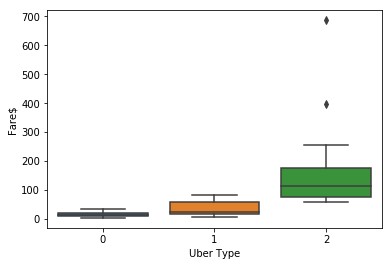

In [233]:
# initial basic understanding using boxplot as a univariate outlier detection the Fare$ column 
sns.boxplot(x='Uber Type', y='Fare$', data=outliers_df) # univariate outlier detection by grouping through Uber Type 

In [234]:
# examine and retrieve the outliers for Uber Type 2 as shown by the boxplot 
outliers_df.loc[outliers_df['Fare$'] > 350] # outliers detected by boxplot 

Unnamed: 0  Unnamed: 0.1  Uber Type  Origin Region  Destination Region  \
16          16  ID5893869248          2              4                   9   
39          39  ID5507445959          2              7                   9   

    Origin Latitude  Origin Longitude  Destination Latitude  \
16       -37.804187        145.002277            -38.110916   
39       -37.861835        144.905716            -38.110916   

    Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
16             144.654173              47496.0     2018-03-22       06:21:21   
39             144.654173              50797.0     2018-05-25       15:57:40   

    Travel Time(s) Arrival Time    Fare$  
16        11497.26      9:32:58  686.850  
39        13173.36     19:37:13  397.675

In [235]:
# these two outliers that have been detected will be dropped from the Panda's DataFrame outliers_df 
outliers_df.drop([16, 39], axis =0, inplace =True)

### 10.2 Multivariate Outliers detection
<a id="multivariate"></a>

All mutlivariate outliers were detcted using scatter plots between Journey Distanc(m) and Fare$ aswell as Travel time(s) and Fare\$ filtered by Day of the week, Time of the day and respectively for the different Uber Types of **Uber Type 0**, **Uber Type 1** and **Uber Type 2**. 

In [236]:
# uber 0 outliers between Journey Distance(m) and Fare$ using Tableau 
outliers_df.loc[(outliers_df['Unnamed: 0.1'] == 'ID1964531978') | (outliers_df['Unnamed: 0.1'] == 'ID1392265293') | 
                (outliers_df['Unnamed: 0.1'] == 'ID1165140188')]

Unnamed: 0  Unnamed: 0.1  Uber Type  Origin Region  Destination Region  \
43           43  ID1964531978          0              3                   4   
89           89  ID1165140188          0              6                   4   
100         100  ID1392265293          0              5                   2   

     Origin Latitude  Origin Longitude  Destination Latitude  \
43        -37.818602        144.968019            -37.800312   
89        -37.773803        144.983647            -37.812523   
100       -37.798898        144.931845            -37.825268   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
43              145.004121               4694.0     2018-07-17       08:17:12   
89              145.010322              10585.0     2018-06-18       13:48:44   
100             144.950575               4008.0     2018-02-12       00:11:54   

     Travel Time(s) Arrival Time  Fare$  
43          1240.56      8:37:52  3.260  
89          3169.38     14:41:33  7.175  
100          867.60      0:26:21  8.040

In [237]:
# uber 1 outliers between Journey Distance(m) and Fare$ using Tableau 
outliers_df.loc[(outliers_df['Unnamed: 0.1'] == 'ID3350815181') | (outliers_df['Unnamed: 0.1'] == 'ID3292692970') | 
                (outliers_df['Unnamed: 0.1'] == 'ID3967117522') | (outliers_df['Unnamed: 0.1'] == 'ID3610110054') | 
                (outliers_df['Unnamed: 0.1'] == 'ID3977235605')]

Unnamed: 0  Unnamed: 0.1  Uber Type  Origin Region  Destination Region  \
1             1  ID3977235605          1              7                   6   
62           62  ID3610110054          1              6                   1   
73           73  ID3292692970          1              7                   9   
96           96  ID3350815181          1              5                   1   
101         101  ID3967117522          1              9                   5   

     Origin Latitude  Origin Longitude  Destination Latitude  \
1         -37.861835        144.905716            -37.773845   
62        -37.787442        144.980409            -37.821026   
73        -37.861835        144.905716            -38.110916   
96        -37.788265        144.929202            -37.805056   
101       -38.110916        144.654173            -37.800363   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
1               144.983689              13169.0     2018-03-24       14:11:40   
62              144.967942               4388.0     2018-06-10       05:27:58   
73              144.654173              50797.0     2018-06-21       02:06:28   
96              144.956005               4103.0     2018-07-18       12:21:45   
101             144.933905              46178.0     2018-02-21       23:08:07   

     Travel Time(s) Arrival Time   Fare$  
1           3863.58     15:16:03  17.120  
62          1158.84      5:47:16  13.550  
73         13173.36      5:46:01  77.590  
96          1183.02     12:41:28  14.130  
101        11094.66      2:13:01  34.165

In [238]:
# uber 2 outliers between Journey Distance(m) and Fare$ using Tableau 
outliers_df.loc[(outliers_df['Unnamed: 0.1'] == 'ID5507445959')]

Empty DataFrame
Columns: [Unnamed: 0, Unnamed: 0.1, Uber Type, Origin Region, Destination Region, Origin Latitude, Origin Longitude, Destination Latitude, Destination Longitude, Journey Distance(m), Departure Date, Departure Time, Travel Time(s), Arrival Time, Fare$]
Index: []

In [239]:
# uber 0 outliers between Travel Time and Fare$ using Tableau 
outliers_df.loc[(outliers_df['Unnamed: 0.1'] == 'ID1964531978') | (outliers_df['Unnamed: 0.1'] == 'ID1392265293') |
                (outliers_df['Unnamed: 0.1'] == 'ID1229334120') | (outliers_df['Unnamed: 0.1'] == 'ID1318931152') |
                (outliers_df['Unnamed: 0.1'] == 'ID1165140188') | (outliers_df['Unnamed: 0.1'] == 'ID1118338892')]

Unnamed: 0  Unnamed: 0.1  Uber Type  Origin Region  Destination Region  \
11           11  ID1318931152          0              5                   6   
43           43  ID1964531978          0              3                   4   
45           45  ID1118338892          0              6                   9   
78           78  ID1229334120          0              7                   4   
89           89  ID1165140188          0              6                   4   
100         100  ID1392265293          0              5                   2   

     Origin Latitude  Origin Longitude  Destination Latitude  \
11        -37.810549        144.935848            -37.790818   
43        -37.818602        144.968019            -37.800312   
45        -37.790818        144.985793            -38.110916   
78        -37.861835        144.905716            -37.813402   
89        -37.773803        144.983647            -37.812523   
100       -37.798898        144.931845            -37.825268   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
11              144.985793               6236.0     2018-02-12       16:24:51   
43              145.004121               4694.0     2018-07-17       08:17:12   
45              144.654173              47186.0     2018-06-24       09:38:13   
78              145.015253              13132.0     2018-01-04       09:47:01   
89              145.010322              10585.0     2018-06-18       13:48:44   
100             144.950575               4008.0     2018-02-12       00:11:54   

     Travel Time(s) Arrival Time   Fare$  
11          1595.40     16:51:26   5.790  
43          1240.56      8:37:52   3.260  
45         11418.06     12:48:31  24.080  
78          3916.68     10:52:17   5.140  
89          3169.38     14:41:33   7.175  
100          867.60      0:26:21   8.040

In [240]:
# uber 1 outliers between Travel Time and Fare$ using Tableau 
outliers_df.loc[(outliers_df['Unnamed: 0.1'] == 'ID3399914376') | (outliers_df['Unnamed: 0.1'] == 'ID3967117522') |
                (outliers_df['Unnamed: 0.1'] == 'ID3416221084') | (outliers_df['Unnamed: 0.1'] == 'ID3117515690')]

Unnamed: 0  Unnamed: 0.1  Uber Type  Origin Region  Destination Region  \
46           46  ID3416221084          1              3                   9   
72           72  ID3399914376          1              3                   9   
101         101  ID3967117522          1              9                   5   
112         112  ID3117515690          1              9                   7   

     Origin Latitude  Origin Longitude  Destination Latitude  \
46        -37.821801        145.002530            -38.110916   
72        -37.813705        144.998892            -38.110916   
101       -38.110916        144.654173            -37.800363   
112       -38.110916        144.654173            -37.861835   

     Destination Longitude  Journey Distance(m) Departure Date Departure Time  \
46              144.654173              47060.0     2018-04-16       19:37:35   
72              144.654173              47153.0     2018-07-11       06:23:30   
101             144.933905              46178.0     2018-02-21       23:08:07   
112             144.905716              50797.0     2018-04-28       15:08:48   

     Travel Time(s) Arrival Time   Fare$  
46         11302.02     22:45:57  63.260  
72         11299.56      9:31:49  58.880  
101        11094.66      2:13:01  34.165  
112        13204.98     18:48:52  77.700

In [241]:
# now all the rows with outliers will be dropped
outliers_df.drop([43,89,100,1,62,73,96,101,11,45,78,89,46,72,112], axis =0, inplace =True) # drop all outliers 

## 11. Writing and storing data cleansed dirty data values Panda's DataFrame into a CSV file 
<a id="dirty output"></a>

Now that both Syntactical Anomalies and Semantic Anomalies have been corrected in the dataset `uber_ridesharing_transit_dirty_data.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`. 

Thus, now an output csv file named `uber_ridesharing_transit_data_cleaned.csv` will be created by writing the **data cleansed** Panda's DataFrame `dirty_data_df` to a csv file using the Python Panda's **to_csv()** function.

In [242]:
# write data cleansed Syntactical Anomalies and Semantic Anomalies free Panda's DataFrame `dirty_data_df` to a csv file named
# uber_ridesharing_transit_data_cleaned.csv
dirty_data_df.to_csv('uber_ridesharing_transit_data_cleaned.csv', index=False, header=['', 'Uber Type', 'Origin Region', 
                                                                              'Destination Region', 'Origin Latitude', 
                                                                              'Origin Longitude', 'Destination Latitude', 
                                                                              'Destination Longitude', 'Journey Distance(m)', 
                                                                              'Departure Date', 'Departure Time', 
                                                                            'Travel Time(s)', 'Arrival Time', 'Fare$']) #output

## 12. Writing and storing the imputed missing values Panda's DataFrame into a CSV file 
<a id="missing output"></a>

Now that all Coverage Anomalies for missing values where the **22** `Uber Type` column missing values and **20** `Fare$` column missing values in the dataset `missing_value.csv` have been imputed respectively using a Linear Regression model trained for each Uber Type with features selected tailored for each type individually. Thus, now that all**42** missing values have have been imputed in the dataset `uber_ridesharing_transit_missing_value.csv` which is stored in a Panda's DataFrame under the variable name `dirty_data_df`. 

Next an output csv file named `uber_ridesharing_transit_missing_value_imputed.csv` will be created by writing the **data cleansed** and **imputed** missing values Panda's DataFrame `missing_value_df` to a csv file using the Python Panda's **to_csv()** function.

In [243]:
# write data cleansed Coverage Anomalies free with all missing values imputed Panda's DataFrame `missing_value_df` to a csv file
# named uber_ridesharing_transit_missing_value_imputed.csv
missing_value_df.to_csv('uber_ridesharing_transit_missing_value_imputed.csv', index=False, header=['', 'Uber Type', 
                                                                                                   'Origin Region', 
                                                                              'Destination Region', 'Origin Latitude', 
                                                                              'Origin Longitude', 'Destination Latitude', 
                                                                              'Destination Longitude', 'Journey Distance(m)', 
                                                                              'Departure Date', 'Departure Time', 
                                                                              'Travel Time(s)', 
                                                                              'Arrival Time', 'Fare$']) #output

## 13. Writing and storing the removed outliers Panda's DataFrame into a CSV file 
<a id="outlier output"></a>

Now that all Coverage Anomalies for outliers in the dataset `uber_ridesharing_transit_outliers.csv` have been removed/dropped. Thus, now that all**outliers** have have been dropped in the dataset `uber_ridesharing_transit_outliers.csv` which is stored in a Panda's DataFrame under the variable name `outliers_df`. 

Next an output csv file named `uber_ridesharing_transit_outliers_removed.csv` will be created by writing the **data cleansed** and **removed/dropped** outlier values in the Panda's DataFrame `outliers_df` to a csv file using the Python Panda's **to_csv()** function.

In [244]:
# write data cleansed Coverage Anomalies free with all outliers removed/dropped Panda's DataFrame `outliers_df` to a csv 
# file named uber_ridesharing_transit_outliers_removed.csv
outliers_df.to_csv('uber_ridesharing_transit_outliers_removed.csv', index=False, header=['','Unnamed: 0' ,'Uber Type', 
                                                                                         'Origin Region', 'Destination Region', 
                                                                                         'Origin Latitude', 'Origin Longitude', 
                                                                                         'Destination Latitude', 
                                                                                         'Destination Longitude', 
                                                                                         'Journey Distance(m)', 
                                                                                         'Departure Date', 'Departure Time', 
                                                                                         'Travel Time(s)', 'Arrival Time', 
                                                                                         'Fare$']) #output

## 14. Summary
<a id="summary"></a>

This Jupyter Notebook file demonstrates and explains comprehensively how all the stages throughout the Exploratory Data Analysis process is performed for Data cleansing on the `Uber Ridesharing Transit dataset in Victoria, Australia`. With all the steps listed on how **Syntactical Anomalies**, **Semantic Anomalies** and **Coverage Anomalies** are detected, corrected and removed/imputed. 

## 15. References
<a id="references"></a>
* Boldyreva, Maria. (2018, July 10), "Dijkstra's algorithm in python: algorithms for beginners" DEV [Online] Available at: https://dev.to/mxl/dijkstras-algorithm-in-python-algorithms-for-beginners-dkc (Accessed: 5/04/2019)  
* BrenBarn. (2014, August 29), "How to return 'negative' of a value in pandas dataframe?" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/25562570/how-to-return-negative-of-a-value-in-pandas-dataframe/25562736#25562736 (Accessed: 15/04/2019)  
* Chaudhary, Ashwini. (2013, August 26), "Access item in a list of lists" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/18449360/access-item-in-a-list-of-lists (Accessed: 1/05/2019)  
* Community♦ & EdChum. (2017, May 23), "Rename specific column(s) in pandas" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/19758364/rename-specific-columns-in-pandas (Accessed: 17/04/2019)  
* Community♦ & Johnsyweb. (2017, May 23), "Iterating over every two elements in a list" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/5389507/iterating-over-every-two-elements-in-a-list (Accessed: 25/04/2019)  
* cs95 & metersk. (2015, May 25), “Python, Pandas : Return only those rows which have missing values” Stack Overflow [Online] Available at: https://stackoverflow.com/questions/30447083/python-pandas-return-only-those-rows-which-have-missing-values (Accessed: 29/03/2019)  
* Dajlido, Piotr. (2015, March 14), "AttributeError: 'module' object has no attribute 'hist'" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/29045636/attributeerror-module-object-has-no-attribute-hist (Accessed: 7/05/2019)  
* Devlin, Josh. (2016, December 28), "Preparing and Cleaning Data for Machine Learning" DATSQUEST [Online] Available at: https://www.dataquest.io/blog/machine-learning-preparing-data/ (Accessed: 7/04/2019)  
* EdChum. (2016, February 26), "Add a percent sign to a dataframe column in Python" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/35661968/add-a-percent-sign-to-a-dataframe-column-in-python (Accessed: 15/04/2019) 
* EdChum. (2015, July 20), "Pandas DataFrame: replace all values in a column, based on condtion" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition/31512025 (Accessed: 15/05/2019)  
* GRACE-MARTIN, KAREN. (2013, May 20), “How to Diagnose the Missing Data Mechanism” THE ANALYSIS FACTOR Making Statistics Make Sense [Online] Available at: https://www.theanalysisfactor.com/missing-data-mechanism/ (Accessed: 29/03/2019) 
* hlin117 & Garrett. (2015, October 7), "Select by partial string from a pandas DataFrame" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/11350770/select-by-partial-string-from-a-pandas-dataframe (Accessed: 17/04/2019)  
* Joel. (2016, February 9), "How to get the data for the edge between two nodes?" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/35281763/how-to-get-the-data-for-the-edge-between-two-nodes (Accessed: 21/04/2019)  
* Johu & Maldives. (2018, October 22), "pnctuation with "and thus" in the middle of a sentence" StackExchange [Online] Available at: https://english.stackexchange.com/questions/347954/punctuation-with-and-thus-in-the-middle-of-a-sentence/347985 (Accessed: 11/05/2019)   
* LatLong. (2019), "Victoria, Australia" LatLong.net Countries Australia States [Online] Available at: https://www.latlong.net/place/victoria-australia-12947.html (Accessed: 11/05/2019) 
* Levon. (2012, July 5), "Summing elements in a list" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/11344827/summing-elements-in-a-list (Accessed: 17/04/2019)  
* MathsIsFun.com. (2018), "Months" Measurement Index MATH is FUN Copyright © 2018 MathsIsFun.com [Online] Available at: https://www.mathsisfun.com/measure/months.html (Accessed: 13/05/2019) 
* Mike T. (2018, July 19), "Creating buffer circle x kilometers from point using Python?" StackExchange [Online] Available at: https://gis.stackexchange.com/questions/289044/creating-buffer-circle-x-kilometers-from-point-using-python (Accessed: 29/03/2019) 
* Miller, Jacob & sacuL. (2018, September 12), "Pandas/Python: Set value of one column based on value in another column" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/49161120/pandas-python-set-value-of-one-column-based-on-value-in-another-column (Accessed: 17/04/2019)  
* NetworkX Developers. (2019, April 11), "Overview of NetworkX" NetworkX 2.3 [Online] Available at: https://networkx.github.io/documentation/networkx-2.3/ (Accessed: 5/05/2019)  
* Pekar, Roman. (2013, November 17), "add a string prefix to each value in a string column using Pandas" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/20025882/add-a-string-prefix-to-each-value-in-a-string-column-using-pandas (Accessed: 15/04/2019)  
* Pourmajidi, William. (2018, November 27), "AttributeError: module 'networkx' has no attribute 'from_pandas_dataframe' Stack Overflow [Online] Available at: https://stackoverflow.com/questions/49223057/attributeerror-module-networkx-has-no-attribute-from-pandas-dataframe (Accessed: 11/04/2019)  
* Rafael. (2019, January 28), "networkx: accessing nodes with multiple node attributes via loop" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/54407422/networkx-accessing-nodes-with-multiple-node-attributes-via-loop (Accessed: 29/04/2019) 
* Rovai, Marcelo. (2018, November 21), "Mapping Geograph Data in Python" Medium Towards Data Science [Online] Available at: https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f (Accessed: 9/05/2019)  
* Singhvi, Akshay & Chaudhary, Ashwini. (2017, October 11), "Iterate every 2 elements from list at a time" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/21752610/iterate-every-2-elements-from-list-at-a-time (Accessed: 23/04/2019)  
* Time and Date AS. (2019), "The 12 Months of the Year" timeanddate.com Copyright © Time and Date AS 1995–2019. All rights reserved. [Online] Available at: https://www.timeanddate.com/calendar/months/ (Accessed: 13/05/2019) 
* unutbu. (2018, January 13), "Can Networkx read nodes and edges from different files?" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/48242837/can-networkx-read-nodes-and-edges-from-different-files?rq=1 (Accessed: 5/05/2019) 
* unutbu. (2016, February 4), "Elegant access to edge attributes in networkx" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/35190296/elegant-access-to-edge-attributes-in-networkx (Accessed: 5/05/2019)  
* unutbu. (2013, June 12), "Select rows from a DataFrame based on values in a column in pandas" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas (Accessed: 11/04/2019)   
* user8508347. (2017, September 12), “Missing data in Dataframe using Python” Stack Overflow [Online] Available at: https://stackoverflow.com/questions/46173599/missing-data-in-dataframe-using-python (Accessed: 30/03/2019)  
* Vegt der van Jan. (2016, April 29), "About data cleansing, to what extent should we do our work?" StackExchange Data Science [Online] Available at: https://datascience.stackexchange.com/questions/11495/about-data-cleansing-to-what-extent-should-we-do-our-work (Accessed: 13/05/2019)  
* Ward. (2015, November 3), "NetworkX: add edges to graph from node attributes" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/33494376/networkx-add-edges-to-graph-from-node-attributes (Accessed: 3/05/2019)  
* yearning, machine. (2012, February 5), "How to ierate through a list of lists in python" Stack Overflow [Online] Available at: https://stackoverflow.com/questions/9151104/how-to-iterate-through-a-list-of-lists-in-python (Accessed: 1/05/2019)  
* Yusuf, Umar. (2017, April 10), "Cleaning big data CSV file with Python" Geospatial Solutions Expert Geo-Data Science, Python and GIS Programming [Online] Available at: https://umar-yusuf.blogspot.com/2017/04/cleaning-big-data-csv-file-with-python.html (Accessed: 11/04/2019)  